In [2]:
library(ggplot2)        # plotting & data
library(dplyr)          # data manipulation
library(tidyr)          # data re-shaping
library(magrittr)       # pipe operator
library(gridExtra)      # provides side-by-side plotting
library(dplyr)          # dplyr for pipe operations
library(moments)        # bonett.test for normality
library(ggQC)           # to create xMR and iMR charts
library(repr)           # change plot size
library(nortest)        # anderson darling test
library(climtrends)     # FindOutliersTietjenMooreTest


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
# Change plot size to 12 x 6
parentdir <- "rscript_data/"
options(repr.plot.width=22, repr.plot.height=12)

In [4]:
# generate well ids for x-axis 
wellIDs <- data.frame(sapply(LETTERS[1:8], function(x) {paste0(x,seq(2,8))}))
head(wellIDs)

A  B  C  D  E  F  G  H 
1 A2 B2 C2 D2 E2 F2 G2 H2
2 A3 B3 C3 D3 E3 F3 G3 H3
3 A4 B4 C4 D4 E4 F4 G4 H4
4 A5 B5 C5 D5 E5 F5 G5 H5
5 A6 B6 C6 D6 E6 F6 G6 H6
6 A7 B7 C7 D7 E7 F7 G7 H7

### Stain Index comparison of 8 old vs 8 new

In [12]:
dfcnt_new8 <- list()
dfcnt_old8 <- list()
rows <- list(c("A", "E"), c("B", "F"), c("C", "G"), c("D", "H"))
new8_file <- list.files(parentdir, pattern = "*NEW8_CELLCNT*")
old8_file <- list.files(parentdir, pattern = "*OLD8_CELLCNT*")


cnt <- 1
dfn_ls <- list()
dfo_ls <- list()
dfn_sub_ls <- list()
dfo_sub_ls <- list()

for (i in seq(1)) {
    dfn_ls[[i]] <- read.csv(paste0(parentdir, new8_file[i]))
    dfo_ls[[i]] <- read.csv(paste0(parentdir, old8_file[i]))
    for (j in seq(4)) {
          dfn_sub_ls[[cnt]] <- dfn_ls[[i]] %>%
              na.omit() %>% 
              filter(X < 9 & X > 1) %>%
              filter(grepl(paste0("[", rows[[j]][1], "|", rows[[j]][2], "]"), Y))
          dfo_sub_ls[[cnt]] <- dfo_ls[[i]] %>%
              na.omit() %>% 
              filter(X < 9 & X > 1) %>%
              filter(grepl(paste0("[", rows[[j]][1], "|", rows[[j]][2], "]"), Y))
    cnt <- cnt + 1
    }
}

#### compare two groups at a time for the variance using F test
- The p values are higher than 0.05, meaning the variances do not change from plate 1 to 3
- Run F-test when you want to perform a two samples t-test to check the equality of the variances of the two samples

#### Shapiro test
- the shapiro.test, the null hypothesis assumes that the data is drawn from a normal distribution. Since the p-value > 0.05, we fail to reject the null hypothesis, meaning that it is likely that the data is drawn from a normal distribution

#### Anderson-Darling test for normality
- a given sample of data is drawn from a given probability distribution
- has to be greater than 7 points so cannot run this test

In [9]:
# 8 chl New vs Old (A/E)
idx = c(1,5,9)
j = 1
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df_stats <- setNames(data.frame(matrix(ncol = 1, nrow = 0)), c("F_TEST" ))
df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    dff <- bind_rows(dfo[[i-1]], dfn[[i-1]])
    stat <- var.test(count ~ method, dff)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    #print("Old 8")
    #stat <- shapiro.test(dfo[[i-1]]$count)
    #df_stats[i-1, "SHAPIRO_TEST_OLD"] = formatC(stat$p.value, format = "e", digits = 2)
    #print(stat)
    #print("New 8")
    #stat <- shapiro.test(dfn[[i-1]]$count)
    #df_stats[i-1, "SHAPIRO_TEST_NEW"] = formatC(stat$p.value, format = "e", digits = 2)
    #print(stat)
}

write.csv(df_stats, paste0("8v8_stats_", pat1, "_", pat2, ".csv"), row.names = FALSE)

ERROR: Error in eval(expr, envir, enclos): object 'rows' not found


In [12]:
# 8 chl New vs Old (B/F)
idx = c(2,6,10)
j = 2
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- setNames(data.frame(matrix(ncol = 3, nrow = 0)), c("F_TEST"))

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    dff <- bind_rows(dfo[[i-1]], dfn[[i-1]])
    stat <- var.test(count ~ method, dff)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
}
write.csv(df_stats, paste0("8v8_stats_", pat1, "_", pat2, ".csv"), row.names = FALSE)

[1] "B - F old vs. new"
[1] "B2 - F2"

	F test to compare two variances

data:  count by method
F = 115.56, num df = 1, denom df = 1, p-value = 0.1181
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.783953e-01 7.486012e+04
sample estimates:
ratio of variances 
          115.5625 

[1] "B3 - F3"

	F test to compare two variances

data:  count by method
F = 0.027461, num df = 1, denom df = 1, p-value = 0.2091
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 4.239224e-05 1.778908e+01
sample estimates:
ratio of variances 
        0.02746122 

[1] "B4 - F4"

	F test to compare two variances

data:  count by method
F = 6.1621, num df = 1, denom df = 1, p-value = 0.4876
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 9.512474e-03 3.991725e+03
sample estimates:
ratio of variances 
          6.162076 

[1] "B5 - F5"

	F test to compare two var

In [13]:
# 8 chl New vs Old (C/G)
idx = c(3,7,11)
j = 3
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df_stats <- setNames(data.frame(matrix(ncol = 3, nrow = 0)), c("F_TEST"))

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    dff <- bind_rows(dfo[[i-1]], dfn[[i-1]])
    stat <- var.test(count ~ method, dff)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
}
write.csv(df_stats, paste0("8v8_stats_", pat1, "_", pat2, ".csv"), row.names = FALSE)

[1] "C - G old vs. new"
[1] "C2 - G2"

	F test to compare two variances

data:  count by method
F = 9.2748, num df = 1, denom df = 1, p-value = 0.404
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.431761e-02 6.008109e+03
sample estimates:
ratio of variances 
          9.274793 

[1] "C3 - G3"

	F test to compare two variances

data:  count by method
F = 0.039559, num df = 1, denom df = 1, p-value = 0.25
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 6.106808e-05 2.562604e+01
sample estimates:
ratio of variances 
        0.03955923 

[1] "C4 - G4"

	F test to compare two variances

data:  count by method
F = 0.14062, num df = 1, denom df = 1, p-value = 0.4568
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2.170846e-04 9.109533e+01
sample estimates:
ratio of variances 
          0.140625 

[1] "C5 - G5"

	F test to compare two varia

In [14]:
# 8 chl New vs Old (D/H)
idx = c(4,8,12)
j = 4
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df_stats <- setNames(data.frame(matrix(ncol = 3, nrow = 0)), c("F_TEST"))

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    dff <- bind_rows(dfo[[i-1]], dfn[[i-1]])
    stat <- var.test(count ~ method, dff)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
}
write.csv(df_stats, paste0("8v8_stats_", pat1, "_", pat2, ".csv"), row.names = FALSE)

[1] "D - H old vs. new"
[1] "D2 - H2"

	F test to compare two variances

data:  count by method
F = 1980.2, num df = 1, denom df = 1, p-value = 0.02861
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 3.056937e+00 1.282784e+06
sample estimates:
ratio of variances 
           1980.25 

[1] "D3 - H3"

	F test to compare two variances

data:  count by method
F = 4.8317, num df = 1, denom df = 1, p-value = 0.5436
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 7.458758e-03 3.129923e+03
sample estimates:
ratio of variances 
          4.831702 

[1] "D4 - H4"

	F test to compare two variances

data:  count by method
F = 4.2388, num df = 1, denom df = 1, p-value = 0.5757
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 6.543418e-03 2.745818e+03
sample estimates:
ratio of variances 
          4.238754 

[1] "D5 - H5"

	F test to compare two vari

### qq-plot
- Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight

### Histogram with density line plot
- We also see similar skewness within the sample distributions.

In [15]:
# A-E
# 8 chl New vs Old (A/E)
p_qq_new8_cnt_ls <- list()
p_hst_new8_cnt_ls <- list()
idx = c(1,5,9)
j = 1
colm = 2
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
p_qq_cnt_ls <- list()
p_hst_cnt_ls <- list()


df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
}

dfo <- do.call(rbind, dfo)
dfn <- do.call(rbind, dfn)
df.t <- rbind(dfo, dfn)

p_qq_cnt_ls[[j]] <- ggplot(df.t, aes(sample = count)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(column~ method) +
            ggtitle(paste("New 8 vs. Old 8 q-q plot for each titration point dataset:", pat1, "-", pat2))

p_hst_cnt_ls[[j]] <- ggplot(data = df.t, aes(x = count)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(column~ method) +
    ggtitle(paste("New 8 vs. Old 8 histogram/density plot for each titration point dataset:", pat1, "-", pat2))

[1] "A - E old vs. new"
[1] "A2 - E2"
[1] "A3 - E3"
[1] "A4 - E4"
[1] "A5 - E5"
[1] "A6 - E6"
[1] "A7 - E7"
[1] "A8 - E8"


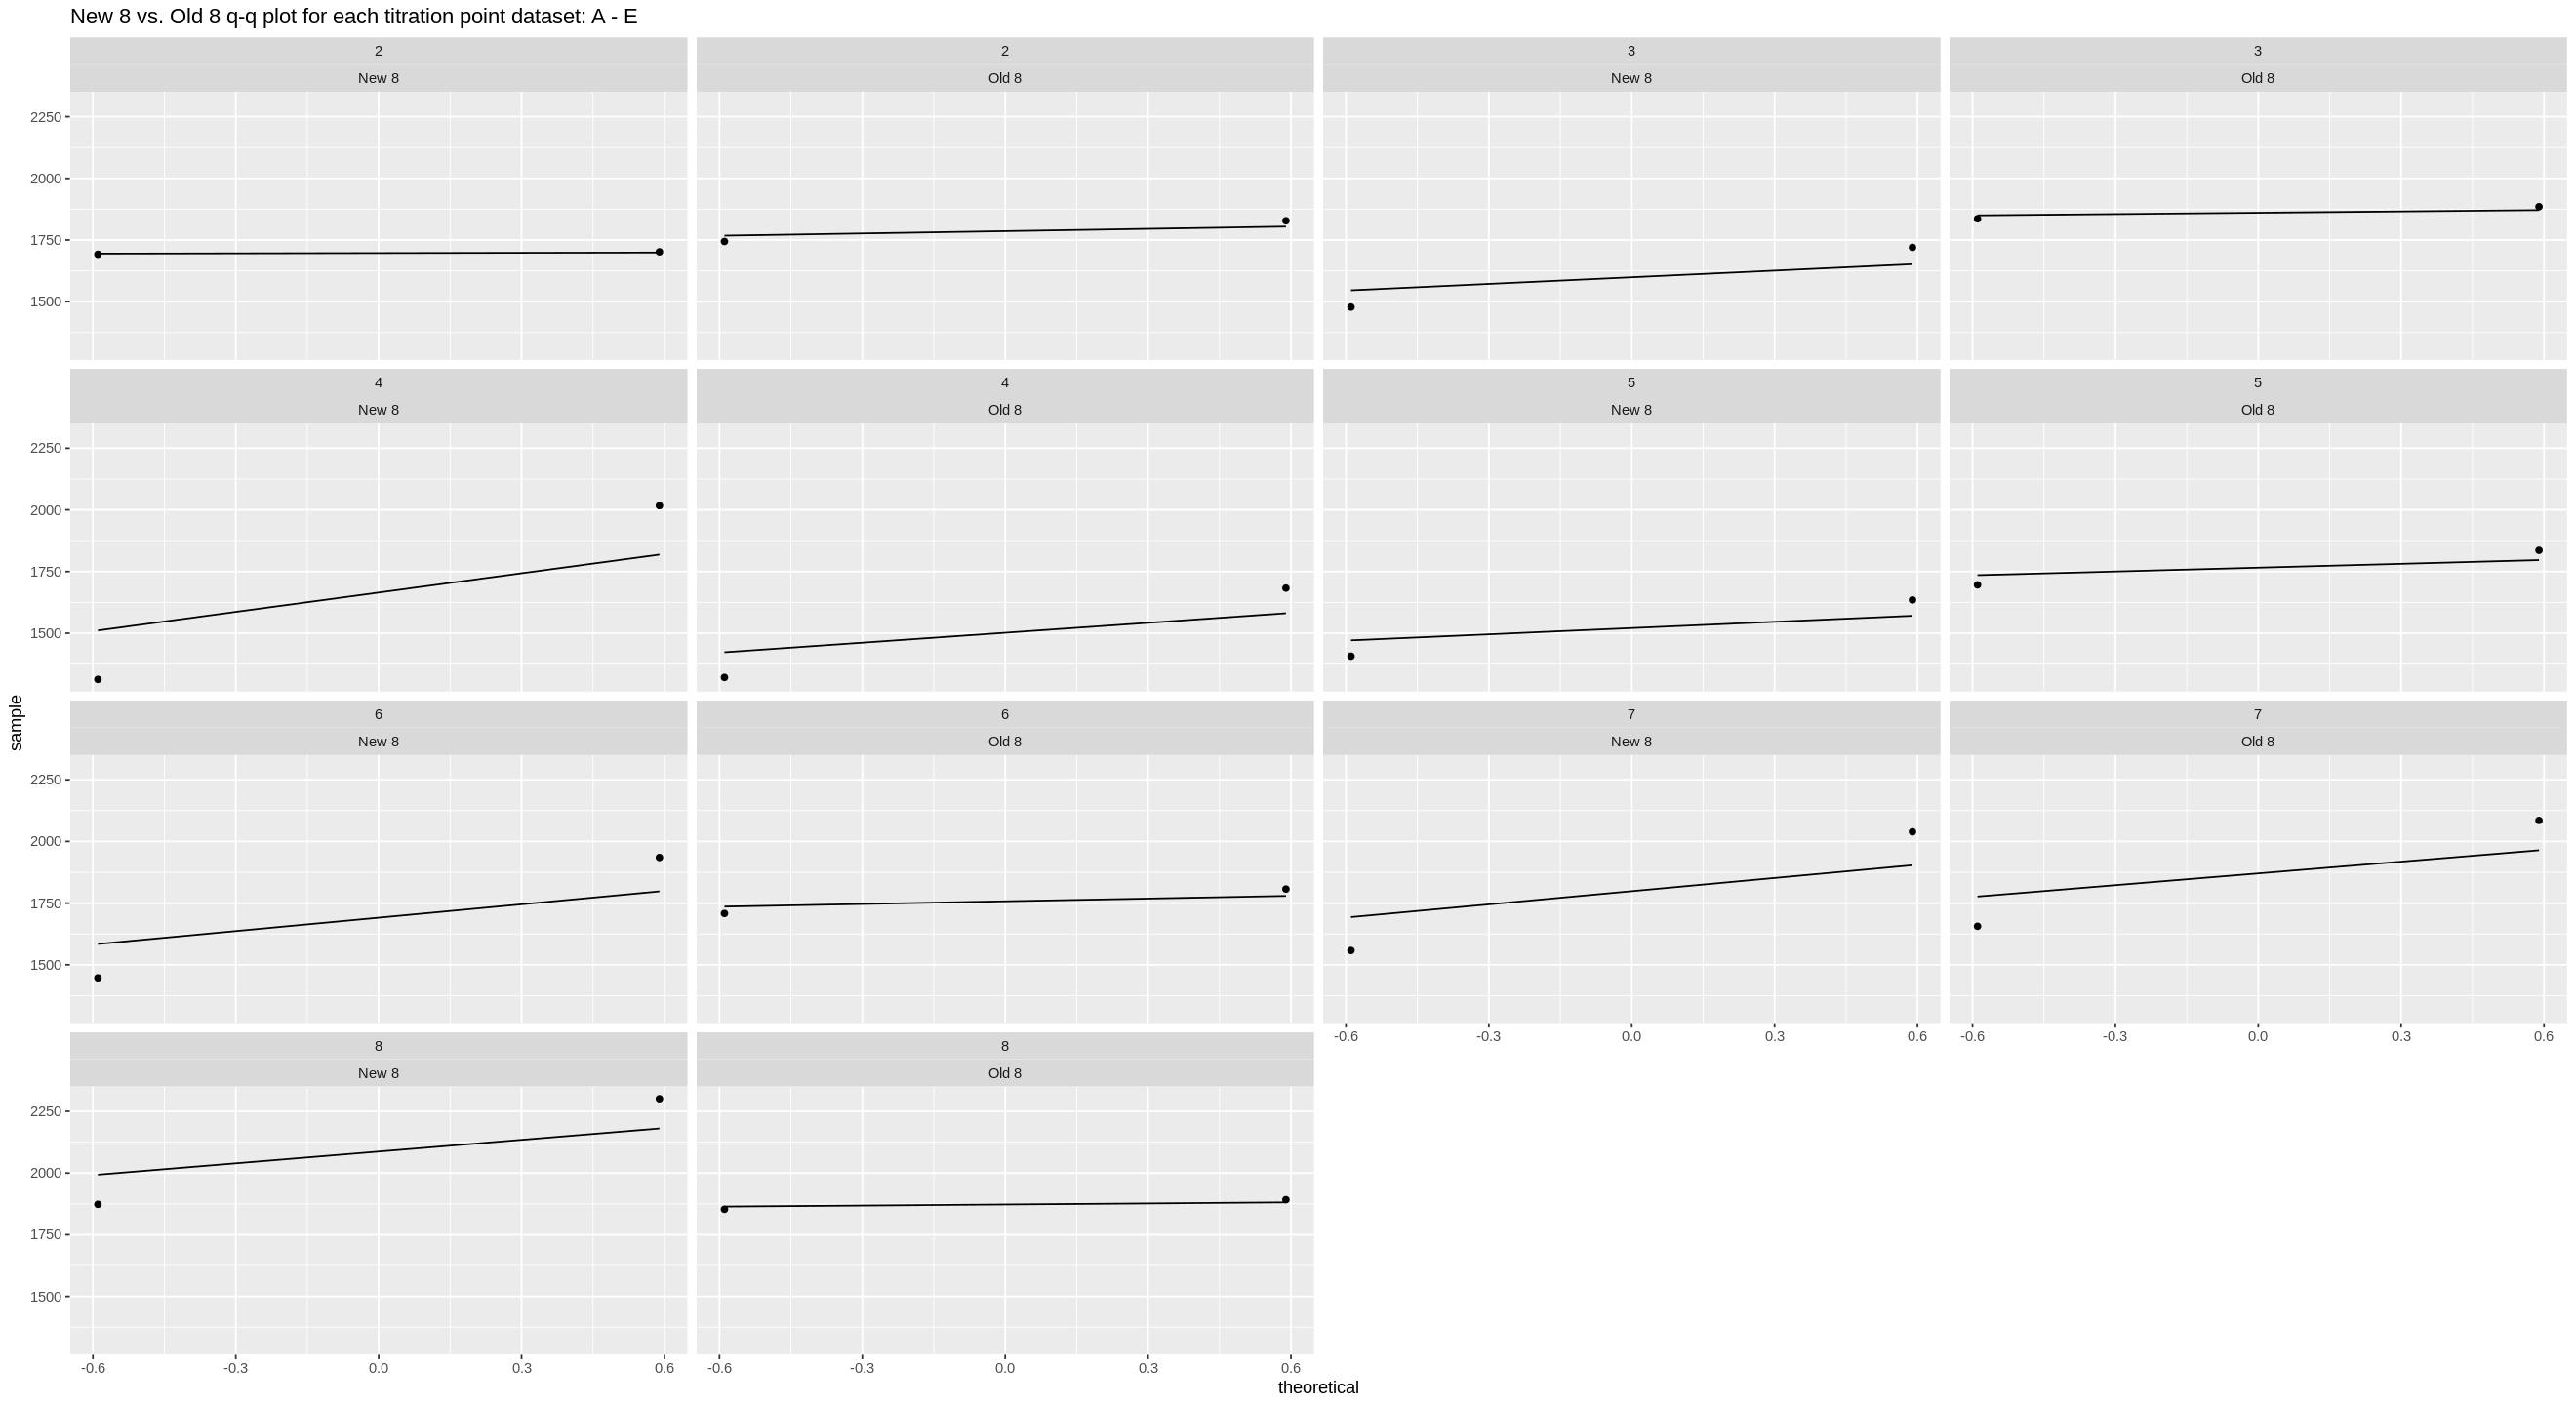

In [16]:
p_qq_cnt_ls[[1]]

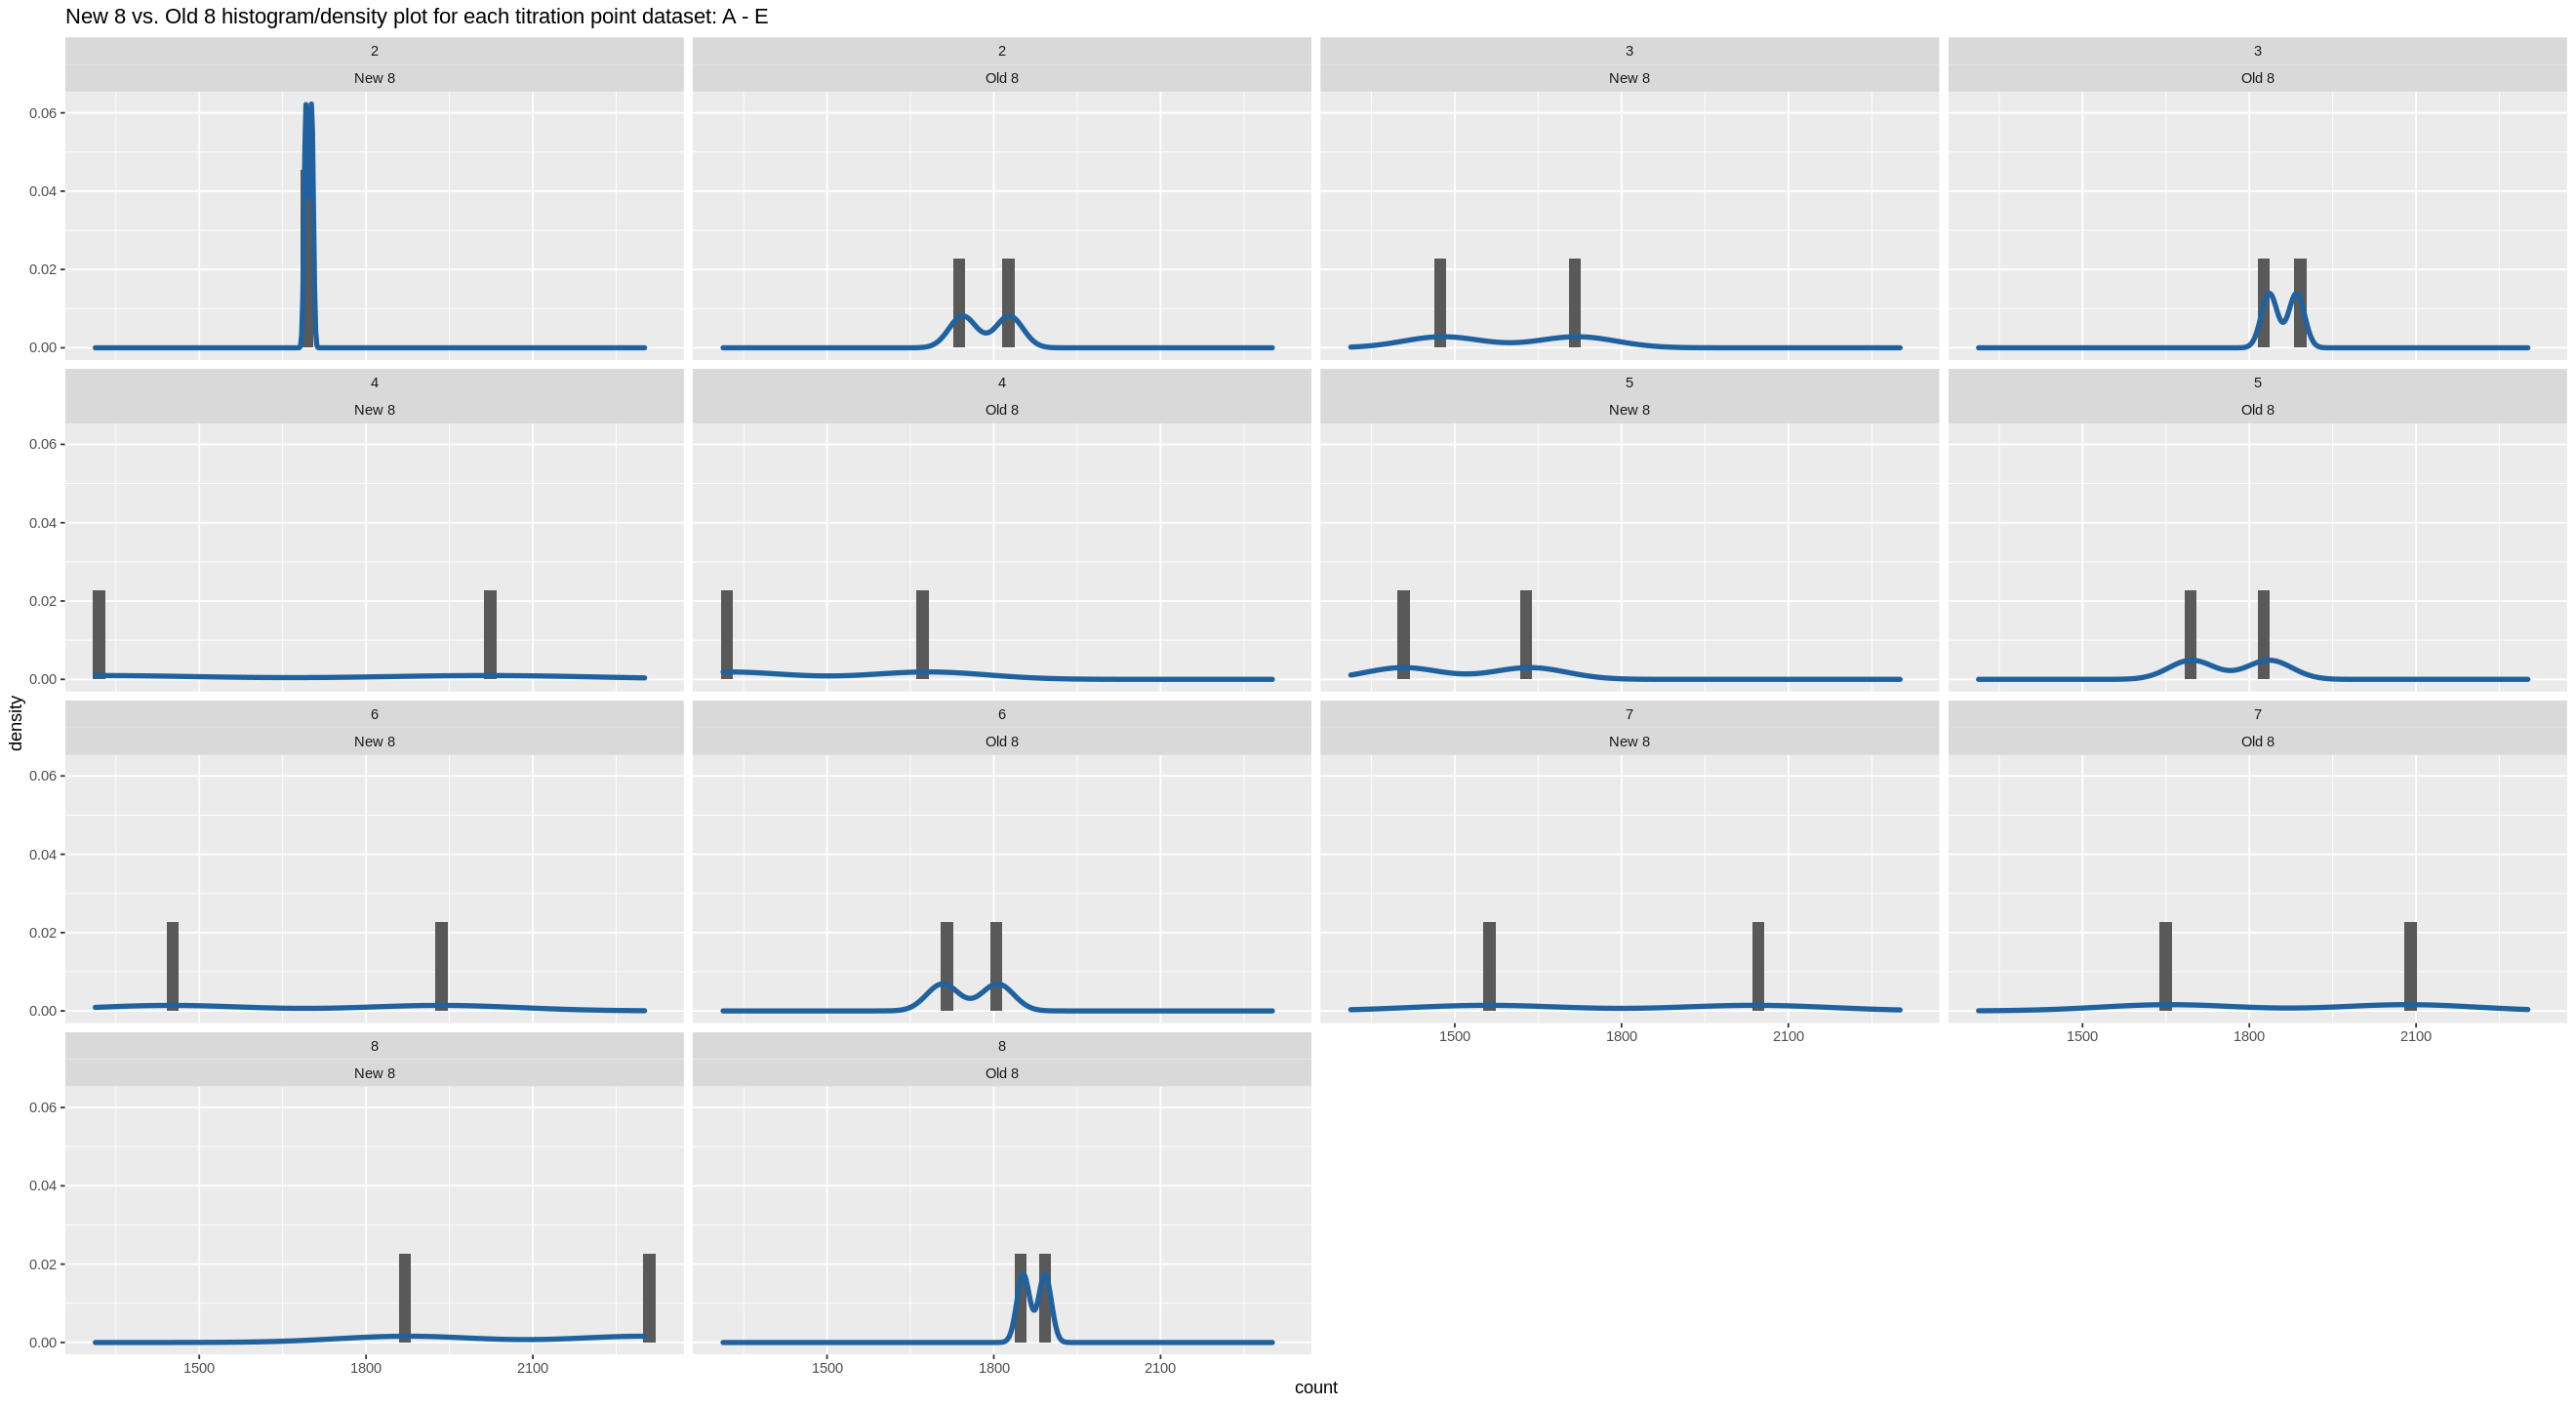

In [17]:
p_hst_cnt_ls[[1]]

In [18]:
# B-F
# 8 chl New vs Old 
idx = c(2,6,10)
j = 2
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
p_qq_cnt_ls <- list()
p_hst_cnt_ls <- list()

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
}

dfo <- do.call(rbind, dfo)
dfn <- do.call(rbind, dfn)
df.t <- rbind(dfo, dfn)

p_qq_cnt_ls[[j]] <- ggplot(df.t, aes(sample = count)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(column~ method) +
            ggtitle(paste("New 8 vs. Old 8 q-q plot for each titration point dataset:", pat1, "-", pat2))

p_hst_cnt_ls[[j]] <- ggplot(data = df.t, aes(x = count)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(column~ method) +
    ggtitle(paste("New 8 vs. Old 8 histogram/density plot for each titration point dataset:", pat1, "-", pat2))

[1] "B - F old vs. new"
[1] "B2 - F2"
[1] "B3 - F3"
[1] "B4 - F4"
[1] "B5 - F5"
[1] "B6 - F6"
[1] "B7 - F7"
[1] "B8 - F8"


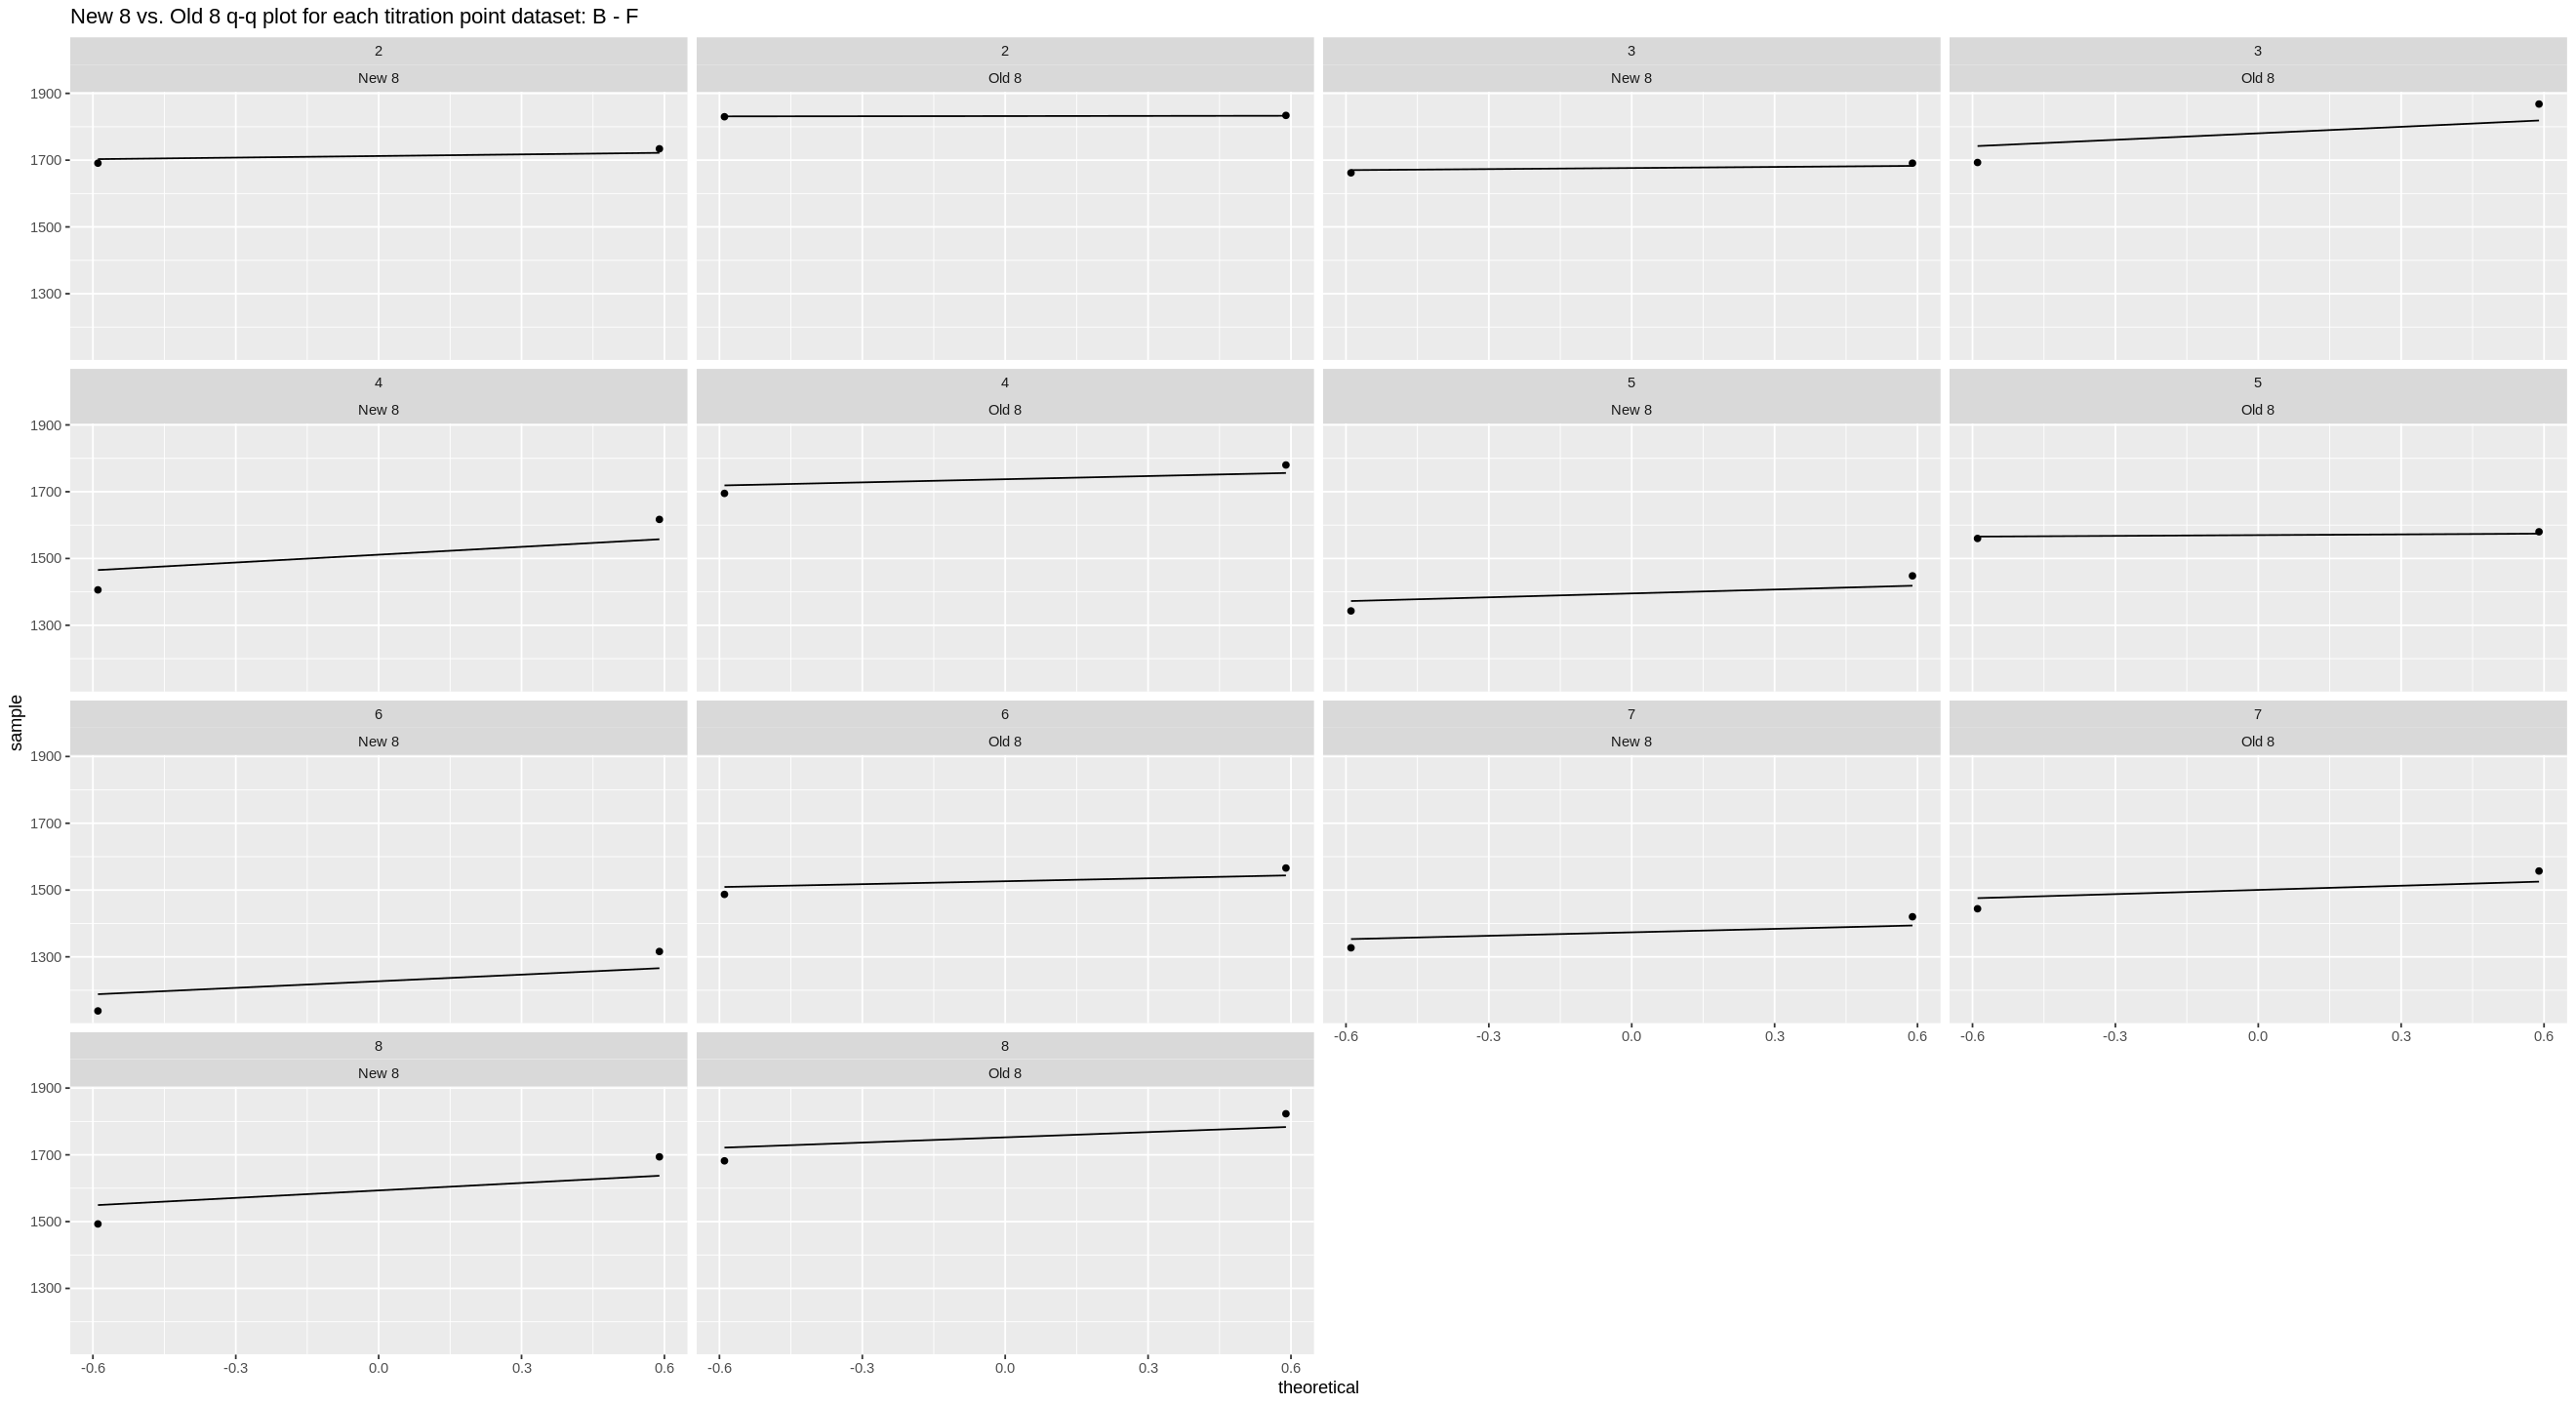

In [19]:
p_qq_cnt_ls[[2]]

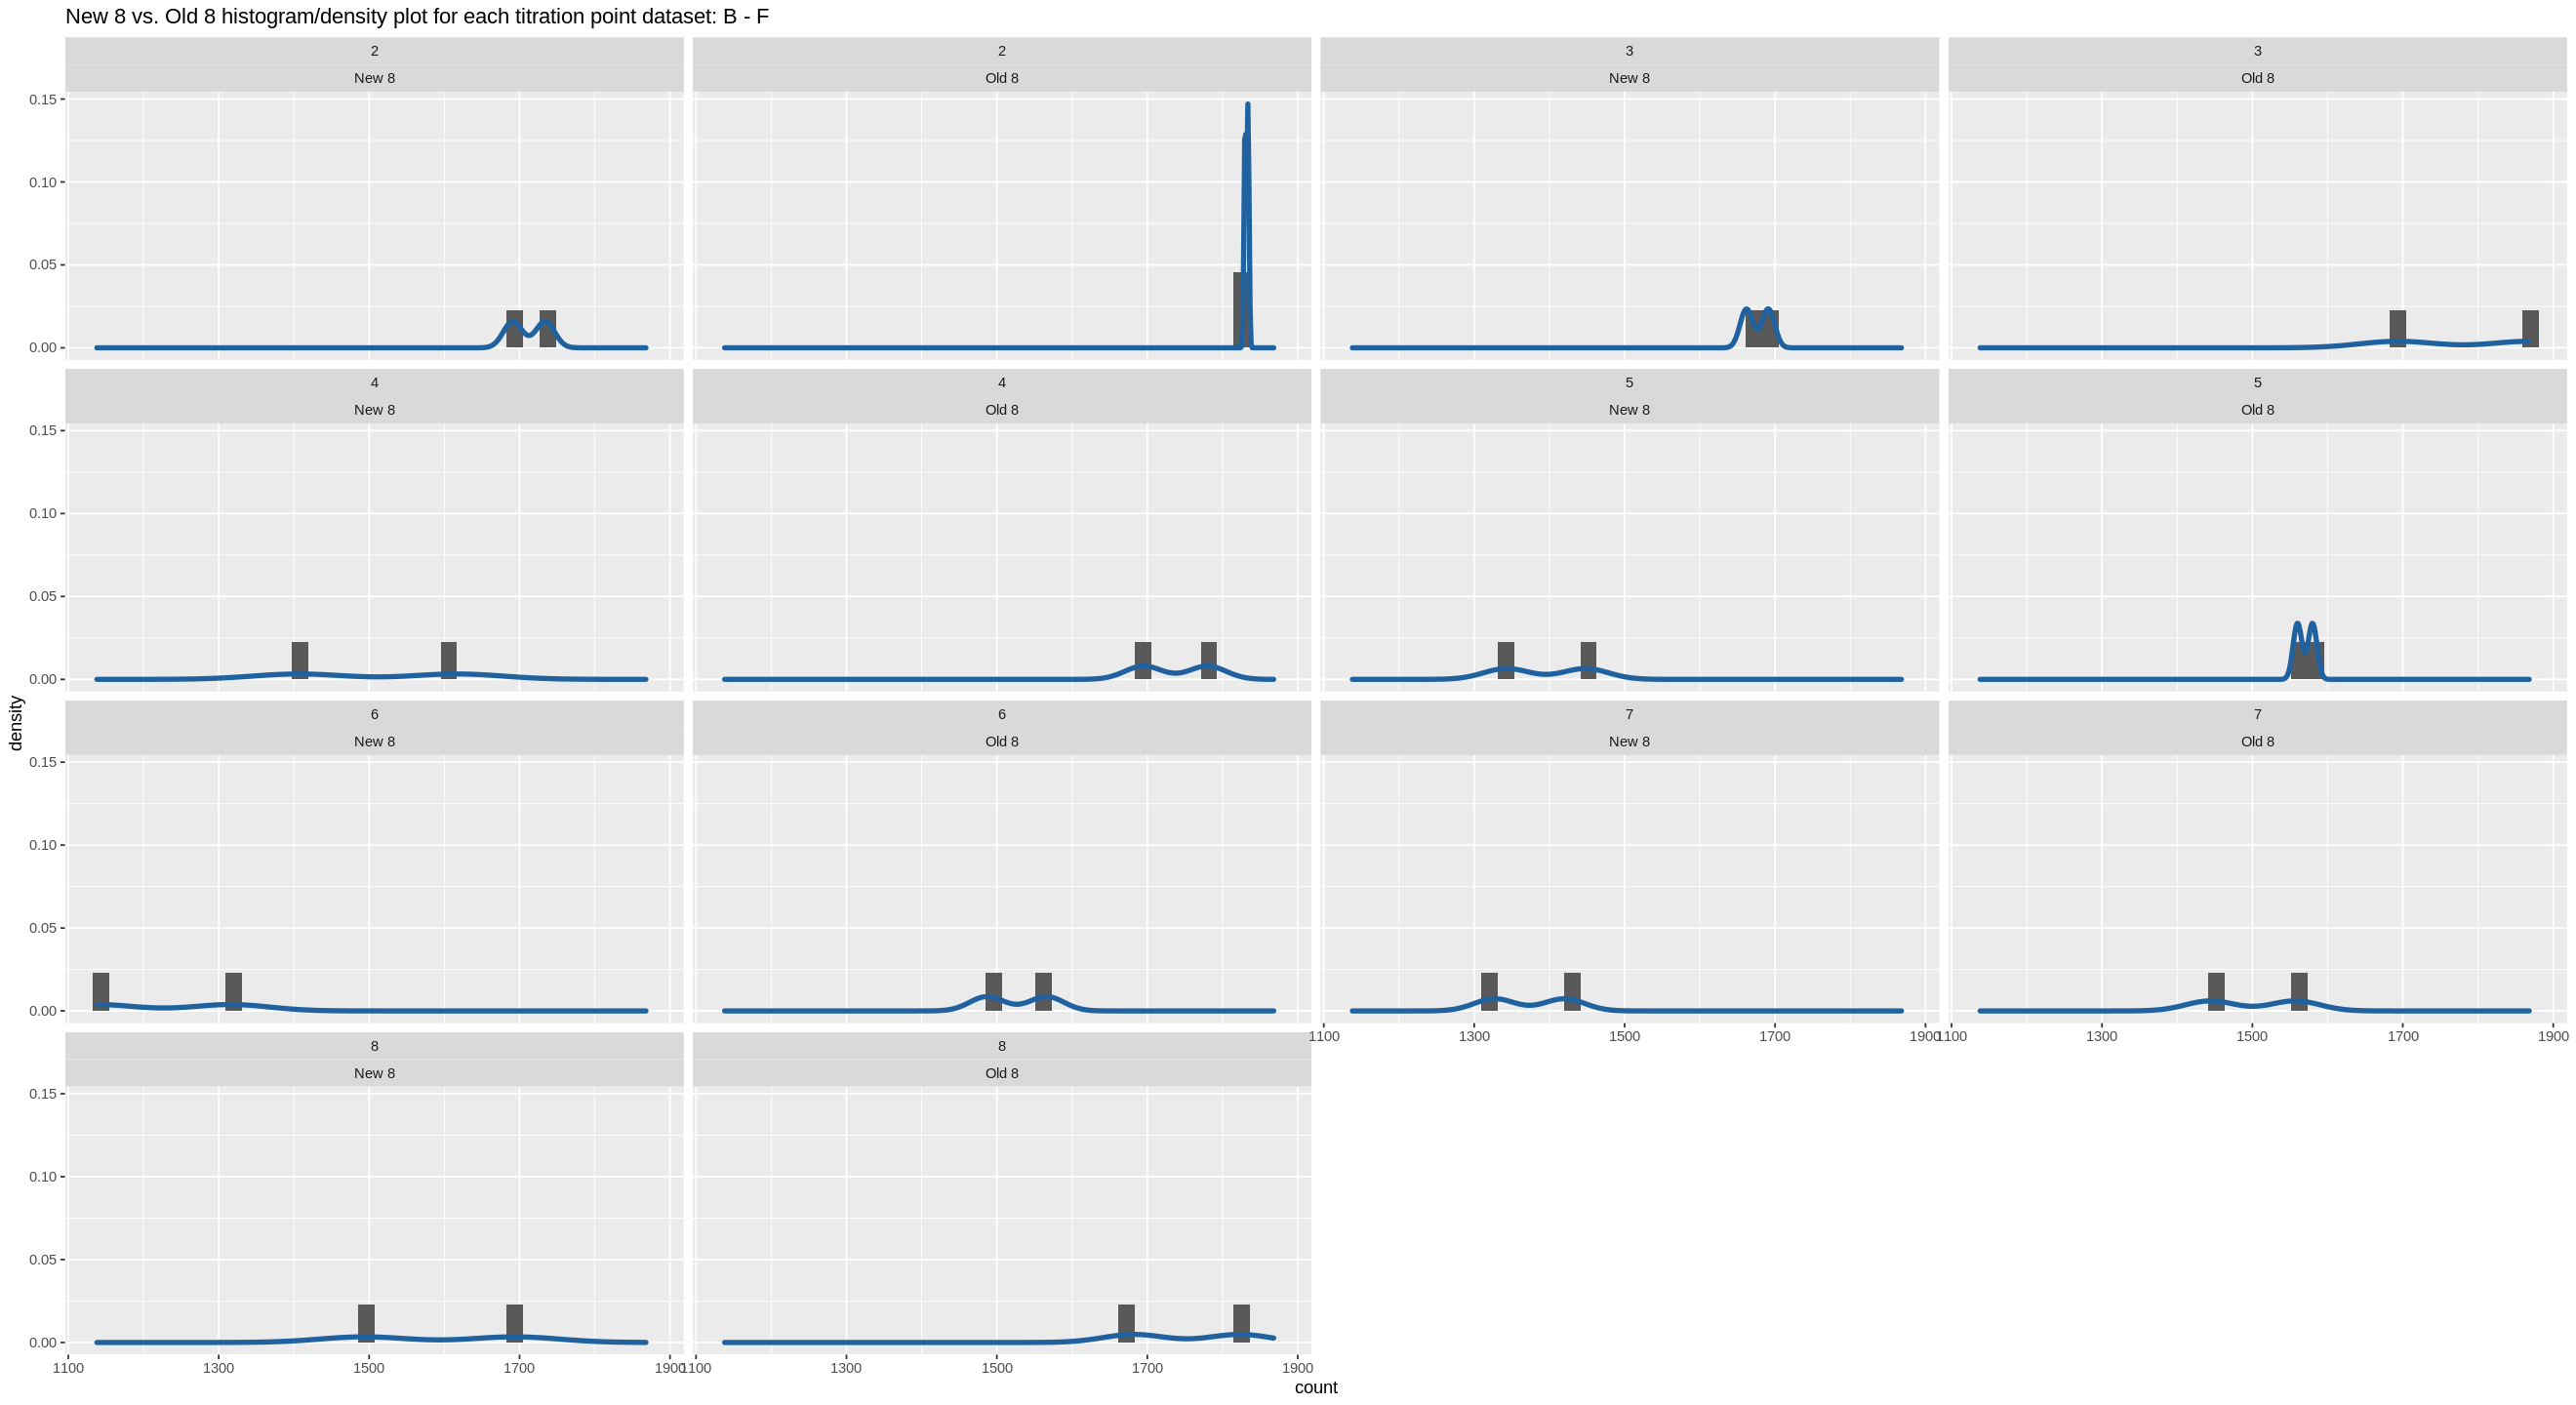

In [20]:
p_hst_cnt_ls[[2]]

In [21]:
# C-G
idx = c(3,7,11)
j = 3
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
p_qq_cnt_ls <- list()
p_hst_cnt_ls <- list()

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
}

dfo <- do.call(rbind, dfo)
dfn <- do.call(rbind, dfn)

df.t <- rbind(dfo, dfn)

p_qq_cnt_ls[[j]] <- ggplot(df.t, aes(sample = count)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(column~ method) +
            ggtitle(paste("New 8 vs. Old 8 q-q plot for each titration point dataset:", pat1, "-", pat2))

p_hst_cnt_ls[[j]] <- ggplot(data = df.t, aes(x = count)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(column~ method) +
    ggtitle(paste("New 8 vs. Old 8 histogram/density plot for each titration point dataset:", pat1, "-", pat2))

[1] "C - G old vs. new"
[1] "C2 - G2"
[1] "C3 - G3"
[1] "C4 - G4"
[1] "C5 - G5"
[1] "C6 - G6"
[1] "C7 - G7"
[1] "C8 - G8"


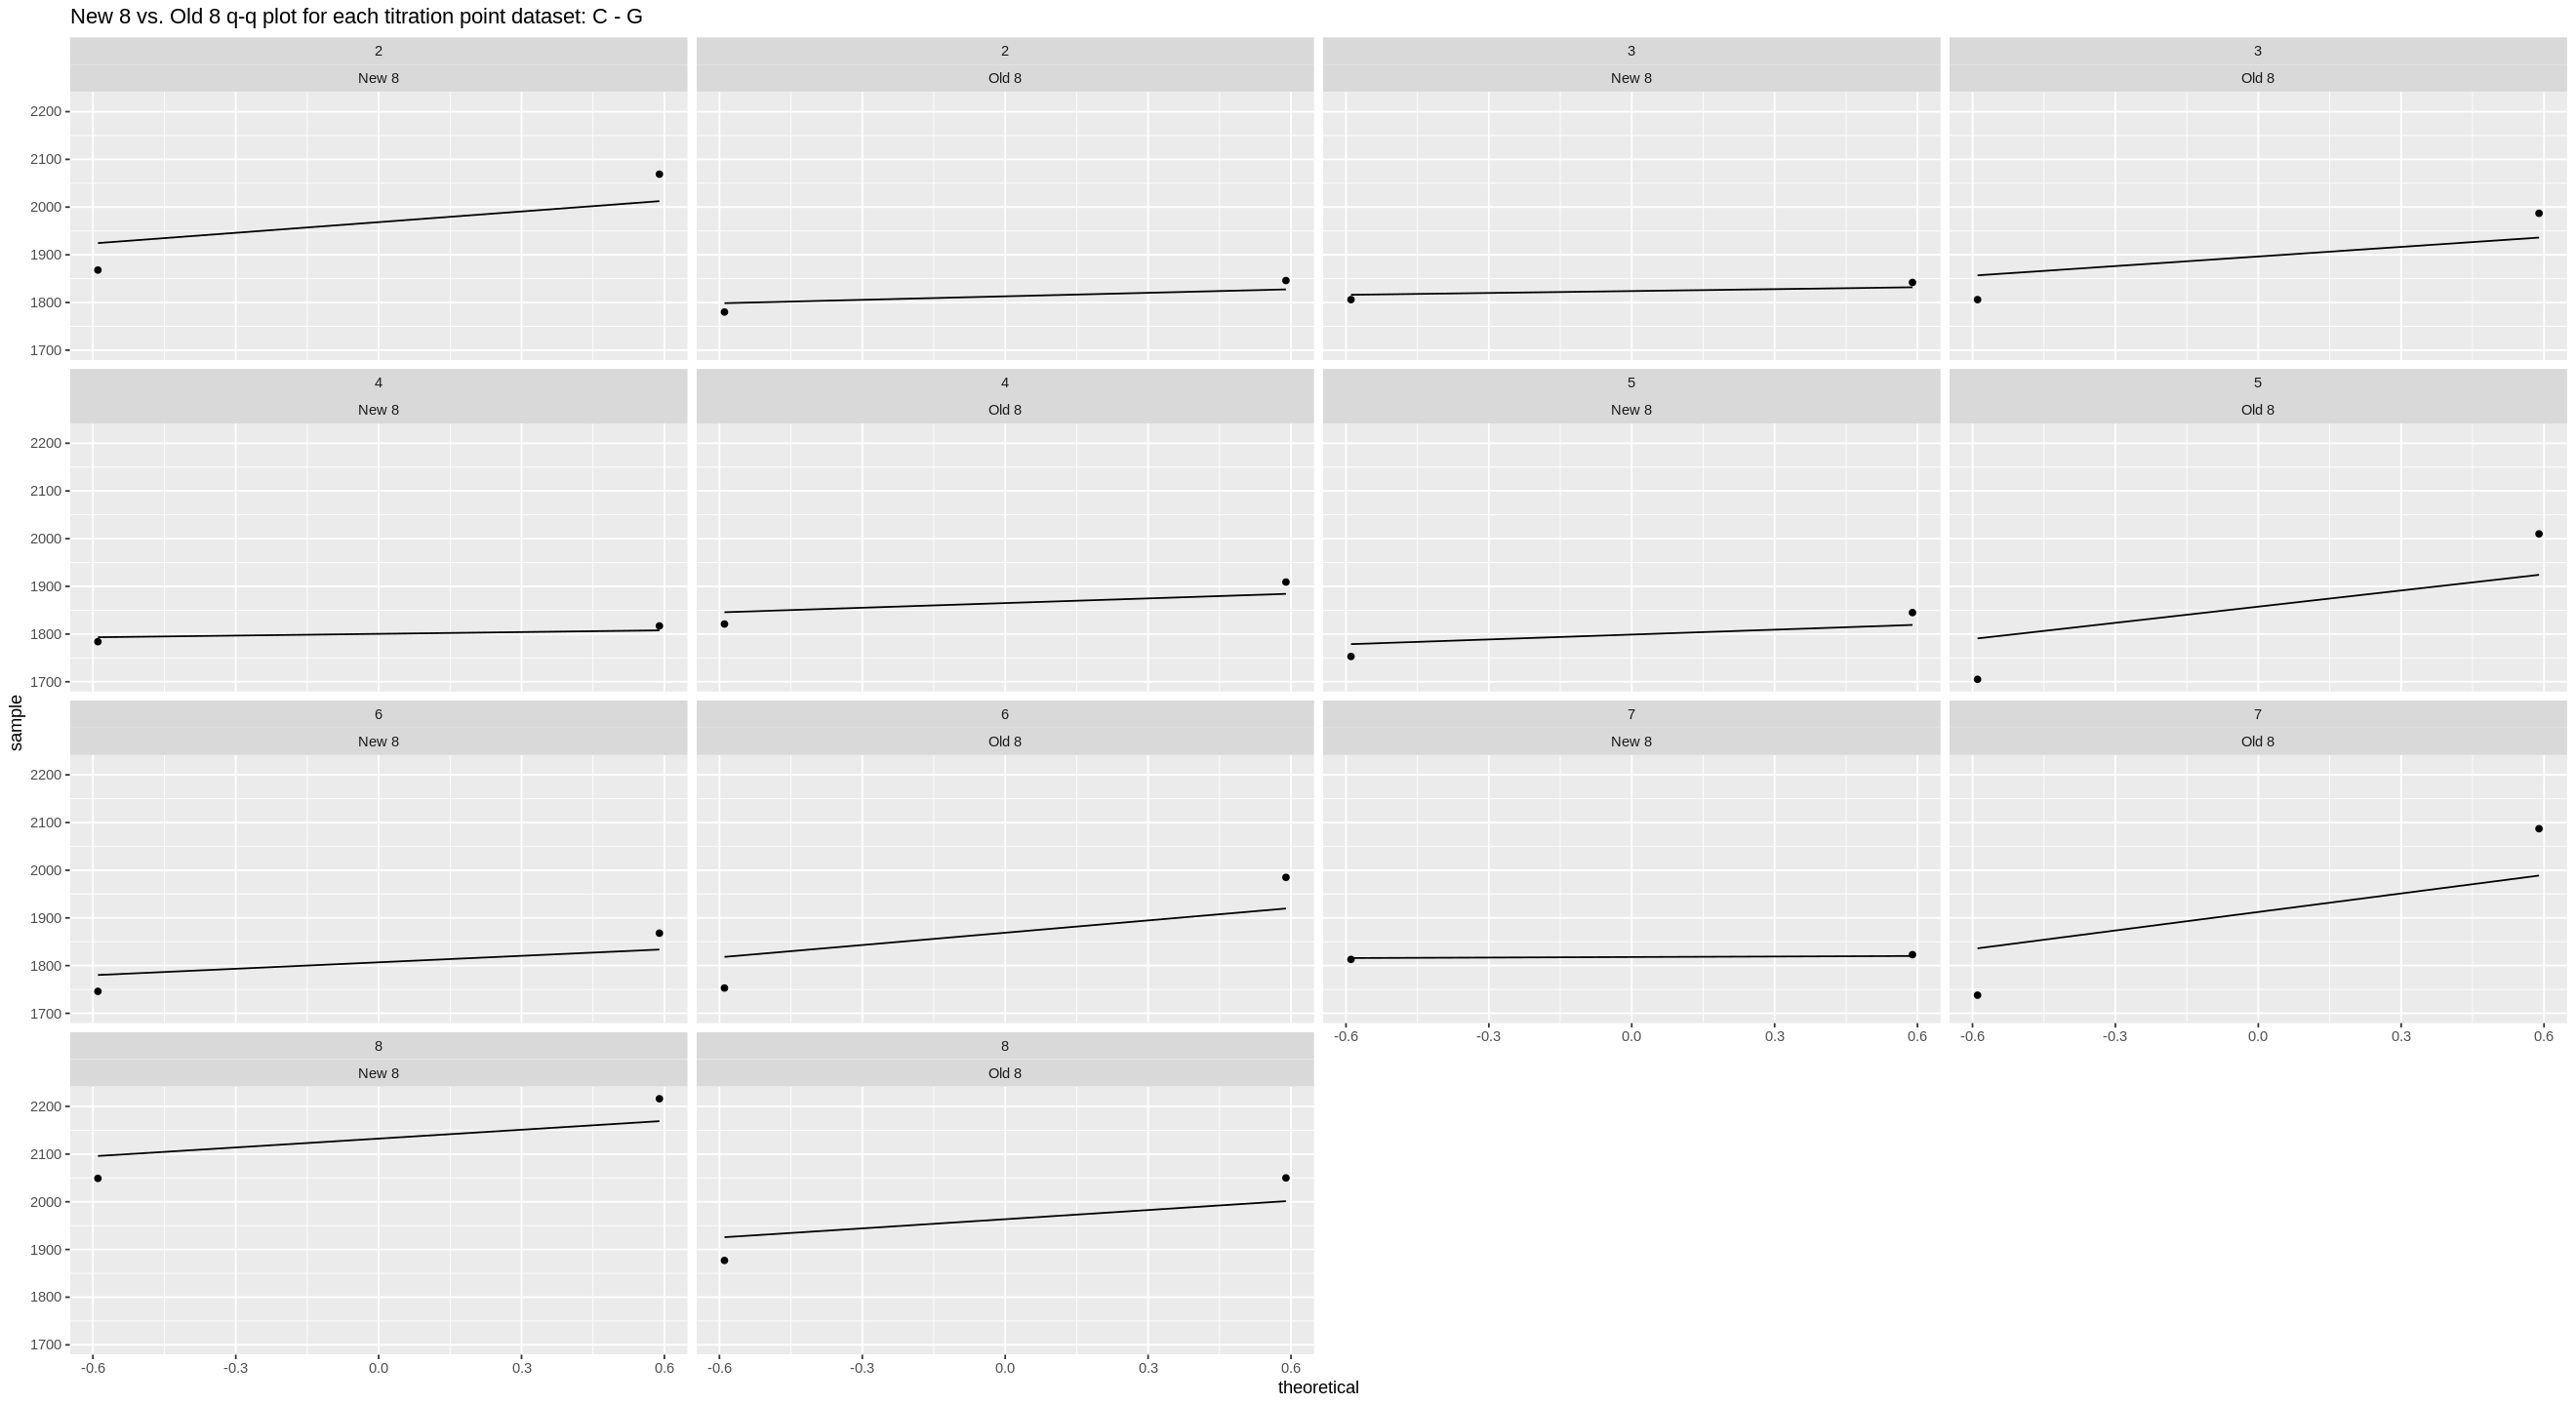

In [22]:
p_qq_cnt_ls[[3]]

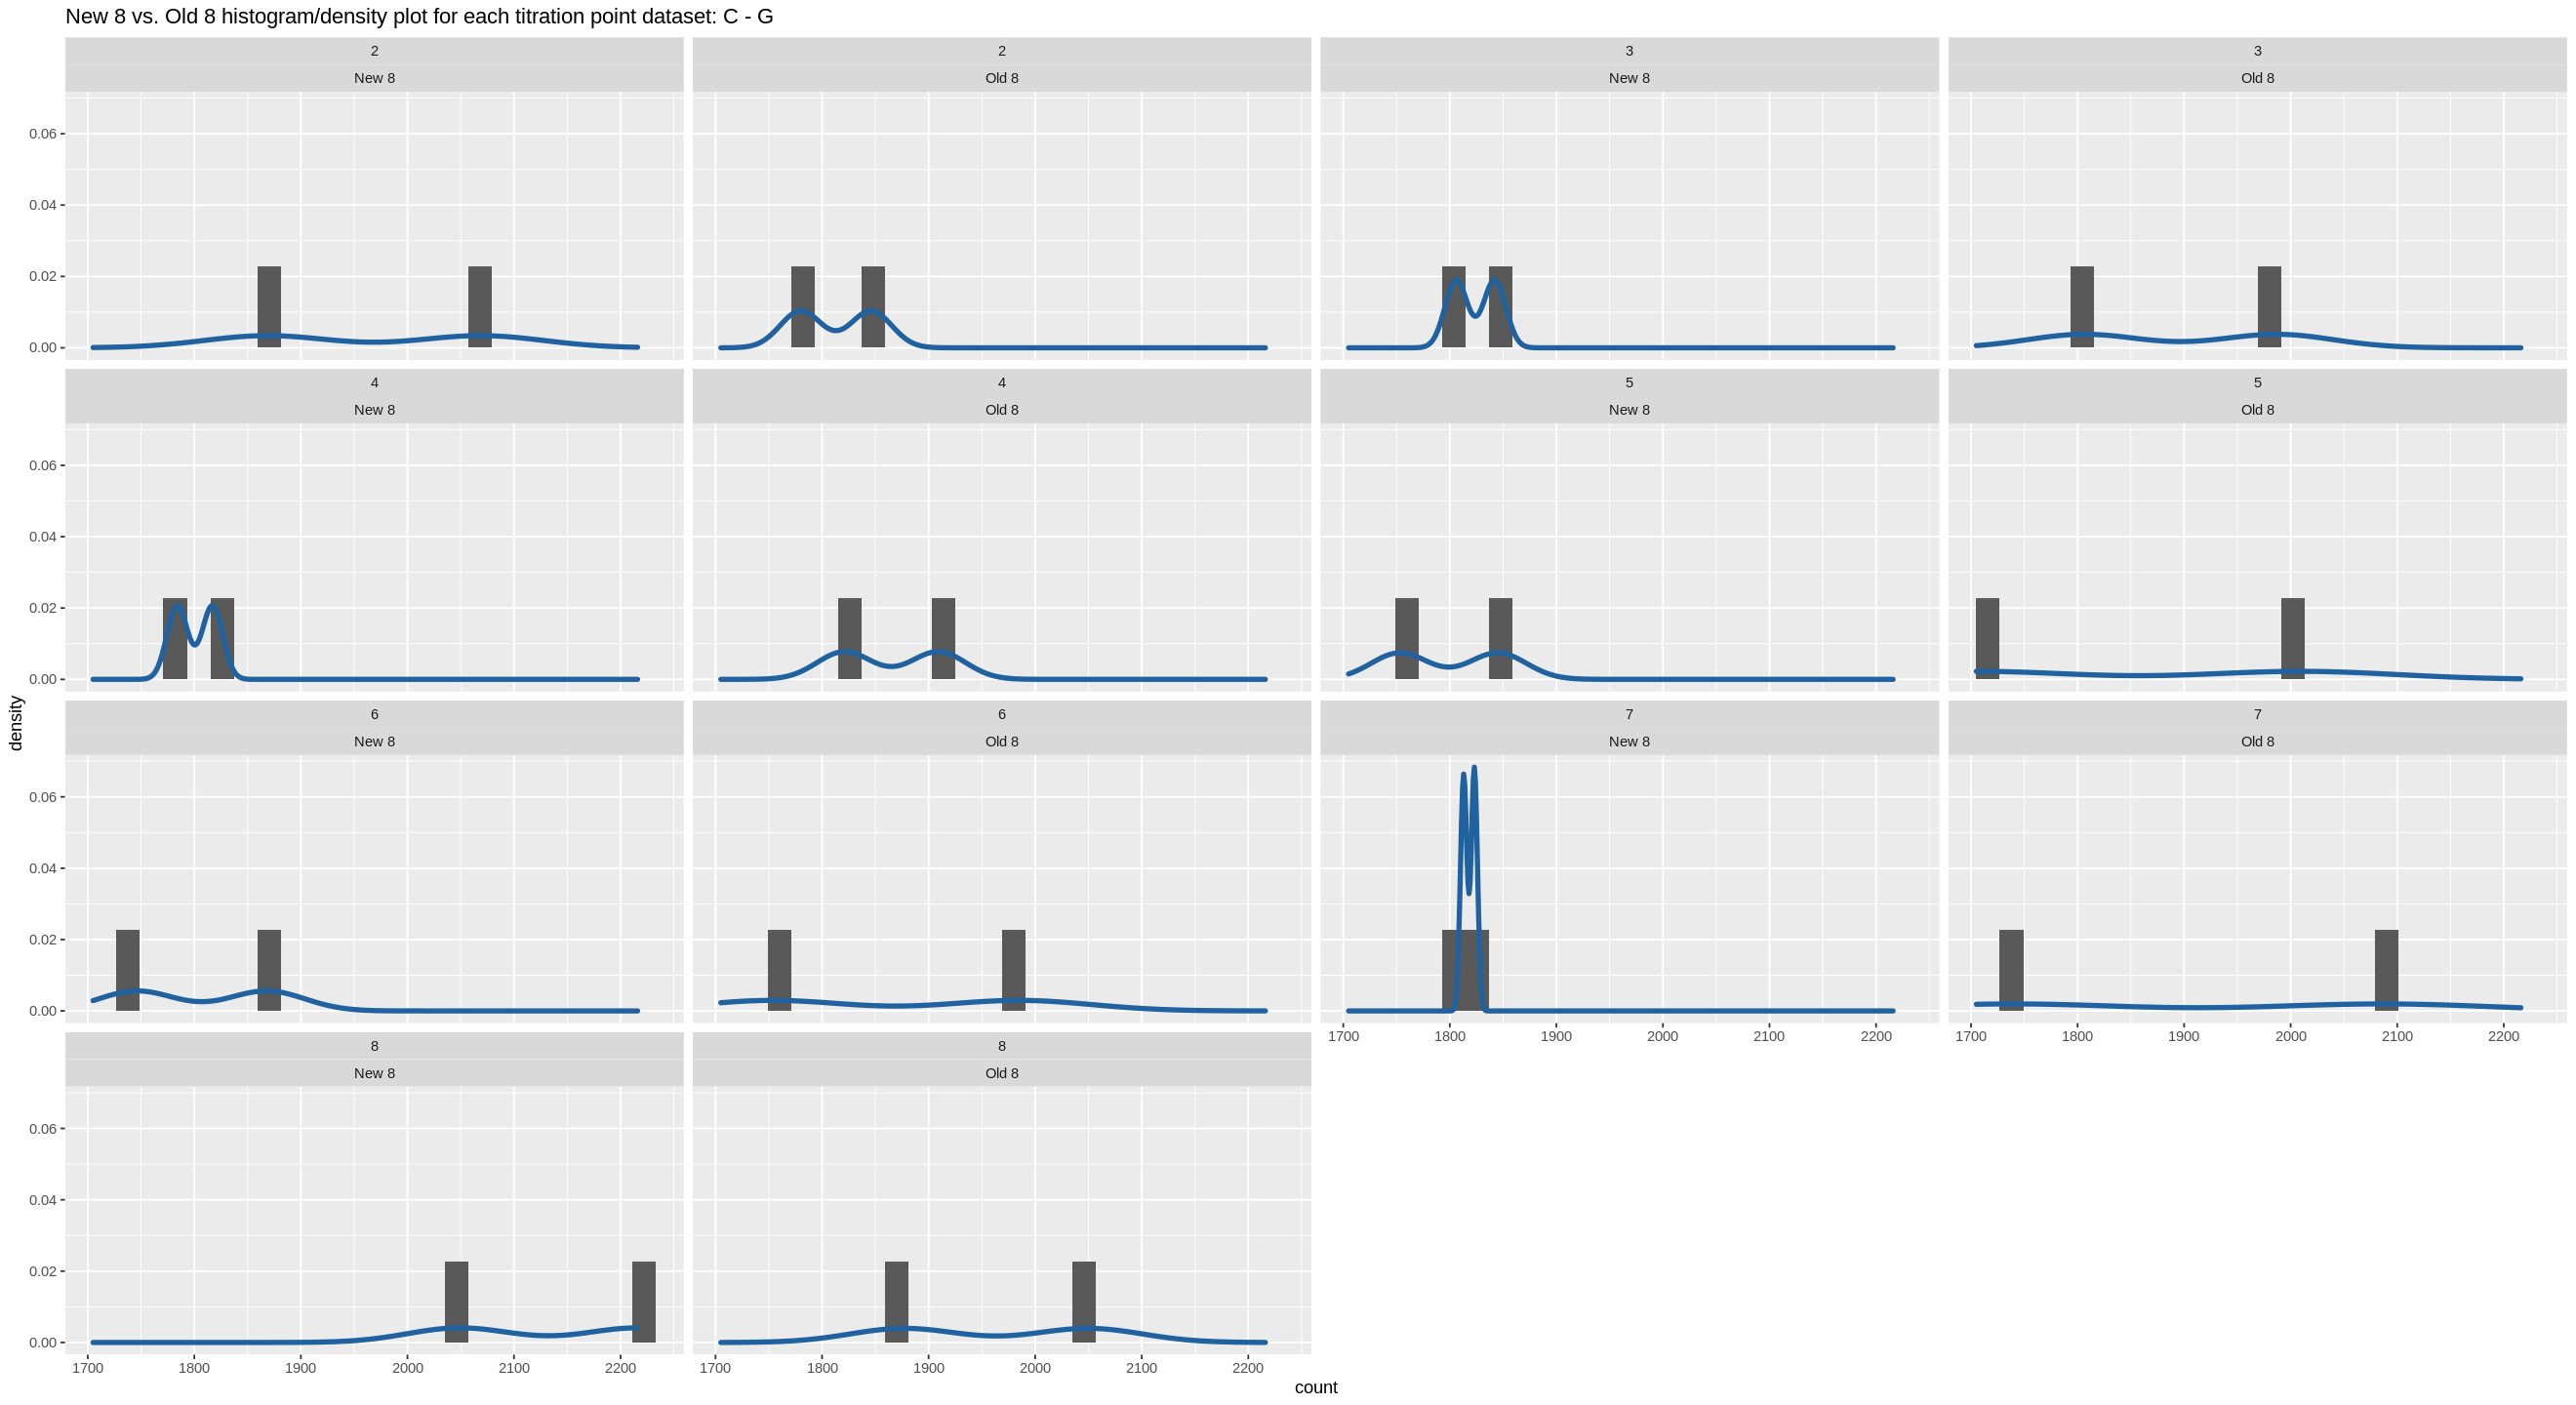

In [23]:
p_hst_cnt_ls[[3]]

In [24]:
# D-H
idx = c(4,8,12)
j = 4
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
p_qq_cnt_ls <- list()
p_hst_cnt_ls <- list()

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
}

dfo <- do.call(rbind, dfo)
dfn <- do.call(rbind, dfn)
df.t <- rbind(dfo, dfn)

p_qq_cnt_ls[[j]] <- ggplot(df.t, aes(sample = count)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(column~ method) +
            ggtitle(paste("New 8 vs. Old 8 q-q plot for each titration point dataset:", pat1, "-", pat2))

p_hst_cnt_ls[[j]] <- ggplot(data = df.t, aes(x = count)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(column~ method) +
    ggtitle(paste("New 8 vs. Old 8 histogram/density plot for each titration point dataset:", pat1, "-", pat2))

[1] "D - H old vs. new"
[1] "D2 - H2"
[1] "D3 - H3"
[1] "D4 - H4"
[1] "D5 - H5"
[1] "D6 - H6"
[1] "D7 - H7"
[1] "D8 - H8"


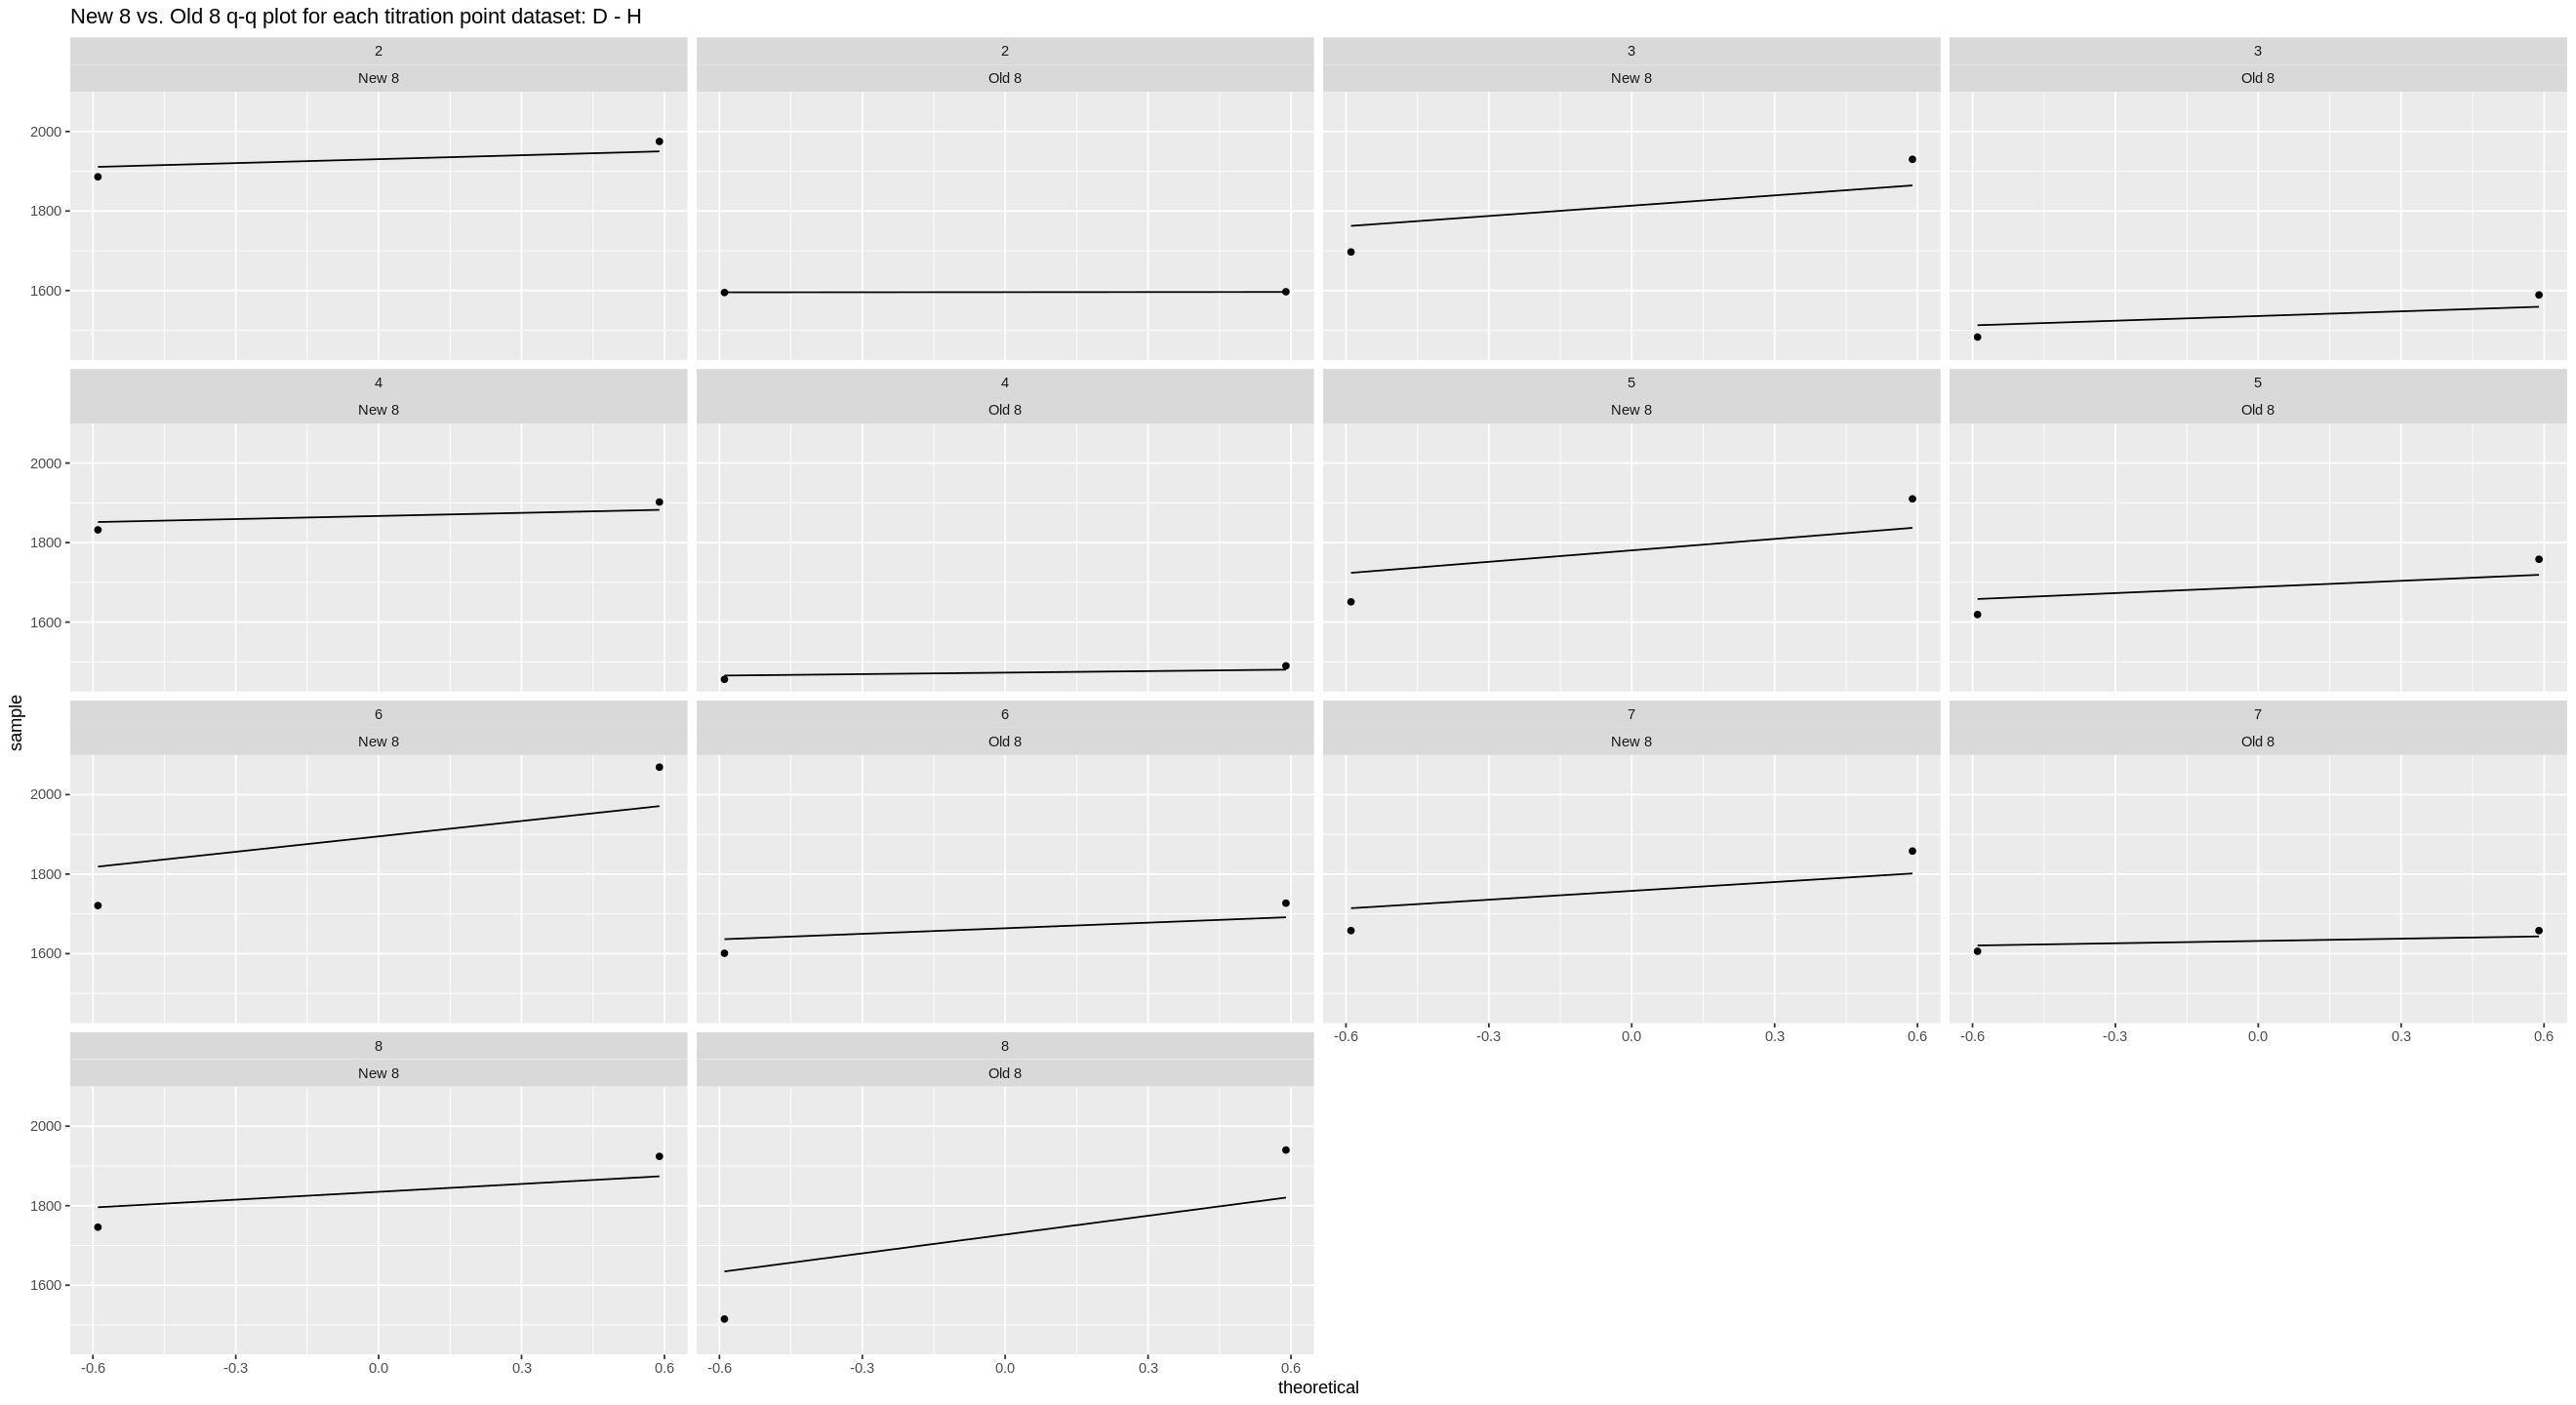

In [25]:
p_qq_cnt_ls[[4]]

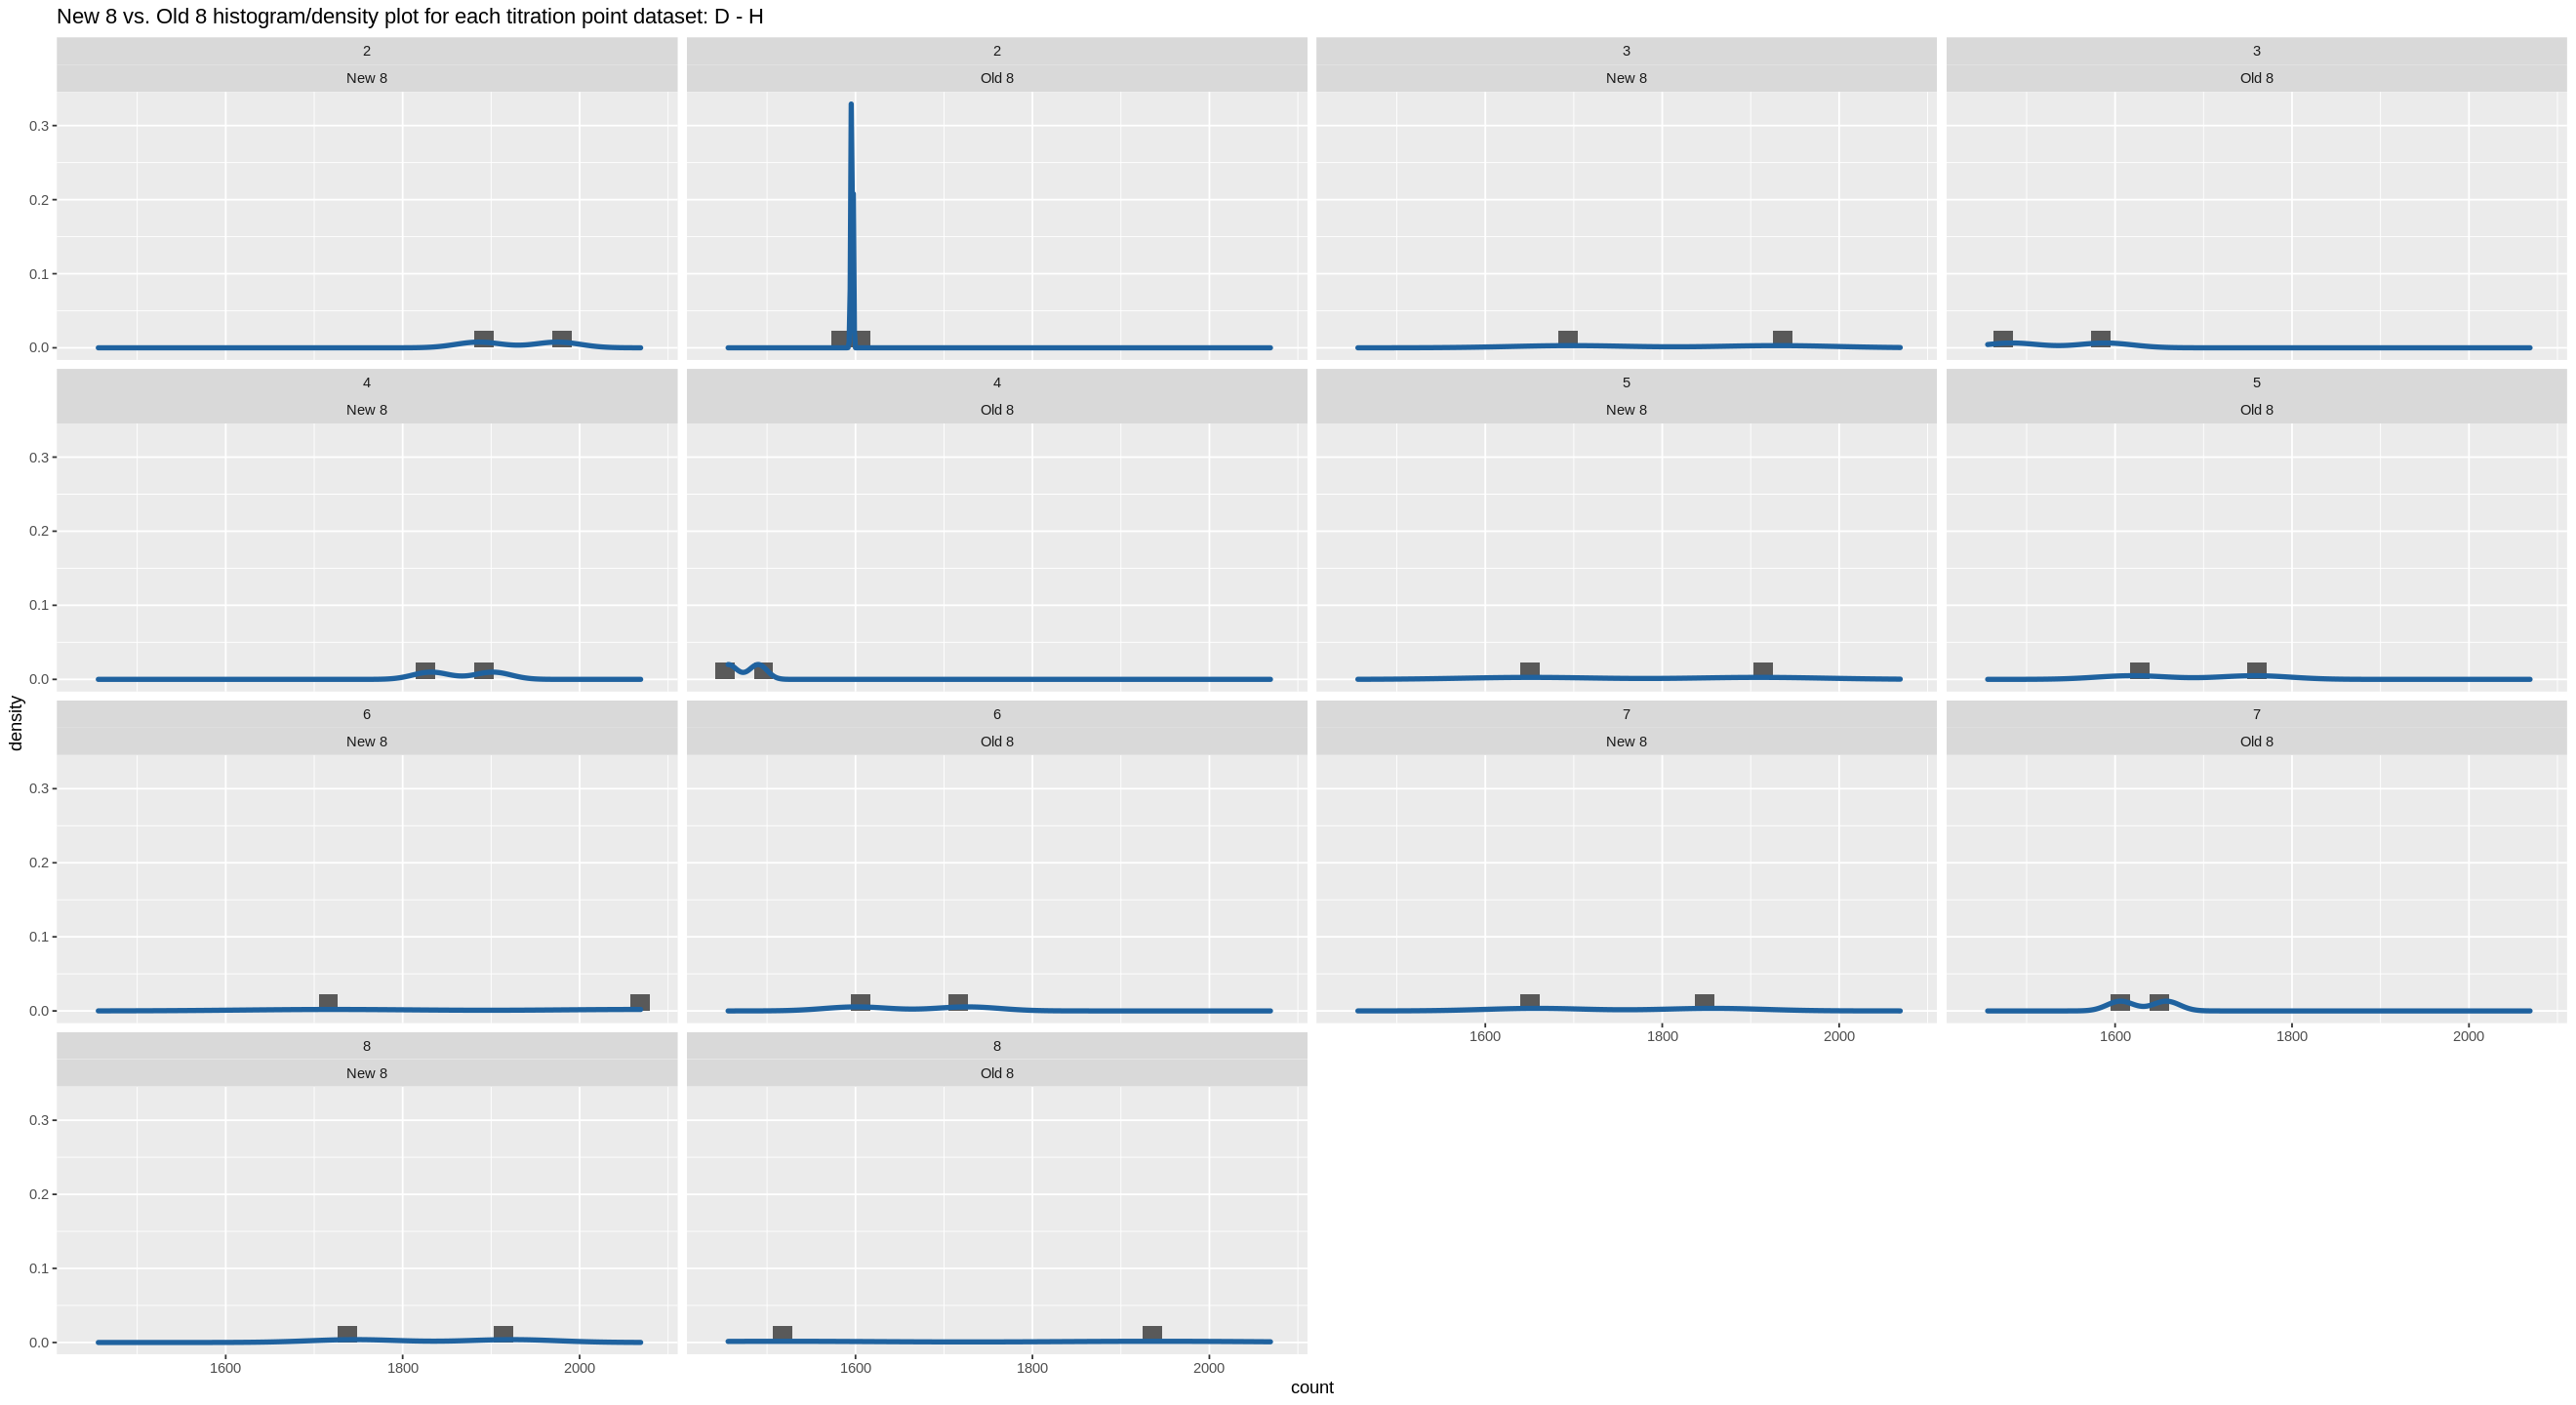

In [26]:
p_hst_cnt_ls[[4]]

In [28]:
dfn_sub_ls[[1]]

X Y Z   
1  2 A 1692
2  3 A 1720
3  4 A 2017
4  5 A 1635
5  6 A 1935
6  7 A 2039
7  8 A 2301
8  2 E 1702
9  3 E 1478
10 4 E 1313
11 5 E 1407
12 6 E 1447
13 7 E 1558
14 8 E 1873

In [29]:
p_qq_new8 <- list()
p_qq_old8 <- list()
p_hst_new8_cnt <- list()
p_hst_old8_cnt <- list()
df_pair_new8_cnt <- list()
df_pair_old8_cnt <- list()
start_seq <- seq(1,12,4)

for (i in seq(1)) {
    k = start_seq[i]
    df <- rbind(dfn_sub_ls[[k]],dfn_sub_ls[[k+1]],dfn_sub_ls[[k+2]],dfn_sub_ls[[k+3]]) %>% 
          mutate(grp = case_when(
                Y == "A" ~ "A-E",
                Y == "B" ~ "B-F",
                Y == "C" ~ "C-G",
                Y == "D" ~ "D-H",
                Y == "E" ~ "A-E",
                Y == "F" ~ "B-F",
                Y == "G" ~ "C-G",
                Y == "H" ~ "D-H"
            ))
    df_pair_new8_cnt[[i]] <- df
    p_qq_new8[[i]] <- ggplot(df, aes(sample = Z)) + 
                    stat_qq() + 
                    stat_qq_line() +
                    facet_wrap(~ grp)
    
    p_hst_new8_cnt[[i]] <- ggplot(data = df, aes(x = Z)) +
        geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
        geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
        facet_wrap(~ grp)
    
    df <- rbind(dfo_sub_ls[[k]],dfo_sub_ls[[k+1]],dfo_sub_ls[[k+2]],dfo_sub_ls[[k+3]]) %>% 
          mutate(grp = case_when(
                Y == "A" ~ "A-E",
                Y == "B" ~ "B-F",
                Y == "C" ~ "C-G",
                Y == "D" ~ "D-H",
                Y == "E" ~ "A-E",
                Y == "F" ~ "B-F",
                Y == "G" ~ "C-G",
                Y == "H" ~ "D-H"
            ))
    
    df_pair_old8_cnt[[i]] <- df
    p_qq_old8[[i]] <- ggplot(df, aes(sample = Z)) + 
                    stat_qq() + 
                    stat_qq_line() +
                    facet_wrap(~ grp)
    
    p_hst_old8_cnt[[i]] <- ggplot(data = df, aes(x = Z)) +
        geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
        geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
        facet_wrap(~ grp)
    }

### Wilcoxon rank test

- check that the median of pairwise differences is different 
- non-parametric statistical test to compare 2 related samples, matched samples or repeated measurements on single sample to assess whether their population mean ranks differ 
- an alternative to t-test; this is when we can't assume the two populatios are normally distributed; determine wheterh two dependent samples were selected from populations have the same distribution
- analysis below shows using both wilcox and t-test the sample mean for intra-plate is very different
- assume not normal distribution

#### t test for new vs old plate sets
- check mean sample difference between two datasets
- requires normal and linear data

###### info
- the data will output 8 wilcoxon and t-test results for each titration point across 3 plates totalling to 6 per group since there are 2 data points per plate 

In [30]:
# print helper function
prnt_wt_test <- function(dfo, dfn) {
    stat <- wilcox.test(x = dfo %>% 
                        select(count) %>%
                        pull(), 
                    y = dfn %>%
                        select(count) %>%
                        pull(), 
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 
    print(stat)
    stat2 <- t.test(x = dfo %>% 
                        select(count) %>%
                        pull(), 
                    y = dfn %>%
                        select(count) %>%
                        pull(), 
       alternative = "two.sided",
       paired = FALSE, var.equal = FALSE,
       conf.level = 0.95) 
    return(list(stat, stat2))
        }

In [142]:
# A-E old 8 vs new 8
idx = c(1,5,9)
j = 1
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df_stats <- setNames(data.frame(matrix(ncol = 2, nrow = 0)), c("WILCOXON_TEST", "T_TEST"))

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    stat_ls <- prnt_wt_test(dfo[[i-1]], dfn[[i-1]])
    df_stats[i-1, "WILCOXON_TEST"] = formatC(stat_ls[[1]]$p.value, format = "e", digits = 2)
    df_stats[i-1, "T_TEST"] = formatC(stat_ls[[2]]$p.value, format = "e", digits = 2)
}

write.csv(df_stats, paste0("8v8_stats2_cnt_", pat1, pat2,".csv"), row.names = FALSE)

[1] "A - E old vs. new"
[1] "A2 - E2"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 4, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "A3 - E3"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 4, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "A4 - E4"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 2, p-value = 1
alternative hypothesis: true location shift is not equal to 0

[1] "A5 - E5"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 4, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "A6 - E6"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 2, p-value = 1

In [143]:
# B-F old 8 vs new 8

idx = c(2,6,10)
j = 2
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    stat_ls <- prnt_wt_test(dfo[[i-1]], dfn[[i-1]])
    df_stats[i-1, "WILCOXON_TEST"] = formatC(stat_ls[[1]]$p.value, format = "e", digits = 2)
    df_stats[i-1, "T_TEST"] = formatC(stat_ls[[2]]$p.value, format = "e", digits = 2)
}
write.csv(df_stats, paste0("8v8_stats2_cnt_", pat1, pat2,".csv"), row.names = FALSE)

[1] "B - F old vs. new"
[1] "B2 - F2"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 4, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "B3 - F3"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 4, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "B4 - F4"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 4, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "B5 - F5"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 4, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "B6 - F6"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 4, p-valu

In [144]:
# C-G old 8 vs new 8
idx = c(3,7,11)
j = 3
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    stat_ls <- prnt_wt_test(dfo[[i-1]], dfn[[i-1]])
    df_stats[i-1, "WILCOXON_TEST"] = formatC(stat_ls[[1]]$p.value, format = "e", digits = 2)
    df_stats[i-1, "T_TEST"] = formatC(stat_ls[[2]]$p.value, format = "e", digits = 2)
}
write.csv(df_stats, paste0("8v8_stats2_cnt_", pat1, pat2,".csv"), row.names = FALSE)

[1] "C - G old vs. new"
[1] "C2 - G2"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "C3 - G3"


Warning message in wilcox.test.default(x = dfo %>% select(count) %>% pull(), y = dfn %>% :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 2.5, p-value = 1
alternative hypothesis: true location shift is not equal to 0

[1] "C4 - G4"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 4, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "C5 - G5"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 2, p-value = 1
alternative hypothesis: true location shift is not equal to 0

[1] "C6 - G6"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 3, p-value = 0.6667
alternative hypothesis: true location shift is not equal to 0

[1] "C7 - G7"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 2, p-value = 1
alternative hypothe

In [145]:
# D-H old 8 vs new 8
idx = c(4,8,12)
j = 4
jj <- c(1,2,3)
dfo <- list()
dfn <- list()
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    #NEW
    df.tmp <- df.new %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfn[[i-1]] <- df.tmp
    #OLD
    df.tmp <- df.old %>% filter(X == i)
    colnames(df.tmp) = c("column", "letter", "count", "plate", "method")
    dfo[[i-1]] <- df.tmp
    stat_ls <- prnt_wt_test(dfo[[i-1]], dfn[[i-1]])
    df_stats[i-1, "WILCOXON_TEST"] = formatC(stat_ls[[1]]$p.value, format = "e", digits = 2)
    df_stats[i-1, "T_TEST"] = formatC(stat_ls[[2]]$p.value, format = "e", digits = 2)
}
write.csv(df_stats, paste0("8v8_stats2_cnt_", pat1, pat2,".csv"), row.names = FALSE)

[1] "D - H old vs. new"
[1] "D2 - H2"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "D3 - H3"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "D4 - H4"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0, p-value = 0.3333
alternative hypothesis: true location shift is not equal to 0

[1] "D5 - H5"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 1, p-value = 0.6667
alternative hypothesis: true location shift is not equal to 0

[1] "D6 - H6"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 1, p-valu

Warning message in wilcox.test.default(x = dfo %>% select(count) %>% pull(), y = dfn %>% :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 0.5, p-value = 0.4142
alternative hypothesis: true location shift is not equal to 0

[1] "D8 - H8"

	Wilcoxon rank sum exact test

data:  dfo %>% select(count) %>% pull() and dfn %>% select(count) %>% pull()
W = 2, p-value = 1
alternative hypothesis: true location shift is not equal to 0



#### Box plots for n=3 plates

[1] "New 8 vs. Old 8 rows: D - H"


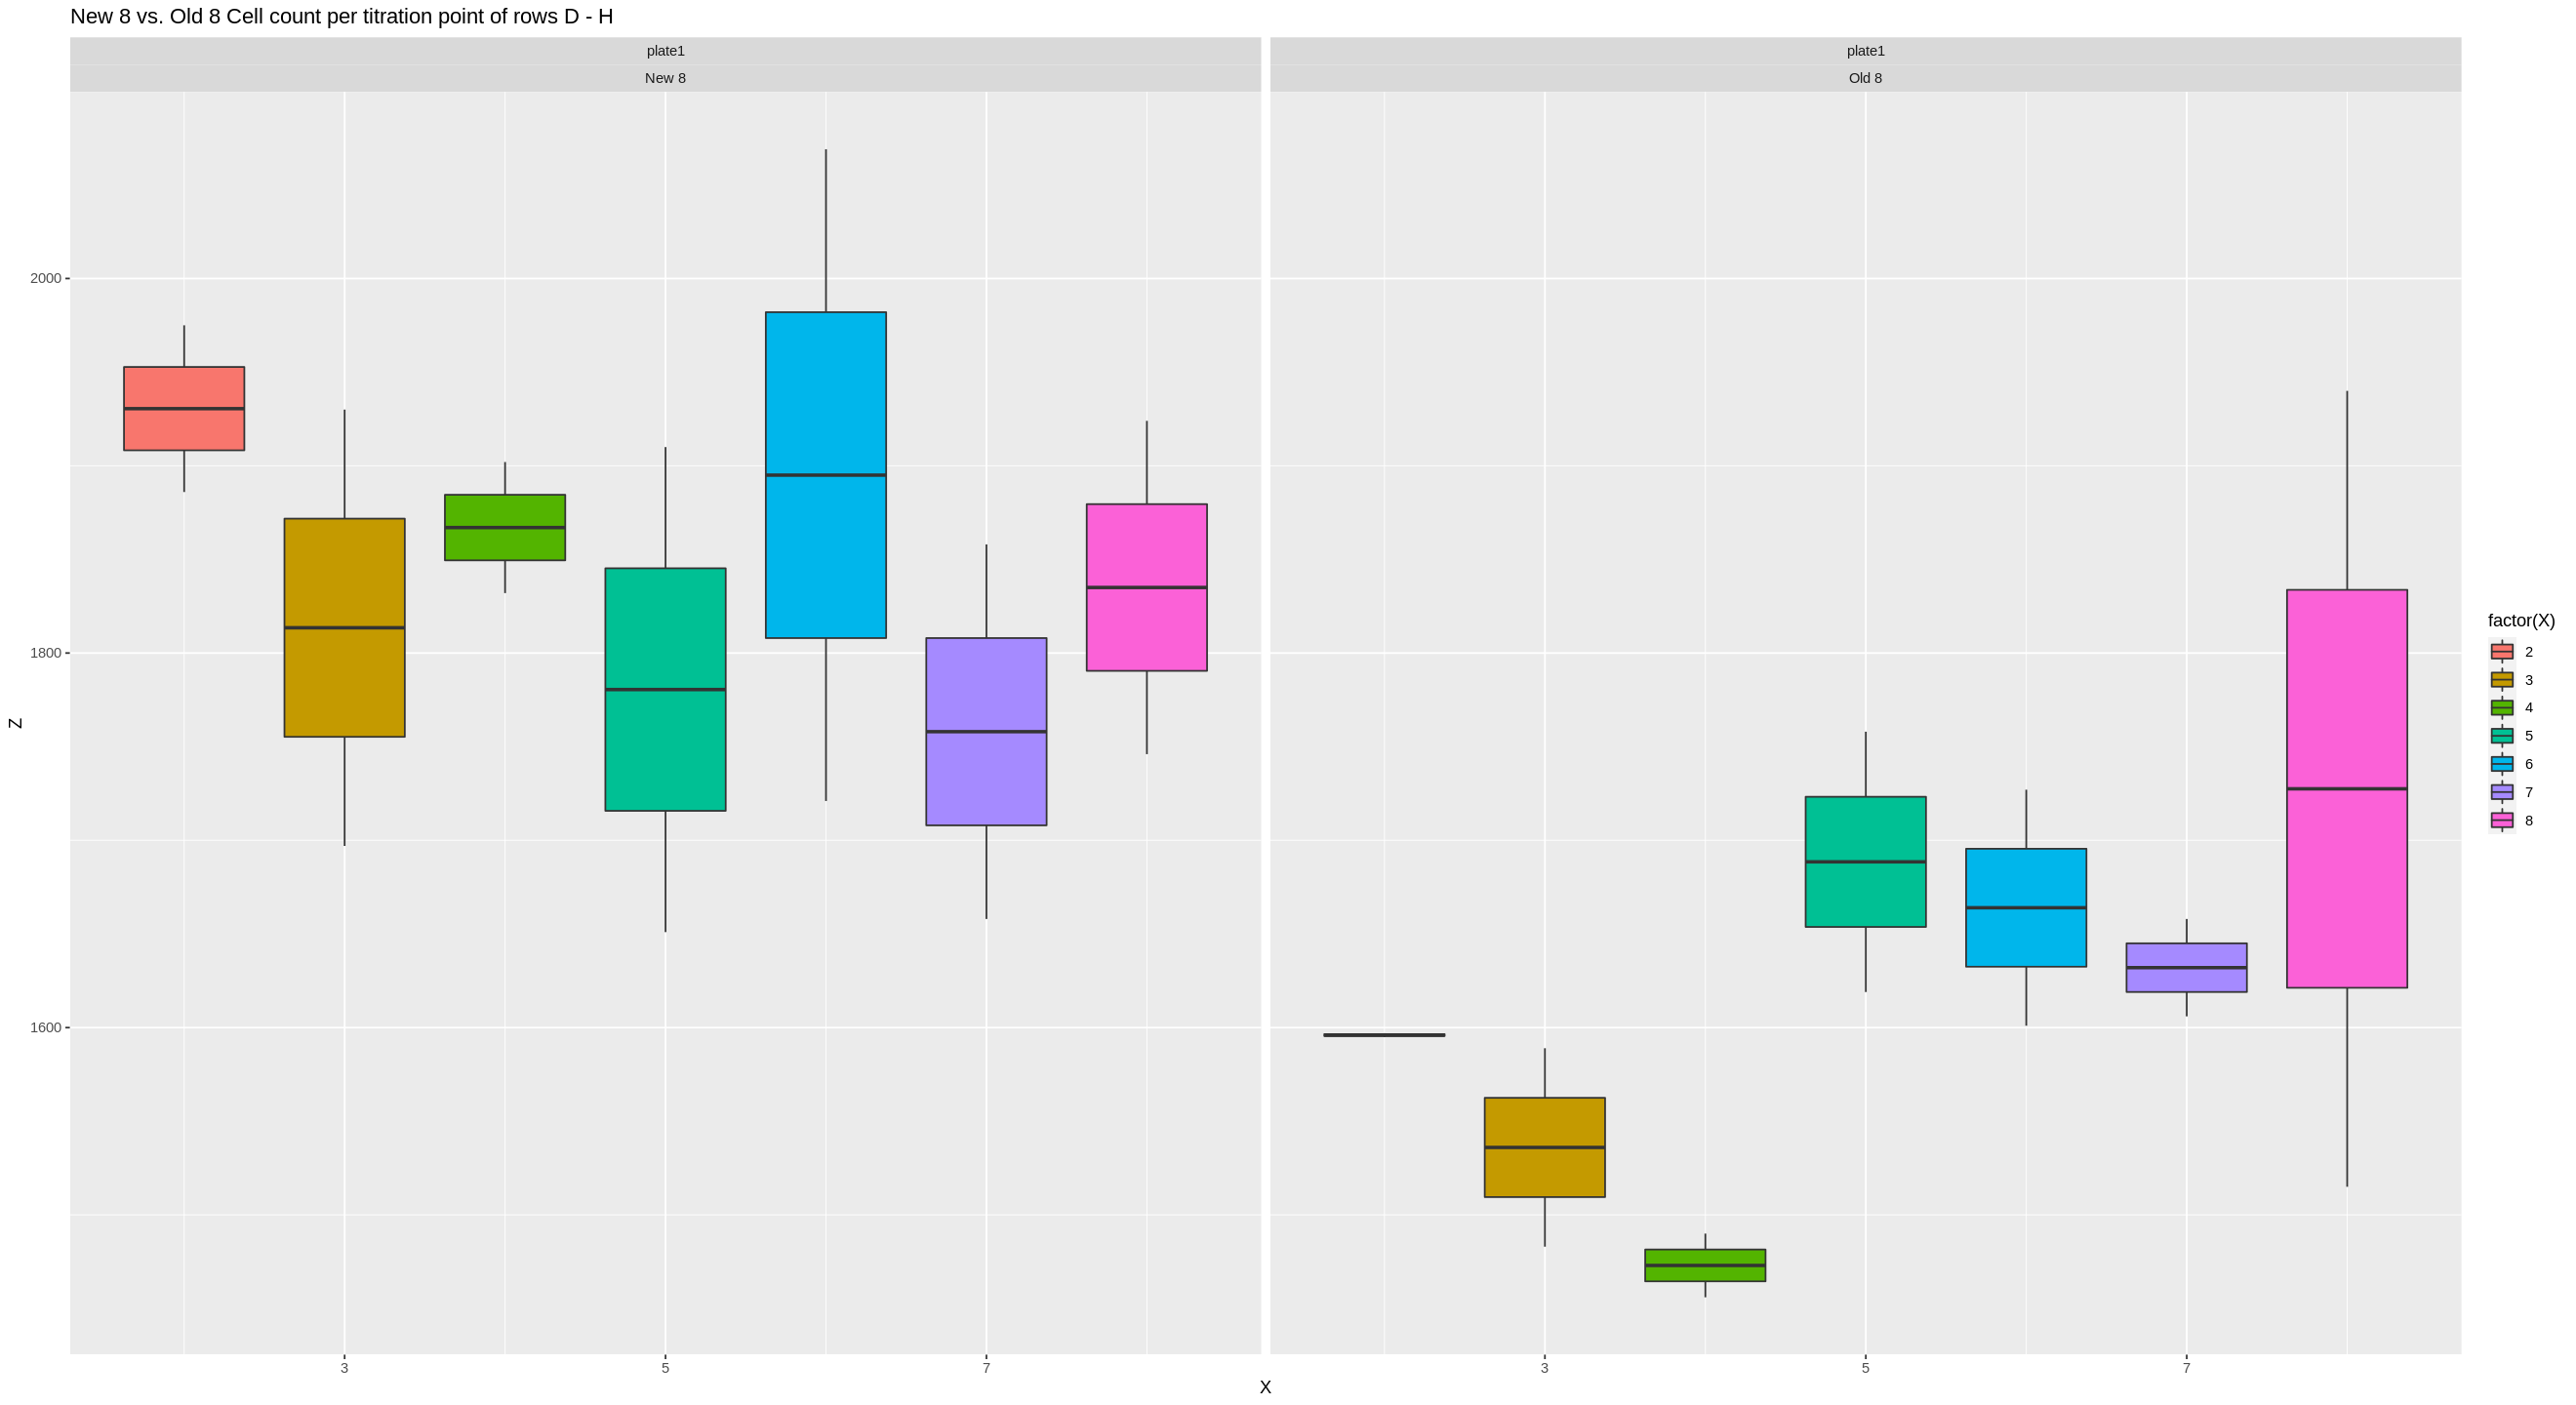

In [35]:
# D-H old 8 vs new 8
idx = c(4,8,12)
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("New 8 vs. Old 8 rows:", pat1, "-", pat2))

dff <- bind_rows(df.old, df.new)  %>% filter(Y == pat1 | Y == pat2)

ggplot(dff, aes(x=X,y=Z, group = X, fill = factor(X))) +
  geom_boxplot() + 
  labs(title=paste("New 8 vs. Old 8 Cell count per titration point of rows", pat1, "-", pat2)) +
  facet_wrap(plate~method, ncol = 2)

In [11]:
#df_boxp_new8_ls <- do.call(rbind, df_boxp_new8_ls) %>% 
#                    mutate(method = "New")
#
#df_boxp_old8_ls <- do.call(rbind, df_boxp_old8_ls) %>% 
#                    mutate(method = "Old")
#
#dff <- rbind(df_boxp_new8_ls, df_boxp_old8_ls)

[1] "New 8 vs. Old 8 rows: C - G"


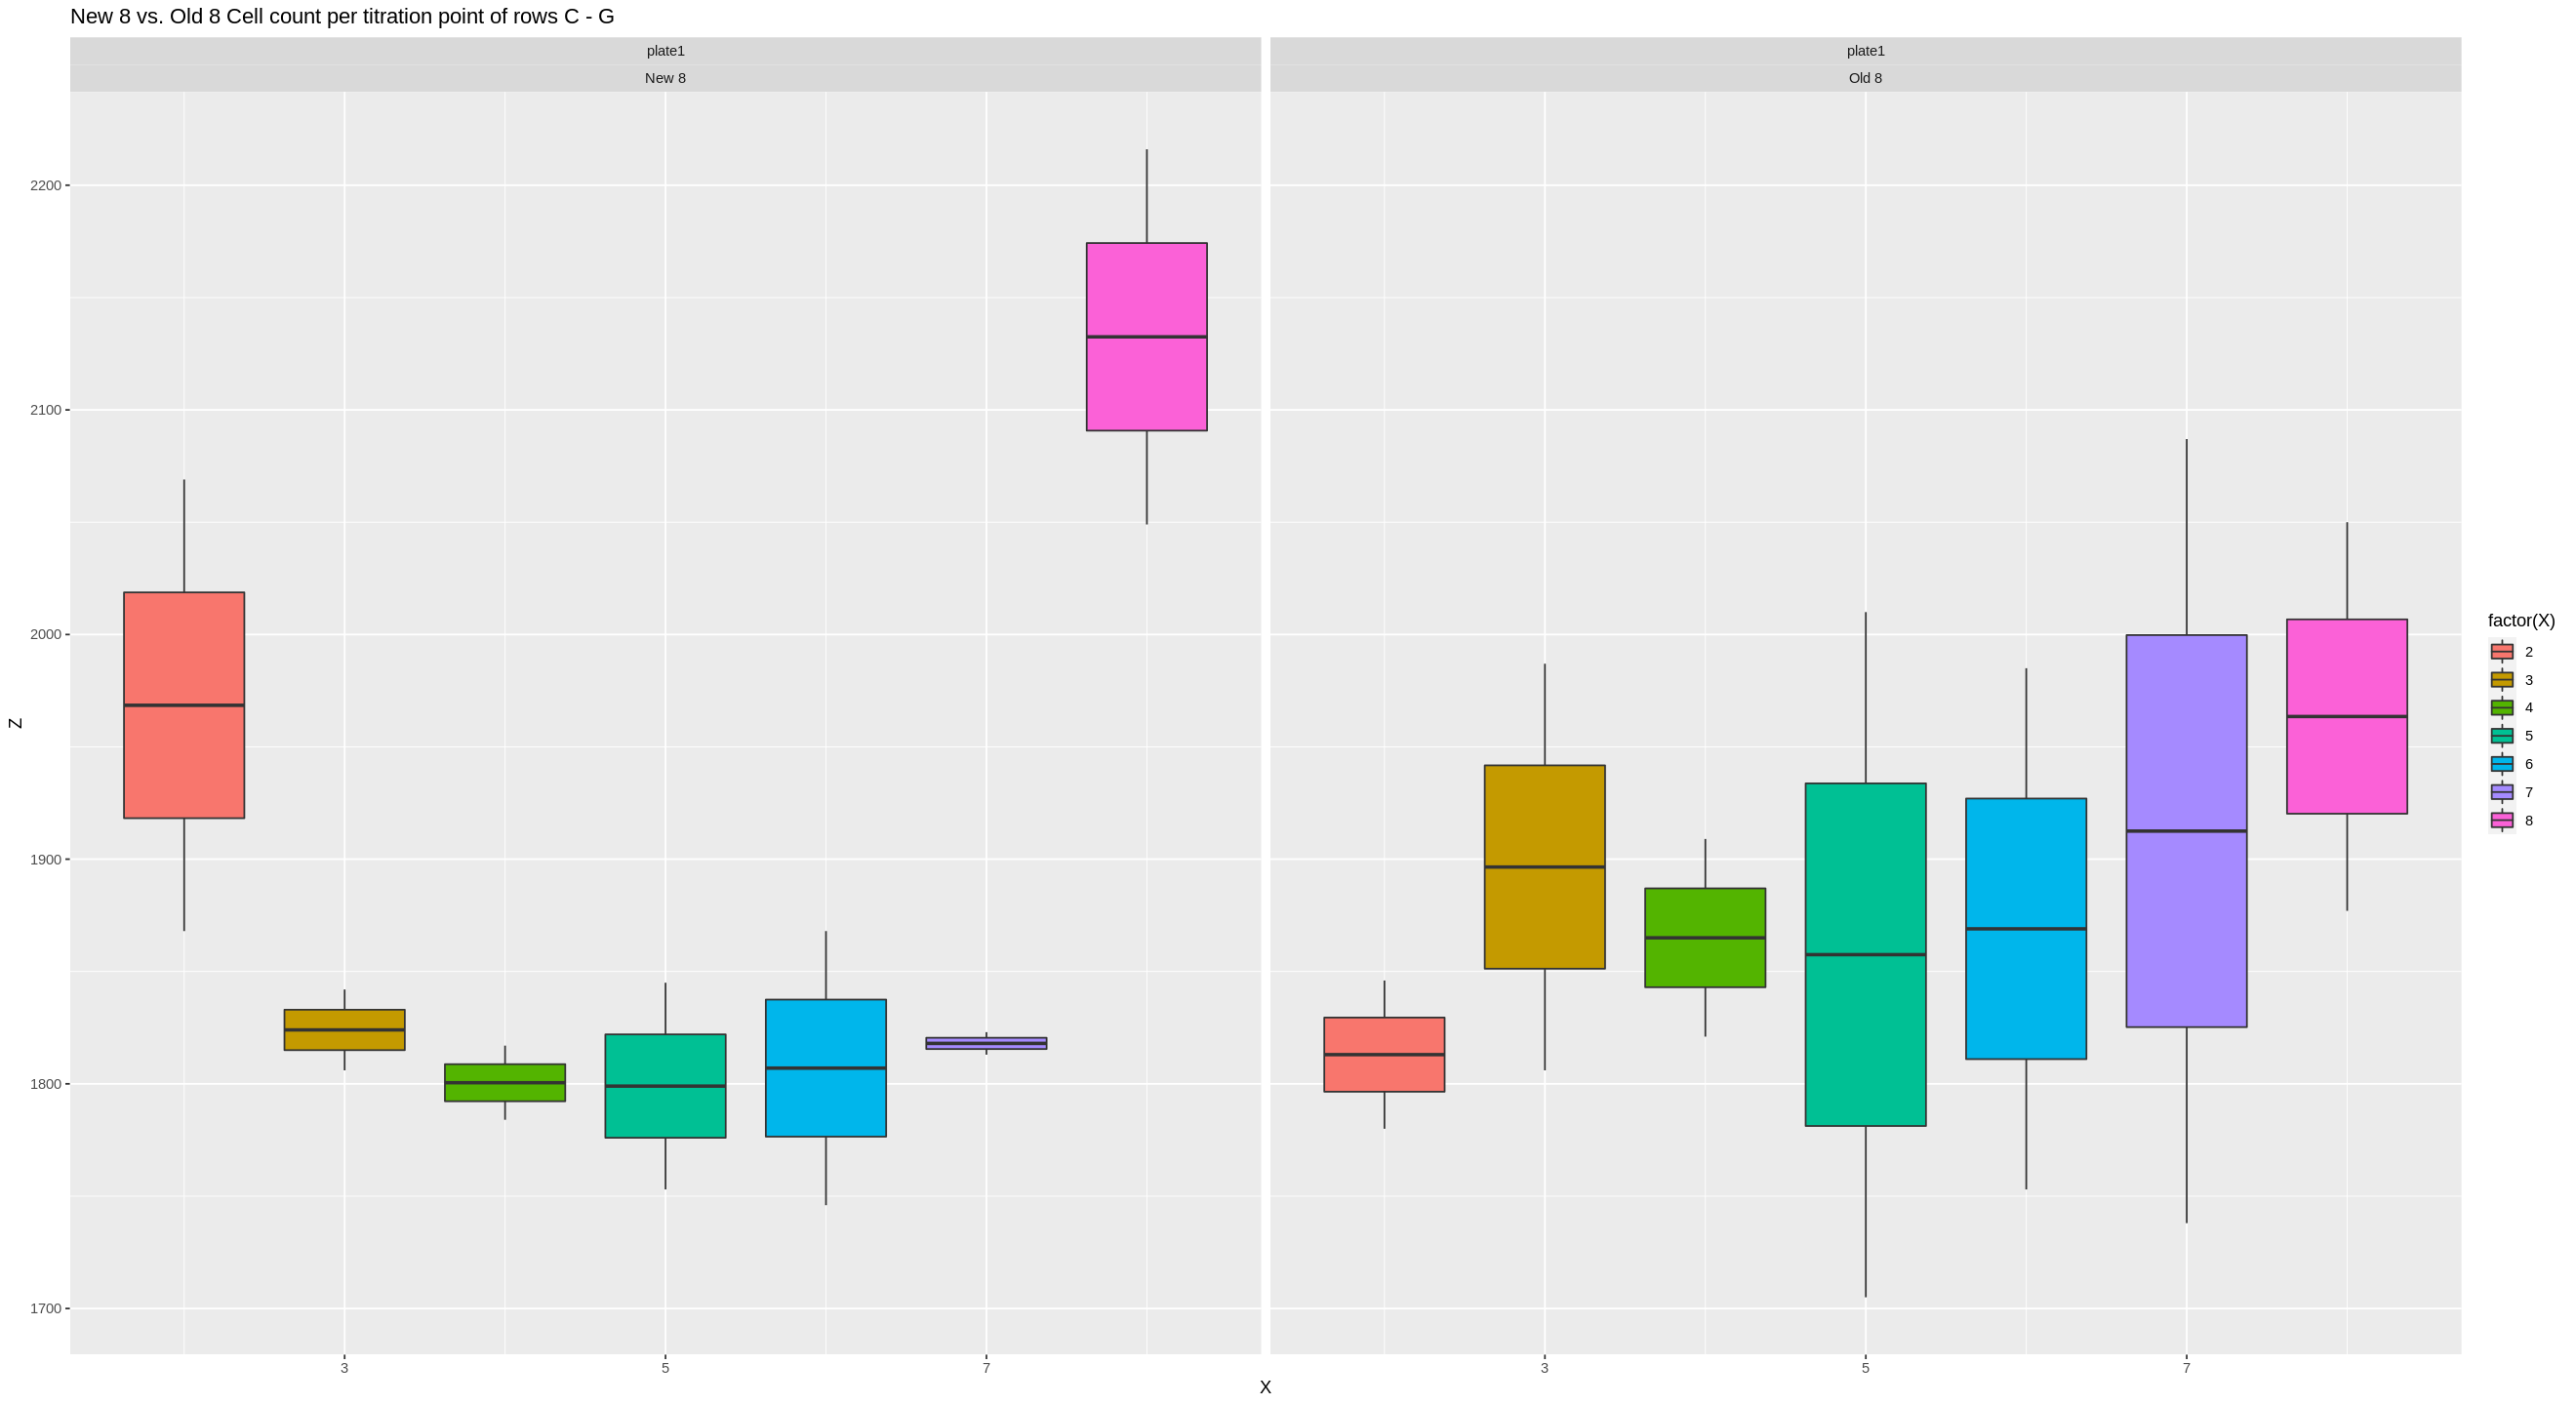

In [36]:
# C-G old 8 vs new 8
idx = c(3,7,11)
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("New 8 vs. Old 8 rows:", pat1, "-", pat2))

dff <- bind_rows(df.old, df.new)  %>% filter(Y == pat1 | Y == pat2)

ggplot(dff, aes(x=X,y=Z, group = X, fill = factor(X))) +
  geom_boxplot() + 
  labs(title=paste("New 8 vs. Old 8 Cell count per titration point of rows", pat1, "-", pat2)) +
  facet_wrap(plate~method, ncol = 2)

[1] "New 8 vs. Old 8 rows: B - F"


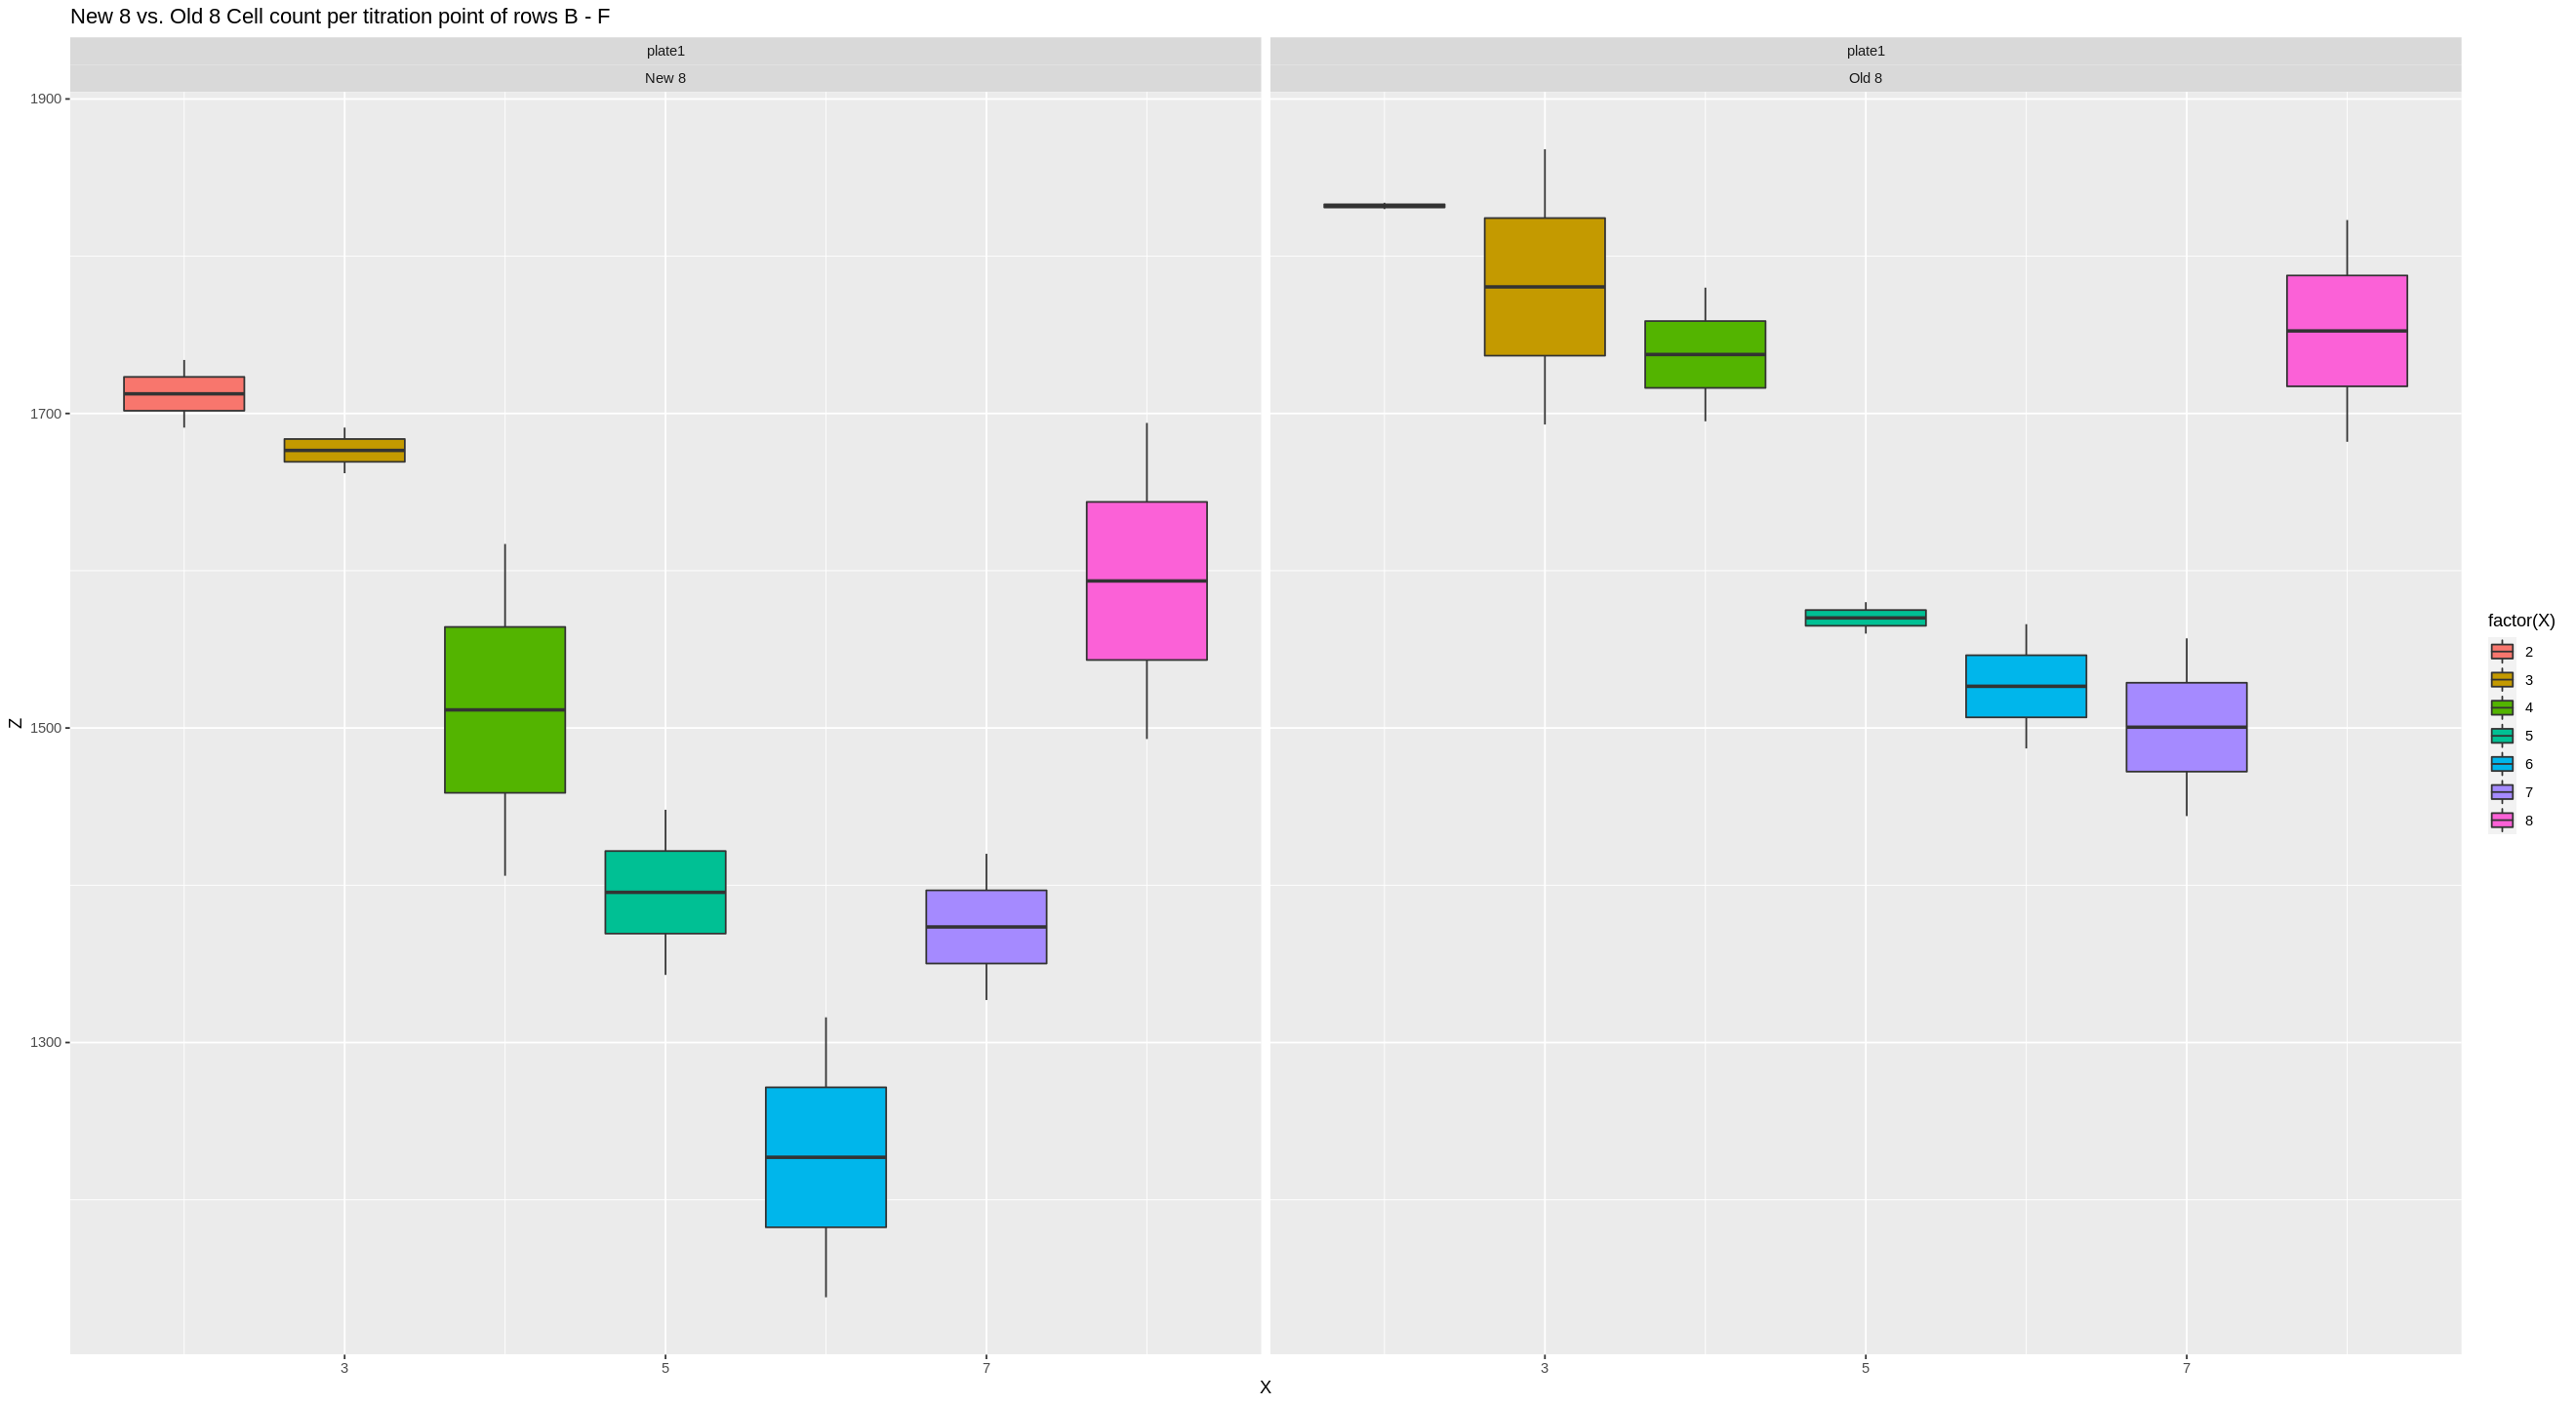

In [37]:
# B-F old 8 vs new 8
idx = c(2,6,10)
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("New 8 vs. Old 8 rows:", pat1, "-", pat2))

dff <- bind_rows(df.old, df.new)  %>% filter(Y == pat1 | Y == pat2)

ggplot(dff, aes(x=X,y=Z, group = X, fill = factor(X))) +
  geom_boxplot() + 
  labs(title=paste("New 8 vs. Old 8 Cell count per titration point of rows", pat1, "-", pat2)) +
  facet_wrap(plate~method, ncol = 2)

[1] "New 8 vs. Old 8 rows: A - E"


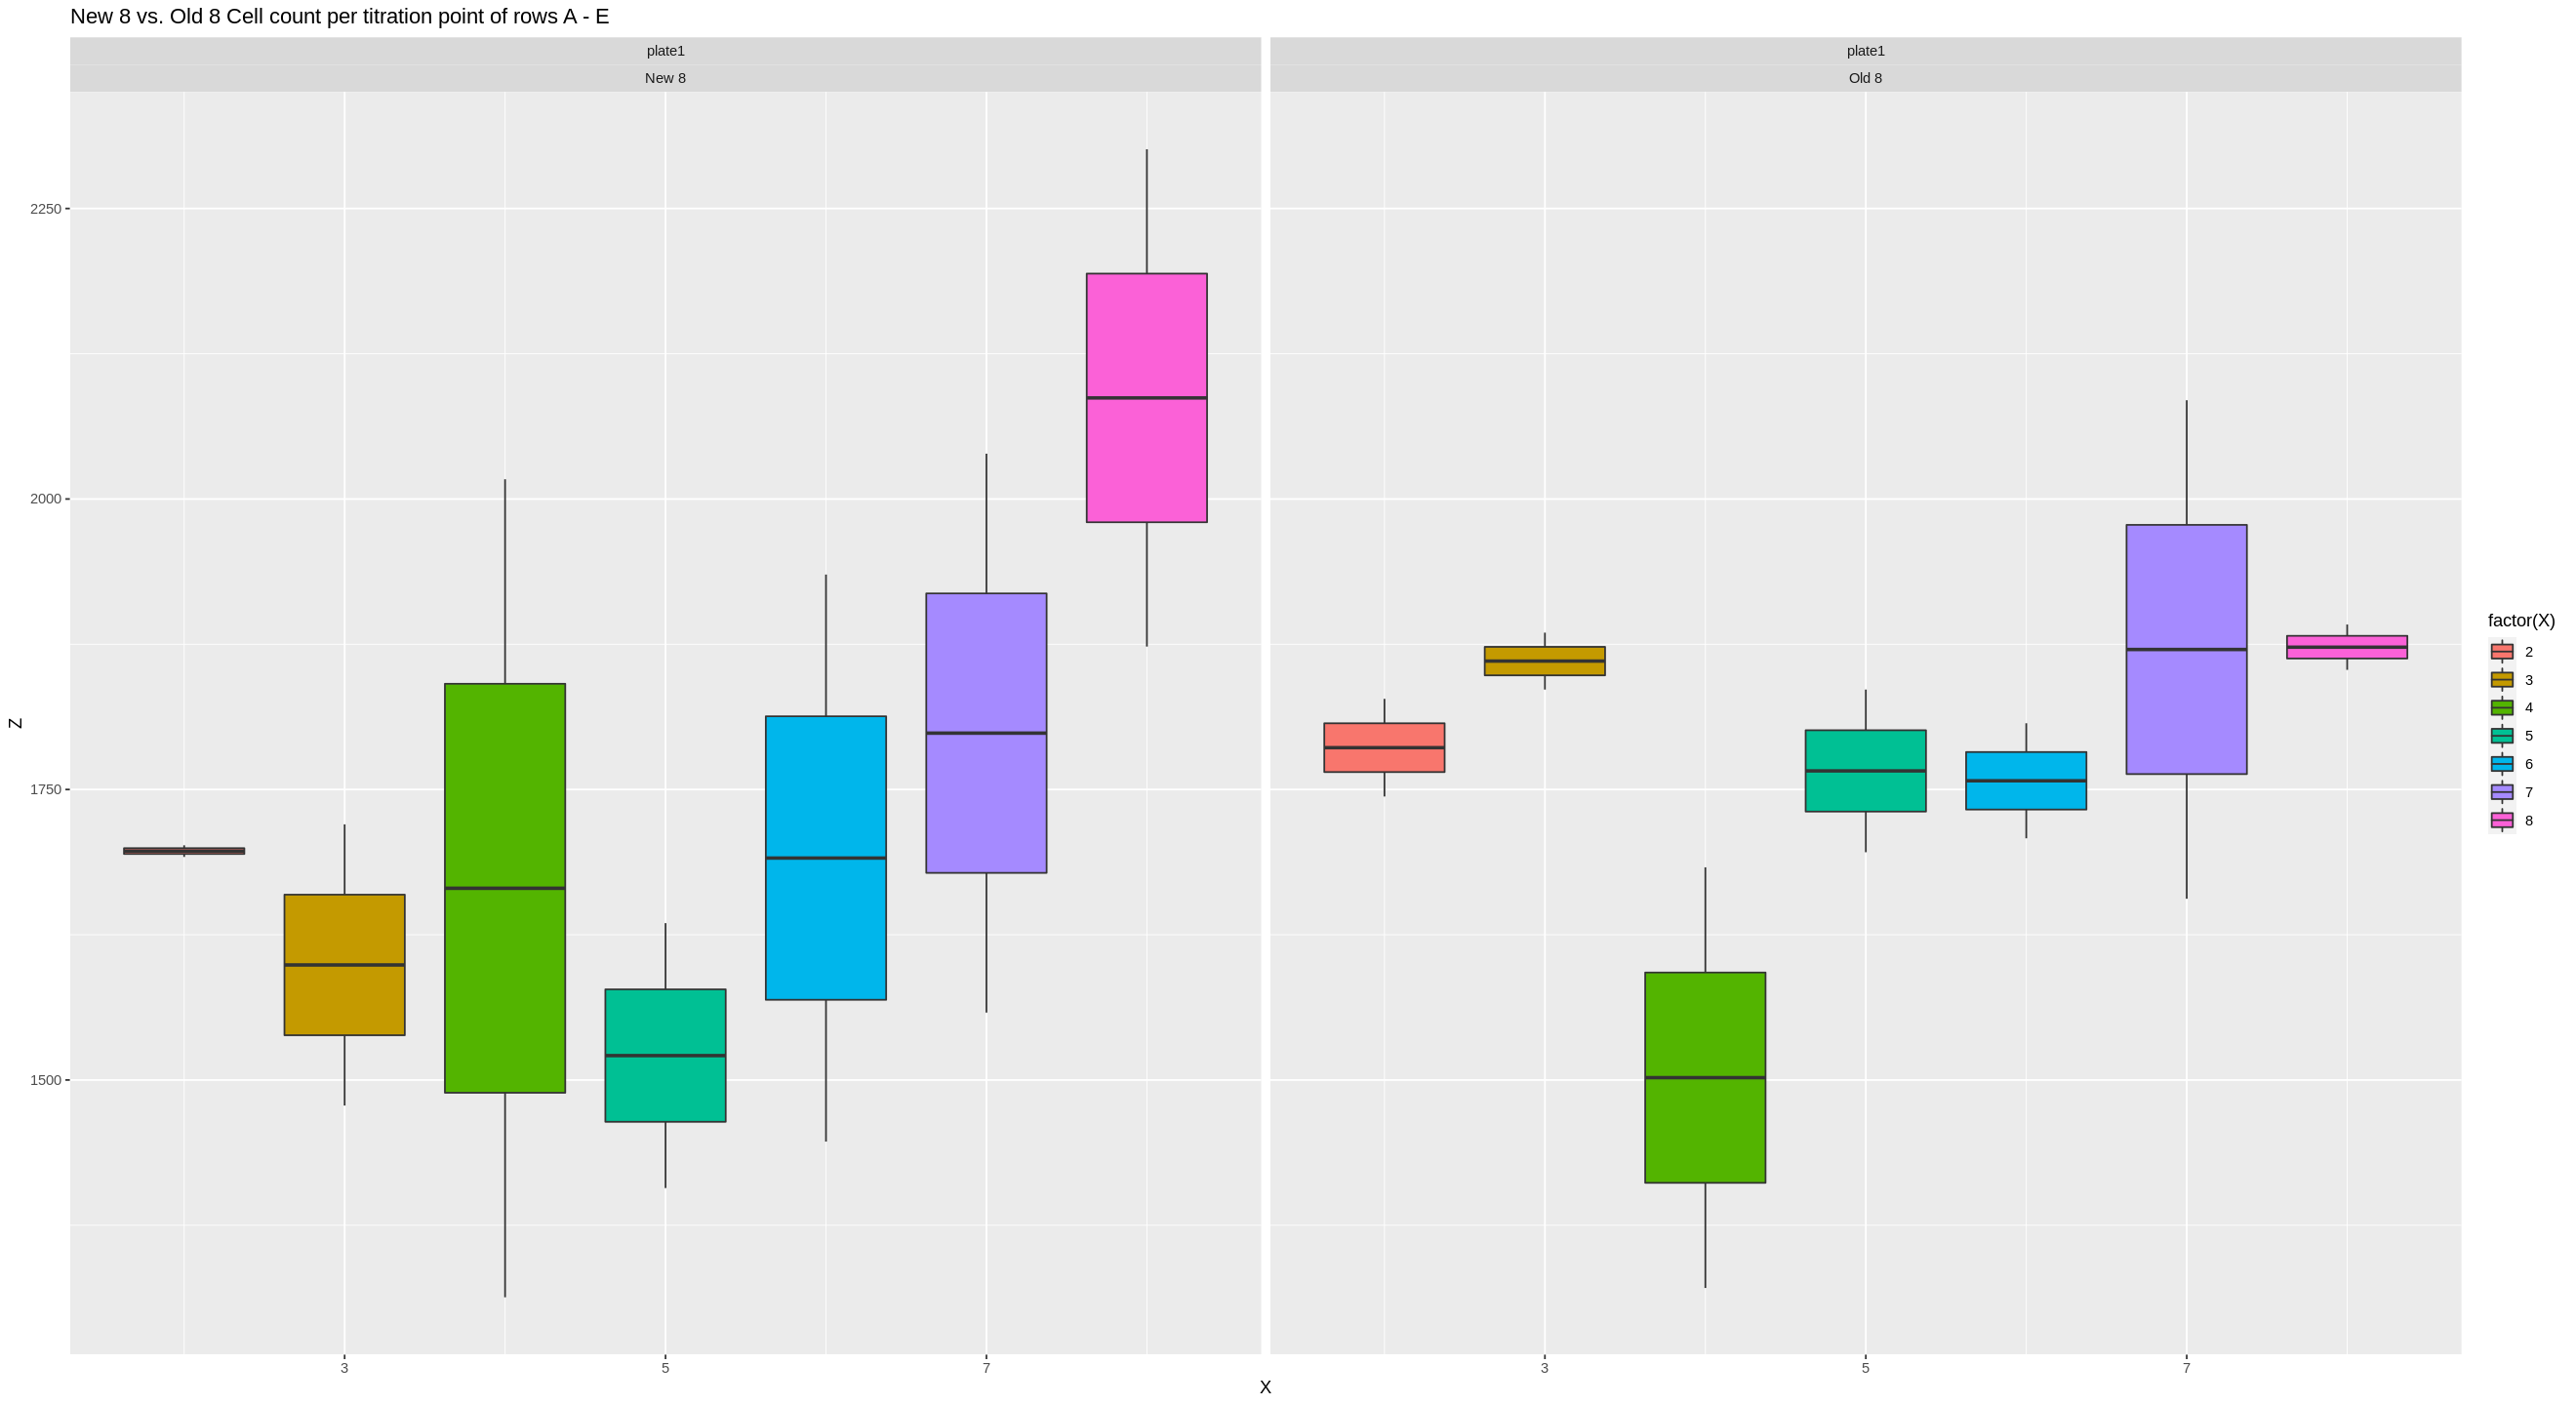

In [38]:
# A-E old 8 vs new 8
idx = c(1,5,9)
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("New 8 vs. Old 8 rows:", pat1, "-", pat2))

dff <- bind_rows(df.old, df.new)  %>% filter(Y == pat1 | Y == pat2)

ggplot(dff, aes(x=X,y=Z, group = X, fill = factor(X))) +
  geom_boxplot() + 
  labs(title=paste("New 8 vs. Old 8 Cell count per titration point of rows", pat1, "-", pat2)) +
  facet_wrap(plate~method, ncol = 2)

### combine all data to make general boxplot

In [146]:
dff <- rbind(do.call(rbind, dfn_sub_ls) %>%
             mutate(method = "NEW 8"), do.call(rbind, dfo_sub_ls) %>%
             mutate(method = "OLD 8")) %>%
        
       mutate(subgroup = case_when(
           Y == "A" & X == 2 ~ "A2-E2",
           Y == "A" & X == 3 ~ "A3-E3",
           Y == "A" & X == 4 ~ "A4-E4",
           Y == "A" & X == 5 ~ "A5-E5",
           Y == "A" & X == 6 ~ "A6-E6",
           Y == "A" & X == 7 ~ "A7-E7",
           Y == "A" & X == 8 ~ "A8-E8",
           Y == "B" & X == 2 ~ "B2-F2",
           Y == "B" & X == 3 ~ "B3-F3",
           Y == "B" & X == 4 ~ "B4-F4",
           Y == "B" & X == 5 ~ "B5-F5",
           Y == "B" & X == 6 ~ "B6-F6",
           Y == "B" & X == 7 ~ "B7-F7",
           Y == "B" & X == 8 ~ "B8-F8",
           Y == "C" & X == 2 ~ "C2-G2",
           Y == "C" & X == 3 ~ "C3-G3",
           Y == "C" & X == 4 ~ "C4-G4",
           Y == "C" & X == 5 ~ "C5-G5",
           Y == "C" & X == 6 ~ "C6-G6",
           Y == "C" & X == 7 ~ "C7-G7",
           Y == "C" & X == 8 ~ "C8-G8",
           Y == "D" & X == 2 ~ "D2-H2",
           Y == "D" & X == 3 ~ "D3-H3",
           Y == "D" & X == 4 ~ "D4-H4",
           Y == "D" & X == 5 ~ "D5-H5",
           Y == "D" & X == 6 ~ "D6-H6",
           Y == "D" & X == 7 ~ "D7-H7",
           Y == "D" & X == 8 ~ "D8-H8",
           Y == "E" & X == 2 ~ "A2-E2",
           Y == "E" & X == 3 ~ "A3-E3",
           Y == "E" & X == 4 ~ "A4-E4",
           Y == "E" & X == 5 ~ "A5-E5",
           Y == "E" & X == 6 ~ "A6-E6",
           Y == "E" & X == 7 ~ "A7-E7",
           Y == "E" & X == 8 ~ "A8-E8",
           Y == "F" & X == 2 ~ "B2-F2",
           Y == "F" & X == 3 ~ "B3-F3",
           Y == "F" & X == 4 ~ "B4-F4",
           Y == "F" & X == 5 ~ "B5-F5",
           Y == "F" & X == 6 ~ "B6-F6",
           Y == "F" & X == 7 ~ "B7-F7",
           Y == "F" & X == 8 ~ "B8-F8",
           Y == "G" & X == 2 ~ "C2-G2",
           Y == "G" & X == 3 ~ "C3-G3",
           Y == "G" & X == 4 ~ "C4-G4",
           Y == "G" & X == 5 ~ "C5-G5",
           Y == "G" & X == 6 ~ "C6-G6",
           Y == "G" & X == 7 ~ "C7-G7",
           Y == "G" & X == 8 ~ "C8-G8",
           Y == "H" & X == 2 ~ "D2-H2",
           Y == "H" & X == 3 ~ "D3-H3",
           Y == "H" & X == 4 ~ "D4-H4",
           Y == "H" & X == 5 ~ "D5-H5",
           Y == "H" & X == 6 ~ "D6-H6",
           Y == "H" & X == 7 ~ "D7-H7",
           Y == "H" & X == 8 ~ "D8-H8"
           )
          ) %>%
    mutate(wellid = paste0(Y, X))

In [147]:
head(dff)

X Y Z    method subgroup wellid
1 2 A 1692 NEW 8  A2-E2    A2    
2 3 A 1720 NEW 8  A3-E3    A3    
3 4 A 2017 NEW 8  A4-E4    A4    
4 5 A 1635 NEW 8  A5-E5    A5    
5 6 A 1935 NEW 8  A6-E6    A6    
6 7 A 2039 NEW 8  A7-E7    A7

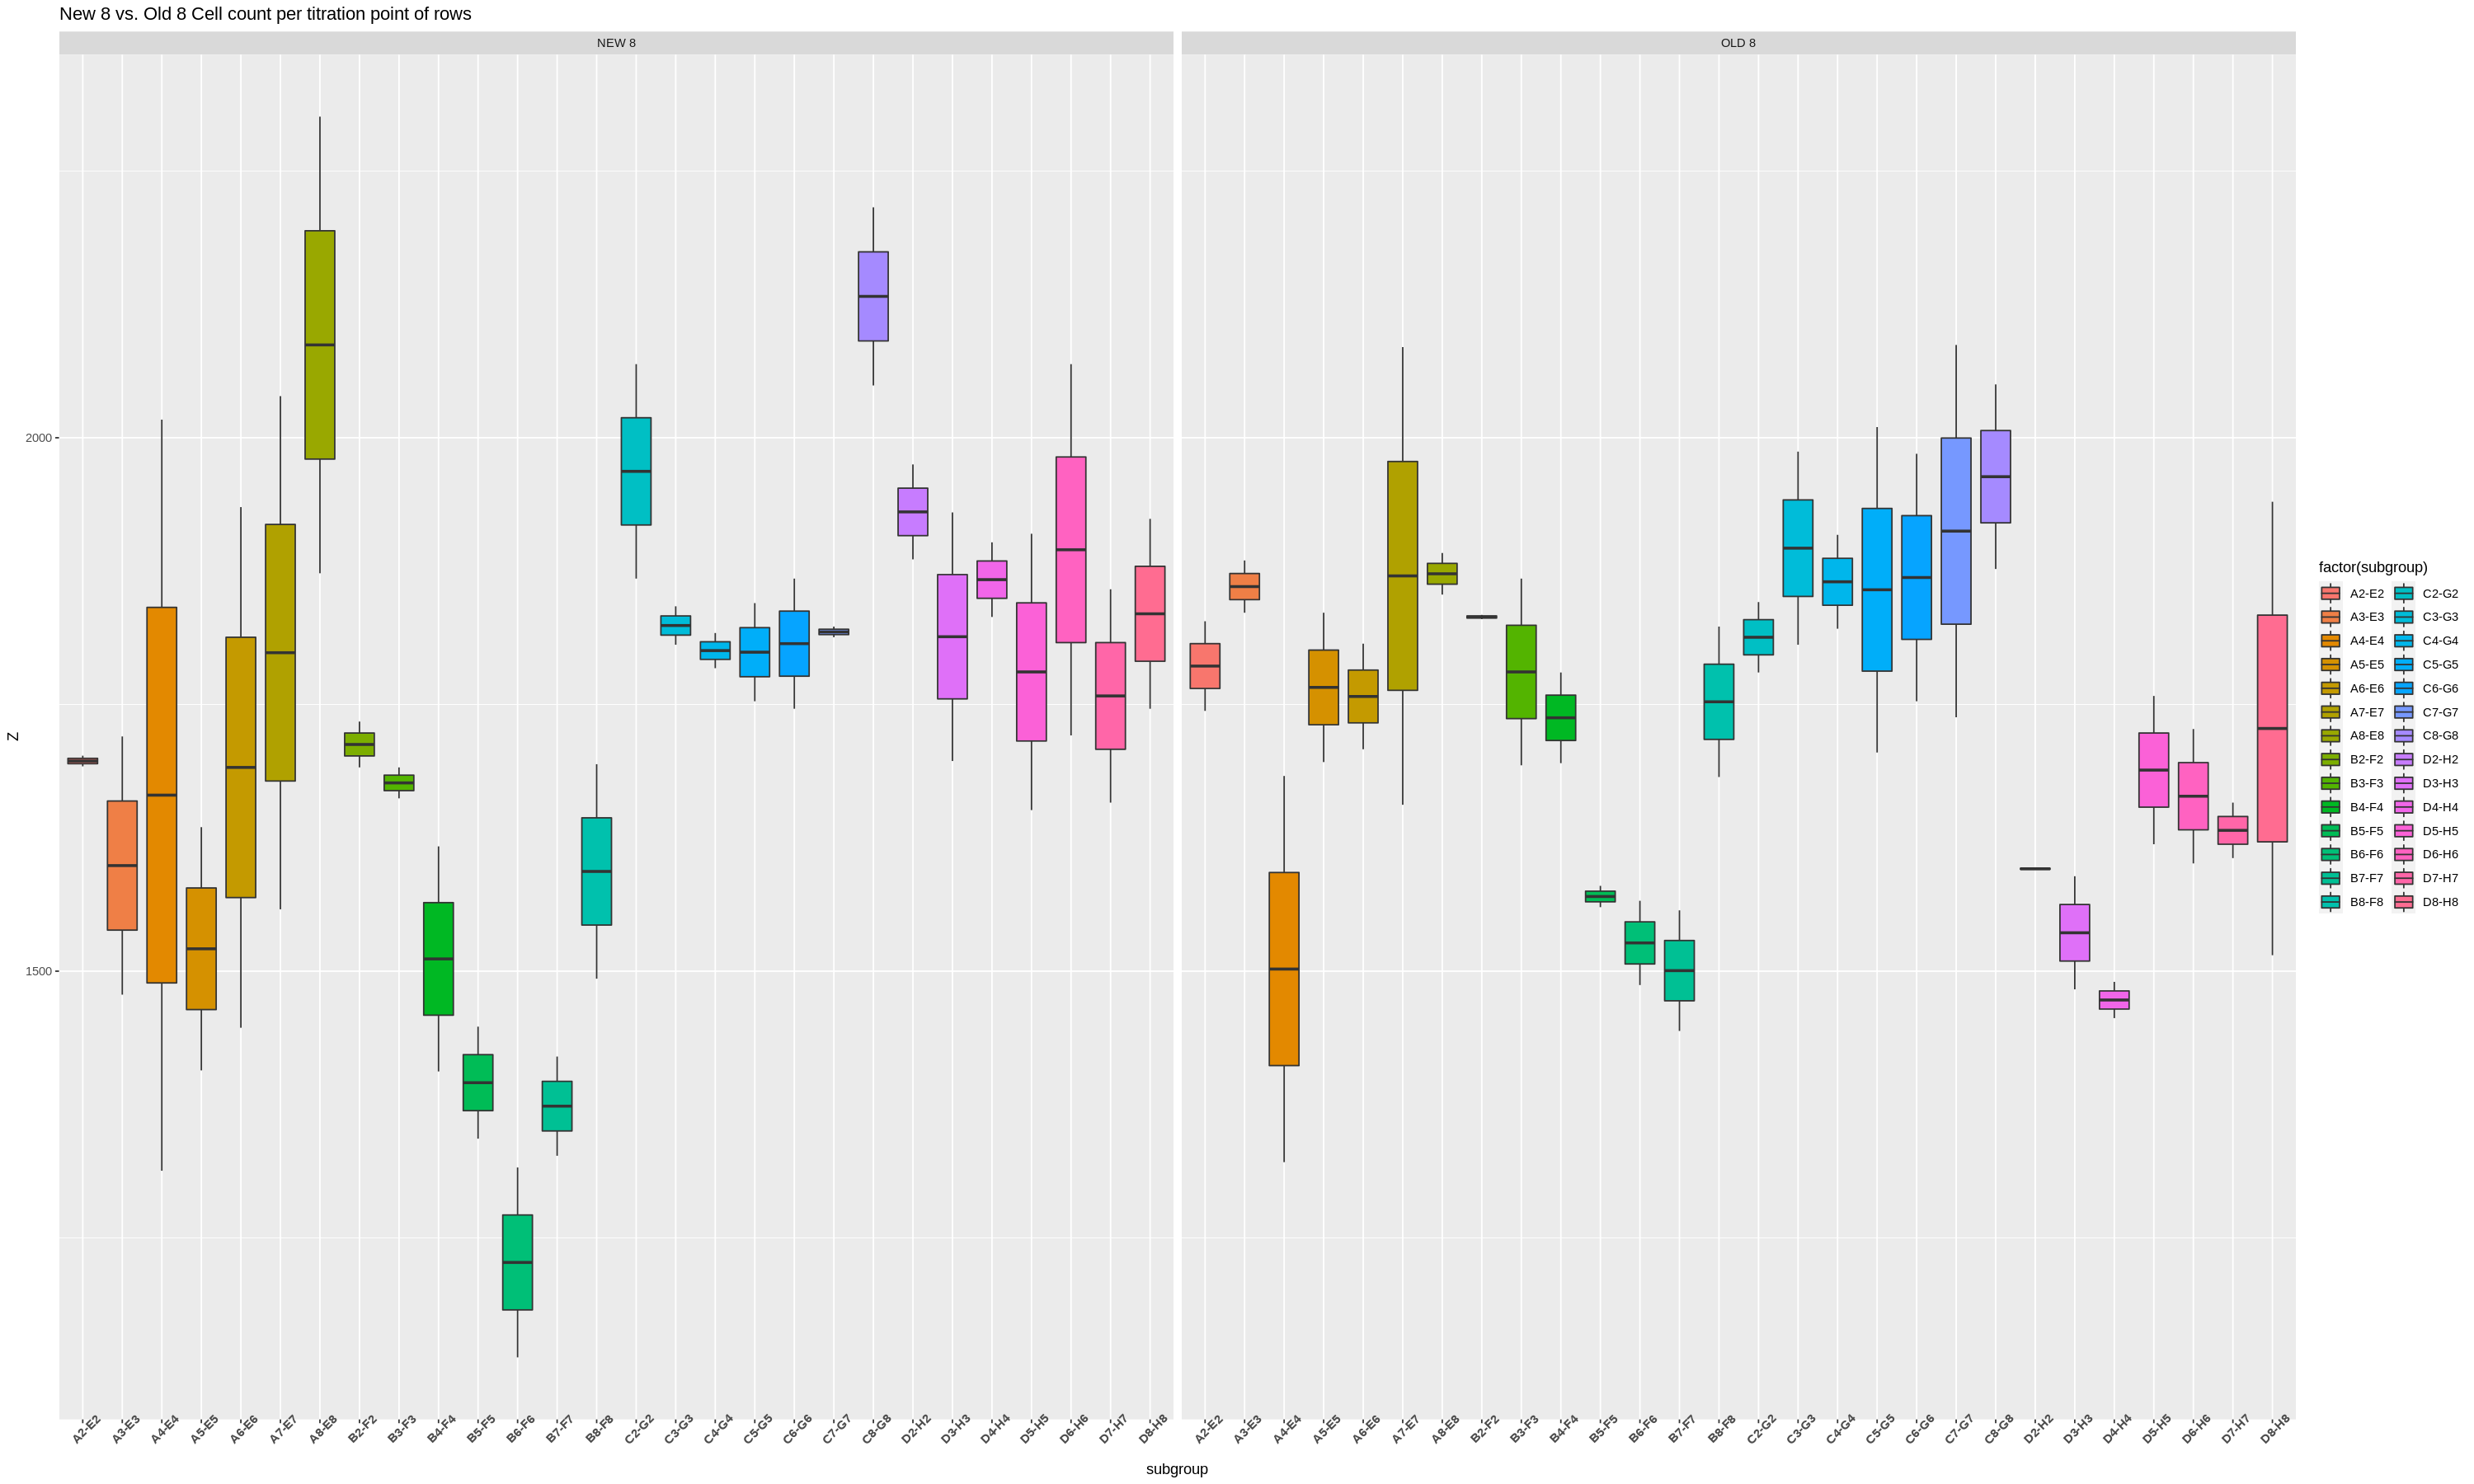

In [141]:
ggplot(dff, aes(x=subgroup,y=Z, fill = factor(subgroup))) +
  geom_boxplot() + 
  labs(title="New 8 vs. Old 8 Cell count per titration point of rows") +
  facet_wrap(~method) + 
  theme(axis.text.x = element_text(face = "bold", 
                           size = 8.9, angle = 45)) 

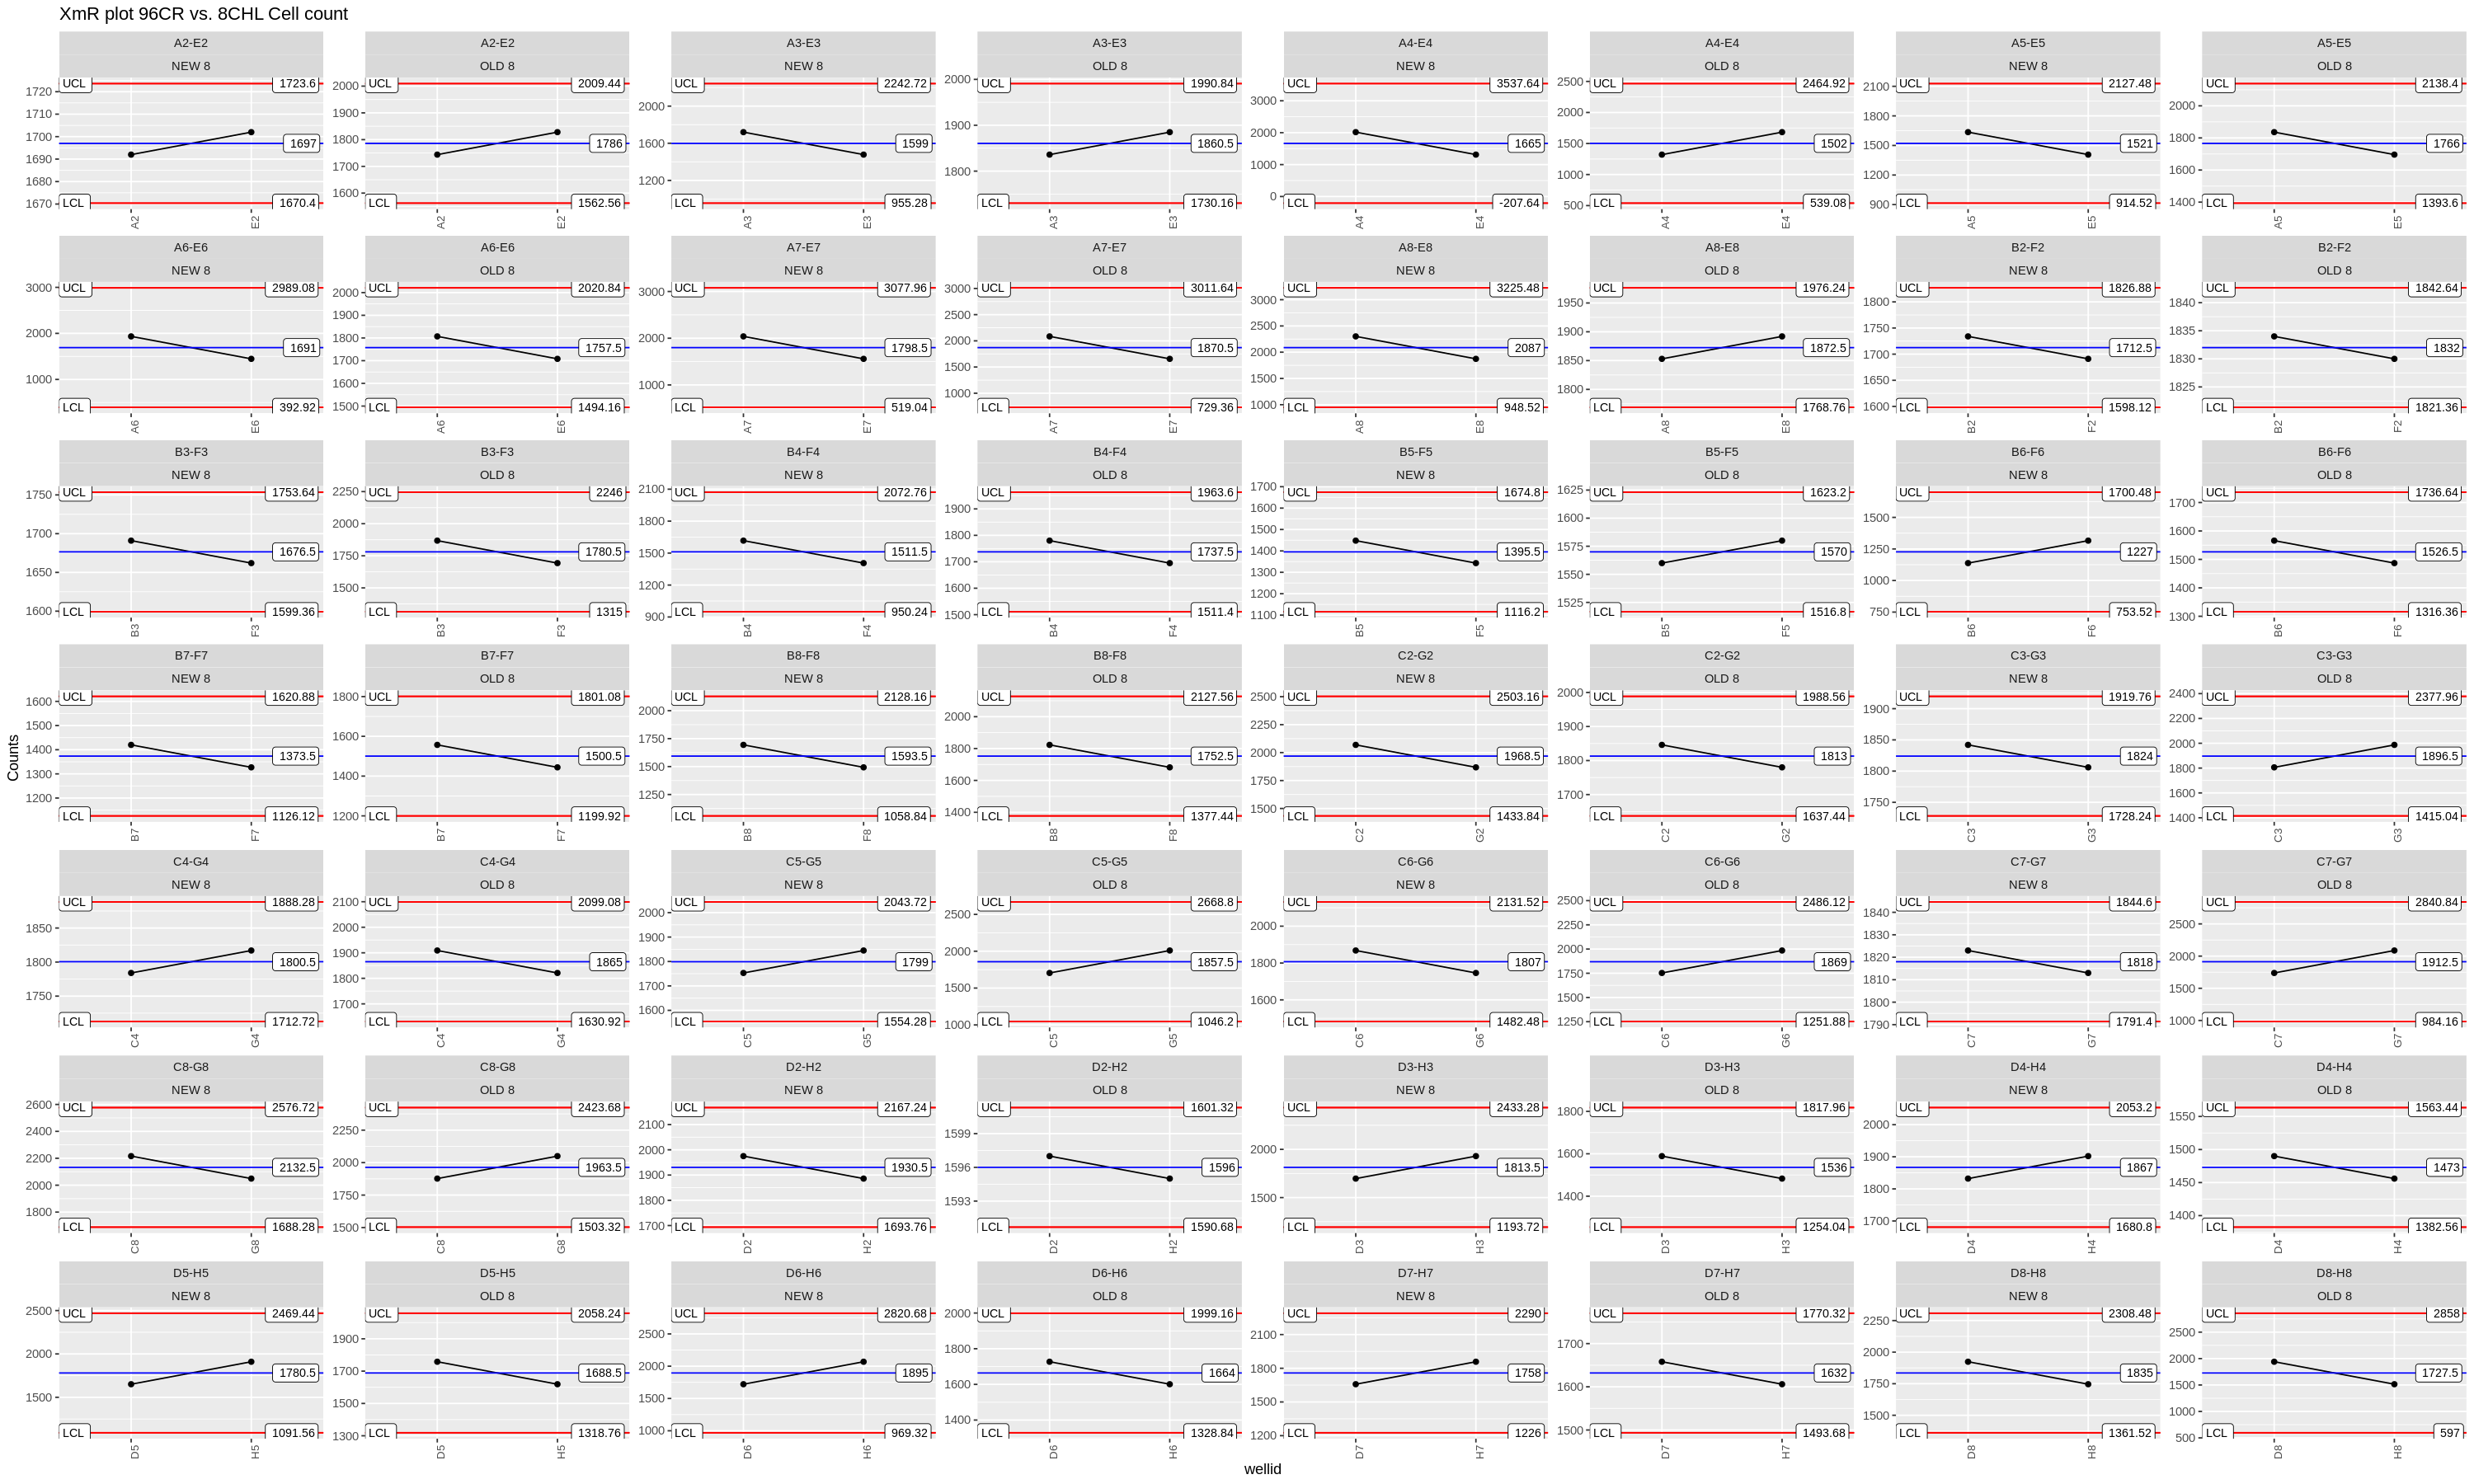

In [152]:
ggplot(dff, aes(x=wellid, y=Z, group=subgroup)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 4) + 
  ylab("Counts") +
  facet_wrap(subgroup~method, scales = "free") +
  ggtitle("XmR plot 96CR vs. 8CHL Cell count") + 
  theme(axis.text.x = element_text(size = 8, angle = 90))

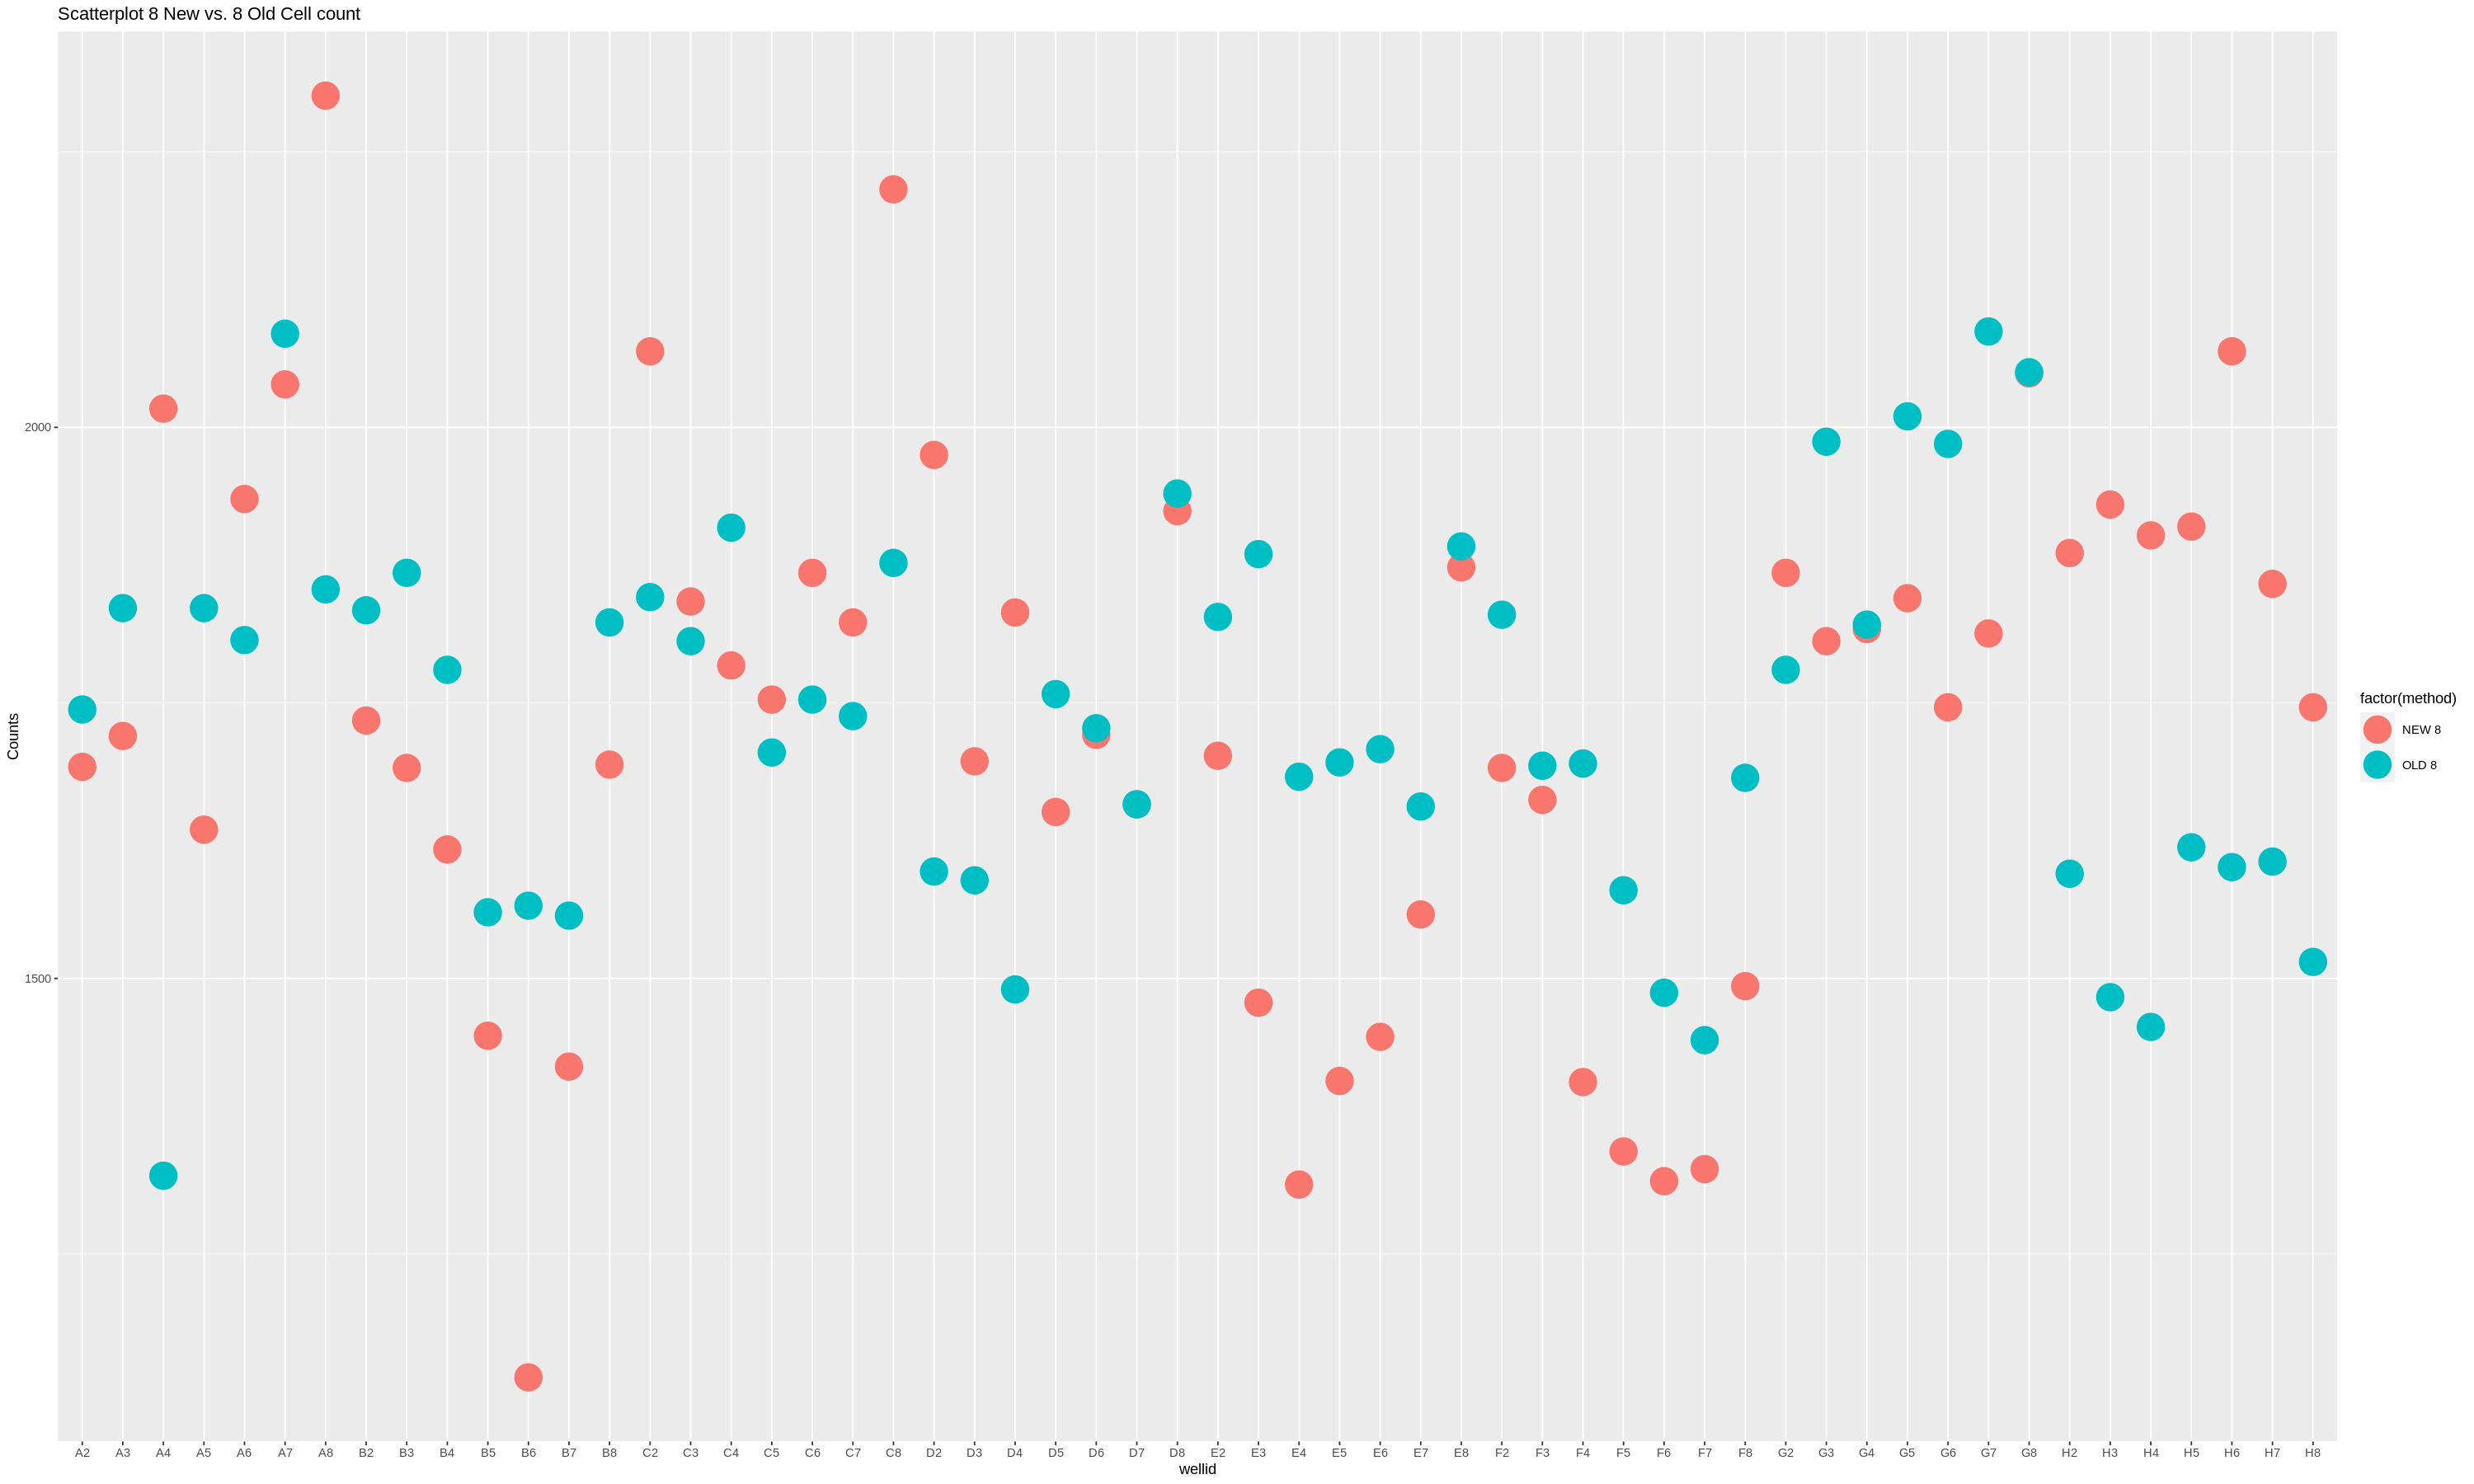

In [155]:
ggplot(dff, aes(x=wellid, y=Z) ) +
  geom_point(size = 9, aes(colour = factor(method))) + 
  ylab("Counts") +
  ggtitle("Scatterplot 8 New vs. 8 Old Cell count")

#### Summary statistics for new 8 

In [39]:
# A-E new 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(1,5,9)
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

print(paste("New 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.new %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "New 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "New 8, 8 rows: A - E"
[1] "A / E : 2"
       Z       
 Min.   :1692  
 1st Qu.:1694  
 Median :1697  
 Mean   :1697  
 3rd Qu.:1700  
 Max.   :1702  
[1] "A / E : 3"
       Z       
 Min.   :1478  
 1st Qu.:1538  
 Median :1599  
 Mean   :1599  
 3rd Qu.:1660  
 Max.   :1720  
[1] "A / E : 4"
       Z       
 Min.   :1313  
 1st Qu.:1489  
 Median :1665  
 Mean   :1665  
 3rd Qu.:1841  
 Max.   :2017  
[1] "A / E : 5"
       Z       
 Min.   :1407  
 1st Qu.:1464  
 Median :1521  
 Mean   :1521  
 3rd Qu.:1578  
 Max.   :1635  
[1] "A / E : 6"
       Z       
 Min.   :1447  
 1st Qu.:1569  
 Median :1691  
 Mean   :1691  
 3rd Qu.:1813  
 Max.   :1935  
[1] "A / E : 7"
       Z       
 Min.   :1558  
 1st Qu.:1678  
 Median :1798  
 Mean   :1798  
 3rd Qu.:1919  
 Max.   :2039  
[1] "A / E : 8"
       Z       
 Min.   :1873  
 1st Qu.:1980  
 Median :2087  
 Mean   :2087  
 3rd Qu.:2194  
 Max.   :2301  


In [40]:
# A-E old 8
summary_ls <- list()
print('summary of each row pair data for old 8')
idx = c(1,5,9)
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("Old 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.old %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "Old 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for old 8"
[1] "Old 8, 8 rows: A - E"
[1] "A / E : 2"
       Z       
 Min.   :1744  
 1st Qu.:1765  
 Median :1786  
 Mean   :1786  
 3rd Qu.:1807  
 Max.   :1828  
[1] "A / E : 3"
       Z       
 Min.   :1836  
 1st Qu.:1848  
 Median :1860  
 Mean   :1860  
 3rd Qu.:1873  
 Max.   :1885  
[1] "A / E : 4"
       Z       
 Min.   :1321  
 1st Qu.:1412  
 Median :1502  
 Mean   :1502  
 3rd Qu.:1592  
 Max.   :1683  
[1] "A / E : 5"
       Z       
 Min.   :1696  
 1st Qu.:1731  
 Median :1766  
 Mean   :1766  
 3rd Qu.:1801  
 Max.   :1836  
[1] "A / E : 6"
       Z       
 Min.   :1708  
 1st Qu.:1733  
 Median :1758  
 Mean   :1758  
 3rd Qu.:1782  
 Max.   :1807  
[1] "A / E : 7"
       Z       
 Min.   :1656  
 1st Qu.:1763  
 Median :1870  
 Mean   :1870  
 3rd Qu.:1978  
 Max.   :2085  
[1] "A / E : 8"
       Z       
 Min.   :1853  
 1st Qu.:1863  
 Median :1872  
 Mean   :1872  
 3rd Qu.:1882  
 Max.   :1892  


In [41]:
# B-F new 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(2,6,10)
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

print(paste("New 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.new %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "New 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "New 8, 8 rows: B - F"
[1] "B / F : 2"
       Z       
 Min.   :1691  
 1st Qu.:1702  
 Median :1712  
 Mean   :1712  
 3rd Qu.:1723  
 Max.   :1734  
[1] "B / F : 3"
       Z       
 Min.   :1662  
 1st Qu.:1669  
 Median :1676  
 Mean   :1676  
 3rd Qu.:1684  
 Max.   :1691  
[1] "B / F : 4"
       Z       
 Min.   :1406  
 1st Qu.:1459  
 Median :1512  
 Mean   :1512  
 3rd Qu.:1564  
 Max.   :1617  
[1] "B / F : 5"
       Z       
 Min.   :1343  
 1st Qu.:1369  
 Median :1396  
 Mean   :1396  
 3rd Qu.:1422  
 Max.   :1448  
[1] "B / F : 6"
       Z       
 Min.   :1138  
 1st Qu.:1182  
 Median :1227  
 Mean   :1227  
 3rd Qu.:1272  
 Max.   :1316  
[1] "B / F : 7"
       Z       
 Min.   :1327  
 1st Qu.:1350  
 Median :1374  
 Mean   :1374  
 3rd Qu.:1397  
 Max.   :1420  
[1] "B / F : 8"
       Z       
 Min.   :1493  
 1st Qu.:1543  
 Median :1594  
 Mean   :1594  
 3rd Qu.:1644  
 Max.   :1694  


In [42]:
# B-F old 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(2,6,10)
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("Old 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.old %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "Old 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "Old 8, 8 rows: B - F"
[1] "B / F : 2"
       Z       
 Min.   :1830  
 1st Qu.:1831  
 Median :1832  
 Mean   :1832  
 3rd Qu.:1833  
 Max.   :1834  
[1] "B / F : 3"
       Z       
 Min.   :1693  
 1st Qu.:1737  
 Median :1780  
 Mean   :1780  
 3rd Qu.:1824  
 Max.   :1868  
[1] "B / F : 4"
       Z       
 Min.   :1695  
 1st Qu.:1716  
 Median :1738  
 Mean   :1738  
 3rd Qu.:1759  
 Max.   :1780  
[1] "B / F : 5"
       Z       
 Min.   :1560  
 1st Qu.:1565  
 Median :1570  
 Mean   :1570  
 3rd Qu.:1575  
 Max.   :1580  
[1] "B / F : 6"
       Z       
 Min.   :1487  
 1st Qu.:1507  
 Median :1526  
 Mean   :1526  
 3rd Qu.:1546  
 Max.   :1566  
[1] "B / F : 7"
       Z       
 Min.   :1444  
 1st Qu.:1472  
 Median :1500  
 Mean   :1500  
 3rd Qu.:1529  
 Max.   :1557  
[1] "B / F : 8"
       Z       
 Min.   :1682  
 1st Qu.:1717  
 Median :1752  
 Mean   :1752  
 3rd Qu.:1788  
 Max.   :1823  


In [43]:
# C-G new 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(3,7,11)
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

print(paste("New 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.new %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "New 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "New 8, 8 rows: C - G"
[1] "C / G : 2"
       Z       
 Min.   :1868  
 1st Qu.:1918  
 Median :1968  
 Mean   :1968  
 3rd Qu.:2019  
 Max.   :2069  
[1] "C / G : 3"
       Z       
 Min.   :1806  
 1st Qu.:1815  
 Median :1824  
 Mean   :1824  
 3rd Qu.:1833  
 Max.   :1842  
[1] "C / G : 4"
       Z       
 Min.   :1784  
 1st Qu.:1792  
 Median :1800  
 Mean   :1800  
 3rd Qu.:1809  
 Max.   :1817  
[1] "C / G : 5"
       Z       
 Min.   :1753  
 1st Qu.:1776  
 Median :1799  
 Mean   :1799  
 3rd Qu.:1822  
 Max.   :1845  
[1] "C / G : 6"
       Z       
 Min.   :1746  
 1st Qu.:1776  
 Median :1807  
 Mean   :1807  
 3rd Qu.:1838  
 Max.   :1868  
[1] "C / G : 7"
       Z       
 Min.   :1813  
 1st Qu.:1816  
 Median :1818  
 Mean   :1818  
 3rd Qu.:1820  
 Max.   :1823  
[1] "C / G : 8"
       Z       
 Min.   :2049  
 1st Qu.:2091  
 Median :2132  
 Mean   :2132  
 3rd Qu.:2174  
 Max.   :2216  


In [44]:
# C-G old 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(3,7,11)
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("Old 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.old %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "Old 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "Old 8, 8 rows: C - G"
[1] "C / G : 2"
       Z       
 Min.   :1780  
 1st Qu.:1796  
 Median :1813  
 Mean   :1813  
 3rd Qu.:1830  
 Max.   :1846  
[1] "C / G : 3"
       Z       
 Min.   :1806  
 1st Qu.:1851  
 Median :1896  
 Mean   :1896  
 3rd Qu.:1942  
 Max.   :1987  
[1] "C / G : 4"
       Z       
 Min.   :1821  
 1st Qu.:1843  
 Median :1865  
 Mean   :1865  
 3rd Qu.:1887  
 Max.   :1909  
[1] "C / G : 5"
       Z       
 Min.   :1705  
 1st Qu.:1781  
 Median :1858  
 Mean   :1858  
 3rd Qu.:1934  
 Max.   :2010  
[1] "C / G : 6"
       Z       
 Min.   :1753  
 1st Qu.:1811  
 Median :1869  
 Mean   :1869  
 3rd Qu.:1927  
 Max.   :1985  
[1] "C / G : 7"
       Z       
 Min.   :1738  
 1st Qu.:1825  
 Median :1912  
 Mean   :1912  
 3rd Qu.:2000  
 Max.   :2087  
[1] "C / G : 8"
       Z       
 Min.   :1877  
 1st Qu.:1920  
 Median :1964  
 Mean   :1964  
 3rd Qu.:2007  
 Max.   :2050  


In [45]:
# D-H new 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(4,8,12)
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8")

print(paste("New 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.new %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "New 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "New 8, 8 rows: D - H"
[1] "D / H : 2"
       Z       
 Min.   :1886  
 1st Qu.:1908  
 Median :1930  
 Mean   :1930  
 3rd Qu.:1953  
 Max.   :1975  
[1] "D / H : 3"
       Z       
 Min.   :1697  
 1st Qu.:1755  
 Median :1814  
 Mean   :1814  
 3rd Qu.:1872  
 Max.   :1930  
[1] "D / H : 4"
       Z       
 Min.   :1832  
 1st Qu.:1850  
 Median :1867  
 Mean   :1867  
 3rd Qu.:1884  
 Max.   :1902  
[1] "D / H : 5"
       Z       
 Min.   :1651  
 1st Qu.:1716  
 Median :1780  
 Mean   :1780  
 3rd Qu.:1845  
 Max.   :1910  
[1] "D / H : 6"
       Z       
 Min.   :1721  
 1st Qu.:1808  
 Median :1895  
 Mean   :1895  
 3rd Qu.:1982  
 Max.   :2069  
[1] "D / H : 7"
       Z       
 Min.   :1658  
 1st Qu.:1708  
 Median :1758  
 Mean   :1758  
 3rd Qu.:1808  
 Max.   :1858  
[1] "D / H : 8"
       Z       
 Min.   :1746  
 1st Qu.:1790  
 Median :1835  
 Mean   :1835  
 3rd Qu.:1880  
 Max.   :1924  


In [46]:
# D-H old 8
summary_ls <- list()
print('summary of each row pair data for new 8')
idx = c(4,8,12)
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8")

print(paste("Old 8, 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    summary_ls[[i-1]] <- summary(
        df.old %>% 
        filter(X == i & (Y == pat1 | Y == pat2) & method == "Old 8") %>% 
        select(Z)
    )
    print(summary_ls[[i-1]])
    }

[1] "summary of each row pair data for new 8"
[1] "Old 8, 8 rows: D - H"
[1] "D / H : 2"
       Z       
 Min.   :1595  
 1st Qu.:1596  
 Median :1596  
 Mean   :1596  
 3rd Qu.:1596  
 Max.   :1597  
[1] "D / H : 3"
       Z       
 Min.   :1483  
 1st Qu.:1510  
 Median :1536  
 Mean   :1536  
 3rd Qu.:1562  
 Max.   :1589  
[1] "D / H : 4"
       Z       
 Min.   :1456  
 1st Qu.:1464  
 Median :1473  
 Mean   :1473  
 3rd Qu.:1482  
 Max.   :1490  
[1] "D / H : 5"
       Z       
 Min.   :1619  
 1st Qu.:1654  
 Median :1688  
 Mean   :1688  
 3rd Qu.:1723  
 Max.   :1758  
[1] "D / H : 6"
       Z       
 Min.   :1601  
 1st Qu.:1632  
 Median :1664  
 Mean   :1664  
 3rd Qu.:1696  
 Max.   :1727  
[1] "D / H : 7"
       Z       
 Min.   :1606  
 1st Qu.:1619  
 Median :1632  
 Mean   :1632  
 3rd Qu.:1645  
 Max.   :1658  
[1] "D / H : 8"
       Z       
 Min.   :1515  
 1st Qu.:1621  
 Median :1728  
 Mean   :1728  
 3rd Qu.:1834  
 Max.   :1940  


#### ANOVA test for each set of three plates
- Compute the analysis of variance for new 8 channel rows A-E
- Summary of the analysis
- As the p-value is less than the significance level 0.05, 
- we can conclude that there are significant differences between the 
- groups highlighted with “*" in the model summary
- In one-way ANOVA test, a significant p-value indicates that some of the group means are different, but we don’t know which pairs of groups are different.
- It’s possible to perform multiple pairwise-comparison, to determine if the mean difference between specific pairs of group are statistically significant.
- Use the Tukey to conduct this
- anova shows high p-value meaning all 12 rows in total are similar
- pairewise.t.test() can be also used to calculate pairwise comparisons 
- between group levels with corrections for multiple testing
- The result is a table of p-values for the pairwise comparisons. 
- Here, the p-values have been adjusted by the Benjamini-Hochberg method.

In [193]:
rbind(df.new, df.old)

X Y Z    plate  method anova
1  2 A 1692 plate1 New 8  A2   
2  3 A 1720 plate1 New 8  A3   
3  4 A 2017 plate1 New 8  A4   
4  5 A 1635 plate1 New 8  A5   
5  6 A 1935 plate1 New 8  A6   
6  7 A 2039 plate1 New 8  A7   
7  8 A 2301 plate1 New 8  A8   
8  2 E 1702 plate1 New 8  E2   
9  3 E 1478 plate1 New 8  E3   
10 4 E 1313 plate1 New 8  E4   
11 5 E 1407 plate1 New 8  E5   
12 6 E 1447 plate1 New 8  E6   
13 7 E 1558 plate1 New 8  E7   
14 8 E 1873 plate1 New 8  E8   
15 2 A 1744 plate1 Old 8  A2   
16 3 A 1836 plate1 Old 8  A3   
17 4 A 1321 plate1 Old 8  A4   
18 5 A 1836 plate1 Old 8  A5   
19 6 A 1807 plate1 Old 8  A6   
20 7 A 2085 plate1 Old 8  A7   
21 8 A 1853 plate1 Old 8  A8   
22 2 E 1828 plate1 Old 8  E2   
23 3 E 1885 plate1 Old 8  E3   
24 4 E 1683 plate1 Old 8  E4   
25 5 E 1696 plate1 Old 8  E5   
26 6 E 1708 plate1 Old 8  E6   
27 7 E 1656 plate1 Old 8  E7   
28 8 E 1892 plate1 Old 8  E8

In [48]:
# A-E
idx = c(1,5,9)
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame() 

df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8", anova = paste0(Y,X))

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8", anova = paste0(Y,X))

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

dff <- rbind(df.old, df.new)

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% filter(X == i & (Y == pat1 | Y == pat2))
    res.aov <- aov(Z ~ anova, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$anova[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$Z, df.t$anova,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_anova_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: A - E"
[1] "A / E : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1   2209    2209   0.476  0.562
Residuals    2   9290    4645               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
      diff       lwr      upr    p adj
E2-A2   47 -245.9919 339.9919 0.561691

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$Z and df.t$anova 

   A2  
E2 0.56

P value adjustment method: BH 
[1] "A / E : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1   9312    9312   0.208  0.693
Residuals    2  89552   44776               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
       diff       lwr      upr     p adj
E3-A3 -96.5 -1006.176 813.1756

In [49]:
# B-F
idx = c(2,6,10)
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8", anova = paste0(Y,X))

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8", anova = paste0(Y,X))

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

dff <- rbind(df.old, df.new)
for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% filter(X == i & (Y == pat1 | Y == pat2))
    res.aov <- aov(Z ~ anova, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$anova[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$Z, df.t$anova,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_anova_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: B - F"
[1] "B / F : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1    552     552   0.075  0.809
Residuals    2  14660    7330               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
       diff       lwr      upr     p adj
F2-B2 -23.5 -391.5629 344.5629 0.8094647

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$Z and df.t$anova 

   B2  
F2 0.81

P value adjustment method: BH 
[1] "B / F : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1  10404   10404   1.289  0.374
Residuals    2  16145    8072               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
      diff       lwr      upr     p adj
F3-B3 -102 -488.2484 284.24

In [50]:
# C-G
idx = c(3,7,11)
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8", anova = paste0(Y,X))

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8", anova = paste0(Y,X))
print(paste("ANOVA 8 rows:", pat1, "-", pat2))
dff <- rbind(df.old, df.new)
for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% filter(X == i & (Y == pat1 | Y == pat2))
    res.aov <- aov(Z ~ anova, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$anova[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$Z, df.t$anova,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_anova_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: C - G"
[1] "C / G : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1  17822   17822    1.24  0.381
Residuals    2  28737   14368               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
        diff       lwr      upr     p adj
G2-C2 -133.5 -648.8053 381.8053 0.3812788

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$Z and df.t$anova 

   C2  
G2 0.38

P value adjustment method: BH 
[1] "C / G : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1   5256    5256   0.617  0.514
Residuals    2  17028    8514               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
      diff      lwr     upr     p adj
G3-C3 72.5 -324.176 469.176

In [51]:
# D-H
idx = c(4,8,12)
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df.new <- dfn_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "New 8", anova = paste0(Y,X))

df.old <- dfo_sub_ls[[idx[1]]] %>% 
    mutate(plate = paste0("plate", jj[1])) %>% 
    mutate(method = "Old 8", anova = paste0(Y,X))
print(paste("ANOVA 8 rows:", pat1, "-", pat2))
dff <- rbind(df.old, df.new)
for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% filter(X == i & (Y == pat1 | Y == pat2))
    res.aov <- aov(Z ~ anova, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$anova[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$Z, df.t$anova,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_anova_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: D - H"
[1] "D / H : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1   2070    2070   0.036  0.866
Residuals    2 113783   56891               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
       diff       lwr      upr    p adj
H2-D2 -45.5 -1070.881 979.8814 0.866319

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$Z and df.t$anova 

   D2  
H2 0.87

P value adjustment method: BH 
[1] "D / H : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
anova        1   4032    4032   0.076  0.808
Residuals    2 105736   52868               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Z ~ anova, data = df.t)

$anova
      diff       lwr      upr     p adj
H3-D3 63.5 -924.9624 1051.962

### "residuals versus fits plot" is the most frequently created plot. It is a scatter plot of residuals on the y axis and fitted values (estimated responses) on the x axis. The plot is used to detect non-linearity, unequal error variances, and outliers.

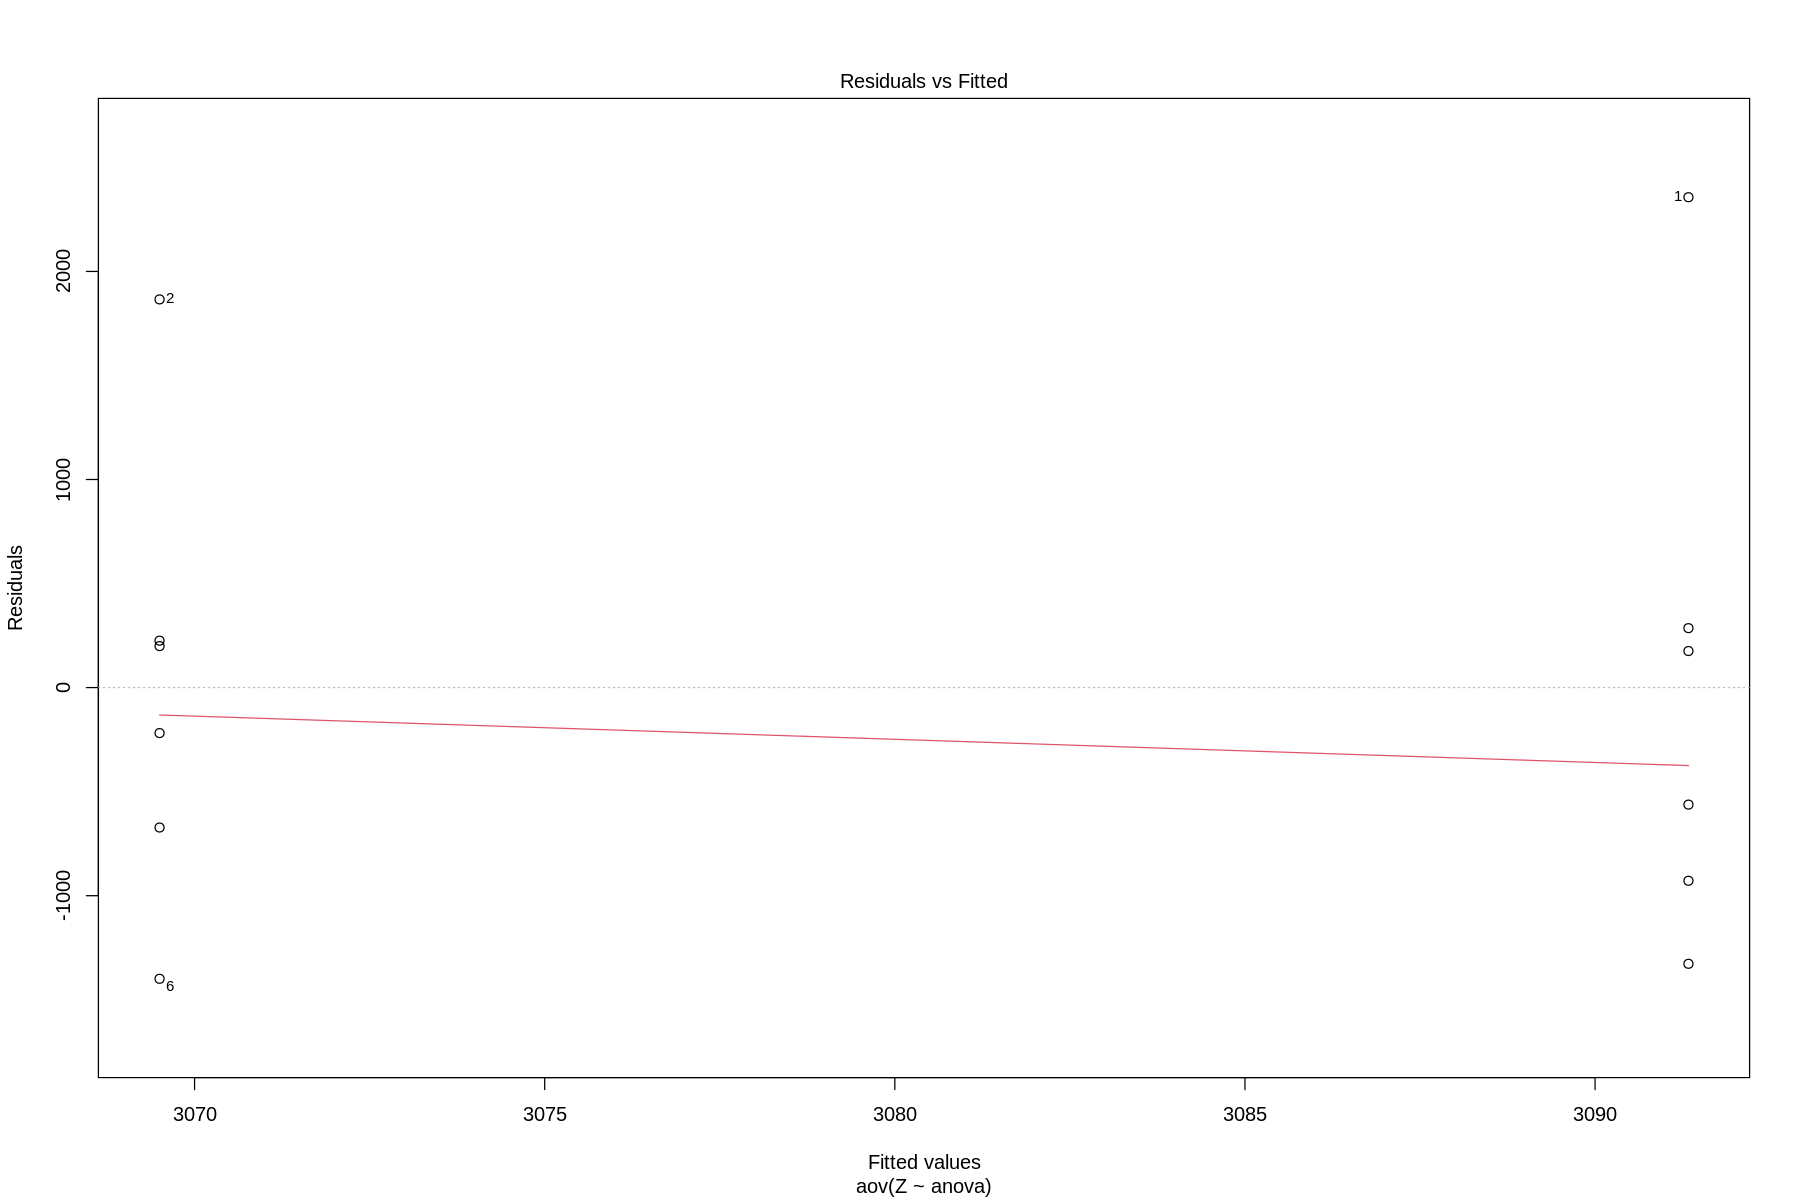

In [761]:
plot(res.aov, 1)

#### USE SI AS SAMPLE DATA

In [5]:
dfsi_new8 <- list()
dfsi_old8 <- list()
new8_file <- list.files(parentdir, pattern = "*NEW8_STATS*")
old8_file <- list.files(parentdir, pattern = "OLD8_STATS*")
for (i in seq(1)) {
    dfsi_new8[[i]] <- read.csv(paste0(parentdir, new8_file[i])) %>% 
                        na.omit() %>% select(SAMPLE_NAME, 
                            MFI.,
                            MFI..1,
                            SI,
                            SN) %>%
                        filter(grepl("[A-H]0[2-9]|1[0-1]", SAMPLE_NAME)) %>%
                        mutate_at(vars(MFI., MFI..1, SI, SN), funs(as.numeric))
    dfsi_old8[[i]] <- read.csv(paste0(parentdir, old8_file[i])) %>% 
                        na.omit() %>% 
                        filter(grepl("[A-H]0[2-9]|1[0-1]", SAMPLE_NAME)) %>%
                        mutate_at(vars(MFI., MFI..1, SI, SN), funs(as.numeric))
    }

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [6]:
si.pos.new8 <- list()
si.pos.old8 <- list()

for (i in seq(1)) {
    si.pos.new8[[i]] <- dfsi_new8[[i]] %>% select(SI, SAMPLE_NAME ) %>% mutate(wellid = substr(SAMPLE_NAME, 17,19), plate = paste("plate", i), method = "New 8")
    si.pos.old8[[i]] <- dfsi_old8[[i]] %>% select(SI, SAMPLE_NAME ) %>% mutate(wellid = substr(SAMPLE_NAME, 17,19), plate = paste("plate", i), method = "Old 8")
    }

dfm <- do.call(rbind, si.pos.new8) %>% bind_rows(
        do.call(rbind, si.pos.old8)
        )

#### F test for normality
- The p values are big, meaning the variances do not change more from plate 1 to 3

#### Anderson-Darling test
- goodness of fit test that measures how well your data fit a specified distribution.
- H_0: The data follow a specified distribution

#### Shapiro test, bonett test, qq plot to show normality
- shapiro-wilk test - tell if a random sample comes from a normal distribution
- bonett test - measure of kurtosis for normally distributed data
- under the hypothesis of normality, data should have Geary's kurtosis equal to sqrt(2/pi) (0.7979)
- the kurtosis is near .7979, with p-value barely above 0.05, indicating it is slightly normal

In [62]:
# A-E new 8 vs old 8
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame()

for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dfm %>% filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i))
    print(paste0(rep("-", 25),collapse=""))
    stat <- var.test(SI ~ method, df.t)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    #stat <- ad.test(df.t$SI)
    #df_stats[i-1, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    #print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- shapiro.test(df.t$SI)
    df_stats[i-1, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- bonett.test(df.t$SI)
    df_stats[i-1, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("geary result:")
    stat <- geary(df.t$SI)
    df_stats[i-1, "GEARY"] = formatC(stat, format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "A / E : 2"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.0060147, num df = 1, denom df = 1, p-value = 0.09855
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 9.285043e-06 3.896288e+00
sample estimates:
ratio of variances 
       0.006014749 

[1] "-------------------------"
[1] "-------------------------"

	Shapiro-Wilk normality test

data:  df.t$SI
W = 0.95361, p-value = 0.7387

[1] "-------------------------"

	Bonett-Seier test for Geary kurtosis

data:  df.t$SI
tau = 15.49900, z = 0.31893, p-value = 0.7498
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "-------------------------"
[1] "geary result:"
[1] 0.7707313
[1] "A / E : 3"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 1.4868, num df = 1, denom df = 1, p-value = 0.8746
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interva

In [63]:
# B-F new 8 vs old 8
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame()

for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dfm %>% filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i))
    print(paste0(rep("-", 25),collapse=""))
    stat <- var.test(SI ~ method, df.t)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
   # stat <- ad.test(df.t$SI)
   # df_stats[i-1, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
   # print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- shapiro.test(df.t$SI)
    df_stats[i-1, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- bonett.test(df.t$SI)
    df_stats[i-1, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("geary result:")
    stat <- geary(df.t$SI)
    df_stats[i-1, "GEARY"] = formatC(stat, format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "B / F : 2"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 1.0122, num df = 1, denom df = 1, p-value = 0.9961
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.562512e-03 6.556780e+02
sample estimates:
ratio of variances 
          1.012178 

[1] "-------------------------"
[1] "-------------------------"

	Shapiro-Wilk normality test

data:  df.t$SI
W = 0.89605, p-value = 0.4117

[1] "-------------------------"

	Bonett-Seier test for Geary kurtosis

data:  df.t$SI
tau = 2.9854, z = -1.8522, p-value = 0.064
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "-------------------------"
[1] "geary result:"
[1] 0.9759716
[1] "B / F : 3"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.49396, num df = 1, denom df = 1, p-value = 0.78
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 7.62

In [64]:
# C-G new 8 vs old 8
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame()

for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dfm %>% filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i))
    print(paste0(rep("-", 25),collapse=""))
    stat <- var.test(SI ~ method, df.t)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    #stat <- ad.test(df.t$SI)
    #df_stats[i-1, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    #print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- shapiro.test(df.t$SI)
    df_stats[i-1, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- bonett.test(df.t$SI)
    df_stats[i-1, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("geary result:")
    stat <- geary(df.t$SI)
    df_stats[i-1, "GEARY"] = formatC(stat, format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "C / G : 2"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.061466, num df = 1, denom df = 1, p-value = 0.3094
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 9.488539e-05 3.981681e+01
sample estimates:
ratio of variances 
        0.06146571 

[1] "-------------------------"
[1] "-------------------------"

	Shapiro-Wilk normality test

data:  df.t$SI
W = 0.88869, p-value = 0.3771

[1] "-------------------------"

	Bonett-Seier test for Geary kurtosis

data:  df.t$SI
tau = 3.0813, z = -1.7233, p-value = 0.08483
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "-------------------------"
[1] "geary result:"
[1] 0.9623935
[1] "C / G : 3"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.028251, num df = 1, denom df = 1, p-value = 0.212
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:

In [65]:
# D-H new 8 vs old 8
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame()

for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dfm %>% filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i))
    print(paste0(rep("-", 25),collapse=""))
    stat <- var.test(SI ~ method, df.t)
    df_stats[i-1, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
#    stat <- ad.test(df.t$SI)
#    df_stats[i-1, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
#    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- shapiro.test(df.t$SI)
    df_stats[i-1, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    stat <- bonett.test(df.t$SI)
    df_stats[i-1, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("geary result:")
    stat <- geary(df.t$SI)
    df_stats[i-1, "GEARY"] = formatC(stat, format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "D / H : 2"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.87611, num df = 1, denom df = 1, p-value = 0.9579
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.352461e-03 5.675342e+02
sample estimates:
ratio of variances 
         0.8761096 

[1] "-------------------------"
[1] "-------------------------"

	Shapiro-Wilk normality test

data:  df.t$SI
W = 0.9514, p-value = 0.7249

[1] "-------------------------"

	Bonett-Seier test for Geary kurtosis

data:  df.t$SI
tau = 1.4968, z = -1.5780, p-value = 0.1146
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "-------------------------"
[1] "geary result:"
[1] 0.9473059
[1] "D / H : 3"
[1] "-------------------------"

	F test to compare two variances

data:  SI by method
F = 0.067444, num df = 1, denom df = 1, p-value = 0.3235
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 

### Summary stats

In [181]:
# for NEW 8 A-E
j = 1
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "New 8") %>% 
        select(SI)
    ))
    }

[1] "A / E : 2"
       SI        
 Min.   : 71.93  
 1st Qu.:144.32  
 Median :226.42  
 Mean   :209.62  
 3rd Qu.:292.35  
 Max.   :313.25  
[1] "A / E : 3"
       SI        
 Min.   : 71.93  
 1st Qu.:144.32  
 Median :226.42  
 Mean   :209.62  
 3rd Qu.:292.35  
 Max.   :313.25  
[1] "A / E : 4"
       SI        
 Min.   : 71.93  
 1st Qu.:144.32  
 Median :226.42  
 Mean   :209.62  
 3rd Qu.:292.35  
 Max.   :313.25  
[1] "A / E : 5"
       SI        
 Min.   : 71.93  
 1st Qu.:144.32  
 Median :226.42  
 Mean   :209.62  
 3rd Qu.:292.35  
 Max.   :313.25  
[1] "A / E : 6"
       SI        
 Min.   : 71.93  
 1st Qu.:144.32  
 Median :226.42  
 Mean   :209.62  
 3rd Qu.:292.35  
 Max.   :313.25  
[1] "A / E : 7"
       SI        
 Min.   : 71.93  
 1st Qu.:144.32  
 Median :226.42  
 Mean   :209.62  
 3rd Qu.:292.35  
 Max.   :313.25  
[1] "A / E : 8"
       SI        
 Min.   : 71.93  
 1st Qu.:144.32  
 Median :226.42  
 Mean   :209.62  
 3rd Qu.:292.35  
 Max.   :313.25  


In [182]:
# for OLD A-E
j = 1
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "Old 8") %>% 
        select(SI)
    ))
    }

[1] "A / E : 2"
       SI        
 Min.   : 76.92  
 1st Qu.:150.73  
 Median :200.54  
 Mean   :209.34  
 3rd Qu.:278.65  
 Max.   :333.22  
[1] "A / E : 3"
       SI        
 Min.   : 76.92  
 1st Qu.:150.73  
 Median :200.54  
 Mean   :209.34  
 3rd Qu.:278.65  
 Max.   :333.22  
[1] "A / E : 4"
       SI        
 Min.   : 76.92  
 1st Qu.:150.73  
 Median :200.54  
 Mean   :209.34  
 3rd Qu.:278.65  
 Max.   :333.22  
[1] "A / E : 5"
       SI        
 Min.   : 76.92  
 1st Qu.:150.73  
 Median :200.54  
 Mean   :209.34  
 3rd Qu.:278.65  
 Max.   :333.22  
[1] "A / E : 6"
       SI        
 Min.   : 76.92  
 1st Qu.:150.73  
 Median :200.54  
 Mean   :209.34  
 3rd Qu.:278.65  
 Max.   :333.22  
[1] "A / E : 7"
       SI        
 Min.   : 76.92  
 1st Qu.:150.73  
 Median :200.54  
 Mean   :209.34  
 3rd Qu.:278.65  
 Max.   :333.22  
[1] "A / E : 8"
       SI        
 Min.   : 76.92  
 1st Qu.:150.73  
 Median :200.54  
 Mean   :209.34  
 3rd Qu.:278.65  
 Max.   :333.22  


In [183]:
# for NEW 8 B-F
j = 2
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "New 8") %>% 
        select(SI)
    ))
    }

[1] "B / F : 2"
       SI       
 Min.   :43.56  
 1st Qu.:57.55  
 Median :69.32  
 Mean   :68.20  
 3rd Qu.:81.75  
 Max.   :84.71  
[1] "B / F : 3"
       SI       
 Min.   :43.56  
 1st Qu.:57.55  
 Median :69.32  
 Mean   :68.20  
 3rd Qu.:81.75  
 Max.   :84.71  
[1] "B / F : 4"
       SI       
 Min.   :43.56  
 1st Qu.:57.55  
 Median :69.32  
 Mean   :68.20  
 3rd Qu.:81.75  
 Max.   :84.71  
[1] "B / F : 5"
       SI       
 Min.   :43.56  
 1st Qu.:57.55  
 Median :69.32  
 Mean   :68.20  
 3rd Qu.:81.75  
 Max.   :84.71  
[1] "B / F : 6"
       SI       
 Min.   :43.56  
 1st Qu.:57.55  
 Median :69.32  
 Mean   :68.20  
 3rd Qu.:81.75  
 Max.   :84.71  
[1] "B / F : 7"
       SI       
 Min.   :43.56  
 1st Qu.:57.55  
 Median :69.32  
 Mean   :68.20  
 3rd Qu.:81.75  
 Max.   :84.71  
[1] "B / F : 8"
       SI       
 Min.   :43.56  
 1st Qu.:57.55  
 Median :69.32  
 Mean   :68.20  
 3rd Qu.:81.75  
 Max.   :84.71  


In [184]:
# for OLD 8 B-F
j = 2
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "Old 8") %>% 
        select(SI)
    ))
    }

[1] "B / F : 2"
       SI       
 Min.   :37.60  
 1st Qu.:62.94  
 Median :71.03  
 Mean   :68.63  
 3rd Qu.:78.25  
 Max.   :97.68  
[1] "B / F : 3"
       SI       
 Min.   :37.60  
 1st Qu.:62.94  
 Median :71.03  
 Mean   :68.63  
 3rd Qu.:78.25  
 Max.   :97.68  
[1] "B / F : 4"
       SI       
 Min.   :37.60  
 1st Qu.:62.94  
 Median :71.03  
 Mean   :68.63  
 3rd Qu.:78.25  
 Max.   :97.68  
[1] "B / F : 5"
       SI       
 Min.   :37.60  
 1st Qu.:62.94  
 Median :71.03  
 Mean   :68.63  
 3rd Qu.:78.25  
 Max.   :97.68  
[1] "B / F : 6"
       SI       
 Min.   :37.60  
 1st Qu.:62.94  
 Median :71.03  
 Mean   :68.63  
 3rd Qu.:78.25  
 Max.   :97.68  
[1] "B / F : 7"
       SI       
 Min.   :37.60  
 1st Qu.:62.94  
 Median :71.03  
 Mean   :68.63  
 3rd Qu.:78.25  
 Max.   :97.68  
[1] "B / F : 8"
       SI       
 Min.   :37.60  
 1st Qu.:62.94  
 Median :71.03  
 Mean   :68.63  
 3rd Qu.:78.25  
 Max.   :97.68  


In [186]:
# for NEW 8 C-G
j = 3
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "New 8") %>% 
        select(SI)
    ))
    }

[1] "C / G : 2"
       SI        
 Min.   : 8.125  
 1st Qu.:13.930  
 Median :20.305  
 Mean   :17.254  
 3rd Qu.:21.820  
 Max.   :23.578  
[1] "C / G : 3"
       SI        
 Min.   : 8.125  
 1st Qu.:13.930  
 Median :20.305  
 Mean   :17.254  
 3rd Qu.:21.820  
 Max.   :23.578  
[1] "C / G : 4"
       SI        
 Min.   : 8.125  
 1st Qu.:13.930  
 Median :20.305  
 Mean   :17.254  
 3rd Qu.:21.820  
 Max.   :23.578  
[1] "C / G : 5"
       SI        
 Min.   : 8.125  
 1st Qu.:13.930  
 Median :20.305  
 Mean   :17.254  
 3rd Qu.:21.820  
 Max.   :23.578  
[1] "C / G : 6"
       SI        
 Min.   : 8.125  
 1st Qu.:13.930  
 Median :20.305  
 Mean   :17.254  
 3rd Qu.:21.820  
 Max.   :23.578  
[1] "C / G : 7"
       SI        
 Min.   : 8.125  
 1st Qu.:13.930  
 Median :20.305  
 Mean   :17.254  
 3rd Qu.:21.820  
 Max.   :23.578  
[1] "C / G : 8"
       SI        
 Min.   : 8.125  
 1st Qu.:13.930  
 Median :20.305  
 Mean   :17.254  
 3rd Qu.:21.820  
 Max.   :23.578  


In [185]:
# for OLD 8 C-G
j = 3
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "Old 8") %>% 
        select(SI)
    ))
    }

[1] "C / G : 2"
       SI       
 Min.   :12.30  
 1st Qu.:15.15  
 Median :16.88  
 Mean   :17.44  
 3rd Qu.:19.30  
 Max.   :25.92  
[1] "C / G : 3"
       SI       
 Min.   :12.30  
 1st Qu.:15.15  
 Median :16.88  
 Mean   :17.44  
 3rd Qu.:19.30  
 Max.   :25.92  
[1] "C / G : 4"
       SI       
 Min.   :12.30  
 1st Qu.:15.15  
 Median :16.88  
 Mean   :17.44  
 3rd Qu.:19.30  
 Max.   :25.92  
[1] "C / G : 5"
       SI       
 Min.   :12.30  
 1st Qu.:15.15  
 Median :16.88  
 Mean   :17.44  
 3rd Qu.:19.30  
 Max.   :25.92  
[1] "C / G : 6"
       SI       
 Min.   :12.30  
 1st Qu.:15.15  
 Median :16.88  
 Mean   :17.44  
 3rd Qu.:19.30  
 Max.   :25.92  
[1] "C / G : 7"
       SI       
 Min.   :12.30  
 1st Qu.:15.15  
 Median :16.88  
 Mean   :17.44  
 3rd Qu.:19.30  
 Max.   :25.92  
[1] "C / G : 8"
       SI       
 Min.   :12.30  
 1st Qu.:15.15  
 Median :16.88  
 Mean   :17.44  
 3rd Qu.:19.30  
 Max.   :25.92  


In [187]:
# for NEW 8 D-H
j = 4
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "New 8") %>% 
        select(SI)
    ))
    }

[1] "D / H : 2"
       SI        
 Min.   : 67.72  
 1st Qu.:116.80  
 Median :182.49  
 Mean   :212.92  
 3rd Qu.:312.18  
 Max.   :368.18  
[1] "D / H : 3"
       SI        
 Min.   : 67.72  
 1st Qu.:116.80  
 Median :182.49  
 Mean   :212.92  
 3rd Qu.:312.18  
 Max.   :368.18  
[1] "D / H : 4"
       SI        
 Min.   : 67.72  
 1st Qu.:116.80  
 Median :182.49  
 Mean   :212.92  
 3rd Qu.:312.18  
 Max.   :368.18  
[1] "D / H : 5"
       SI        
 Min.   : 67.72  
 1st Qu.:116.80  
 Median :182.49  
 Mean   :212.92  
 3rd Qu.:312.18  
 Max.   :368.18  
[1] "D / H : 6"
       SI        
 Min.   : 67.72  
 1st Qu.:116.80  
 Median :182.49  
 Mean   :212.92  
 3rd Qu.:312.18  
 Max.   :368.18  
[1] "D / H : 7"
       SI        
 Min.   : 67.72  
 1st Qu.:116.80  
 Median :182.49  
 Mean   :212.92  
 3rd Qu.:312.18  
 Max.   :368.18  
[1] "D / H : 8"
       SI        
 Min.   : 67.72  
 1st Qu.:116.80  
 Median :182.49  
 Mean   :212.92  
 3rd Qu.:312.18  
 Max.   :368.18  


In [188]:
# for OLD 8 D-H
j = 4
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    print(summary(
        dfm %>% 
        filter((grepl(x = wellid, pattern = pat1) | grepl(x = wellid, pattern = pat2)) & method == "Old 8") %>% 
        select(SI)
    ))
    }

[1] "D / H : 2"
       SI        
 Min.   : 48.78  
 1st Qu.:134.63  
 Median :192.95  
 Mean   :206.27  
 3rd Qu.:280.11  
 Max.   :371.21  
[1] "D / H : 3"
       SI        
 Min.   : 48.78  
 1st Qu.:134.63  
 Median :192.95  
 Mean   :206.27  
 3rd Qu.:280.11  
 Max.   :371.21  
[1] "D / H : 4"
       SI        
 Min.   : 48.78  
 1st Qu.:134.63  
 Median :192.95  
 Mean   :206.27  
 3rd Qu.:280.11  
 Max.   :371.21  
[1] "D / H : 5"
       SI        
 Min.   : 48.78  
 1st Qu.:134.63  
 Median :192.95  
 Mean   :206.27  
 3rd Qu.:280.11  
 Max.   :371.21  
[1] "D / H : 6"
       SI        
 Min.   : 48.78  
 1st Qu.:134.63  
 Median :192.95  
 Mean   :206.27  
 3rd Qu.:280.11  
 Max.   :371.21  
[1] "D / H : 7"
       SI        
 Min.   : 48.78  
 1st Qu.:134.63  
 Median :192.95  
 Mean   :206.27  
 3rd Qu.:280.11  
 Max.   :371.21  
[1] "D / H : 8"
       SI        
 Min.   : 48.78  
 1st Qu.:134.63  
 Median :192.95  
 Mean   :206.27  
 3rd Qu.:280.11  
 Max.   :371.21  


In [68]:
# A-E
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
dft <- list()
for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    dft[[i-1]] <- dfm %>% 
                    filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i)) %>%
                    mutate(group = case_when(
                        as.numeric(substr(wellid,3,3)) == 2 ~ "COL2",
                        as.numeric(substr(wellid,3,3)) == 3 ~ "COL3",
                        as.numeric(substr(wellid,3,3)) == 4 ~ "COL4",
                        as.numeric(substr(wellid,3,3)) == 5 ~ "COL5",
                        as.numeric(substr(wellid,3,3)) == 6 ~ "COL6",
                        as.numeric(substr(wellid,3,3)) == 7 ~ "COL7",
                        as.numeric(substr(wellid,3,3)) == 8 ~ "COL8"
                        )
                      )
}

df.t <- do.call(rbind, dft)

p_qq_si <- ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

p_hst_si <- ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

p_violin_si <- ggplot(df.t, aes(wellid, SI)) + 
    geom_violin(aes(colour = wellid)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(group~ method)

[1] "A / E : 2"
[1] "A / E : 3"
[1] "A / E : 4"
[1] "A / E : 5"
[1] "A / E : 6"
[1] "A / E : 7"
[1] "A / E : 8"


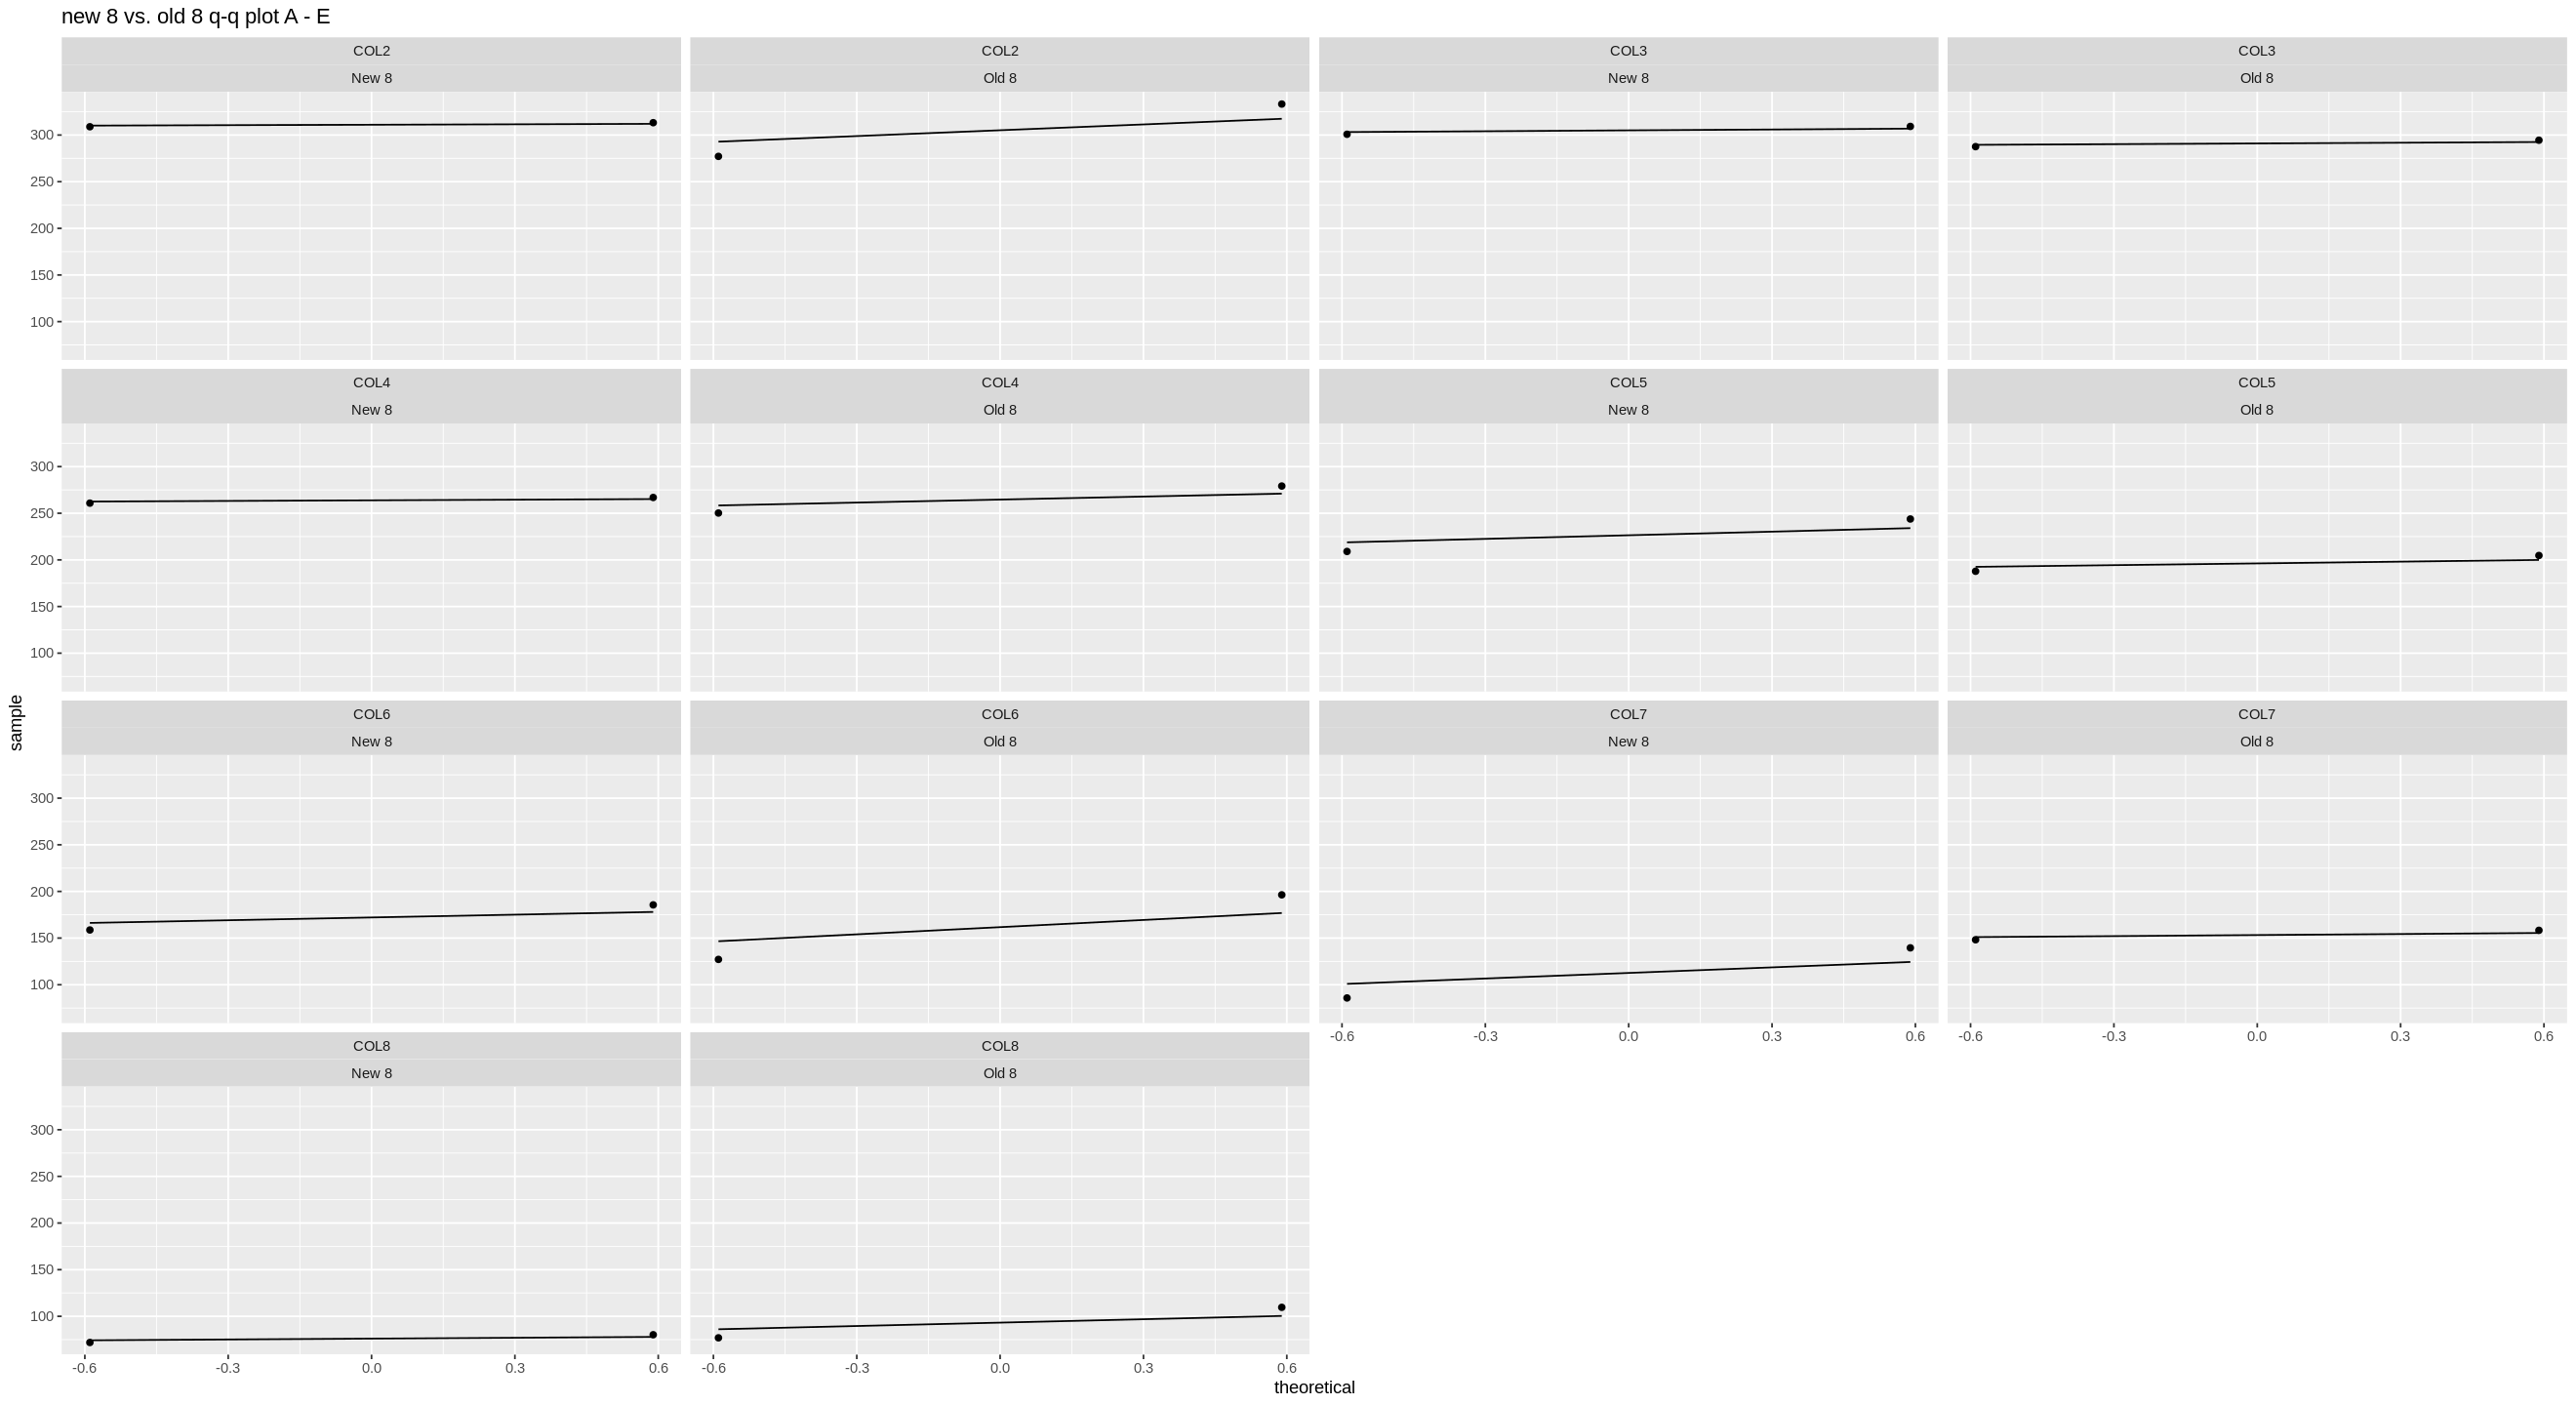

In [69]:
p_qq_si

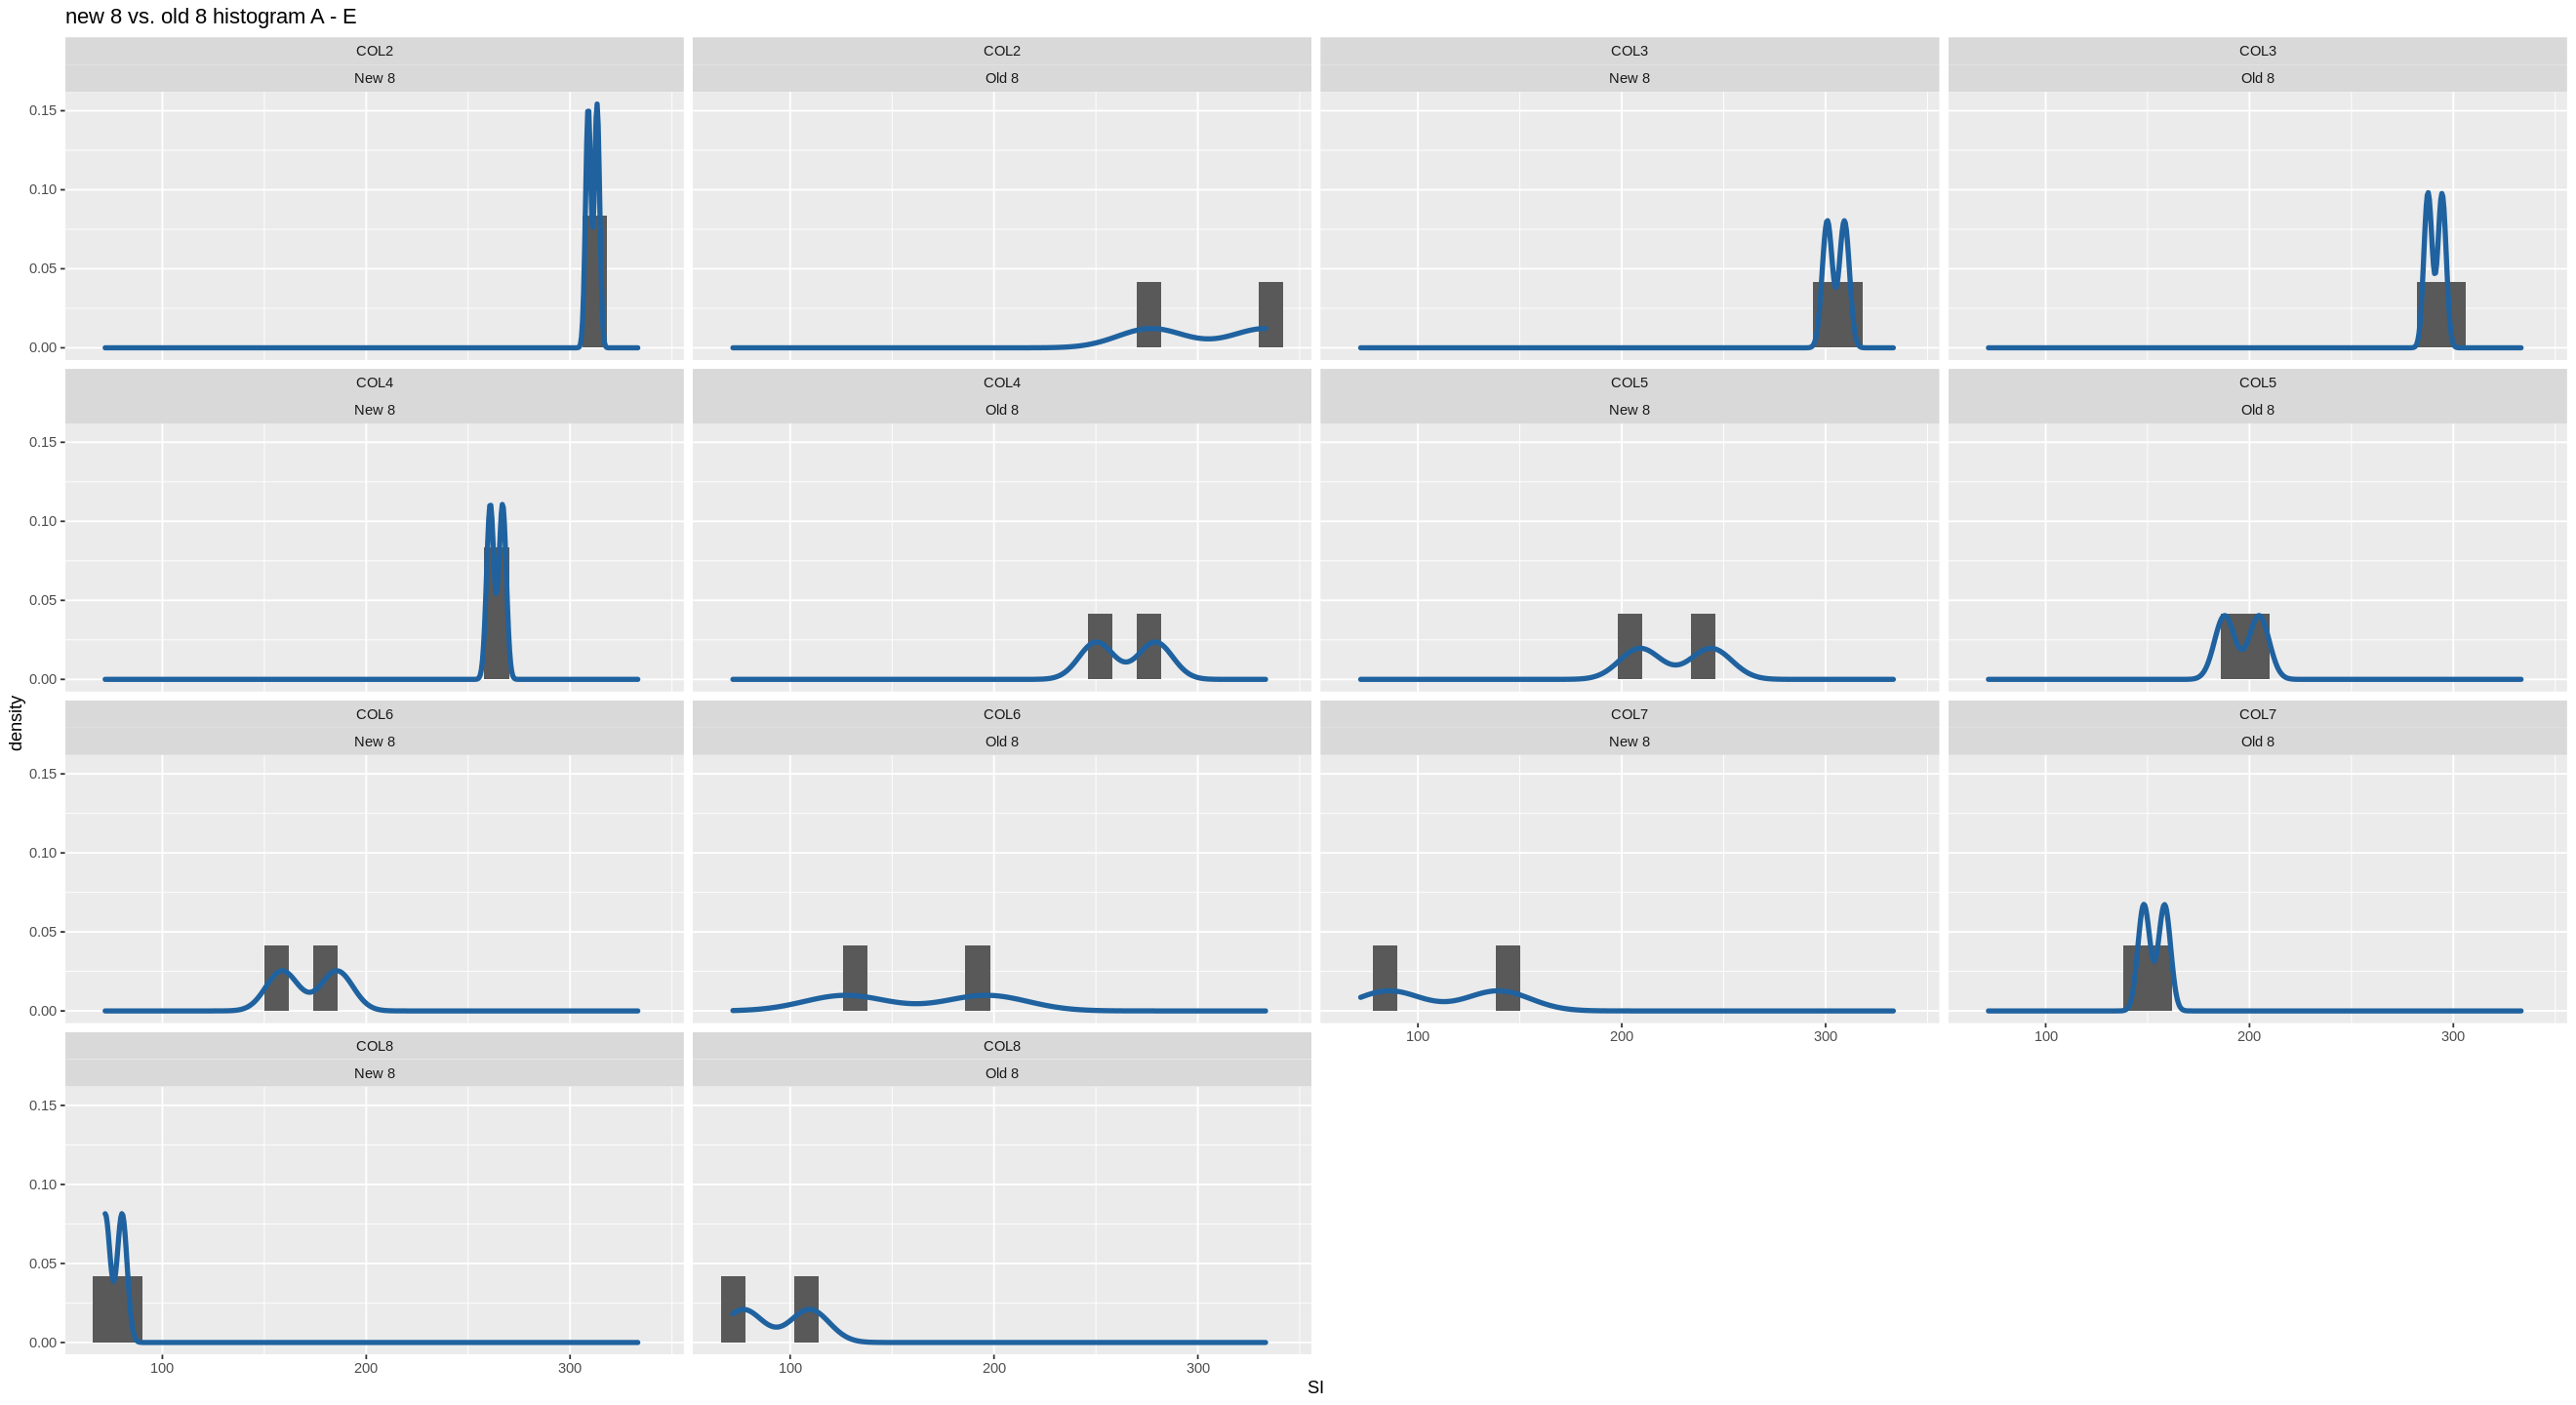

In [70]:
p_hst_si

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Wa

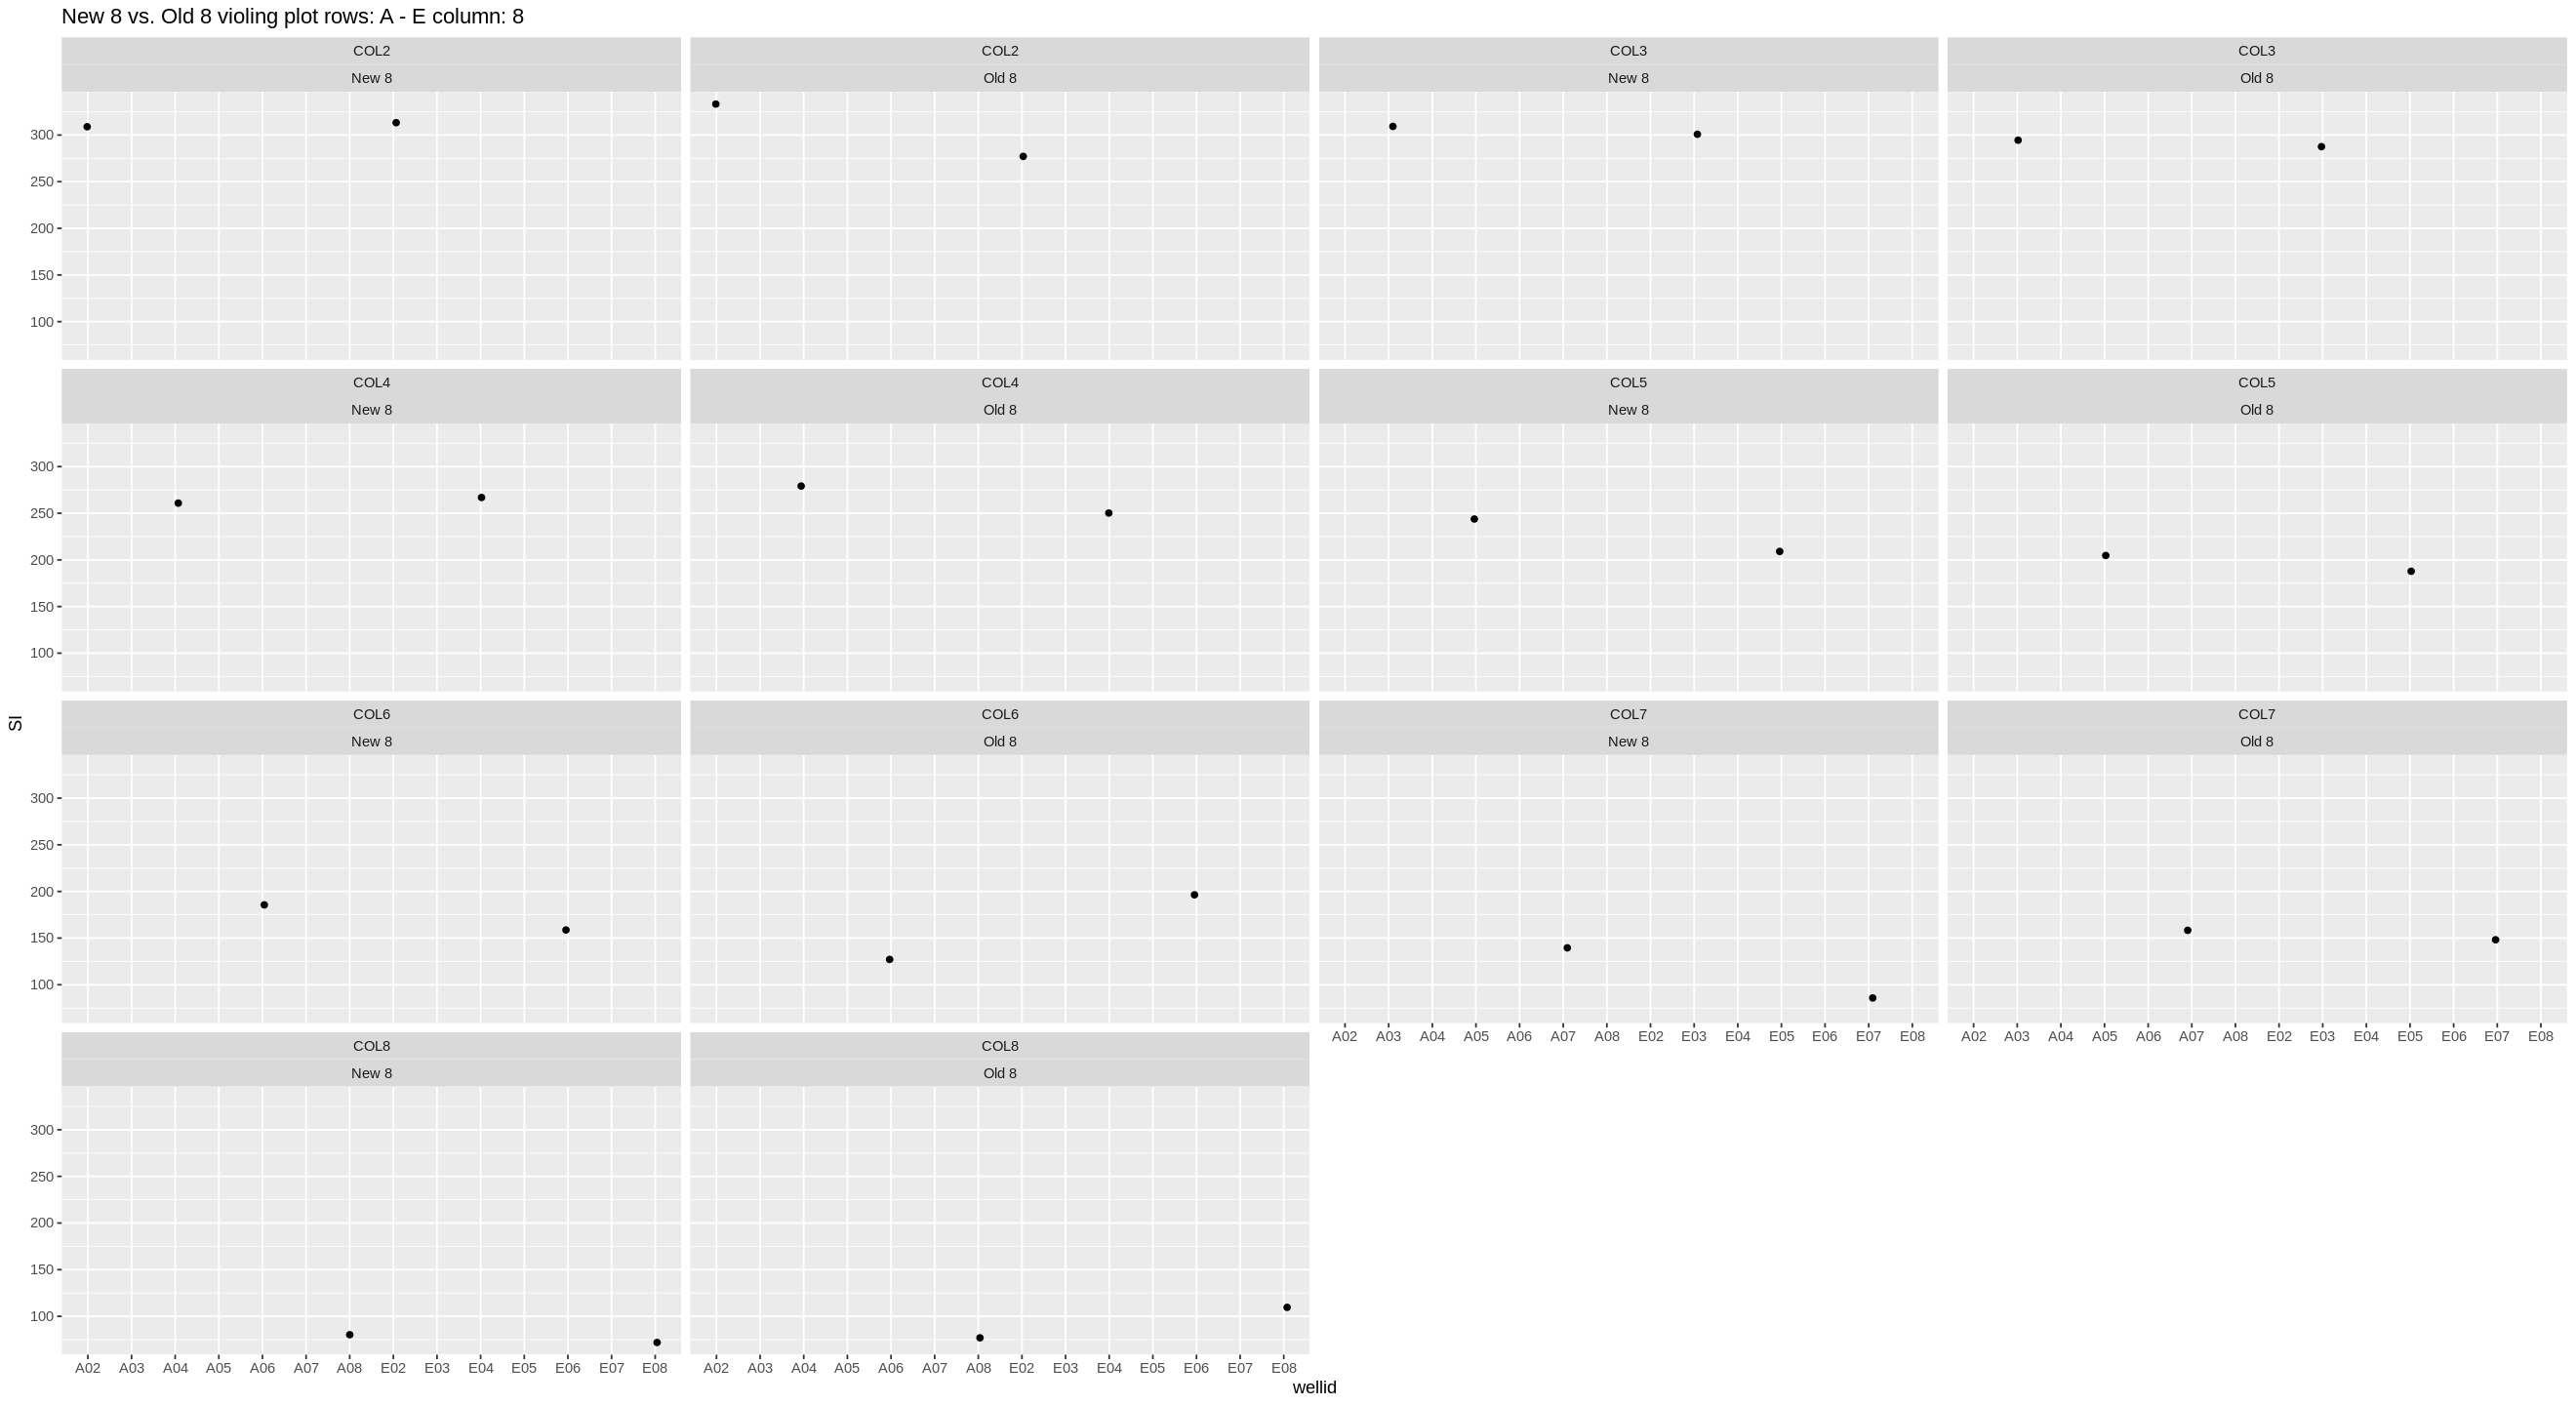

In [71]:
p_violin_si

In [72]:
# B-F
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
dft <- list()
for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    dft[[i-1]] <- dfm %>% 
                    filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i)) %>%
                    mutate(group = case_when(
                        as.numeric(substr(wellid,3,3)) == 2 ~ "COL2",
                        as.numeric(substr(wellid,3,3)) == 3 ~ "COL3",
                        as.numeric(substr(wellid,3,3)) == 4 ~ "COL4",
                        as.numeric(substr(wellid,3,3)) == 5 ~ "COL5",
                        as.numeric(substr(wellid,3,3)) == 6 ~ "COL6",
                        as.numeric(substr(wellid,3,3)) == 7 ~ "COL7",
                        as.numeric(substr(wellid,3,3)) == 8 ~ "COL8"
                        )
                      )
}

df.t <- do.call(rbind, dft)

p_qq_si <- ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

p_hst_si <- ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

p_violin_si <- ggplot(df.t, aes(wellid, SI)) + 
    geom_violin(aes(colour = wellid)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(group~ method)

[1] "B / F : 2"
[1] "B / F : 3"
[1] "B / F : 4"
[1] "B / F : 5"
[1] "B / F : 6"
[1] "B / F : 7"
[1] "B / F : 8"


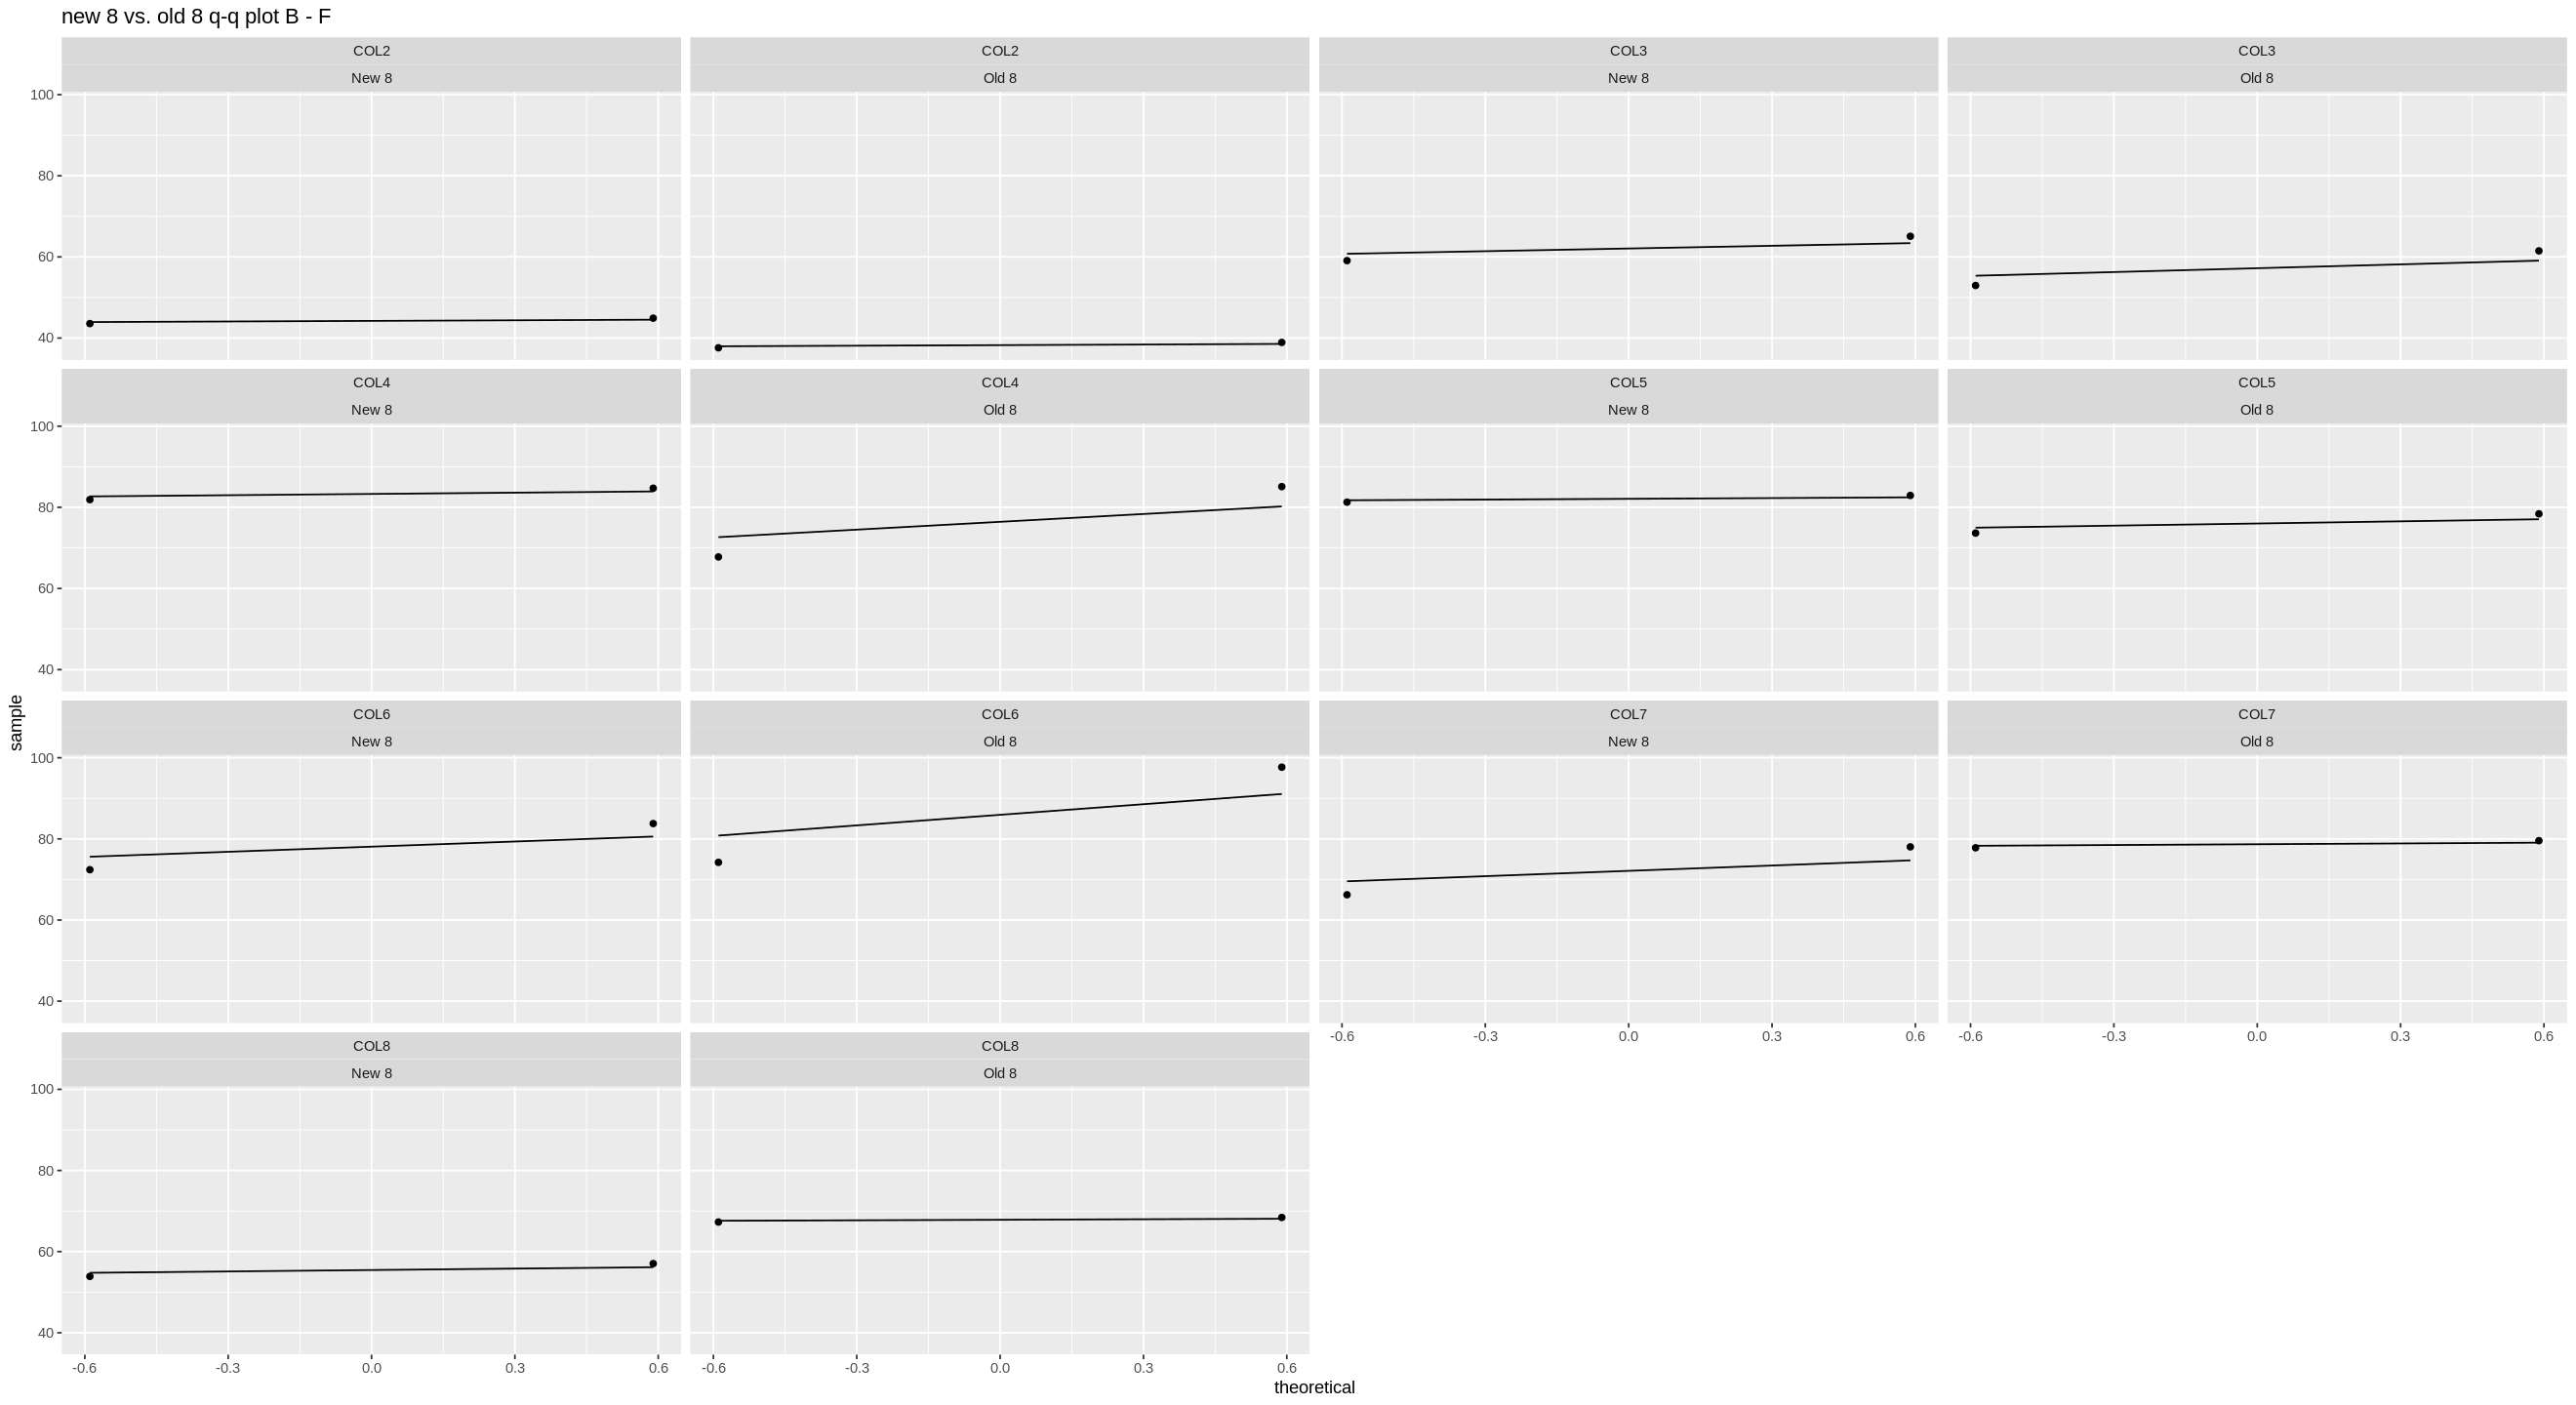

In [73]:
p_qq_si

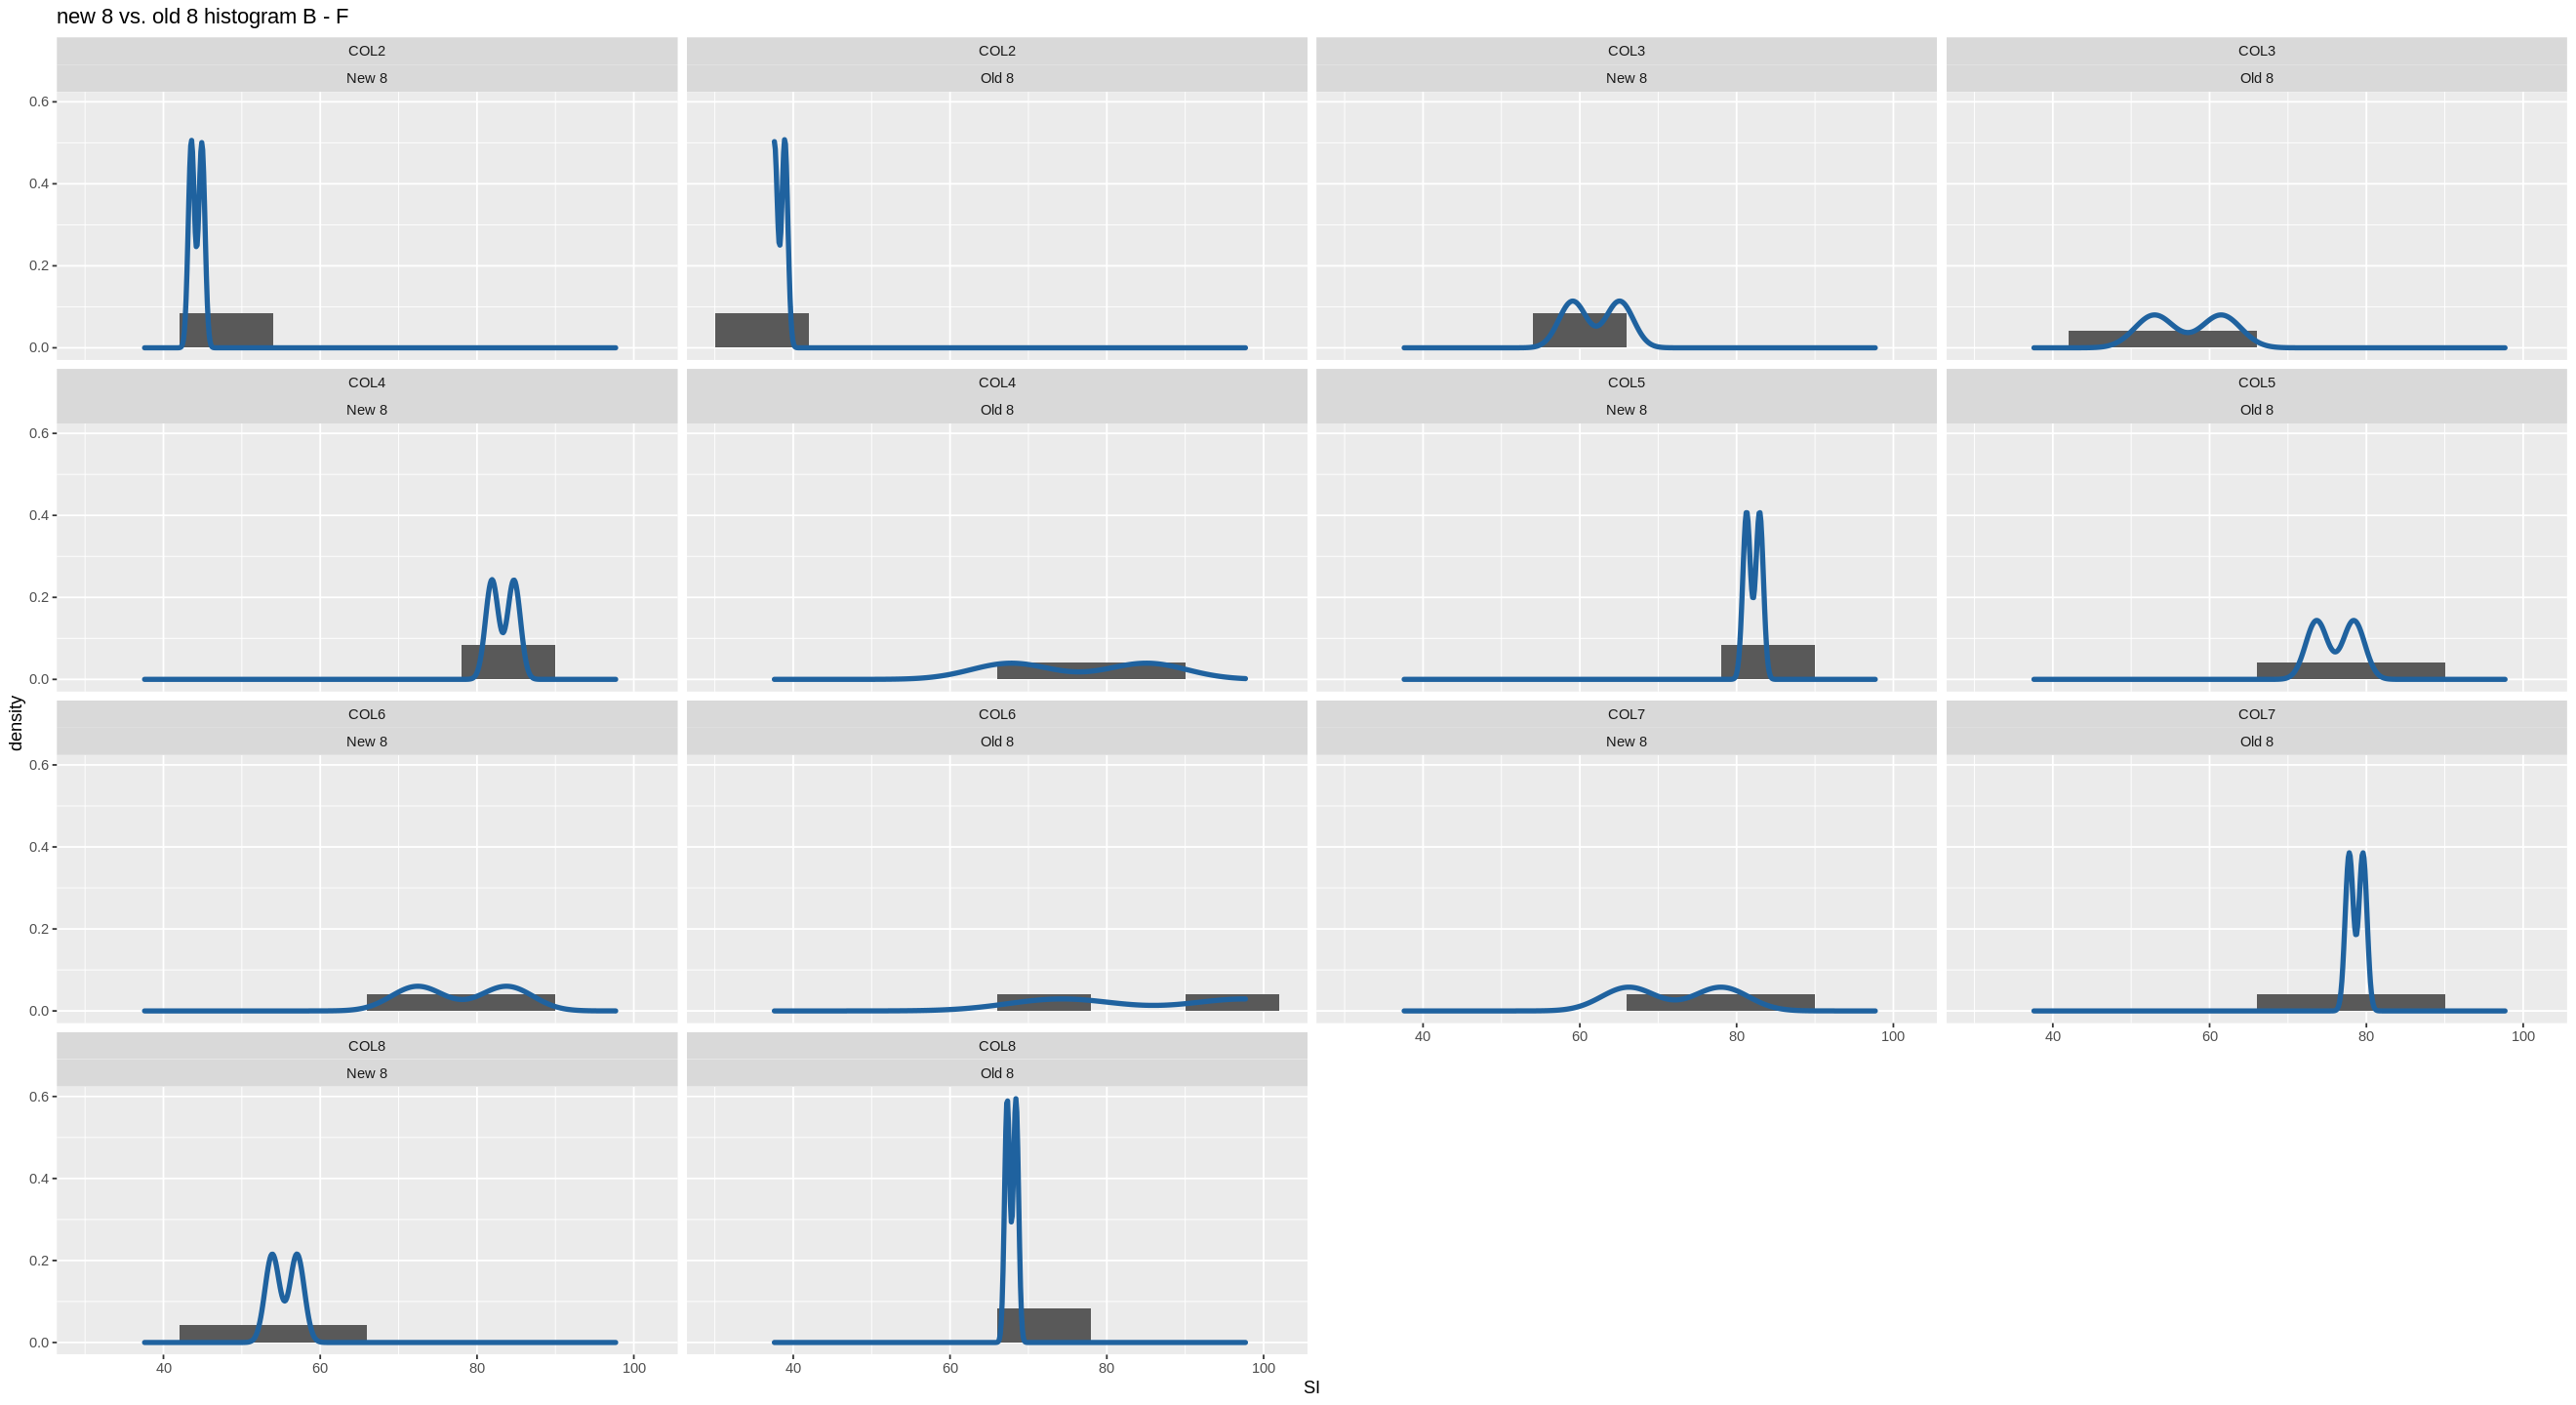

In [74]:
p_hst_si

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Wa

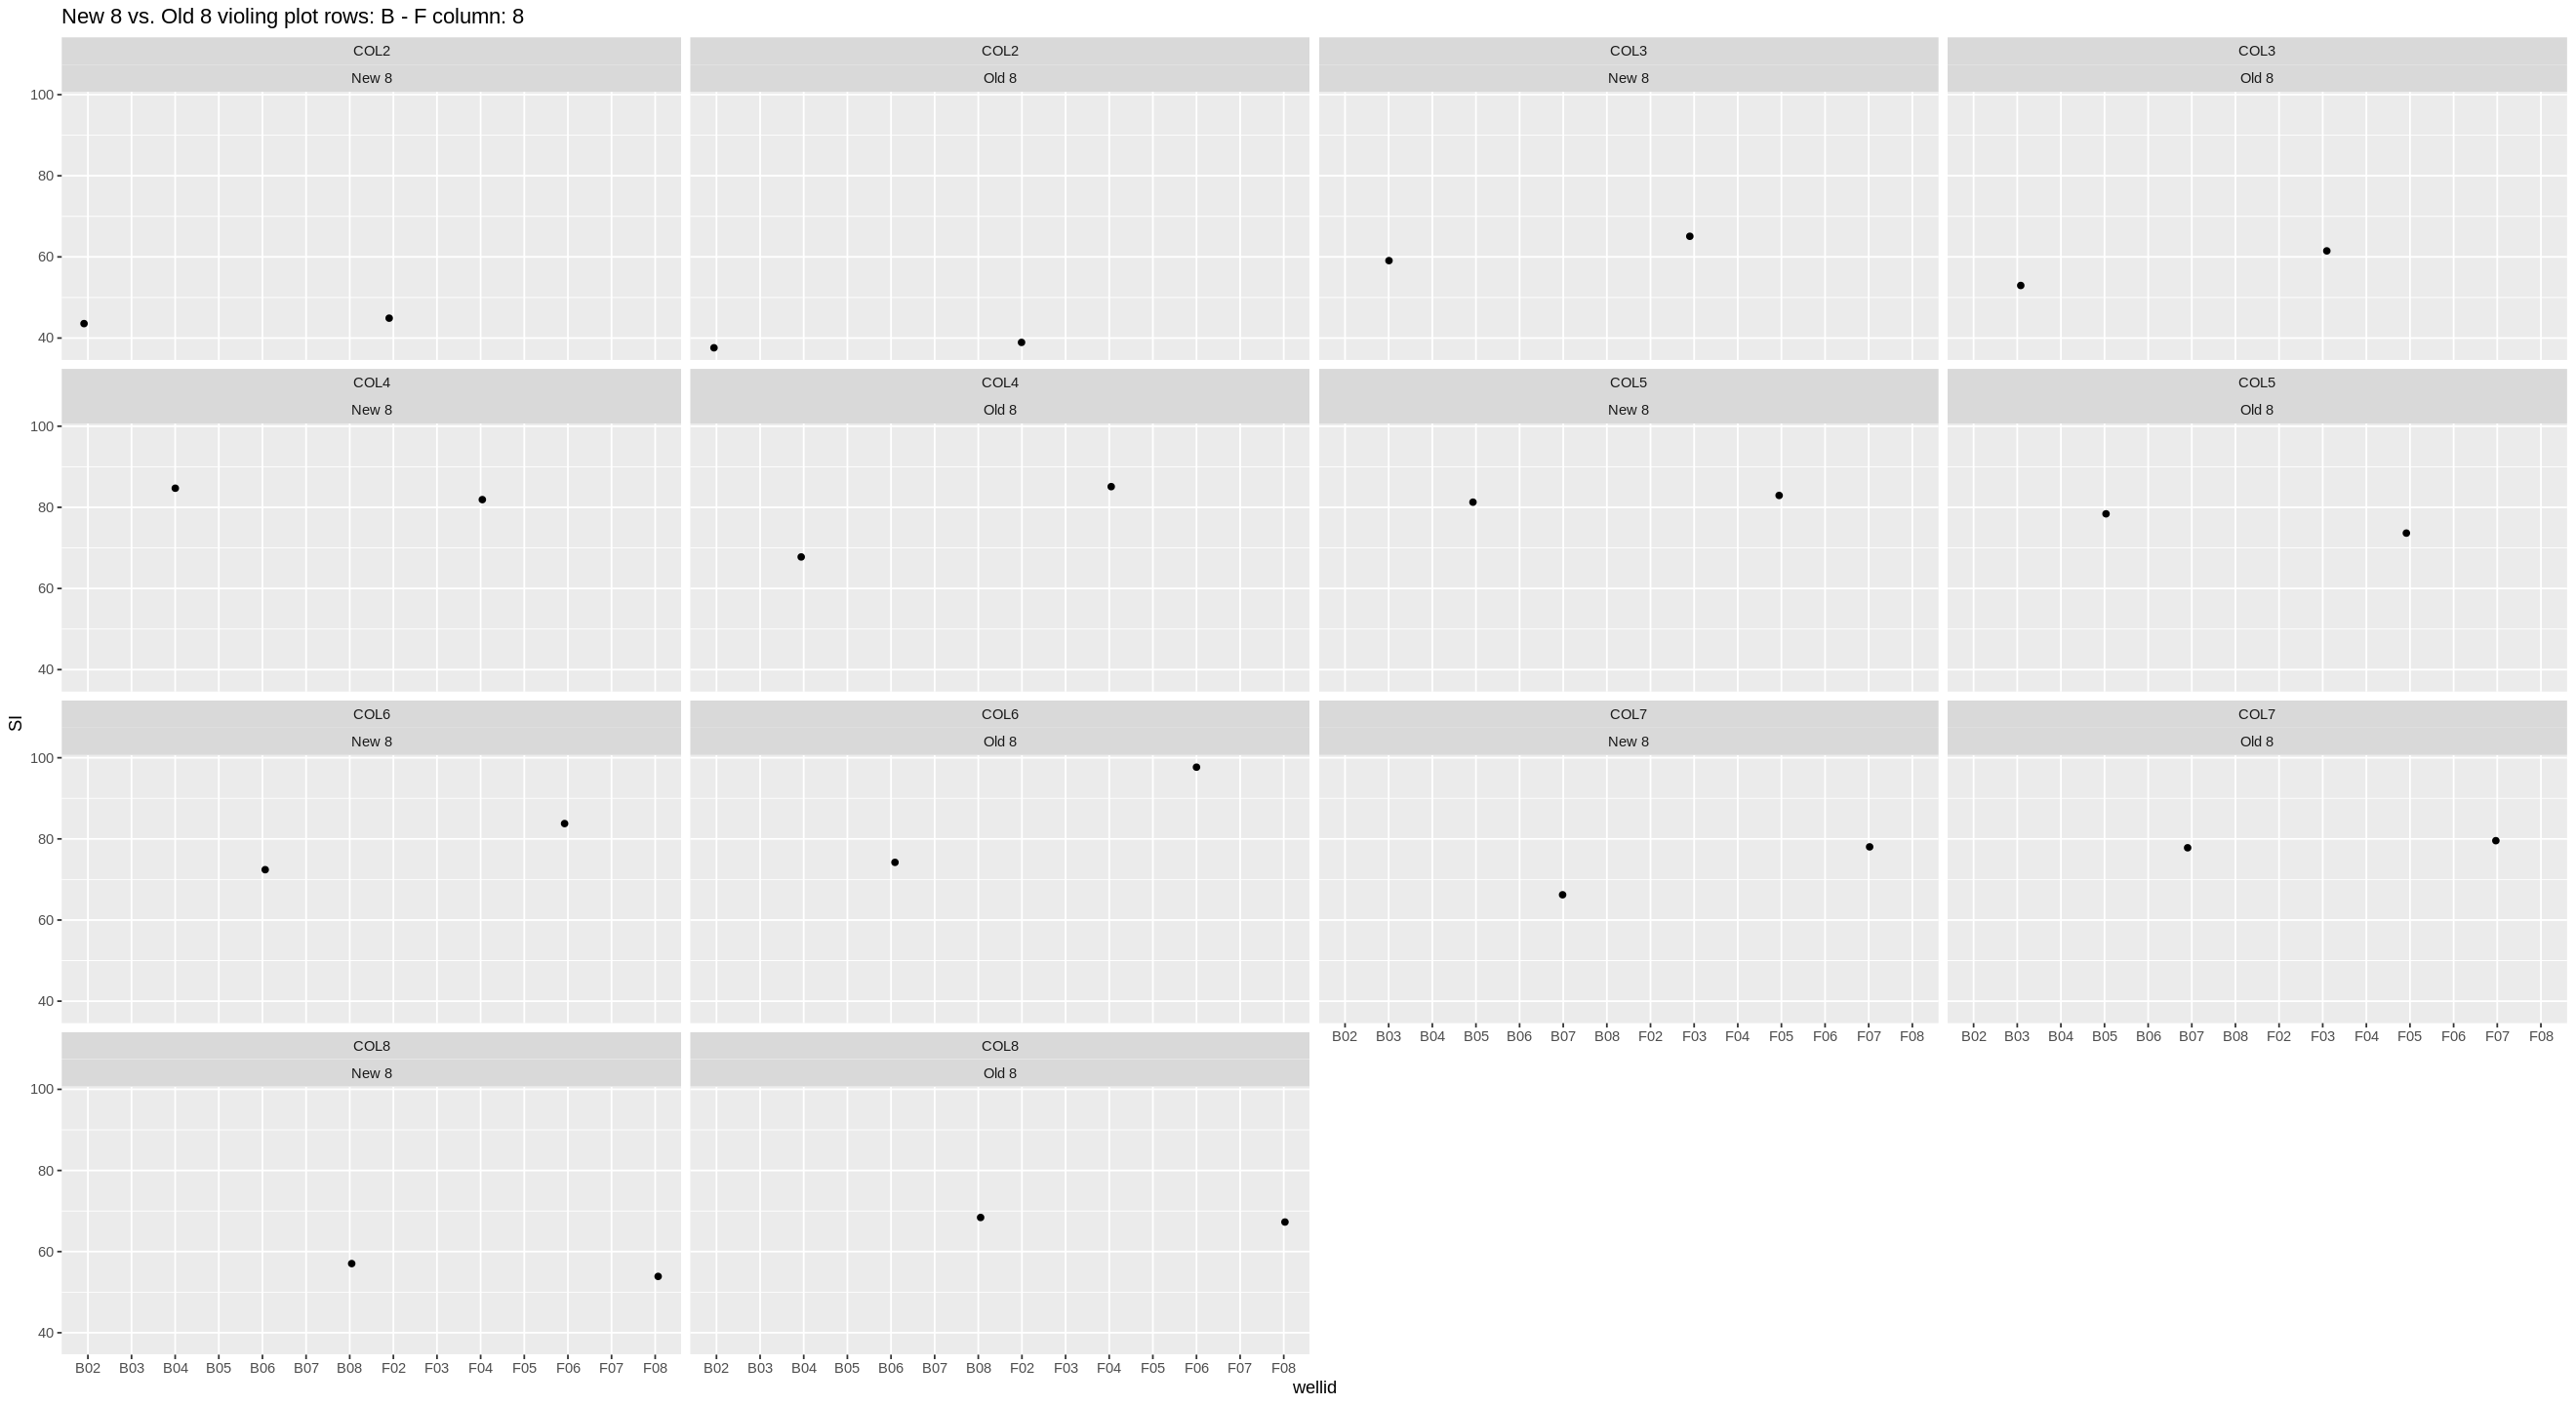

In [75]:
p_violin_si

In [76]:
# C-G
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
dft <- list()
for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    dft[[i-1]] <- dfm %>% 
                    filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i)) %>%
                    mutate(group = case_when(
                        as.numeric(substr(wellid,3,3)) == 2 ~ "COL2",
                        as.numeric(substr(wellid,3,3)) == 3 ~ "COL3",
                        as.numeric(substr(wellid,3,3)) == 4 ~ "COL4",
                        as.numeric(substr(wellid,3,3)) == 5 ~ "COL5",
                        as.numeric(substr(wellid,3,3)) == 6 ~ "COL6",
                        as.numeric(substr(wellid,3,3)) == 7 ~ "COL7",
                        as.numeric(substr(wellid,3,3)) == 8 ~ "COL8"
                        )
                      )
}

df.t <- do.call(rbind, dft)

p_qq_si <- ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

p_hst_si <- ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

p_violin_si <- ggplot(df.t, aes(wellid, SI)) + 
    geom_violin(aes(colour = wellid)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(group~ method)

[1] "C / G : 2"
[1] "C / G : 3"
[1] "C / G : 4"
[1] "C / G : 5"
[1] "C / G : 6"
[1] "C / G : 7"
[1] "C / G : 8"


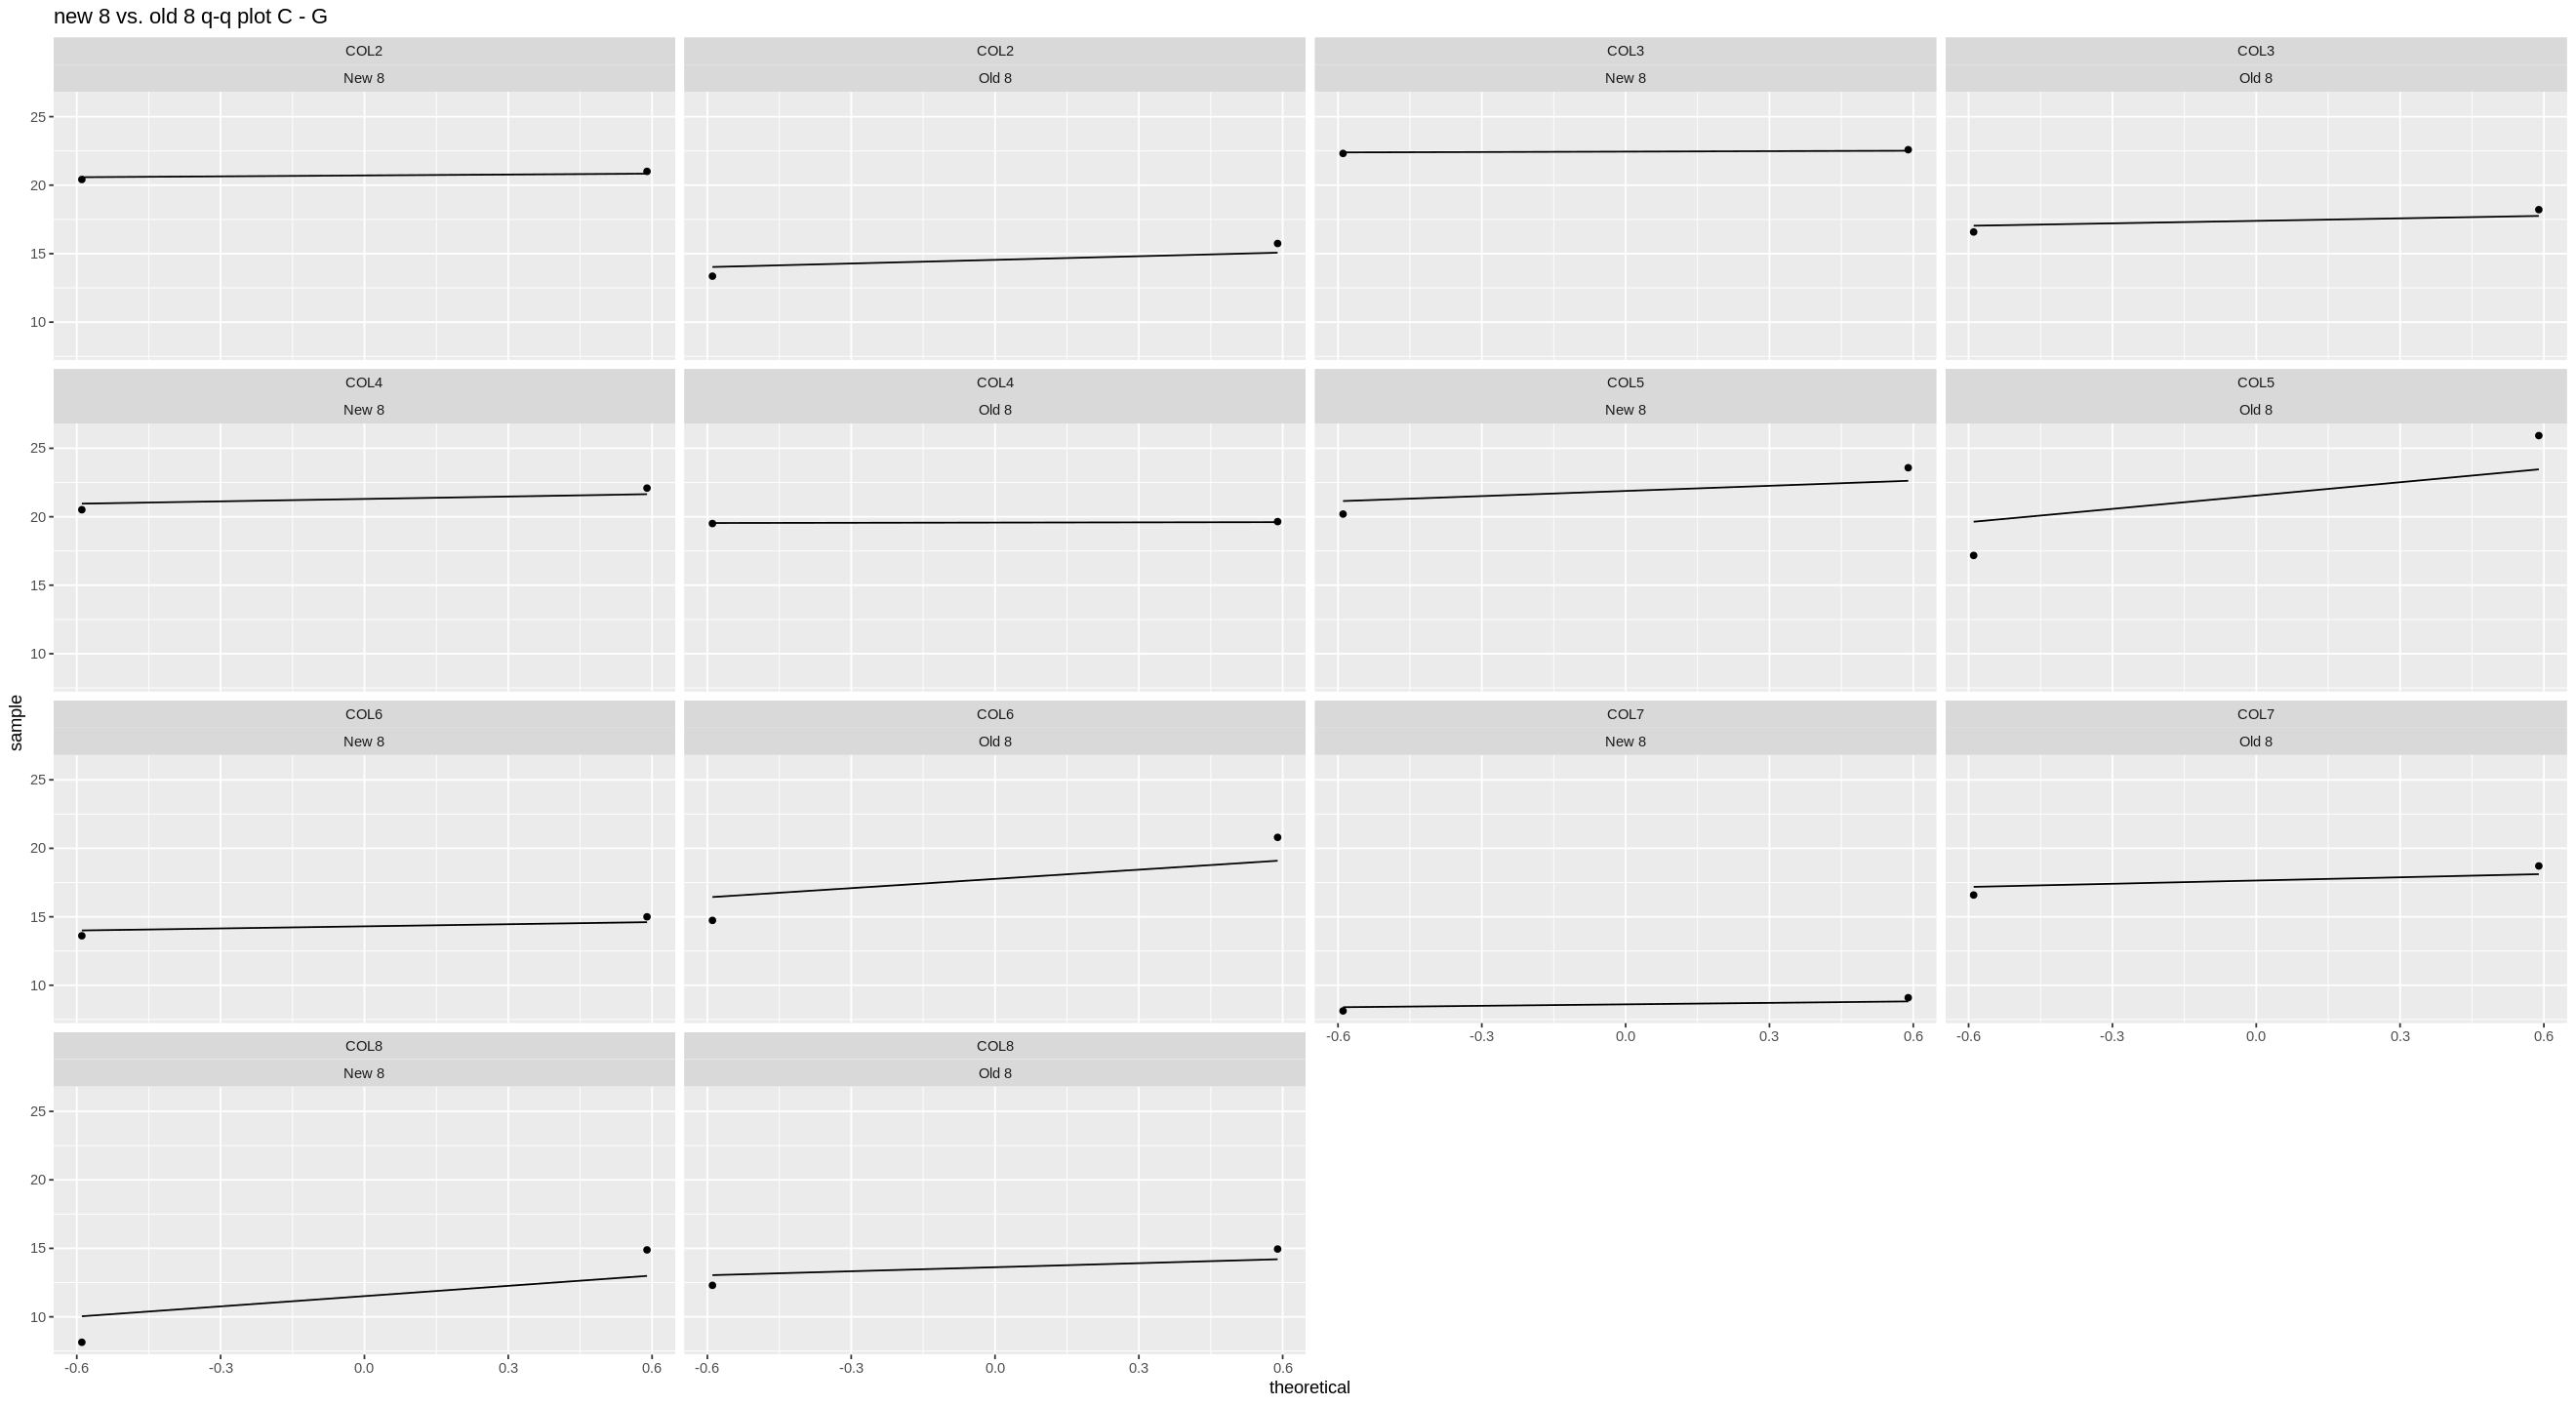

In [77]:
p_qq_si

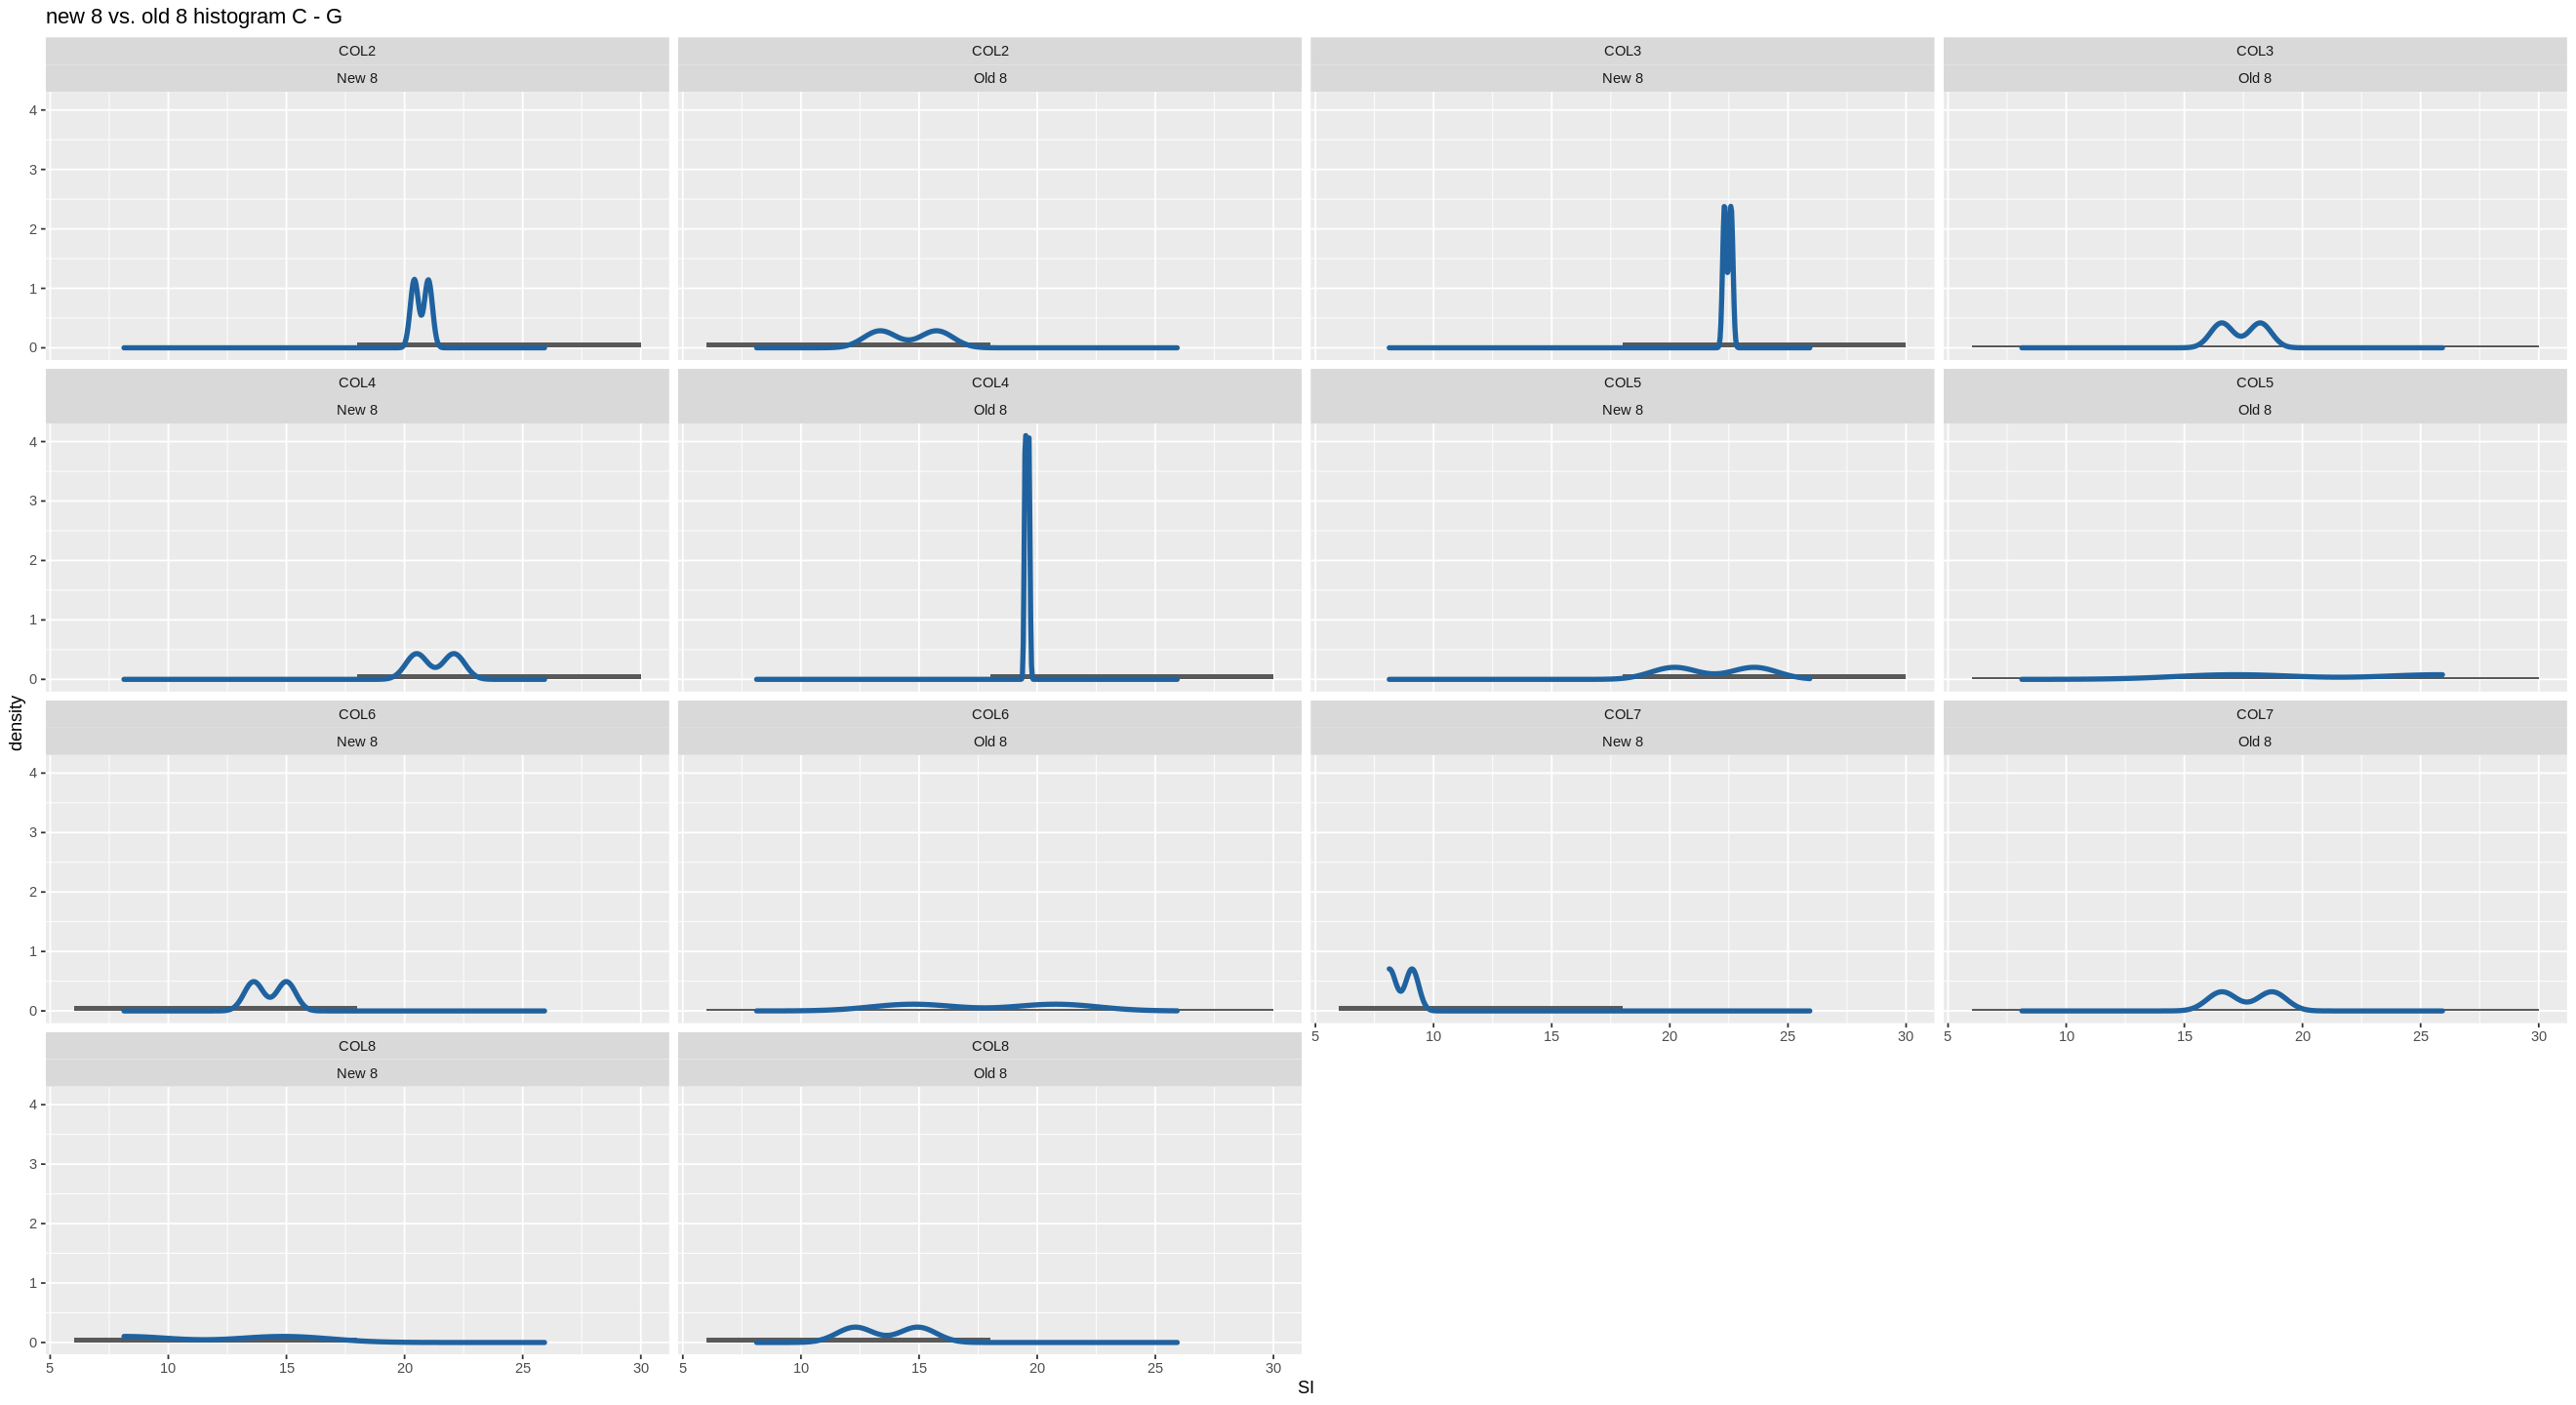

In [78]:
p_hst_si

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Wa

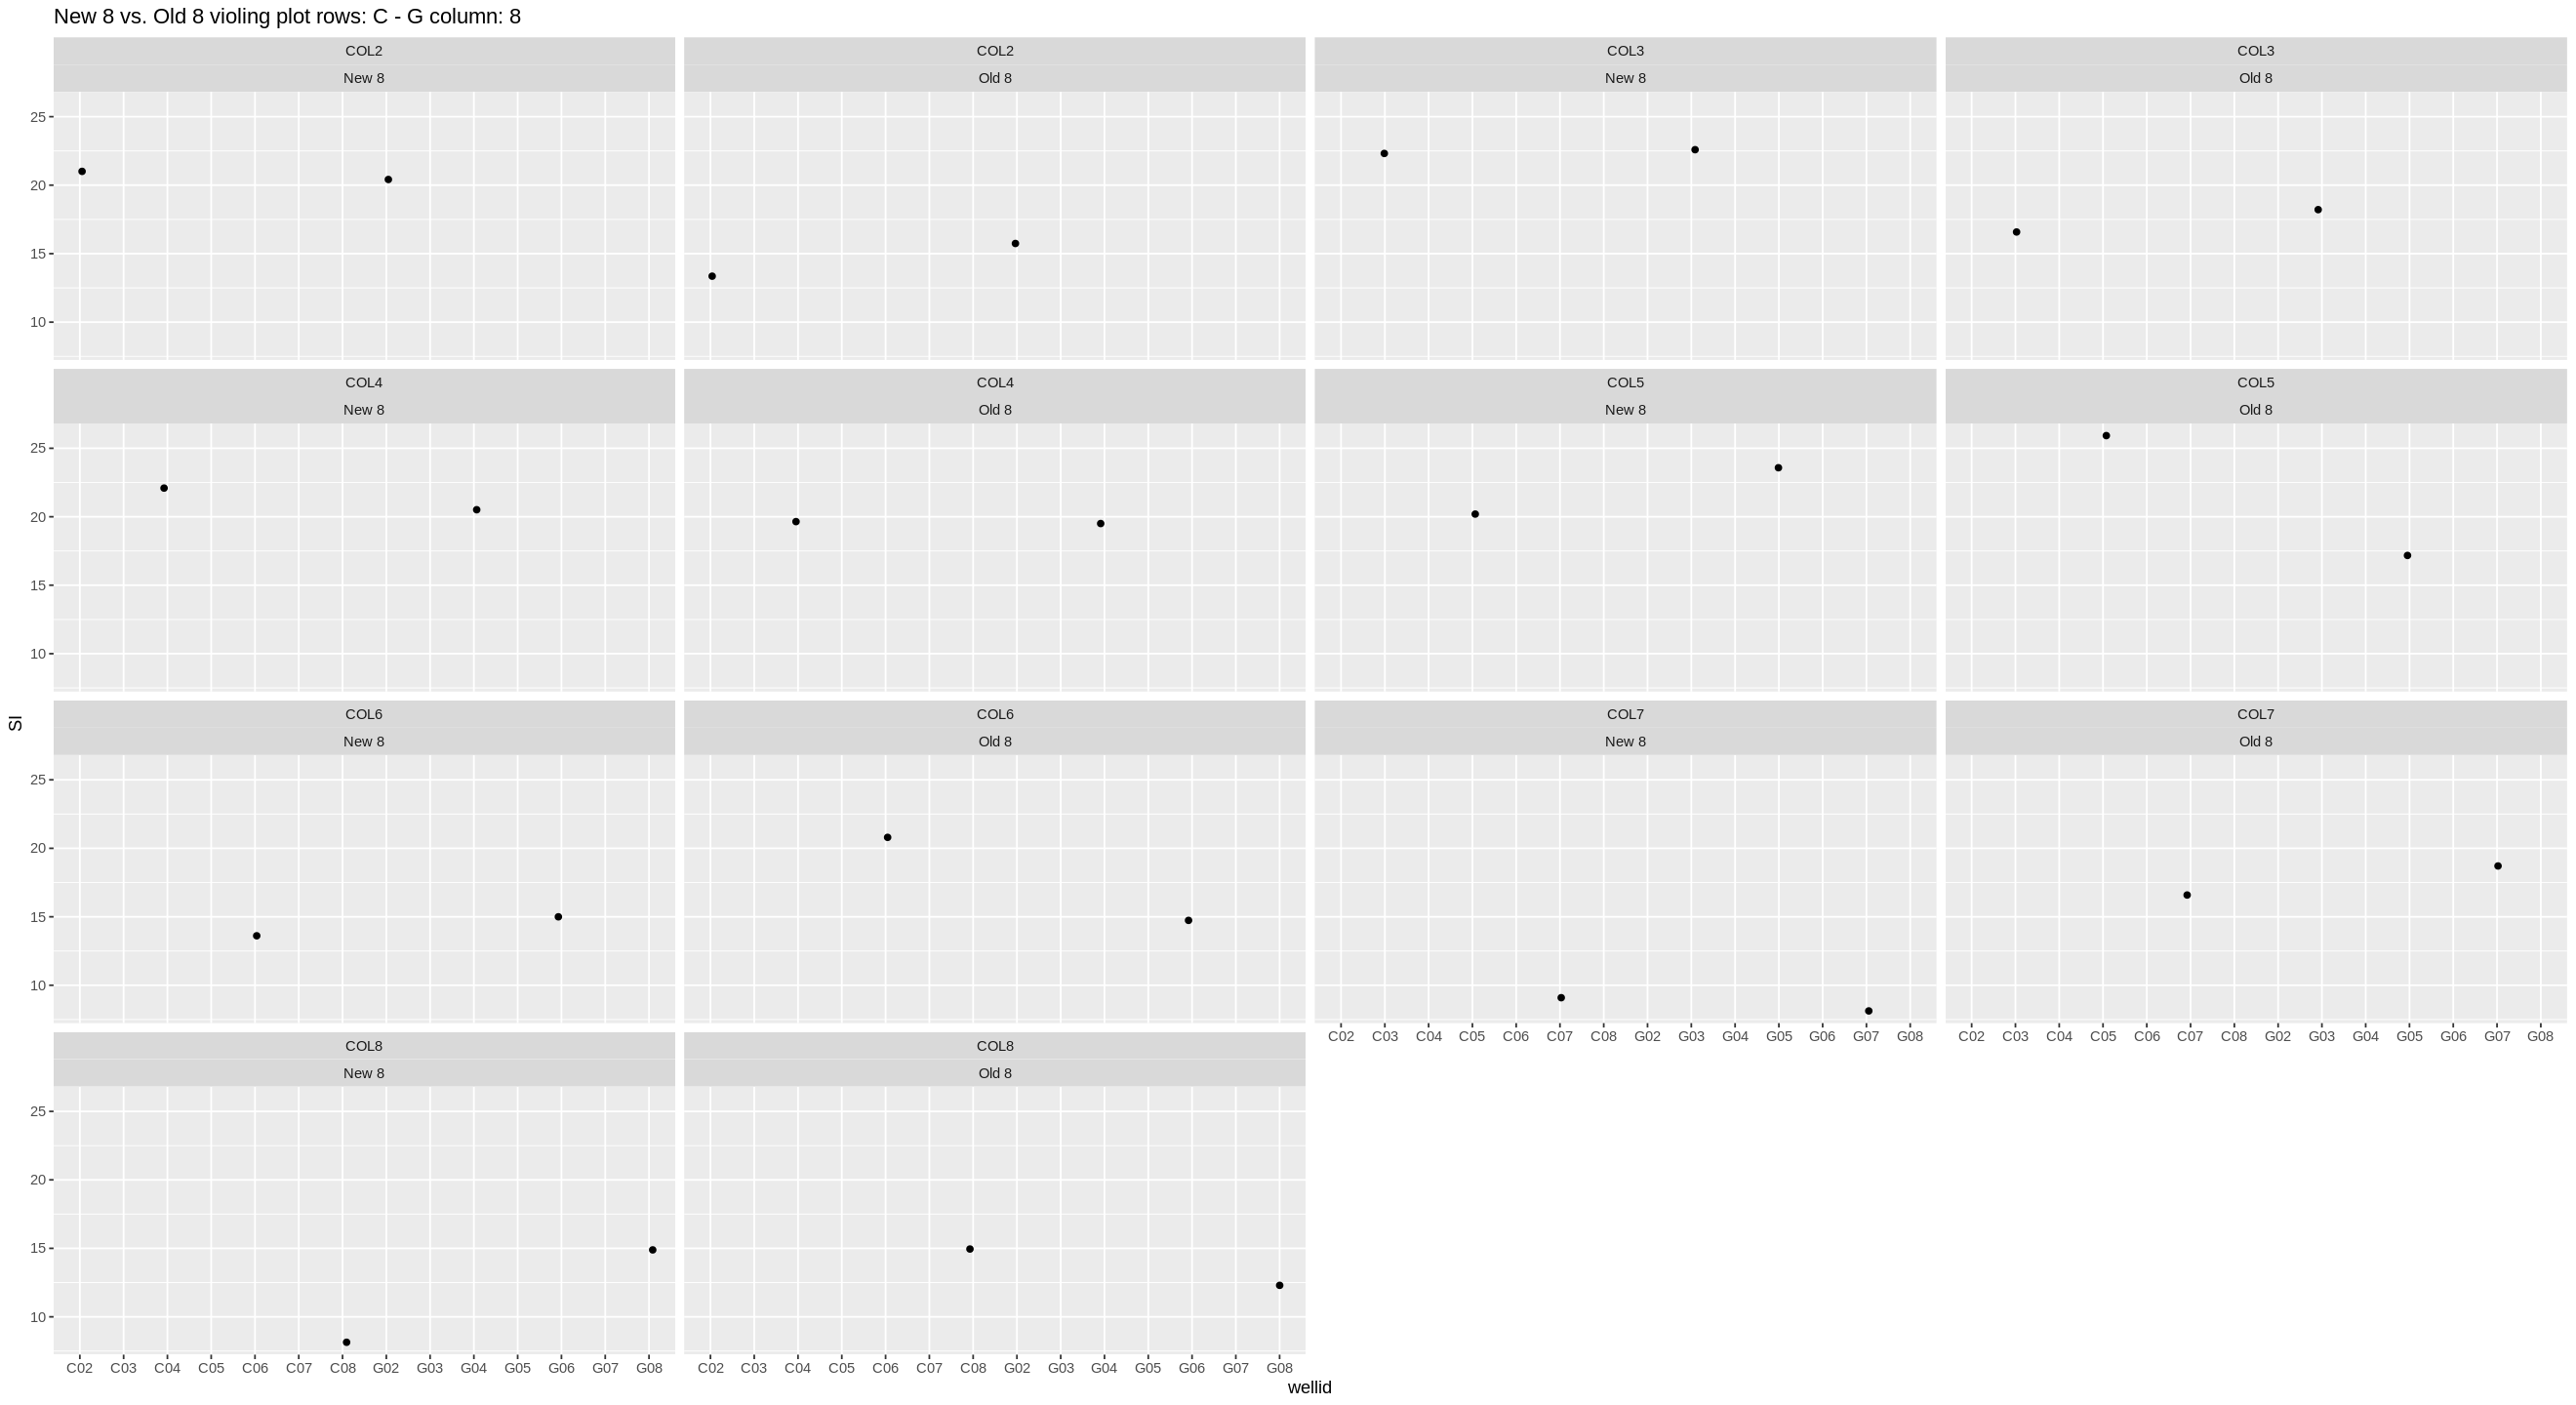

In [79]:
p_violin_si

In [81]:
# D-H
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
dft <- list()
for (i in seq(2,8)){
    print(paste(pat1,"/",pat2, ":", i))
    dft[[i-1]] <- dfm %>% 
                    filter(wellid == paste0(pat1,"0", i) | wellid == paste0(pat2,"0",i)) %>%
                    mutate(group = case_when(
                        as.numeric(substr(wellid,3,3)) == 2 ~ "COL2",
                        as.numeric(substr(wellid,3,3)) == 3 ~ "COL3",
                        as.numeric(substr(wellid,3,3)) == 4 ~ "COL4",
                        as.numeric(substr(wellid,3,3)) == 5 ~ "COL5",
                        as.numeric(substr(wellid,3,3)) == 6 ~ "COL6",
                        as.numeric(substr(wellid,3,3)) == 7 ~ "COL7",
                        as.numeric(substr(wellid,3,3)) == 8 ~ "COL8"
                        )
                      )
}

df.t <- do.call(rbind, dft)

p_qq_si <- ggplot(df.t, aes(sample = SI, group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot", pat1, "-", pat2))

p_hst_si <- ggplot(data = df.t, aes(group = group, x = SI)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram", pat1, "-", pat2))

p_violin_si <- ggplot(df.t, aes(wellid, SI)) + 
    geom_violin(aes(colour = wellid)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows:", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(group~ method)

[1] "D / H : 2"
[1] "D / H : 3"
[1] "D / H : 4"
[1] "D / H : 5"
[1] "D / H : 6"
[1] "D / H : 7"
[1] "D / H : 8"


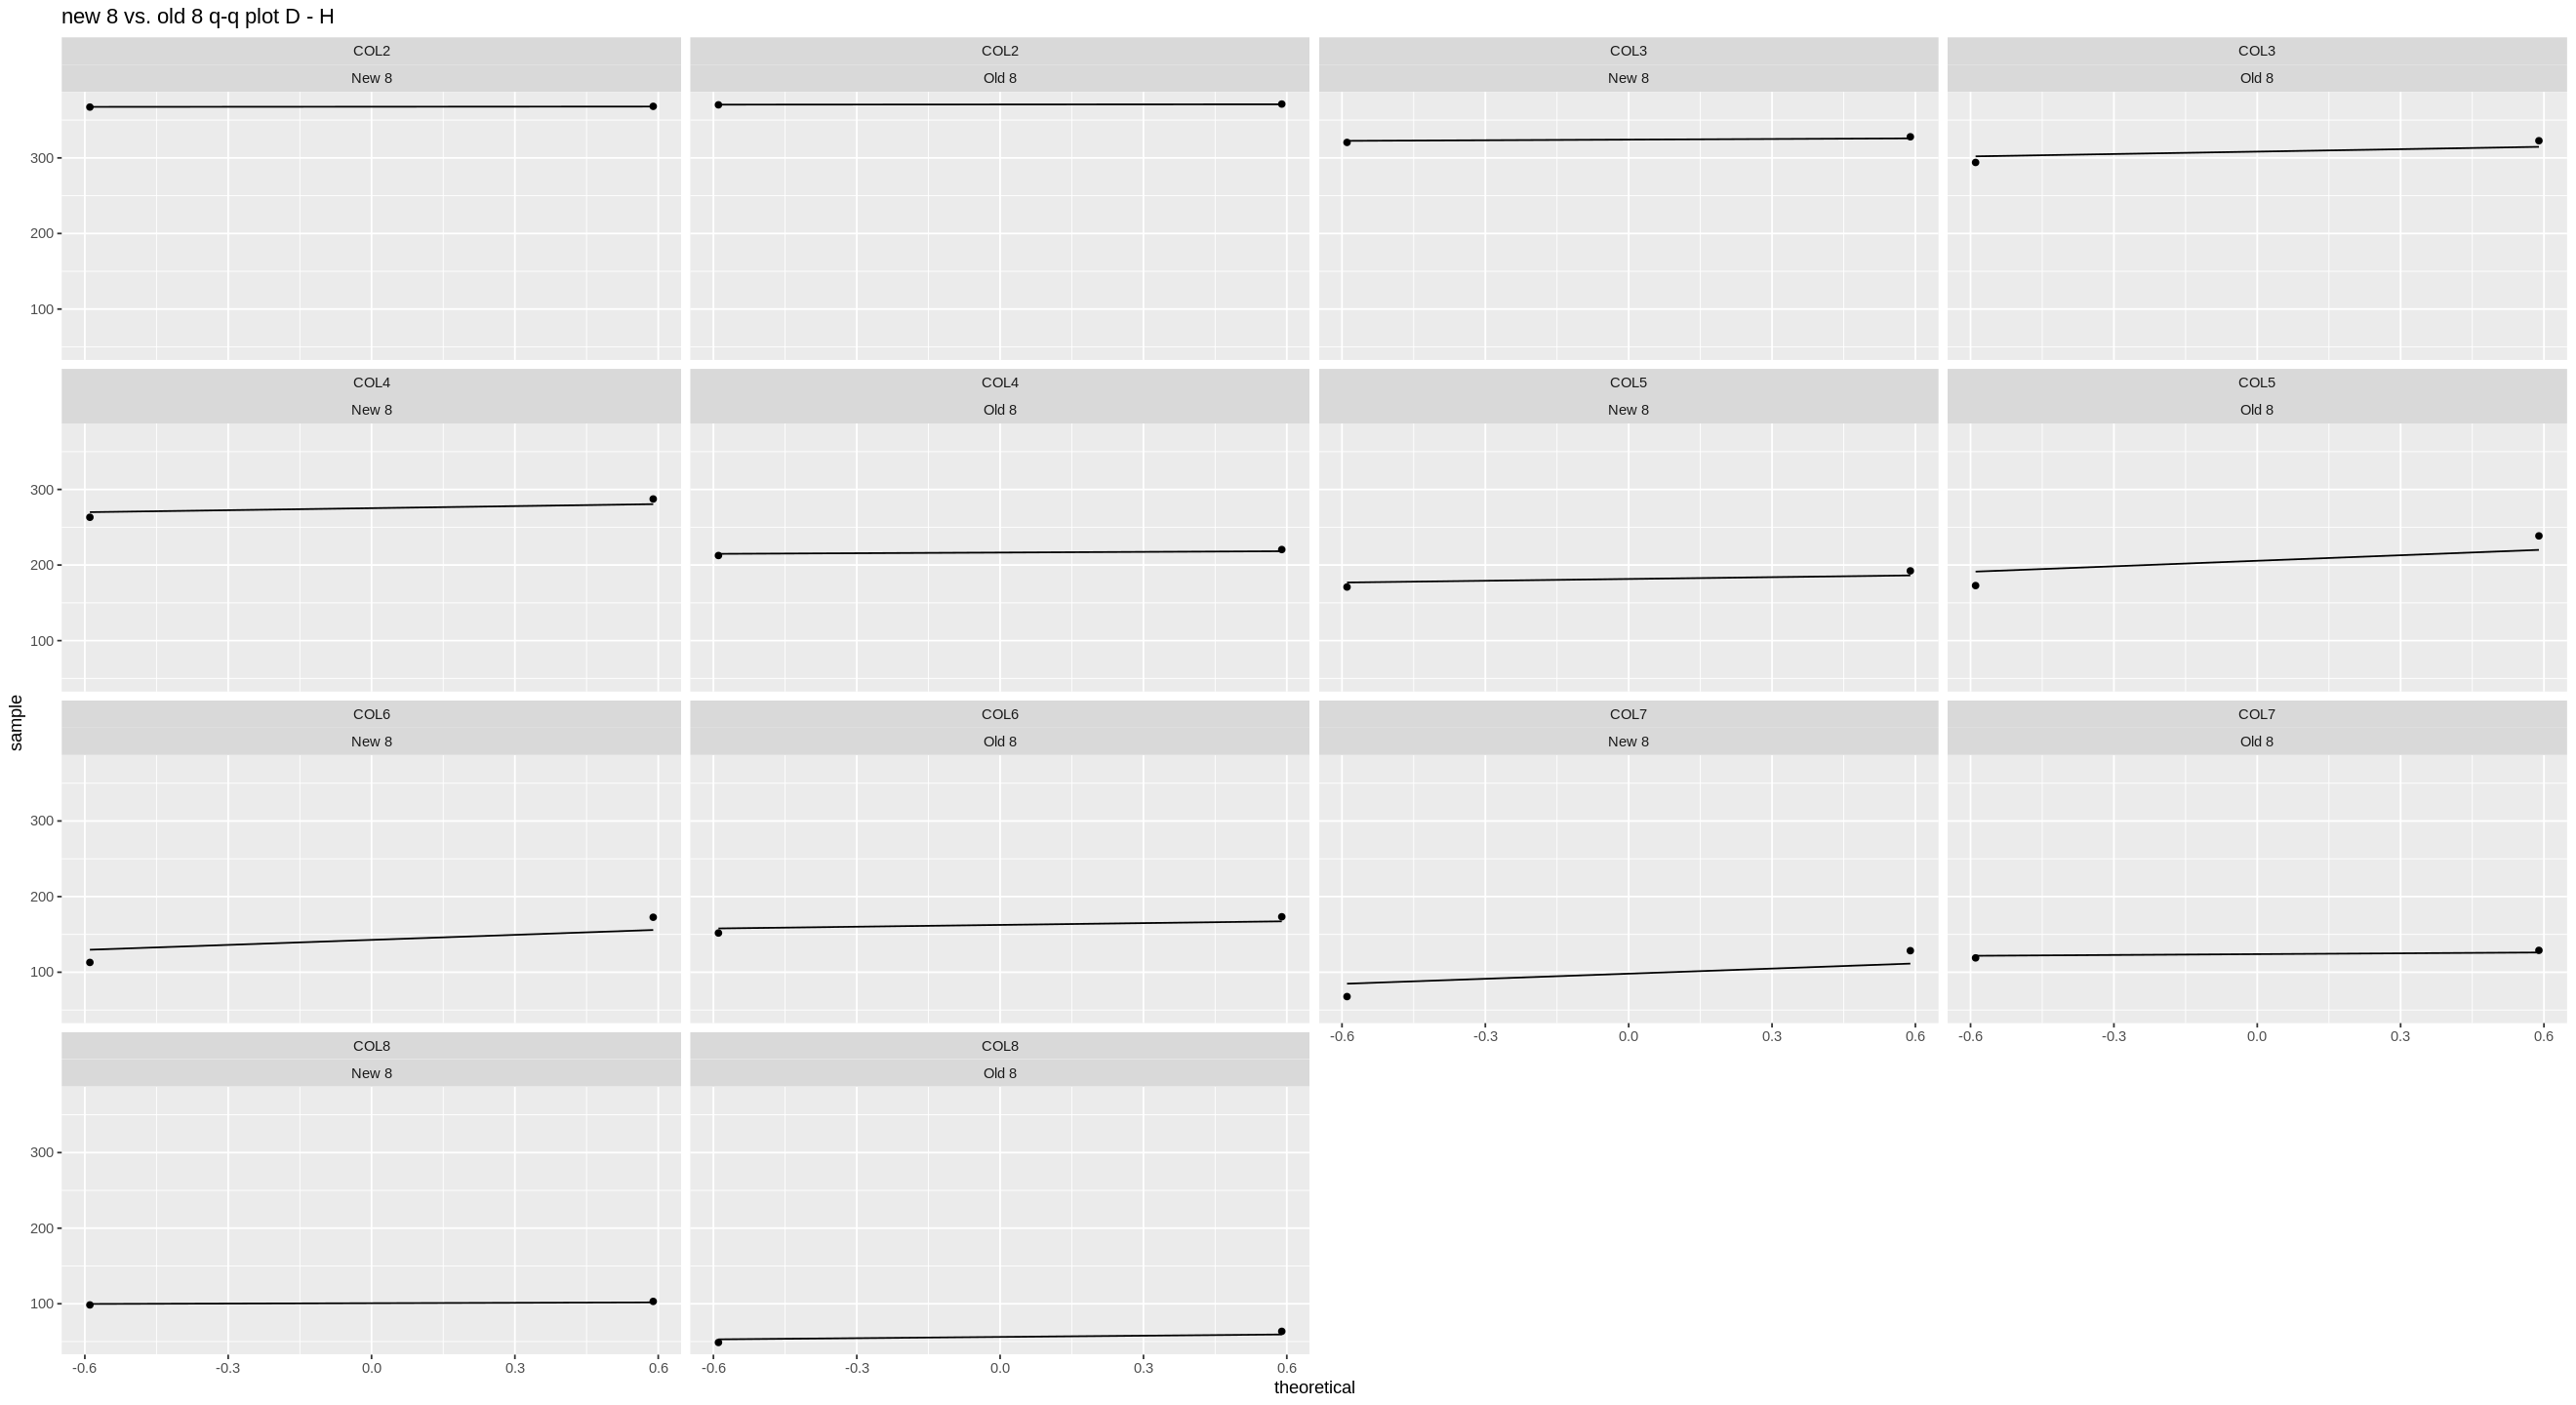

In [82]:
p_qq_si

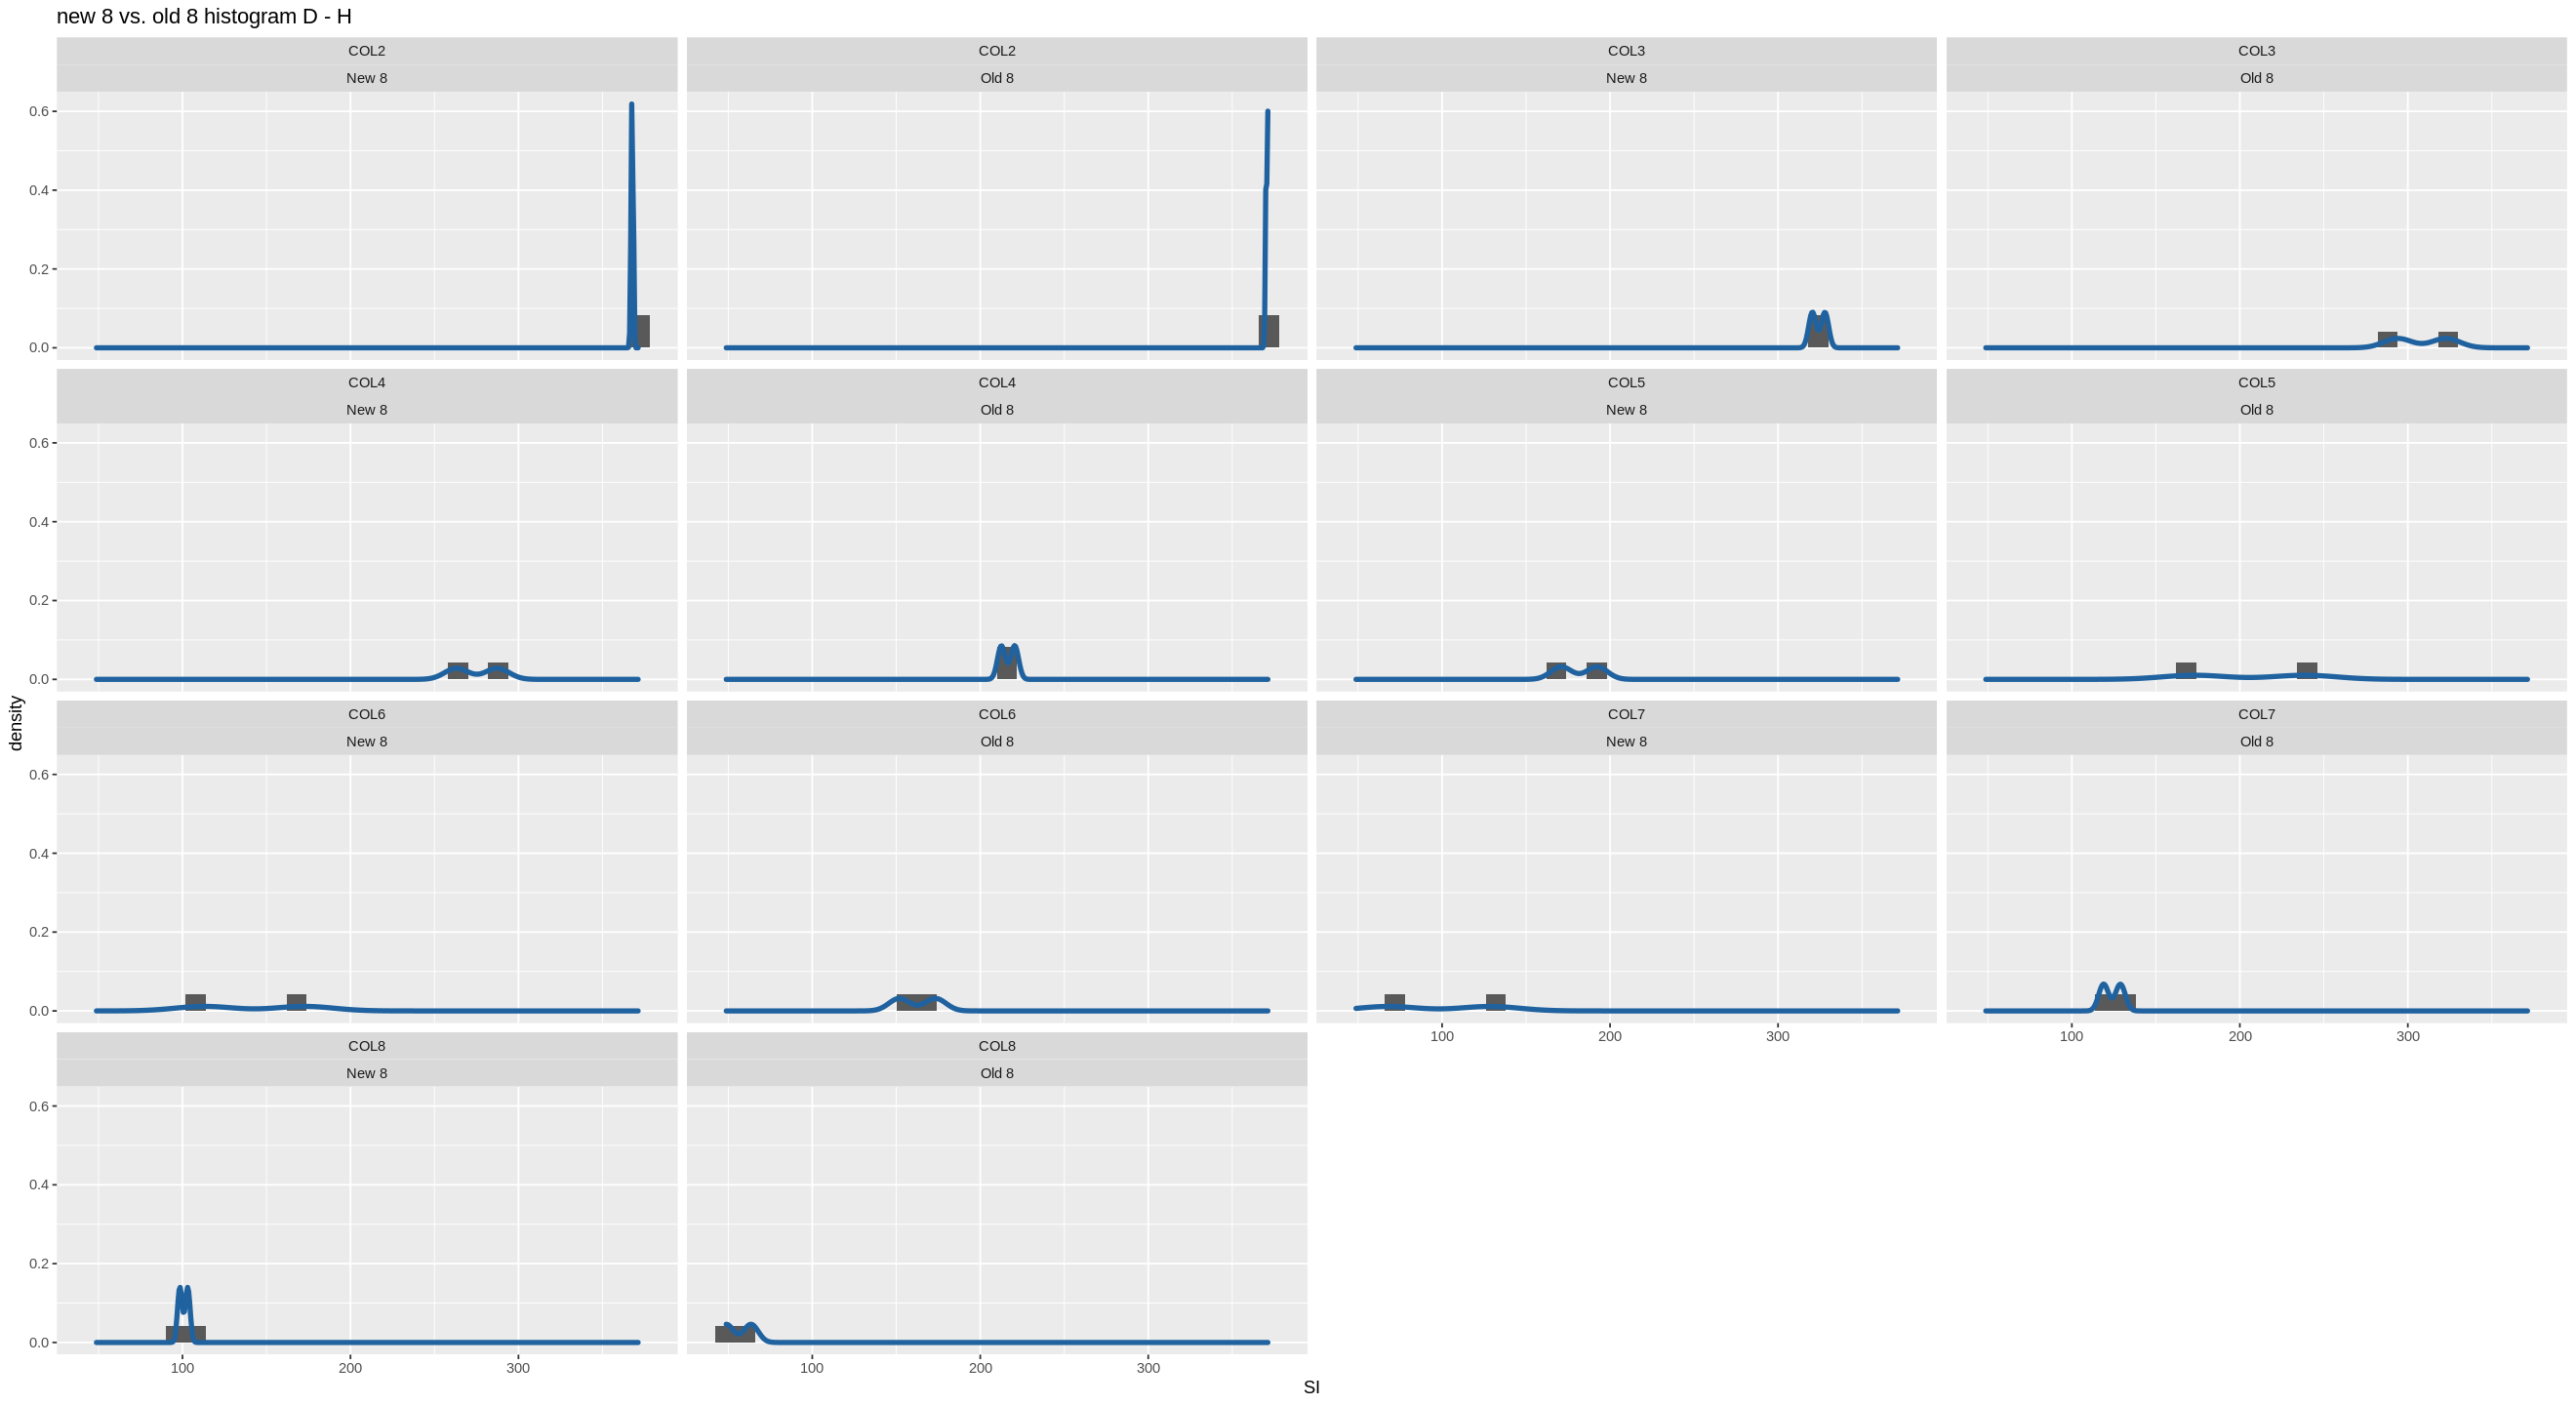

In [83]:
p_hst_si

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Wa

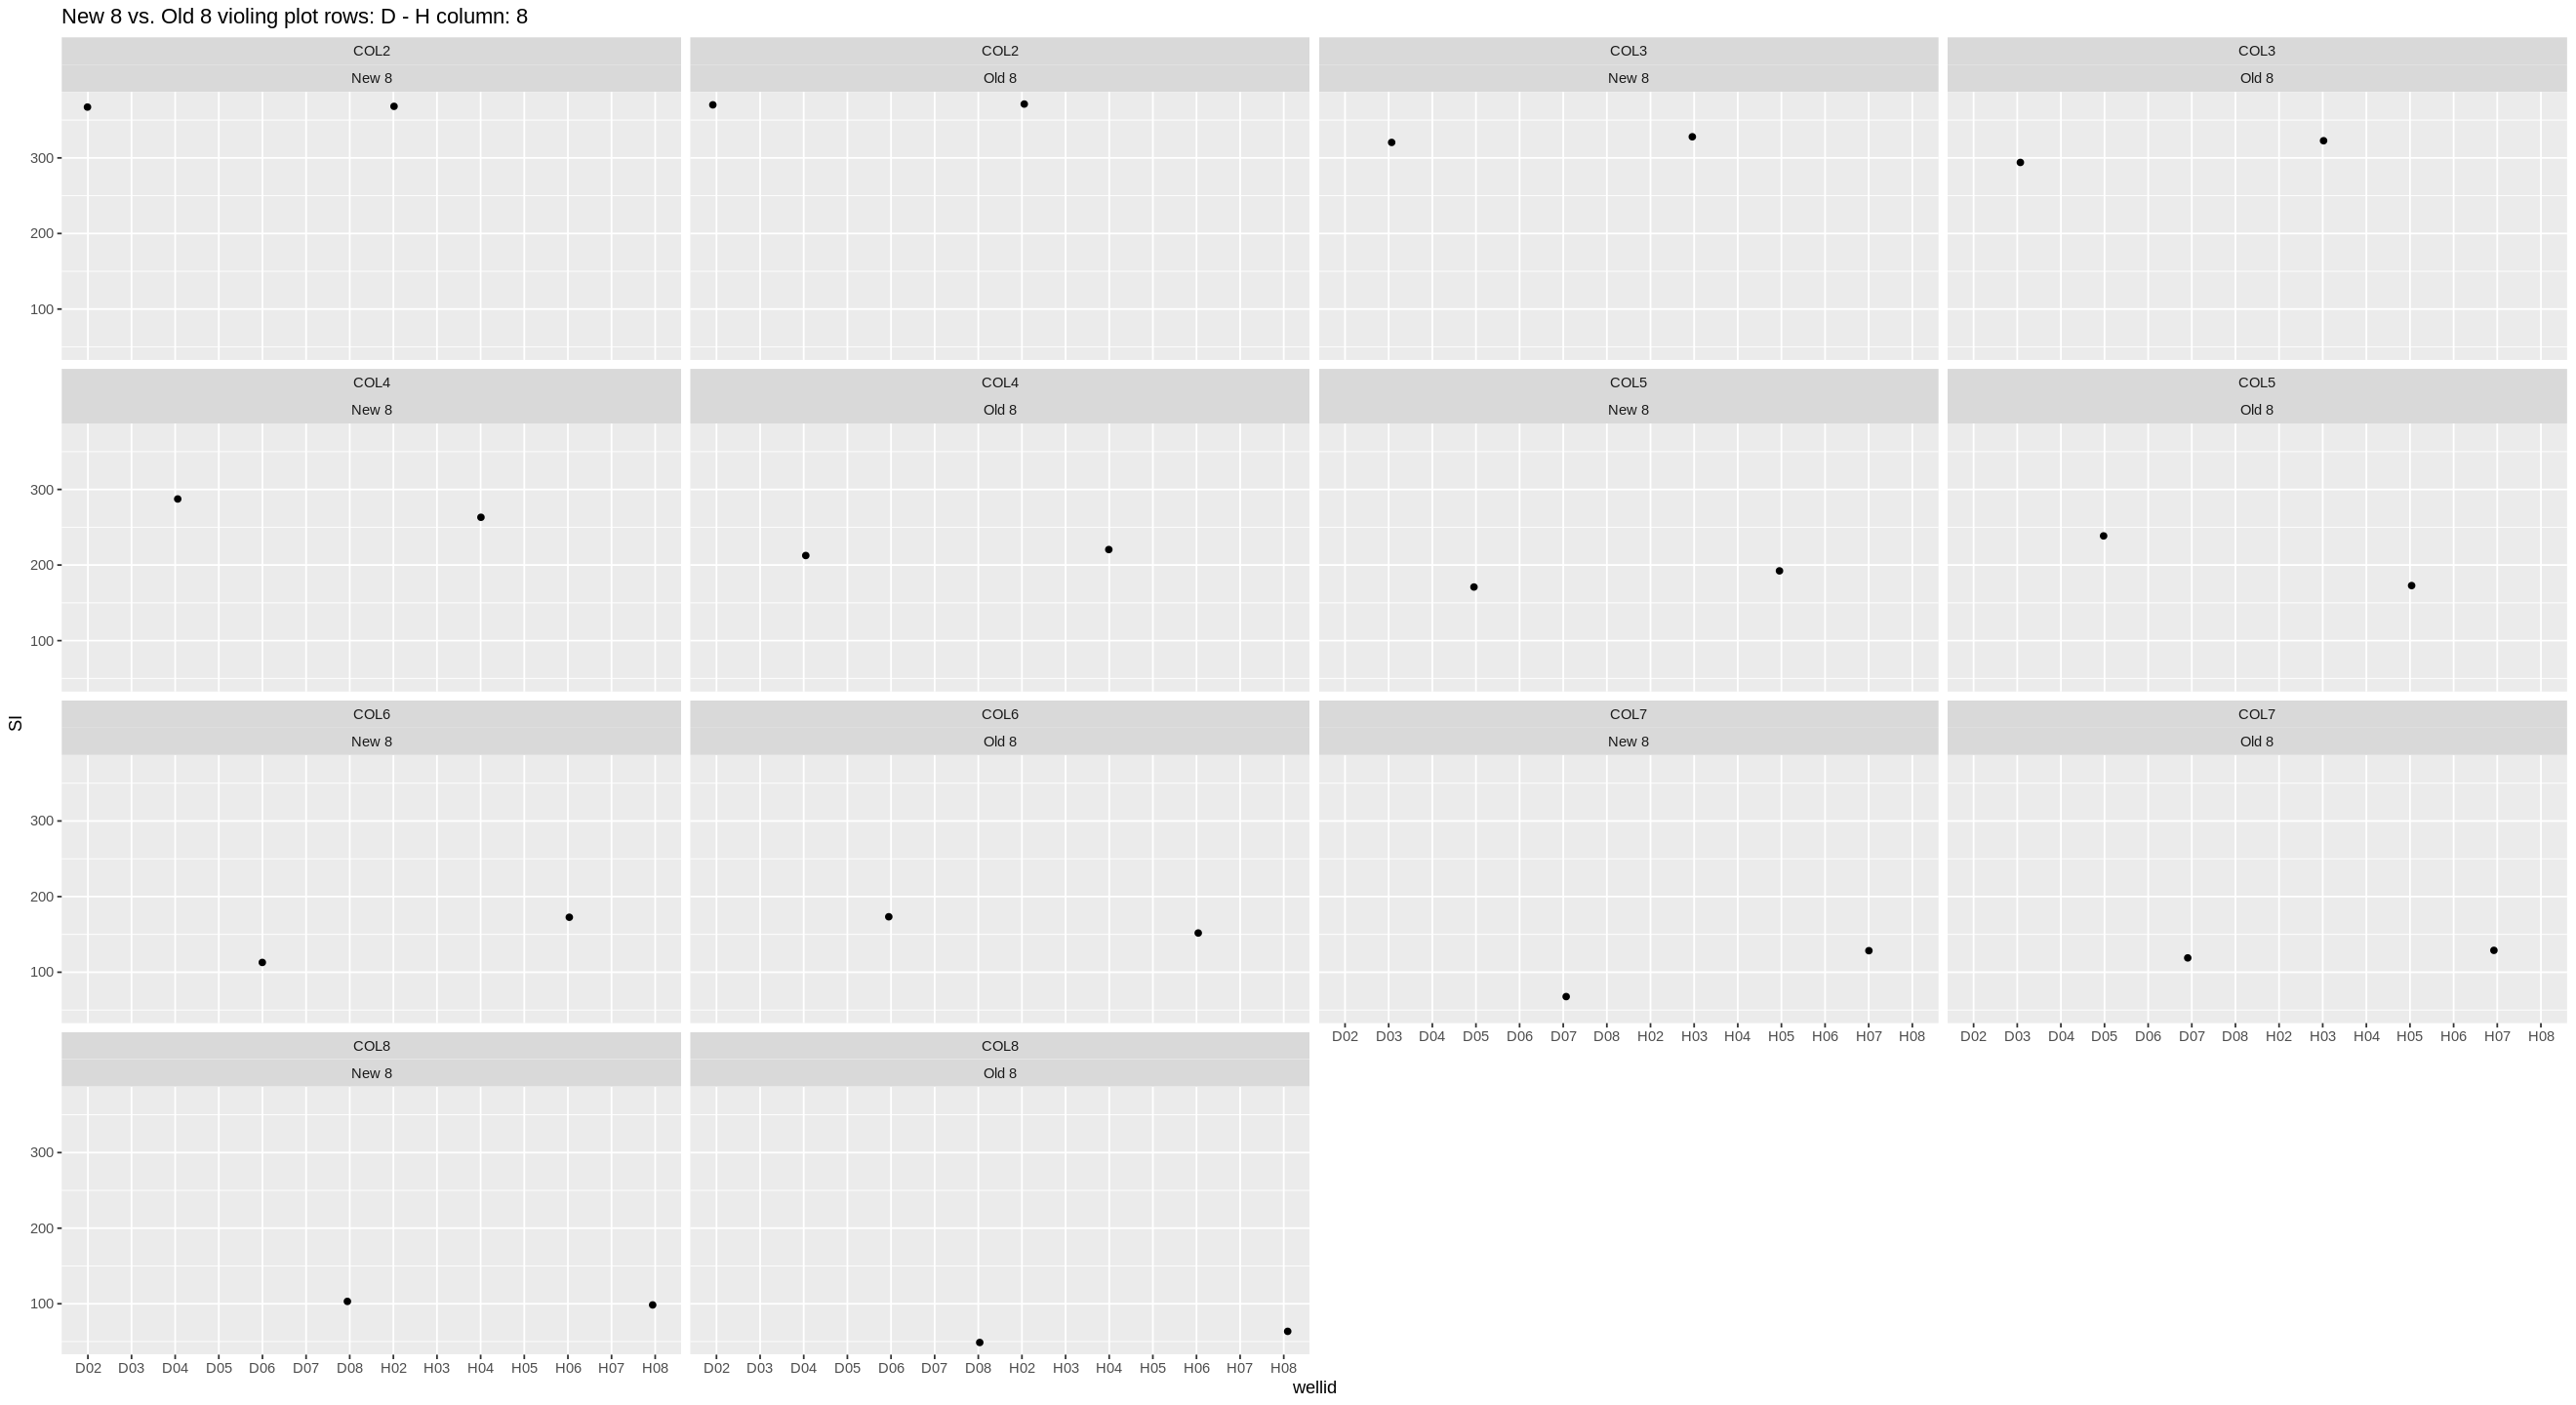

In [84]:
p_violin_si
#ggsave(filename = "violin_4rows_new8_si.png", plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

In [85]:
save_gg <- function(p, ncol, filename) {
    pp <- arrangeGrob(grobs = p, ncol=ncol)
    ggsave(filename = paste0(filename, ".png"), plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)
}

#### Violin plots
-  It is similar to a box plot, with the addition of a rotated kernel density plot on each side

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”


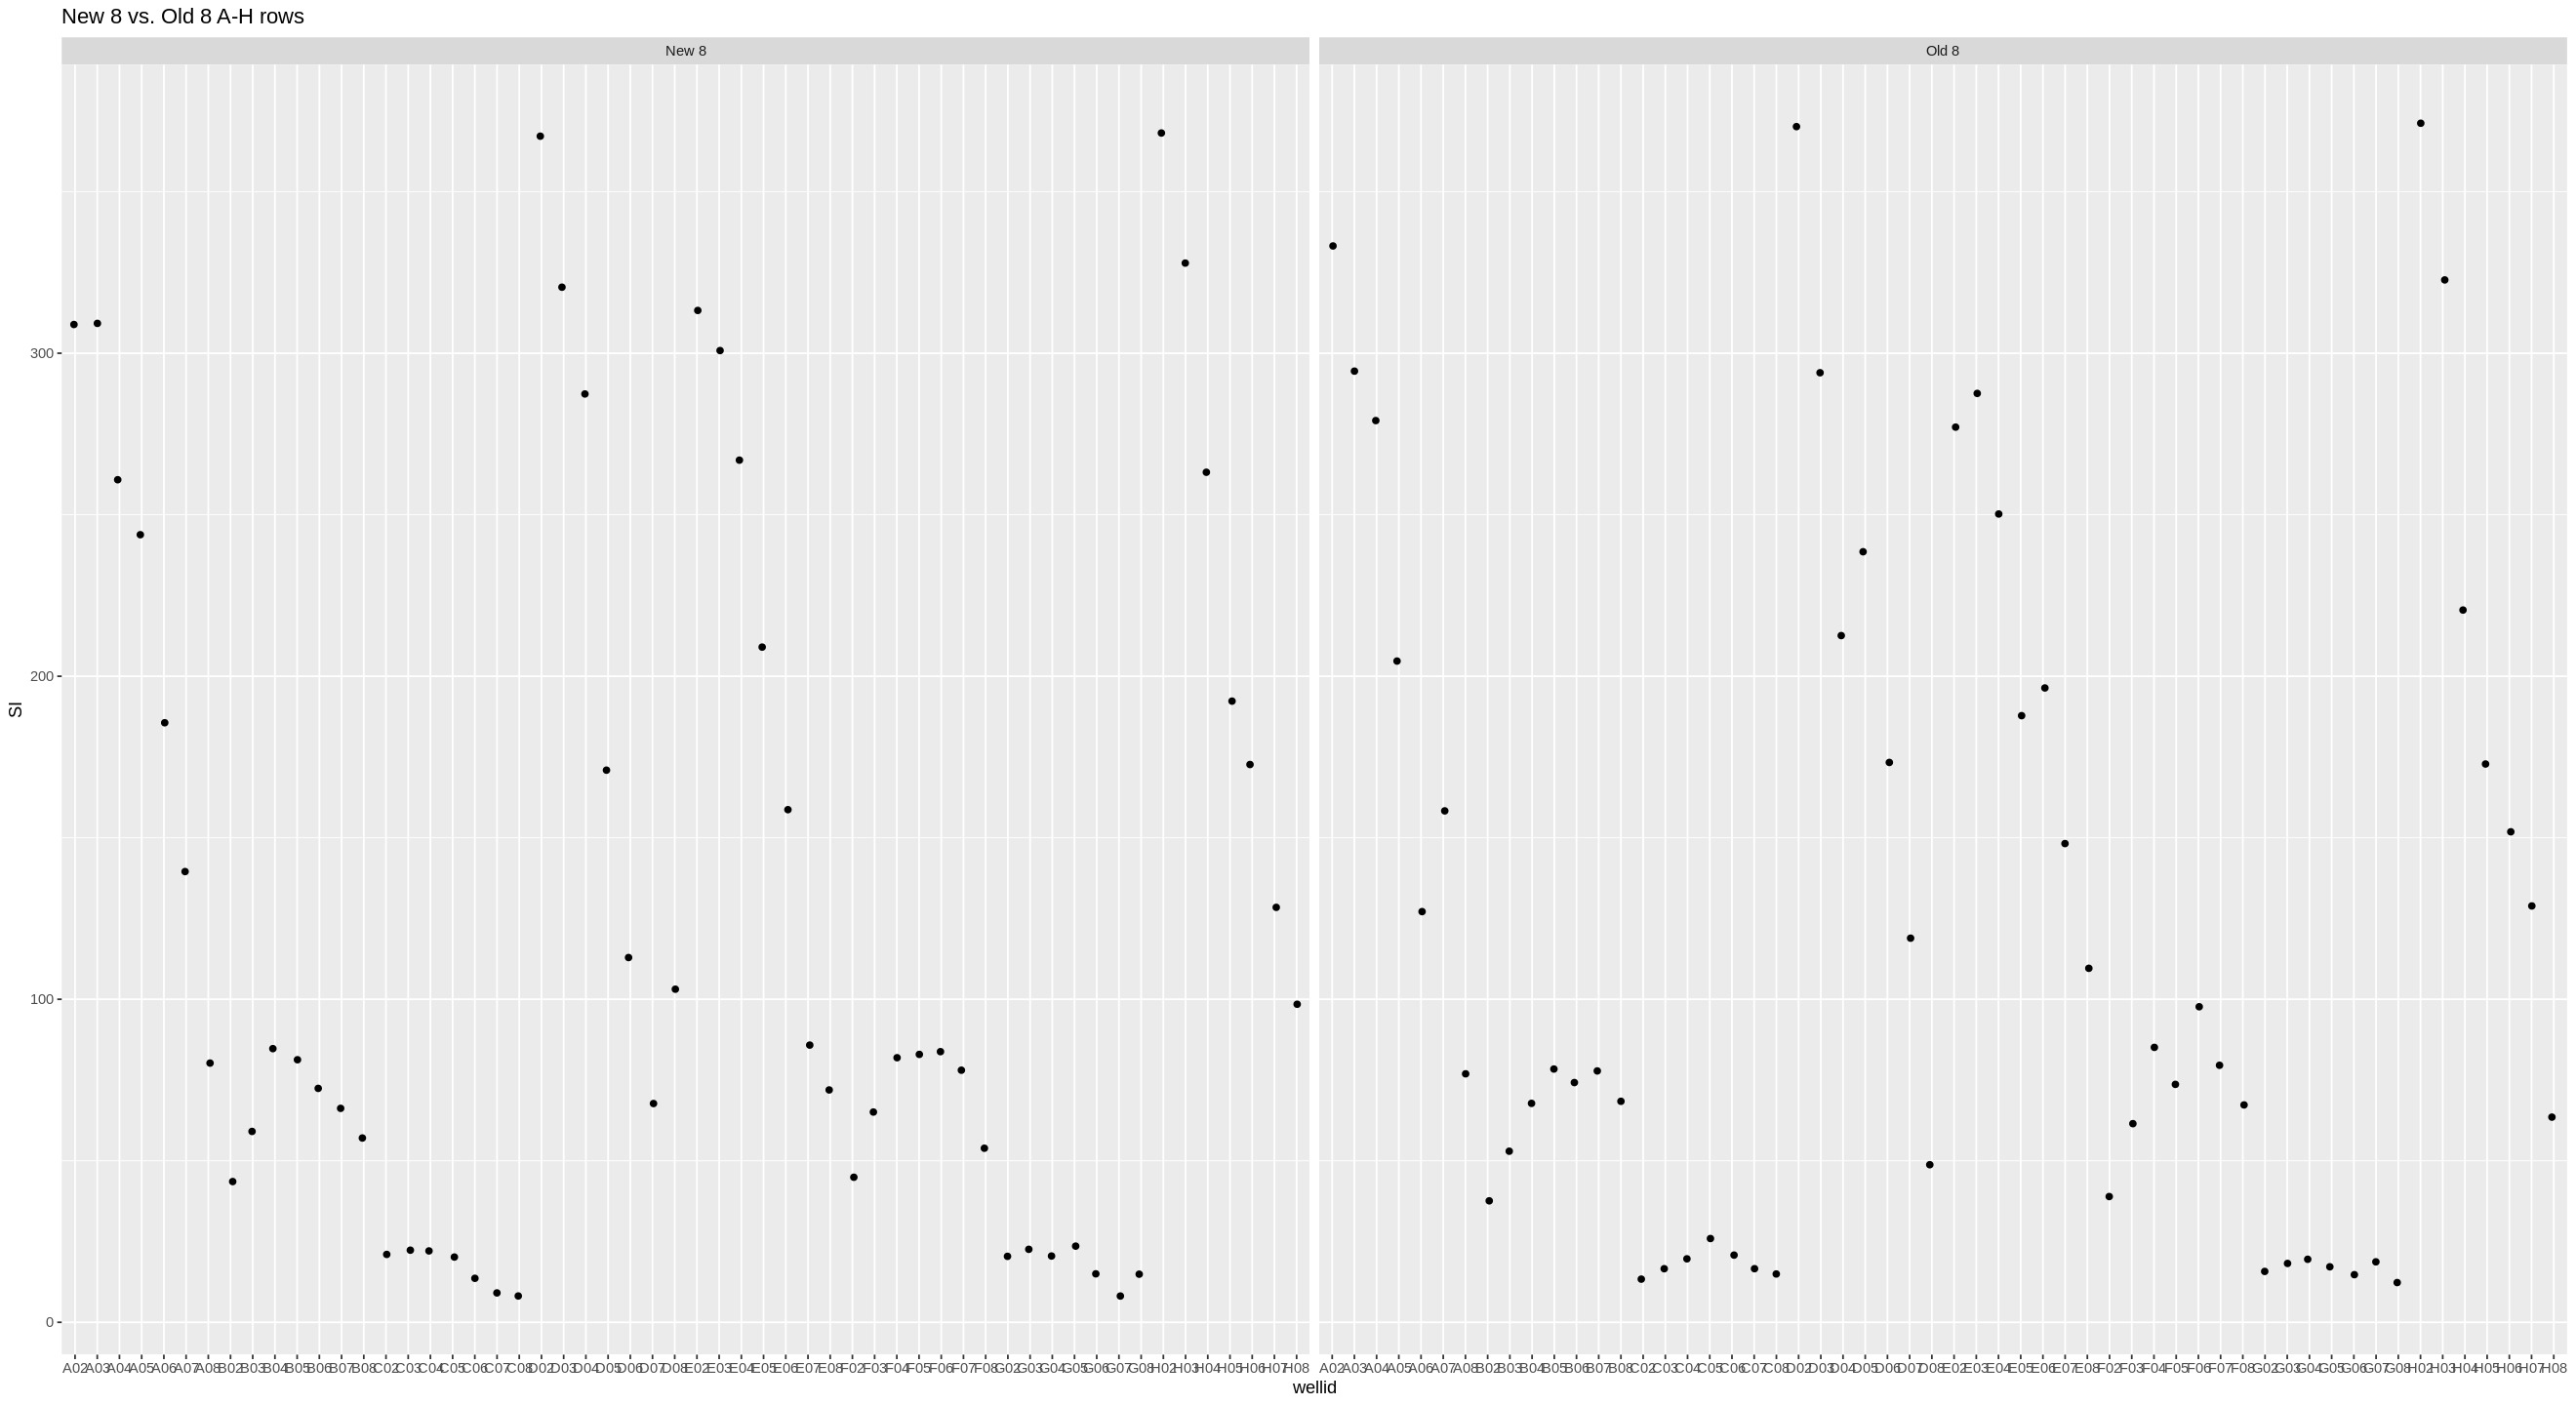

In [86]:
ggplot(dfm, aes(wellid, SI)) + 
    geom_violin(aes(colour = wellid)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 A-H rows") ) +
    facet_wrap(~ method)
#ggsave(filename = "violin_4rows_new8_si.png", plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

In [7]:
dff <- dfm %>% 
    mutate(group = case_when(
       as.numeric(substr(wellid,3,3)) == 2 ~ "COL2",
       as.numeric(substr(wellid,3,3)) == 3 ~ "COL3",
       as.numeric(substr(wellid,3,3)) == 4 ~ "COL4",
       as.numeric(substr(wellid,3,3)) == 5 ~ "COL5",
       as.numeric(substr(wellid,3,3)) == 6 ~ "COL6",
       as.numeric(substr(wellid,3,3)) == 7 ~ "COL7",
       as.numeric(substr(wellid,3,3)) == 8 ~ "COL8"
        ),
           row = case_when(
       substr(wellid, 1,1) == "A" ~ "A-E",
       substr(wellid, 1,1) == "B" ~ "B-F",
       substr(wellid, 1,1) == "C" ~ "C-G",
       substr(wellid, 1,1) == "D" ~ "D-H",
       substr(wellid, 1,1) == "E" ~ "A-E",
       substr(wellid, 1,1) == "F" ~ "B-F",
       substr(wellid, 1,1) == "G" ~ "C-G",
       substr(wellid, 1,1) == "H" ~ "D-H"
       ),
           subgroup = case_when(
       row == "A-E" & group == "COL2" ~ "A2-E2",
       row == "A-E" & group == "COL3" ~ "A3-E3",
       row == "A-E" & group == "COL4" ~ "A4-E4",
       row == "A-E" & group == "COL5" ~ "A5-E5",
       row == "A-E" & group == "COL6" ~ "A6-E6",
       row == "A-E" & group == "COL7" ~ "A7-E7",
       row == "A-E" & group == "COL8" ~ "A8-E8",
       row == "B-F" & group == "COL2" ~ "B2-F2",
       row == "B-F" & group == "COL3" ~ "B3-F3",
       row == "B-F" & group == "COL4" ~ "B4-F4",
       row == "B-F" & group == "COL5" ~ "B5-F5",
       row == "B-F" & group == "COL6" ~ "B6-F6",
       row == "B-F" & group == "COL7" ~ "B7-F7",
       row == "B-F" & group == "COL8" ~ "B8-F8",
       row == "C-G" & group == "COL2" ~ "C2-G2",
       row == "C-G" & group == "COL3" ~ "C3-G3",
       row == "C-G" & group == "COL4" ~ "C4-G4",
       row == "C-G" & group == "COL5" ~ "C5-G5",
       row == "C-G" & group == "COL6" ~ "C6-G6",
       row == "C-G" & group == "COL7" ~ "C7-G7",
       row == "C-G" & group == "COL8" ~ "C8-G8",
       row == "D-H" & group == "COL2" ~ "D2-H2",
       row == "D-H" & group == "COL3" ~ "D3-H3",
       row == "D-H" & group == "COL4" ~ "D4-H4",
       row == "D-H" & group == "COL5" ~ "D5-H5",
       row == "D-H" & group == "COL6" ~ "D6-H6",
       row == "D-H" & group == "COL7" ~ "D7-H7",
       row == "D-H" & group == "COL8" ~ "D8-H8"
           )
      )

Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”
Warning message in max(data$density):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_ydensity()`:
replacement has 1 row, data has 0”


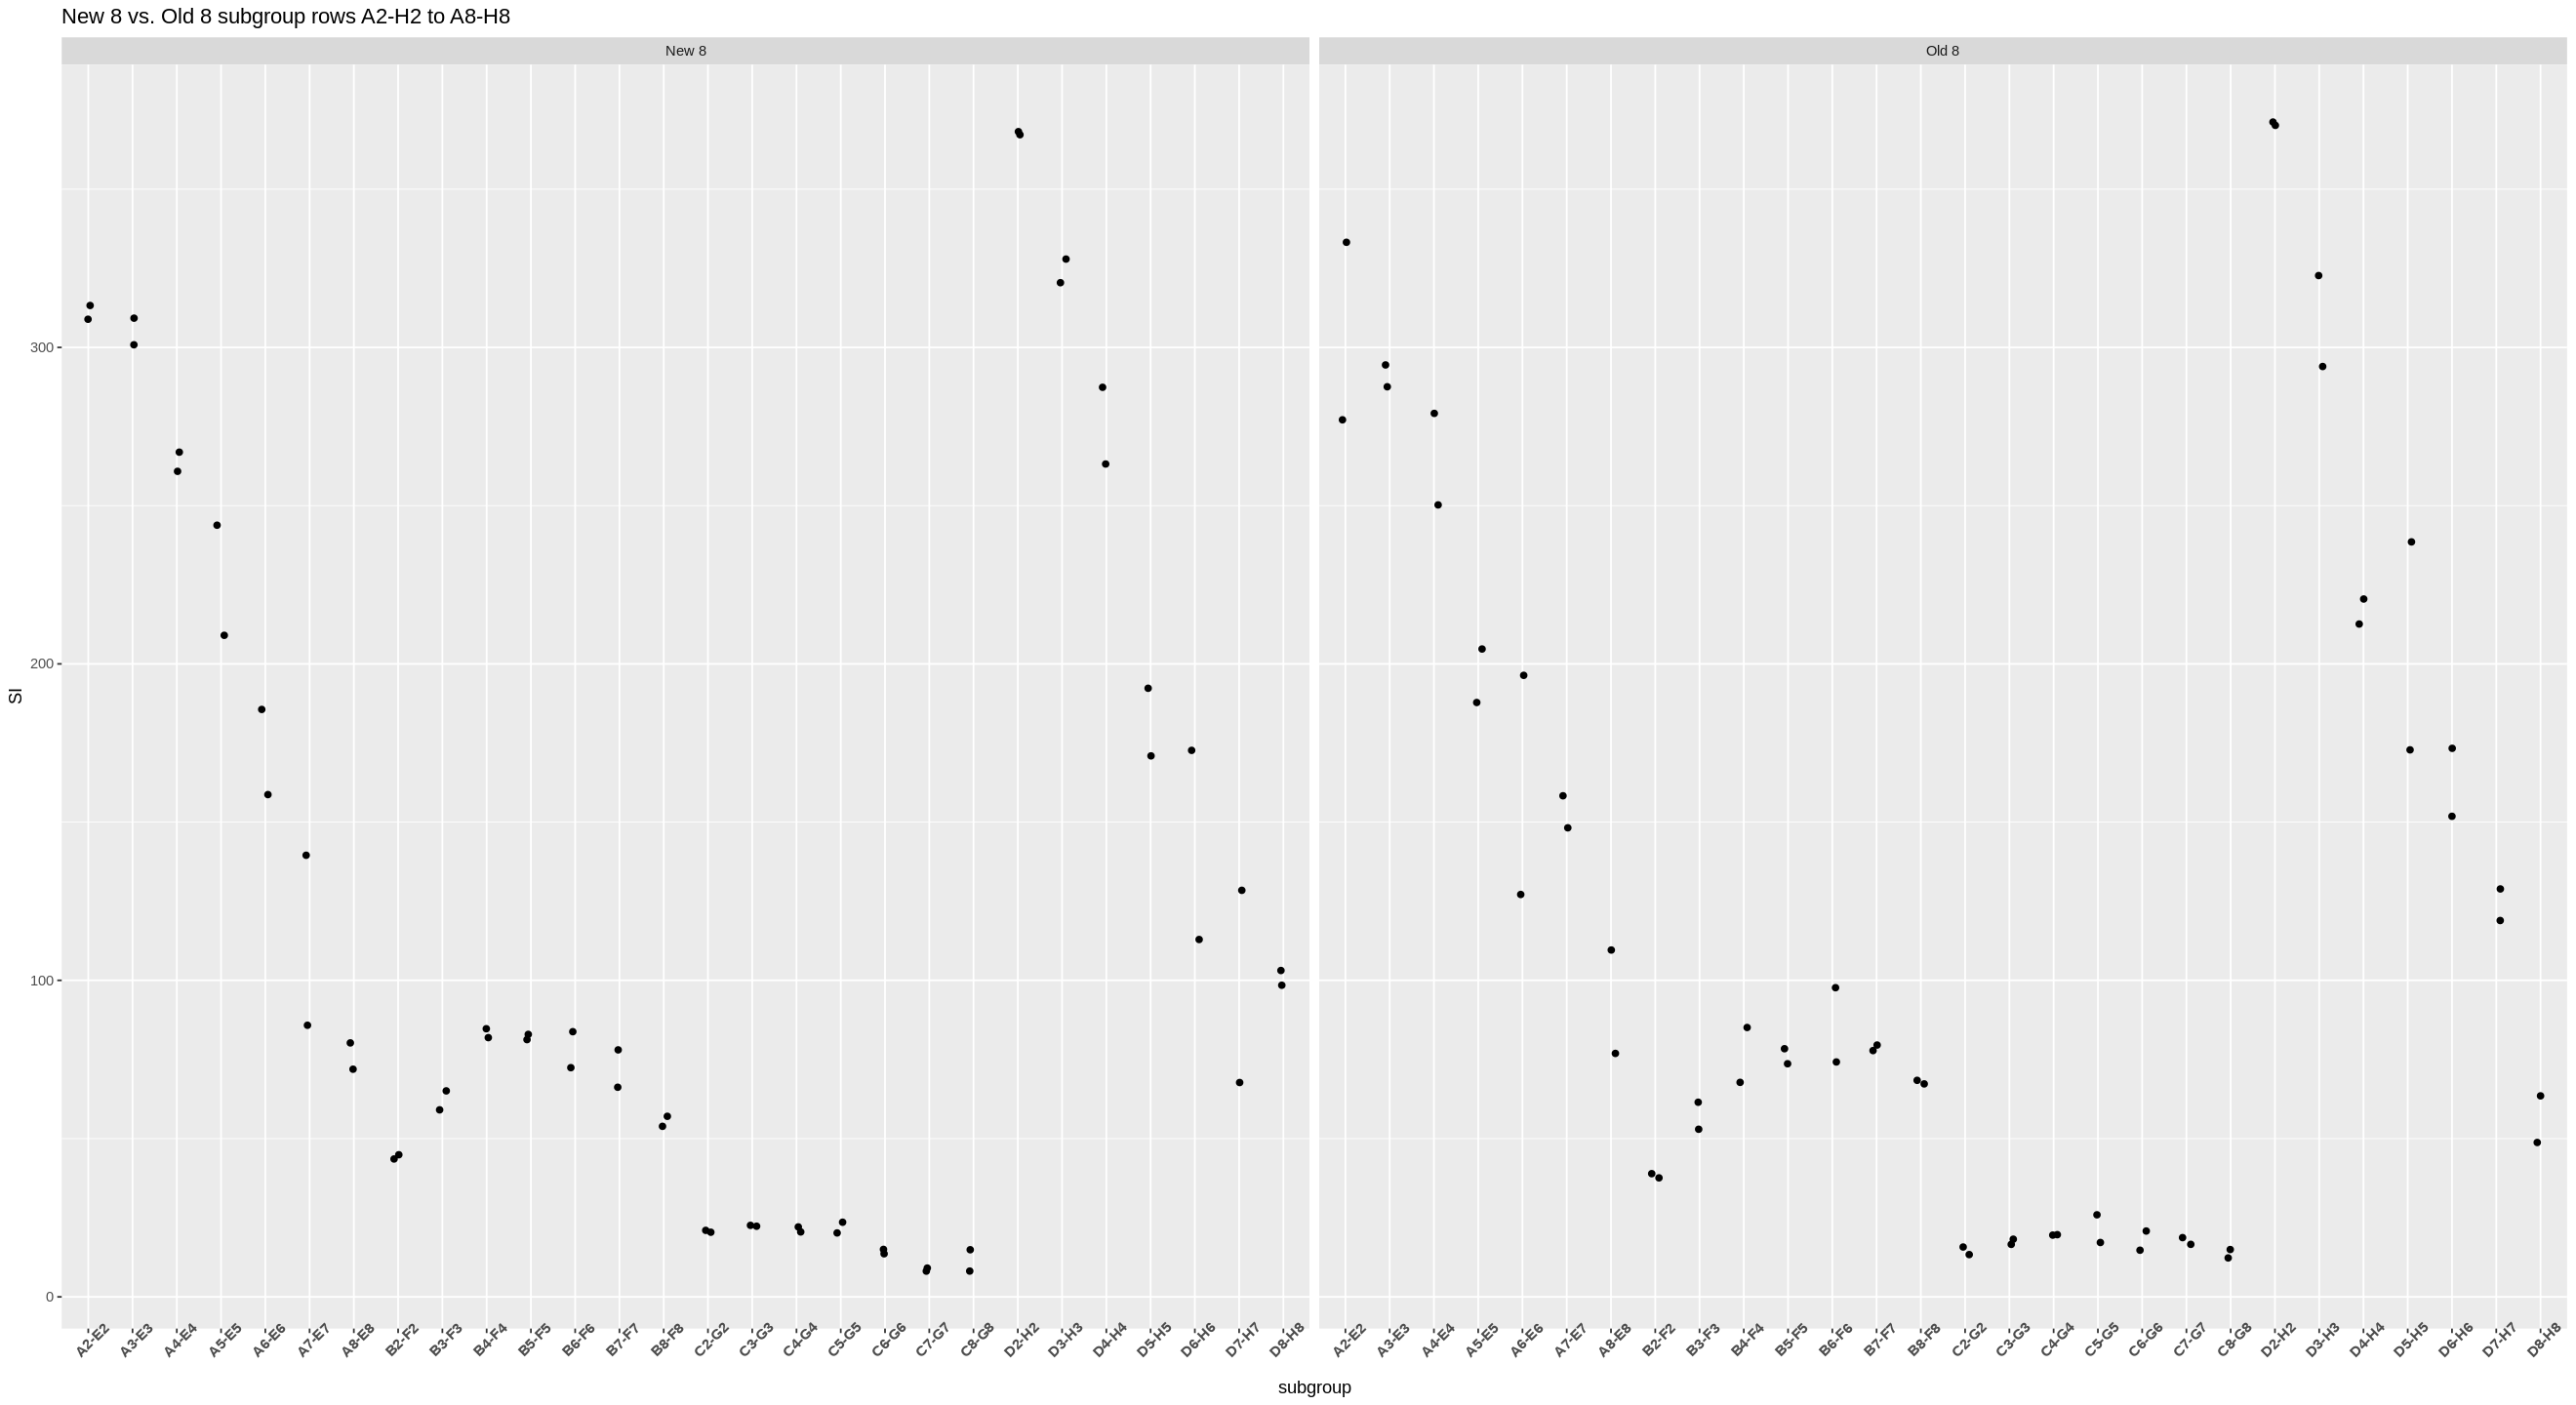

In [88]:
ggplot(dff, aes(subgroup, SI,)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 subgroup rows A2-H2 to A8-H8") ) +
    facet_wrap( ~ method) + 
    theme(axis.text.x = element_text(face = "bold", 
                           size = 8.75, angle = 45)) 

In [189]:
head(dff)

SI       SAMPLE_NAME                 wellid plate   method group row subgroup
1 308.8967 Specimen_001_A2_A02_003.fcs A02    plate 1 New 8  COL2  A-E A2-E2   
2 309.2416 Specimen_001_A3_A03_004.fcs A03    plate 1 New 8  COL3  A-E A3-E3   
3 260.8396 Specimen_001_A4_A04_005.fcs A04    plate 1 New 8  COL4  A-E A4-E4   
4 243.8216 Specimen_001_A5_A05_006.fcs A05    plate 1 New 8  COL5  A-E A5-E5   
5 185.6048 Specimen_001_A6_A06_007.fcs A06    plate 1 New 8  COL6  A-E A6-E6   
6 139.5327 Specimen_001_A7_A07_008.fcs A07    plate 1 New 8  COL7  A-E A7-E7

In [195]:
dff %>% filter(group=="COL2" & row == "A-E")

SI       SAMPLE_NAME                 wellid plate   method group row subgroup
1 308.8967 Specimen_001_A2_A02_003.fcs A02    plate 1 New 8  COL2  A-E A2-E2   
2 313.2471 Specimen_001_E2_E02_051.fcs E02    plate 1 New 8  COL2  A-E A2-E2   
3 333.2169 Specimen_001_A2_A02_002.fcs A02    plate 1 Old 8  COL2  A-E A2-E2   
4 277.1229 Specimen_001_E2_E02_050.fcs E02    plate 1 Old 8  COL2  A-E A2-E2

### simple stats

In [18]:
# old 8 vs new 8 (change j from 1-4)
j = 1
reagents <- c("BV-421","BUV-395","BB-515","PE")
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- setNames(data.frame(matrix(ncol = 8, nrow = 0)), c("MEAN.O", "SD.O", "MIN.O", "MAX.O", "MEAN.N", "SD.N", "MIN.N", "MAX.N"))

print(paste(pat1, "-", pat2, "old vs. new" ))
for (i in seq(2,8)) {
    print(paste0(pat1, i," - ", pat2, i ))
    dfn<- dfm %>% 
        filter((wellid == paste0(pat1,"0",i) | wellid == paste0(pat2,"0",i)) & method == "New 8")
    dfo<- dfm %>% 
        filter((wellid == paste0(pat1,"0",i) | wellid == paste0(pat2,"0",i)) & method == "Old 8")
    df_stats[i-1, "MEAN.O"] = formatC(mean(dfo$SI), format = "e", digits = 2)
    df_stats[i-1, "MEAN.N"] = formatC(mean(dfn$SI), format = "e", digits = 2)
    df_stats[i-1, "MIN.O"] = formatC(min(dfo$SI), format = "e", digits = 2)
    df_stats[i-1, "MIN.N"] = formatC(min(dfn$SI), format = "e", digits = 2)
    df_stats[i-1, "MAX.O"] = formatC(max(dfo$SI), format = "e", digits = 2)
    df_stats[i-1, "MAX.N"] = formatC(max(dfn$SI), format = "e", digits = 2)
    df_stats[i-1, "SD.O"] = formatC(sd(dfo$SI), format = "e", digits = 2)
    df_stats[i-1, "SD.N"] = formatC(sd(dfn$SI), format = "e", digits = 2)
    pctdiff = (abs(as.numeric(df_stats[i-1, "MEAN.O"]) - as.numeric(df_stats[i-1,"MEAN.N"])))/mean(as.numeric(df_stats[i-1, "MEAN.O"]), as.numeric(df_stats[i-1, "MEAN.N"]))/2
    print(pctdiff)
    df_stats[i-1, "PCT.DIFF"] = paste0(round(pctdiff*100,2), "%")
    df_stats[i-1, "CV.O"] = formatC(as.numeric(df_stats[i-1,"SD.O"])/as.numeric(df_stats[i-1, "MEAN.O"]), format = "e", digits = 2)
    df_stats[i-1, "CV.N"] = formatC(as.numeric(df_stats[i-1,"SD.N"])/as.numeric(df_stats[i-1, "MEAN.N"]), format = "e", digits = 2)
    df_stats[i-1, "ROW.GROUP"] = paste0(pat1,i,"-",pat2,i)
    df_stats[i-1, "REAGENT"] = reagents[j]
}
write.csv(df_stats, paste0("8v8_stats3_si_1plt_", pat1, pat2,".csv"), row.names = FALSE)

[1] "A - E old vs. new"
[1] "A2 - E2"
[1] 0.009836066
[1] "A3 - E3"
[1] 0.02405498
[1] "A4 - E4"
[1] 0.001886792
[1] "A5 - E5"
[1] 0.07653061
[1] "A6 - E6"
[1] 0.0308642
[1] "A7 - E7"
[1] 0.130719
[1] "A8 - E8"
[1] 0.09217578


### ANOVA

In [198]:
# A-E
j = 1
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame() 

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% 
            filter( group == paste0("COL", i) & row == paste0(pat1,"-",pat2) )
    
    res.aov <- aov(SI ~ wellid, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$wellid[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$SI, df.t$wellid,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_anova_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: A - E"
[1] "A / E : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1  669.4   669.4   1.412  0.357
Residuals    2  948.2   474.1               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
             diff       lwr      upr    p adj
E02-A02 -25.87181 -119.4772 67.73355 0.356704

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$SI and df.t$wellid 

    A02 
E02 0.36

P value adjustment method: BH 
[1] "A / E : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1  58.61   58.61   0.594  0.521
Residuals    2 197.23   98.61               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
             diff       lwr      upr     p adj


In [199]:
# B-F
j = 2
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame() 

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% 
            filter( group == paste0("COL", i) & row == paste0(pat1,"-",pat2) )
    
    res.aov <- aov(SI ~ wellid, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$wellid[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$SI, df.t$wellid,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_anova_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: B - F"
[1] "B / F : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1   1.78   1.777     0.1  0.782
Residuals    2  35.65  17.825               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
            diff       lwr      upr     p adj
F02-B02 1.333045 -16.81705 19.48314 0.7820973

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$SI and df.t$wellid 

    B02 
F02 0.78

P value adjustment method: BH 
[1] "B / F : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1  52.77   52.77   4.182  0.178
Residuals    2  25.24   12.62               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
            diff       lwr      upr     p adj
F

In [200]:
# C-G
j = 3
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame() 

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% 
            filter( group == paste0("COL", i) & row == paste0(pat1,"-",pat2) )
    
    res.aov <- aov(SI ~ wellid, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$wellid[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$SI, df.t$wellid,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_anova_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: C - G"
[1] "C / G : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1   0.81   0.806    0.04   0.86
Residuals    2  40.20  20.099               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
             diff       lwr      upr     p adj
G02-C02 0.8979072 -18.37503 20.17084 0.8597734

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$SI and df.t$wellid 

    C02 
G02 0.86

P value adjustment method: BH 
[1] "C / G : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1  0.908   0.908    0.07  0.816
Residuals    2 26.028  13.014               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
             diff       lwr      upr     p ad

In [201]:
# D-H
j = 4
pat1 <- rows[[j]][1]
pat2 <- rows[[j]][2]
df_stats <- data.frame() 

print(paste("ANOVA 8 rows:", pat1, "-", pat2))

for (i in seq(2,8)) {
    print(paste(pat1,"/",pat2, ":", i))
    df.t <- dff %>% 
            filter( group == paste0("COL", i) & row == paste0(pat1,"-",pat2) )
    
    res.aov <- aov(SI ~ wellid, data = df.t)
    stat <- summary(res.aov)
    df_stats[i-1, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
    print(stat)
    print("Tukey")
    print(paste0(rep("-", 25), collapse=""))
    stat <- TukeyHSD(res.aov)
    df_stats[i-1, "TUKEY"] = formatC(stat$wellid[4], format = "e", digits = 2)
    print(stat)
    print("Pairwise")
    print(paste0(rep("-", 25), collapse=""))
    stat <- pairwise.t.test(df.t$SI, df.t$wellid,
                 p.adjust.method = "BH")
    df_stats[i-1, "PAIRWISE"] = formatC(stat$p.value[[1]], format = "e", digits = 2)
    print(stat)
}

write.csv(df_stats, paste0("8v8_stats2_anova_SI_", pat1, pat2,".csv"), row.names = FALSE)

[1] "ANOVA 8 rows: D - H"
[1] "D / H : 2"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1  1.024   1.024   0.228   0.68
Residuals    2  8.962   4.481               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
            diff       lwr      upr     p adj
H02-D02 1.011715 -8.088717 10.11215 0.6798357

[1] "Pairwise"
[1] "-------------------------"

	Pairwise comparisons using t tests with pooled SD 

data:  df.t$SI and df.t$wellid 

    D02 
H02 0.68

P value adjustment method: BH 
[1] "D / H : 3"
            Df Sum Sq Mean Sq F value Pr(>F)
wellid       1  327.5   327.5   1.798  0.312
Residuals    2  364.2   182.1               
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = SI ~ wellid, data = df.t)

$wellid
            diff       lwr      upr     p adj
H

### Find Outliers using Tietjen Moore Test
- detect multiple outliers in a univariate data set that follows an approximately normal distribution
- If there are no outliers in the data, the test statistic is close to 1. If there are outliers in the data, the test statistic will be closer to zero

In [89]:
# A-E new 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("A", i, "-E", i) & method == "New 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [90]:
# B-F new 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("B", i, "-F", i) & method == "New 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [91]:
# C-G new 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("C", i, "-G", i) & method == "New 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [92]:
# D-H new 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("D", i, "-H", i) & method == "New 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [93]:
# A-E old 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("A", i, "-E", i) & method == "Old 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [94]:
# B-F old 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("B", i, "-F", i) & method == "Old 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [95]:
# C-G old 
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("C", i, "-G", i) & method == "Old 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



In [96]:
# D-H Old  
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("D", i, "-H", i) & method == "Old 8") %>% select(SI) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 

$T
[1] 0

$Talpha
5% 
 0 



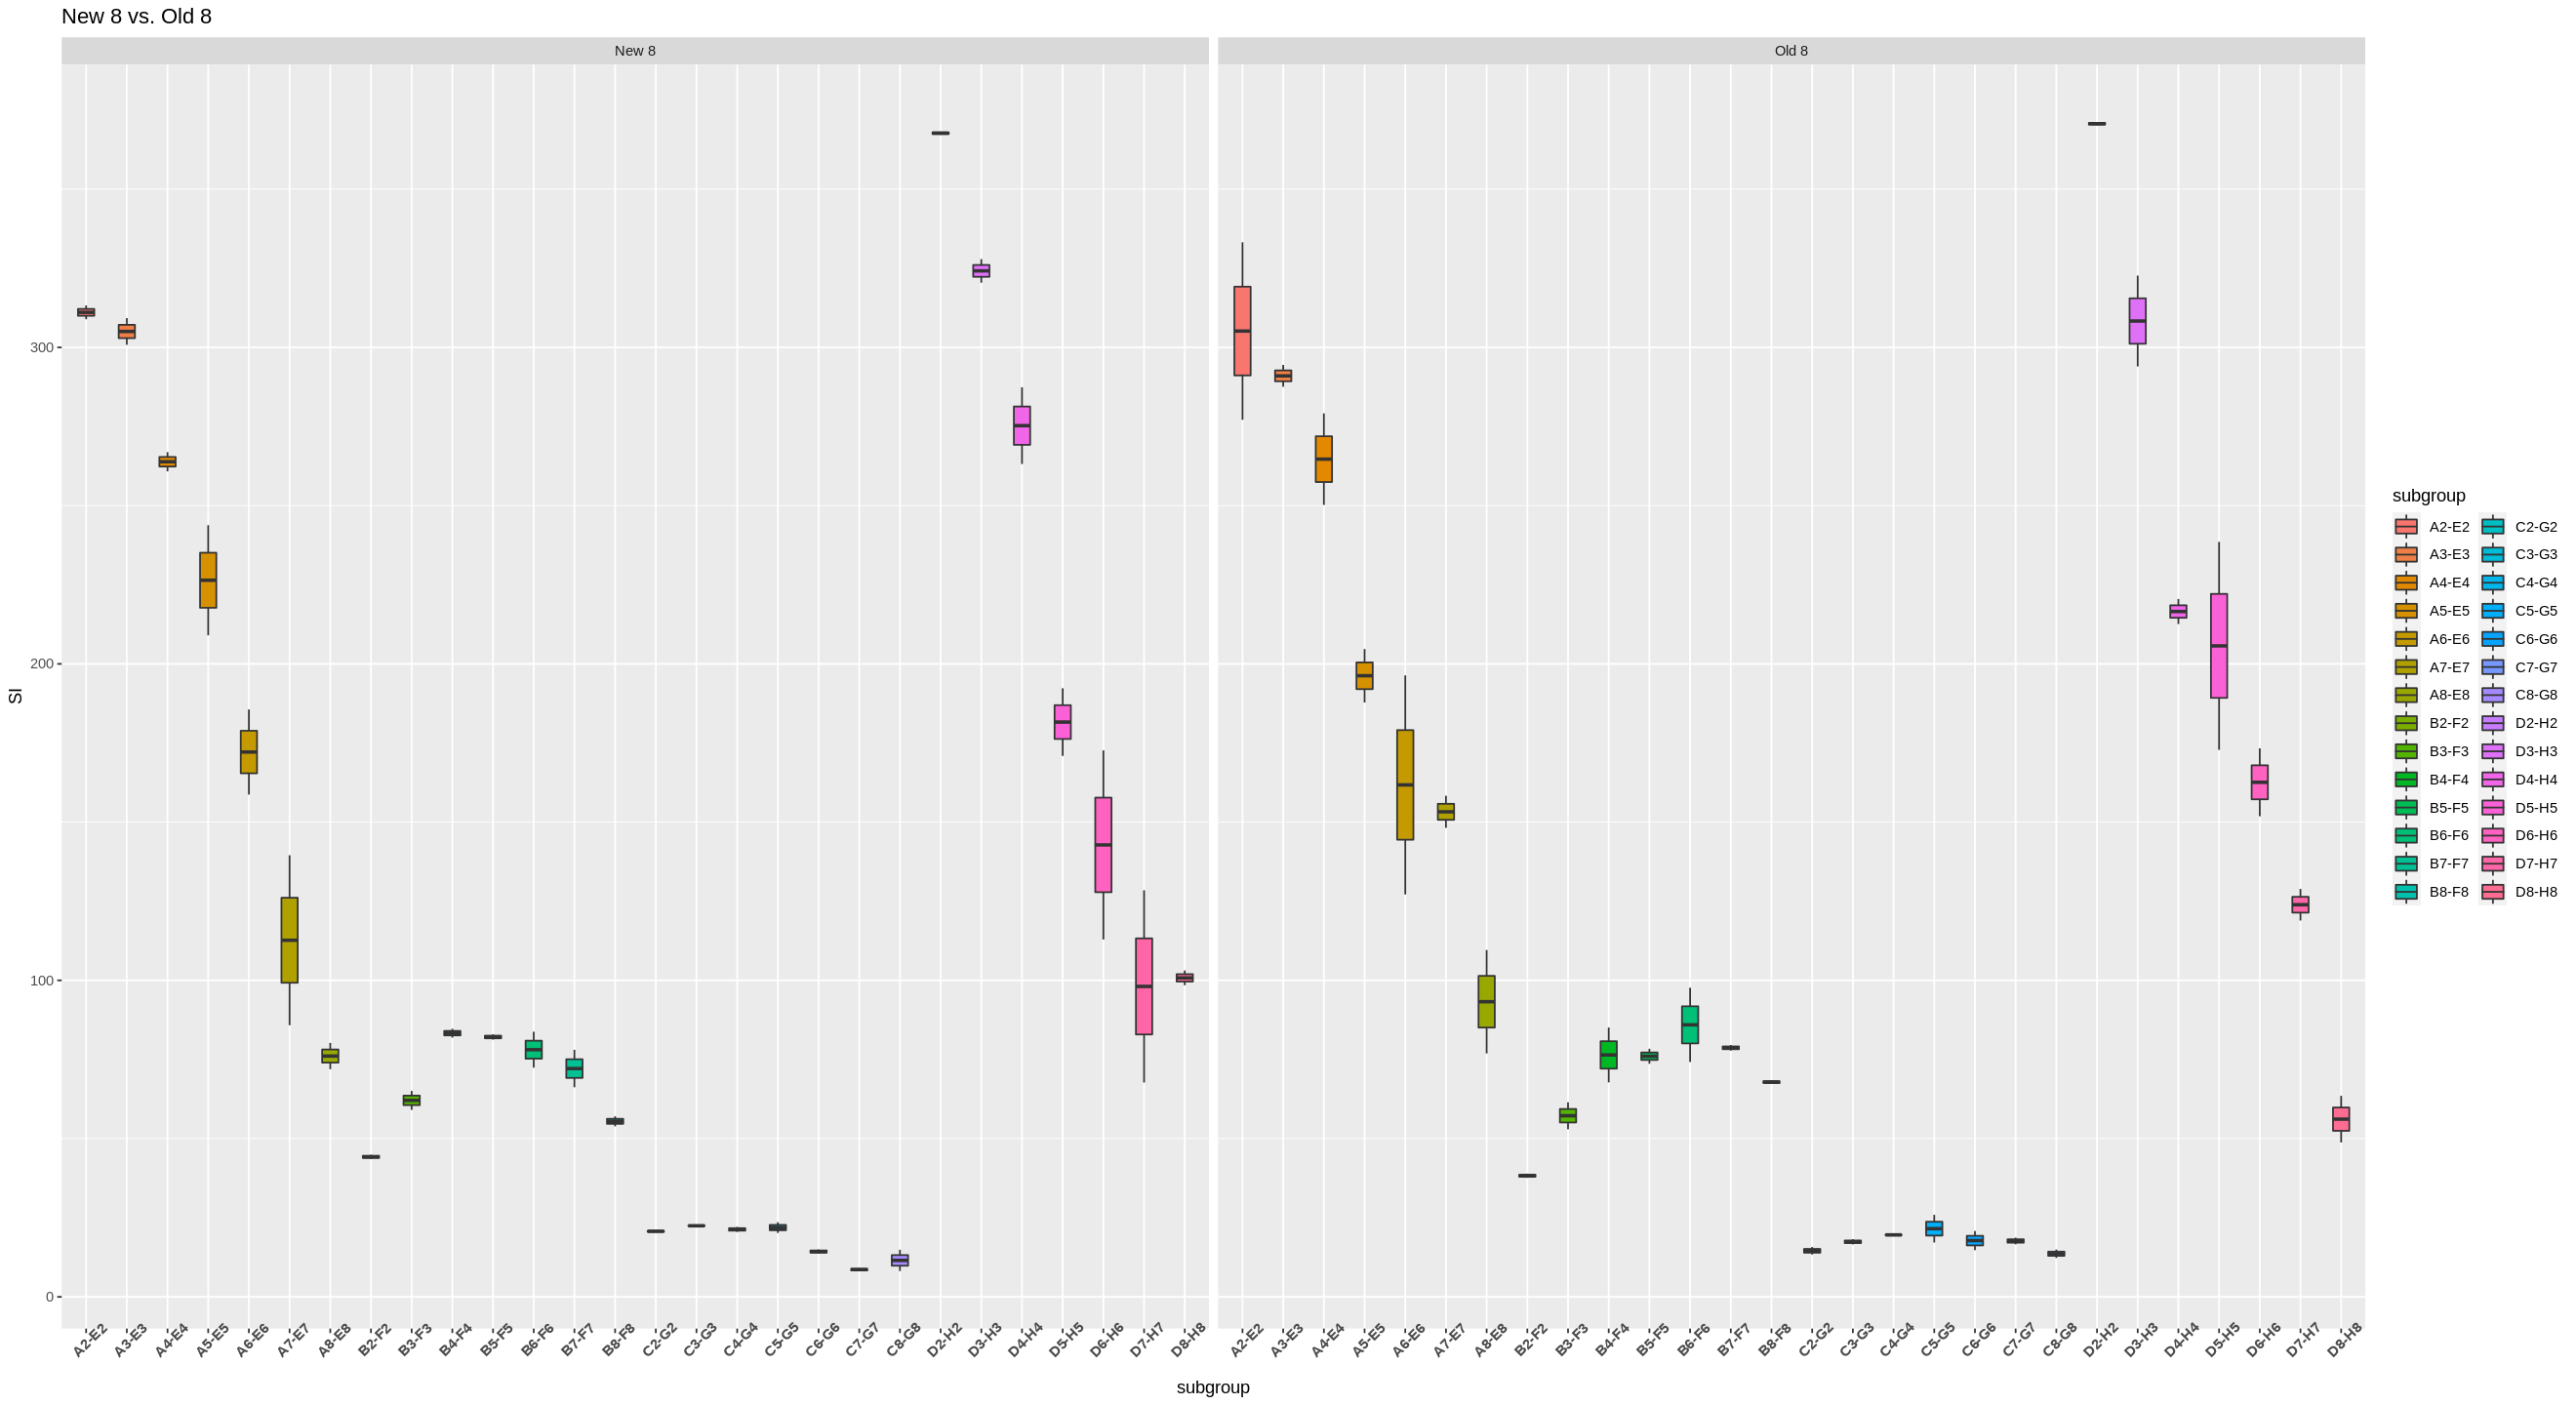

In [97]:
ggplot(dff, aes(subgroup, SI, fill=subgroup)) +
    geom_boxplot(width = 0.4) + 
#    stat_summary(geom="text", fun=quantile,
#           aes(label=sprintf("%1.1f", ..y..), color=subgroup),
#           position=position_nudge(x=0.4), size=3.25) +
    ggtitle("New 8 vs. Old 8") + 
    facet_wrap( ~ method) +
    theme(axis.text.x = element_text(face = "bold", 
                           size = 8.75, angle = 45)) 
#ggsave(filename = "boxplt_new8_si.png", plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

In [98]:
# linear regression 
dfn <- dff %>% filter(method == "New 8")
dfo <- dff %>% filter(method == "Old 8")
dfm <- inner_join(x = dfn, y = dfo, by = "wellid")
reg <- lm(SI.y~SI.x,data=dfm) 
dfm <- dfm %>% mutate(regline = reg[[1]][2]*SI.x + reg[[1]][1])
summary(reg)


Call:
lm(formula = SI.y ~ SI.x, data = dfm)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.598 -11.243  -4.586   9.271  72.104 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.84002    5.42275   1.261    0.213    
SI.x         0.93373    0.03233  28.879   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.51 on 54 degrees of freedom
Multiple R-squared:  0.9392,	Adjusted R-squared:  0.9381 
F-statistic:   834 on 1 and 54 DF,  p-value: < 2.2e-16


In [161]:
head(dfm)

SI.x     SAMPLE_NAME.x               wellid plate.x method.x group.x row.x
1 308.8967 Specimen_001_A2_A02_003.fcs A02    plate 1 New 8    COL2    A-E  
2 309.2416 Specimen_001_A3_A03_004.fcs A03    plate 1 New 8    COL3    A-E  
3 260.8396 Specimen_001_A4_A04_005.fcs A04    plate 1 New 8    COL4    A-E  
4 243.8216 Specimen_001_A5_A05_006.fcs A05    plate 1 New 8    COL5    A-E  
5 185.6048 Specimen_001_A6_A06_007.fcs A06    plate 1 New 8    COL6    A-E  
6 139.5327 Specimen_001_A7_A07_008.fcs A07    plate 1 New 8    COL7    A-E  
  subgroup.x SI.y     SAMPLE_NAME.y               plate.y method.y group.y
1 A2-E2      333.2169 Specimen_001_A2_A02_002.fcs plate 1 Old 8    COL2   
2 A3-E3      294.4616 Specimen_001_A3_A03_003.fcs plate 1 Old 8    COL3   
3 A4-E4      279.1553 Specimen_001_A4_A04_004.fcs plate 1 Old 8    COL4   
4 A5-E5      204.7023 Specimen_001_A5_A05_005.fcs plate 1 Old 8    COL5   
5 A6-E6      127.1381 Specimen_001_A6_A06_006.fcs plate 1 Old 8    COL6   
6 A7-E7      158.3221 Specimen_001_A7_A07_007.fcs plate 1 Old 8    COL7   
  row.y subgroup.y regline 
1 A-E   A2-E2      295.2674
2 A-E   A3-E3      295.5894
3 A-E   A4-E4      250.3948
4 A-E   A5-E5      234.5045
5 A-E   A6-E6      180.1455
6 A-E   A7-E7      137.1264

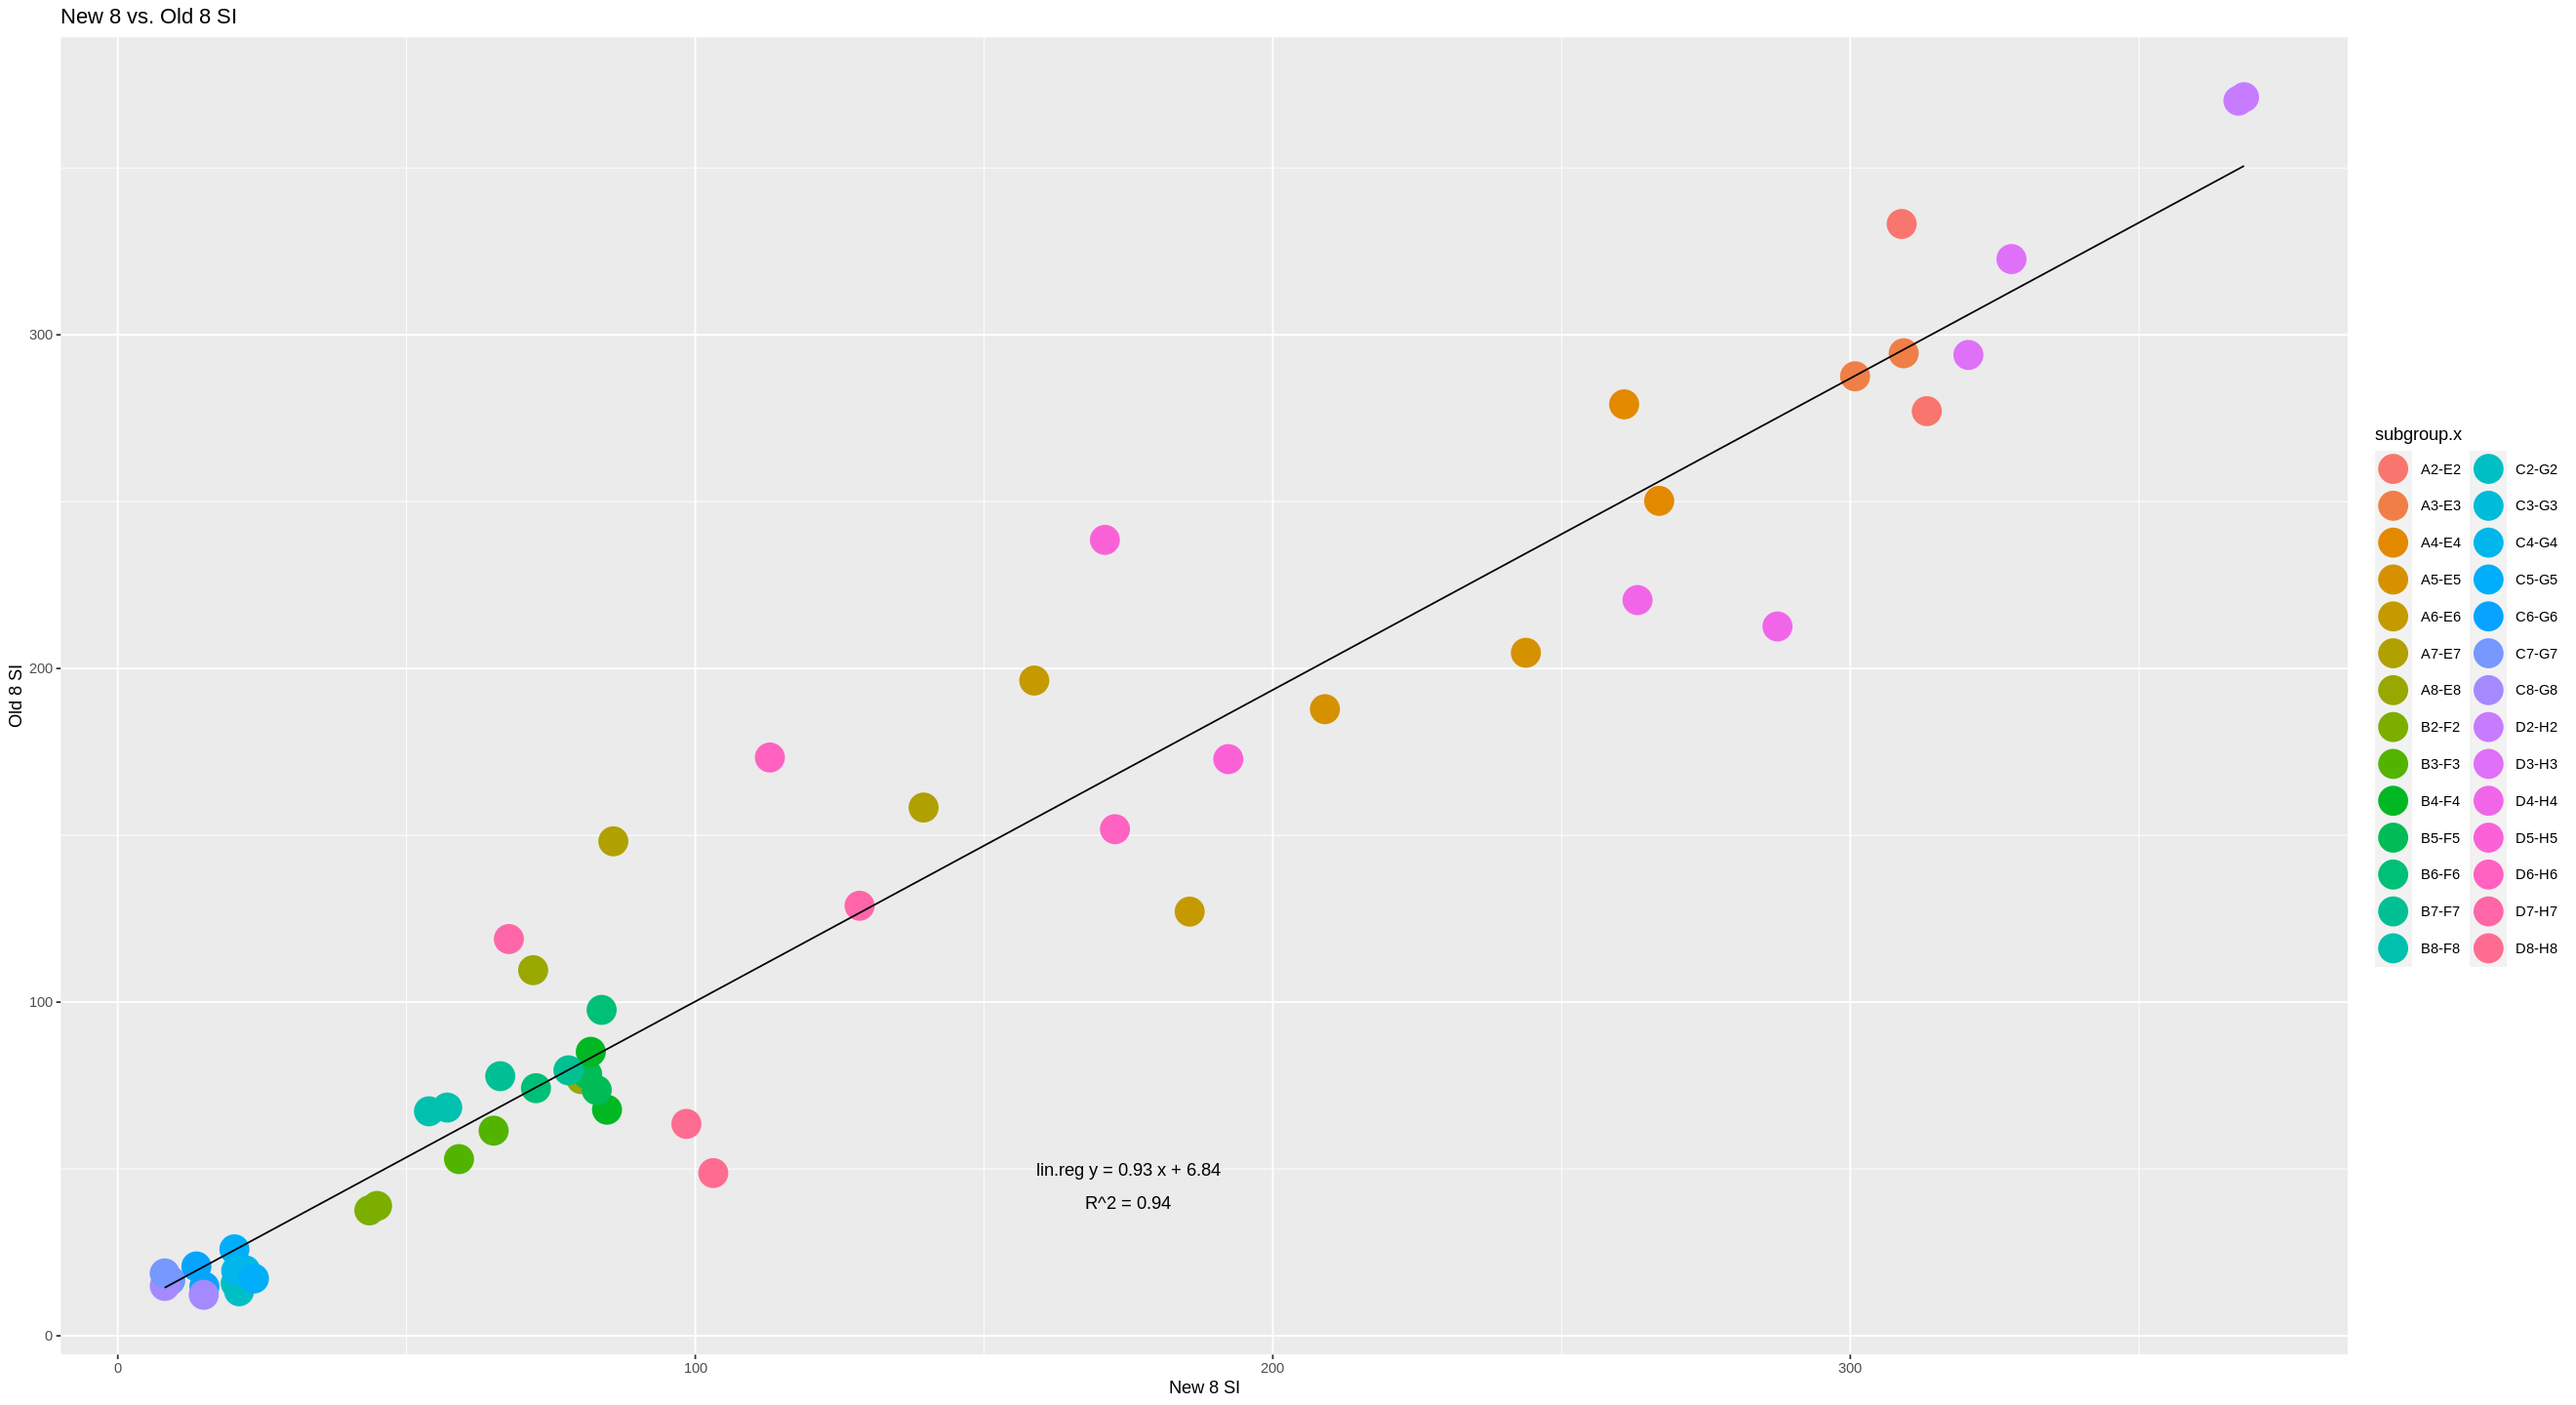

In [104]:
ggplot(dfm) + 
    geom_point(size = 8, aes(x = SI.x, 
                   y = SI.y, 
                   color=subgroup.x)) + 
    geom_line(aes(x = SI.x, 
                  y = regline)) + 
    ggtitle("New 8 vs. Old 8 SI") + 
    xlab("New 8 SI") + 
    ylab("Old 8 SI") + 
    annotate("text", 
             x = 175, 
             y = 50, 
             label = paste("lin.reg y =", round(reg[[1]][2],2), "x +", 
                           round(reg[[1]][1],2))) + 
    annotate("text",
             x = 175,
             y = 40,
             label = paste("R^2 =", round(summary(reg)$`r.squared`, 2)))


### XmR charts to show data series

In [14]:
row_pair_ls <- list()
for (i in seq(4)) {
    row_pair_ls[[i]] <- c(wellIDs[, rows[[i]][1]], wellIDs[, rows[[i]][2]])
}
row_pair_ls <- unlist(row_pair_ls)
row_pair_ls

ERROR: Error in eval(expr, envir, enclos): object 'wellIDs' not found


In [167]:
head(dff)

SI       SAMPLE_NAME                 wellid plate   method group row subgroup
1 308.8967 Specimen_001_A2_A02_003.fcs A02    plate 1 New 8  COL2  A-E A2-E2   
2 309.2416 Specimen_001_A3_A03_004.fcs A03    plate 1 New 8  COL3  A-E A3-E3   
3 260.8396 Specimen_001_A4_A04_005.fcs A04    plate 1 New 8  COL4  A-E A4-E4   
4 243.8216 Specimen_001_A5_A05_006.fcs A05    plate 1 New 8  COL5  A-E A5-E5   
5 185.6048 Specimen_001_A6_A06_007.fcs A06    plate 1 New 8  COL6  A-E A6-E6   
6 139.5327 Specimen_001_A7_A07_008.fcs A07    plate 1 New 8  COL7  A-E A7-E7

In [105]:
options(repr.plot.width=25, repr.plot.height=15)

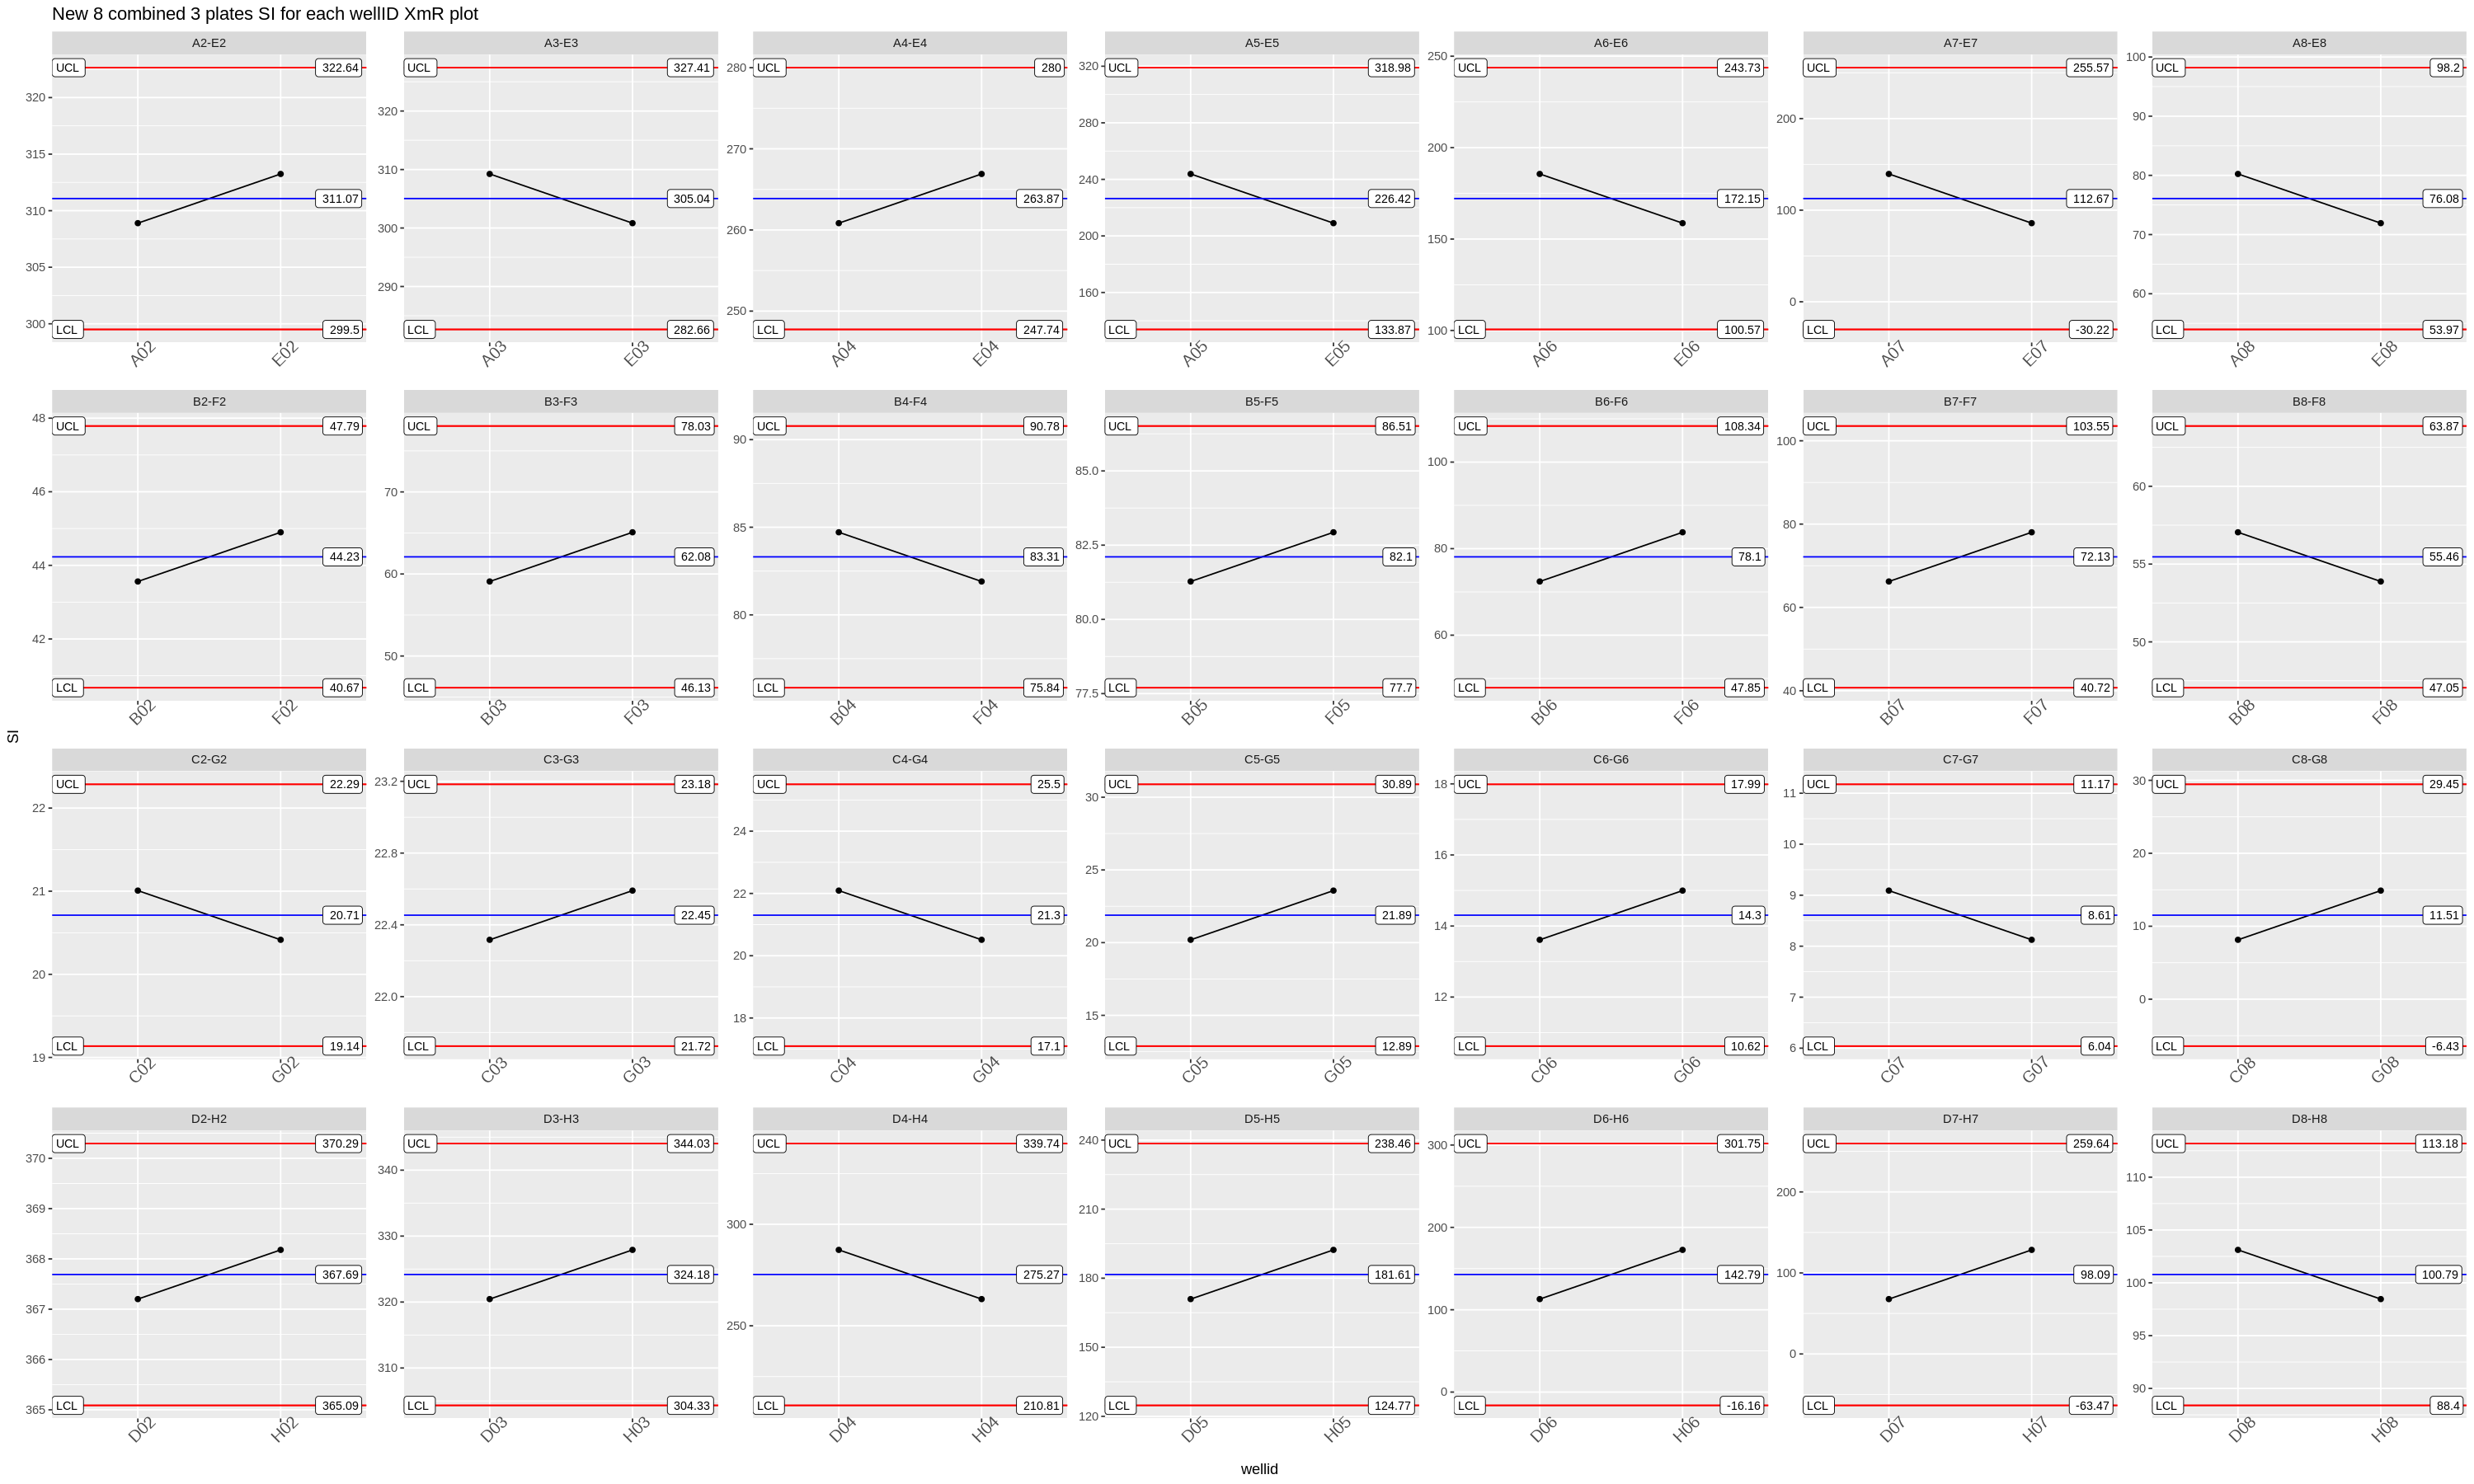

In [168]:
df.t <- dff %>% filter(method == "New 8")
ggplot(df.t, aes(x=wellid, y=SI, group = group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("SI") +
  #scale_x_discrete(breaks=1:16,
  #                 labels=labels) + 
  facet_wrap(~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("New 8 combined 3 plates SI for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

#ggsave(filename = "XmR_old8_si.png", plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

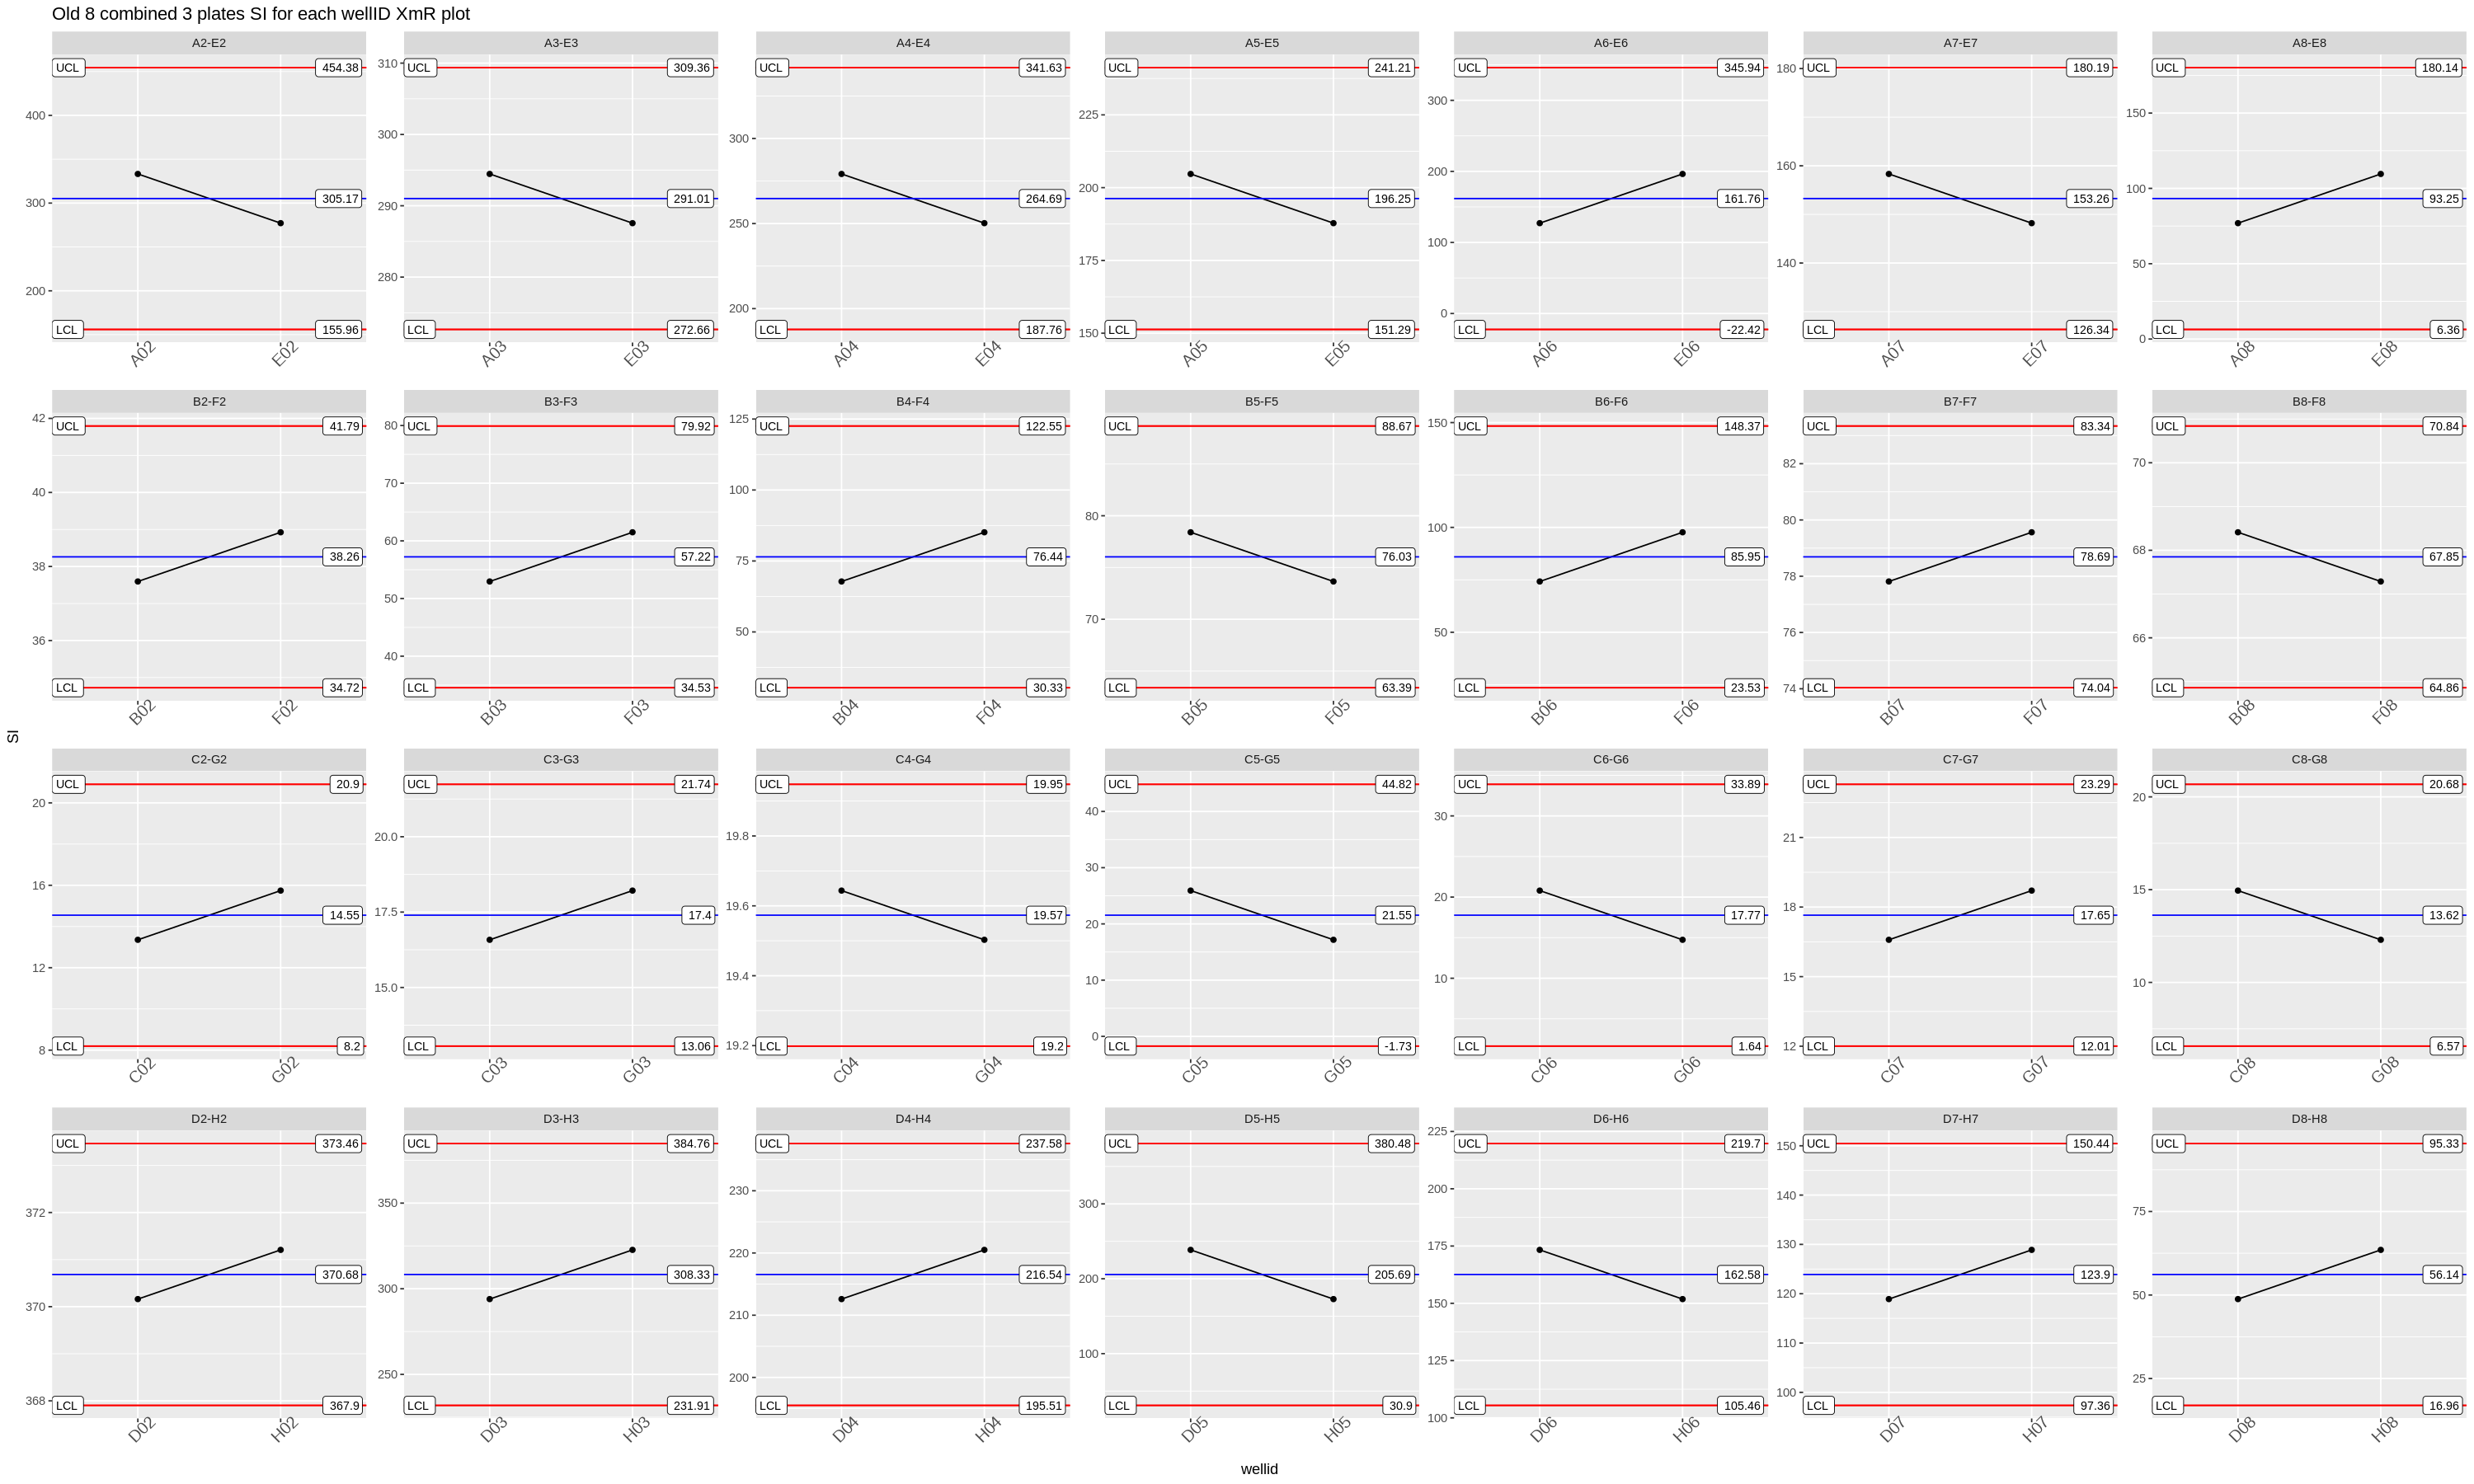

In [107]:
df.t <- dff %>% filter(method == "Old 8")
ggplot(df.t, aes(x=wellid, y=SI, group = group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("SI") +
  #scale_x_discrete(expand =  expansion(mult = .04)) + 
  facet_wrap(~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("Old 8 combined 3 plates SI for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

#ggsave(filename = "XmR_old8_si.png", plot = pp, scale = 1, width = 350, units = "mm", dpi = 300)

In [160]:
dff

SI.x       SAMPLE_NAME.x               wellid plate.x method.x group.x row.x
1  308.896726 Specimen_001_A2_A02_003.fcs A02    plate 1 New 8    COL2    A-E  
2  309.241566 Specimen_001_A3_A03_004.fcs A03    plate 1 New 8    COL3    A-E  
3  260.839640 Specimen_001_A4_A04_005.fcs A04    plate 1 New 8    COL4    A-E  
4  243.821622 Specimen_001_A5_A05_006.fcs A05    plate 1 New 8    COL5    A-E  
5  185.604823 Specimen_001_A6_A06_007.fcs A06    plate 1 New 8    COL6    A-E  
6  139.532694 Specimen_001_A7_A07_008.fcs A07    plate 1 New 8    COL7    A-E  
7   80.240020 Specimen_001_A8_A08_009.fcs A08    plate 1 New 8    COL8    A-E  
8   43.561838 Specimen_001_B2_B02_015.fcs B02    plate 1 New 8    COL2    B-F  
9   59.085214 Specimen_001_B3_B03_016.fcs B03    plate 1 New 8    COL3    B-F  
10  84.712966 Specimen_001_B4_B04_017.fcs B04    plate 1 New 8    COL4    B-F  
11  81.276228 Specimen_001_B5_B05_018.fcs B05    plate 1 New 8    COL5    B-F  
12  72.411202 Specimen_001_B6_B06_019.fcs B06    plate 1 New 8    COL6    B-F  
13  66.227185 Specimen_001_B7_B07_020.fcs B07    plate 1 New 8    COL7    B-F  
14  57.044127 Specimen_001_B8_B08_021.fcs B08    plate 1 New 8    COL8    B-F  
15  21.007371 Specimen_001_C2_C02_027.fcs C02    plate 1 New 8    COL2    C-G  
16  22.316651 Specimen_001_C3_C03_028.fcs C03    plate 1 New 8    COL3    C-G  
17  22.091451 Specimen_001_C4_C04_029.fcs C04    plate 1 New 8    COL4    C-G  
18  20.193875 Specimen_001_C5_C05_030.fcs C05    plate 1 New 8    COL5    C-G  
19  13.611927 Specimen_001_C6_C06_031.fcs C06    plate 1 New 8    COL6    C-G  
20   9.090341 Specimen_001_C7_C07_032.fcs C07    plate 1 New 8    COL7    C-G  
21   8.140672 Specimen_001_C8_C08_033.fcs C08    plate 1 New 8    COL8    C-G  
22 367.201128 Specimen_001_D2_D02_039.fcs D02    plate 1 New 8    COL2    D-H  
23 320.447753 Specimen_001_D3_D03_040.fcs D03    plate 1 New 8    COL3    D-H  
24 287.392071 Specimen_001_D4_D04_041.fcs D04    plate 1 New 8    COL4    D-H  
25 170.927659 Specimen_001_D5_D05_042.fcs D05    plate 1 New 8    COL5    D-H  
26 112.915608 Specimen_001_D6_D06_043.fcs D06    plate 1 New 8    COL6    D-H  
27  67.719669 Specimen_001_D7_D07_044.fcs D07    plate 1 New 8    COL7    D-H  
28 103.116734 Specimen_001_D8_D08_045.fcs D08    plate 1 New 8    COL8    D-H  
29 313.247084 Specimen_001_E2_E02_051.fcs E02    plate 1 New 8    COL2    A-E  
30 300.829250 Specimen_001_E3_E03_052.fcs E03    plate 1 New 8    COL3    A-E  
31 266.903738 Specimen_001_E4_E04_053.fcs E04    plate 1 New 8    COL4    A-E  
32 209.025835 Specimen_001_E5_E05_054.fcs E05    plate 1 New 8    COL5    A-E  
33 158.694908 Specimen_001_E6_E06_055.fcs E06    plate 1 New 8    COL6    A-E  
34  85.812779 Specimen_001_E7_E07_056.fcs E07    plate 1 New 8    COL7    A-E  
35  71.925859 Specimen_001_E8_E08_057.fcs E08    plate 1 New 8    COL8    A-E  
36  44.898917 Specimen_001_F2_F02_063.fcs F02    plate 1 New 8    COL2    B-F  
37  65.081845 Specimen_001_F3_F03_064.fcs F03    plate 1 New 8    COL3    B-F  
38  81.905330 Specimen_001_F4_F04_065.fcs F04    plate 1 New 8    COL4    B-F  
39  82.933416 Specimen_001_F5_F05_066.fcs F05    plate 1 New 8    COL5    B-F  
40  83.781535 Specimen_001_F6_F06_067.fcs F06    plate 1 New 8    COL6    B-F  
41  78.037443 Specimen_001_F7_F07_068.fcs F07    plate 1 New 8    COL7    B-F  
42  53.881892 Specimen_001_F8_F08_069.fcs F08    plate 1 New 8    COL8    B-F  
43  20.415379 Specimen_001_G2_G02_075.fcs G02    plate 1 New 8    COL2    C-G  
44  22.590926 Specimen_001_G3_G03_076.fcs G03    plate 1 New 8    COL3    C-G  
45  20.511272 Specimen_001_G4_G04_077.fcs G04    plate 1 New 8    COL4    C-G  
46  23.577554 Specimen_001_G5_G05_078.fcs G05    plate 1 New 8    COL5    C-G  
47  14.996740 Specimen_001_G6_G06_079.fcs G06    plate 1 New 8    COL6    C-G  
48   8.125403 Specimen_001_G7_G07_080.fcs G07    plate 1 New 8    COL7    C-G  
49  14.885710 Specimen_001_G8_G08_081.fcs G08    plate 1 New 8    COL8    C-G  
50 

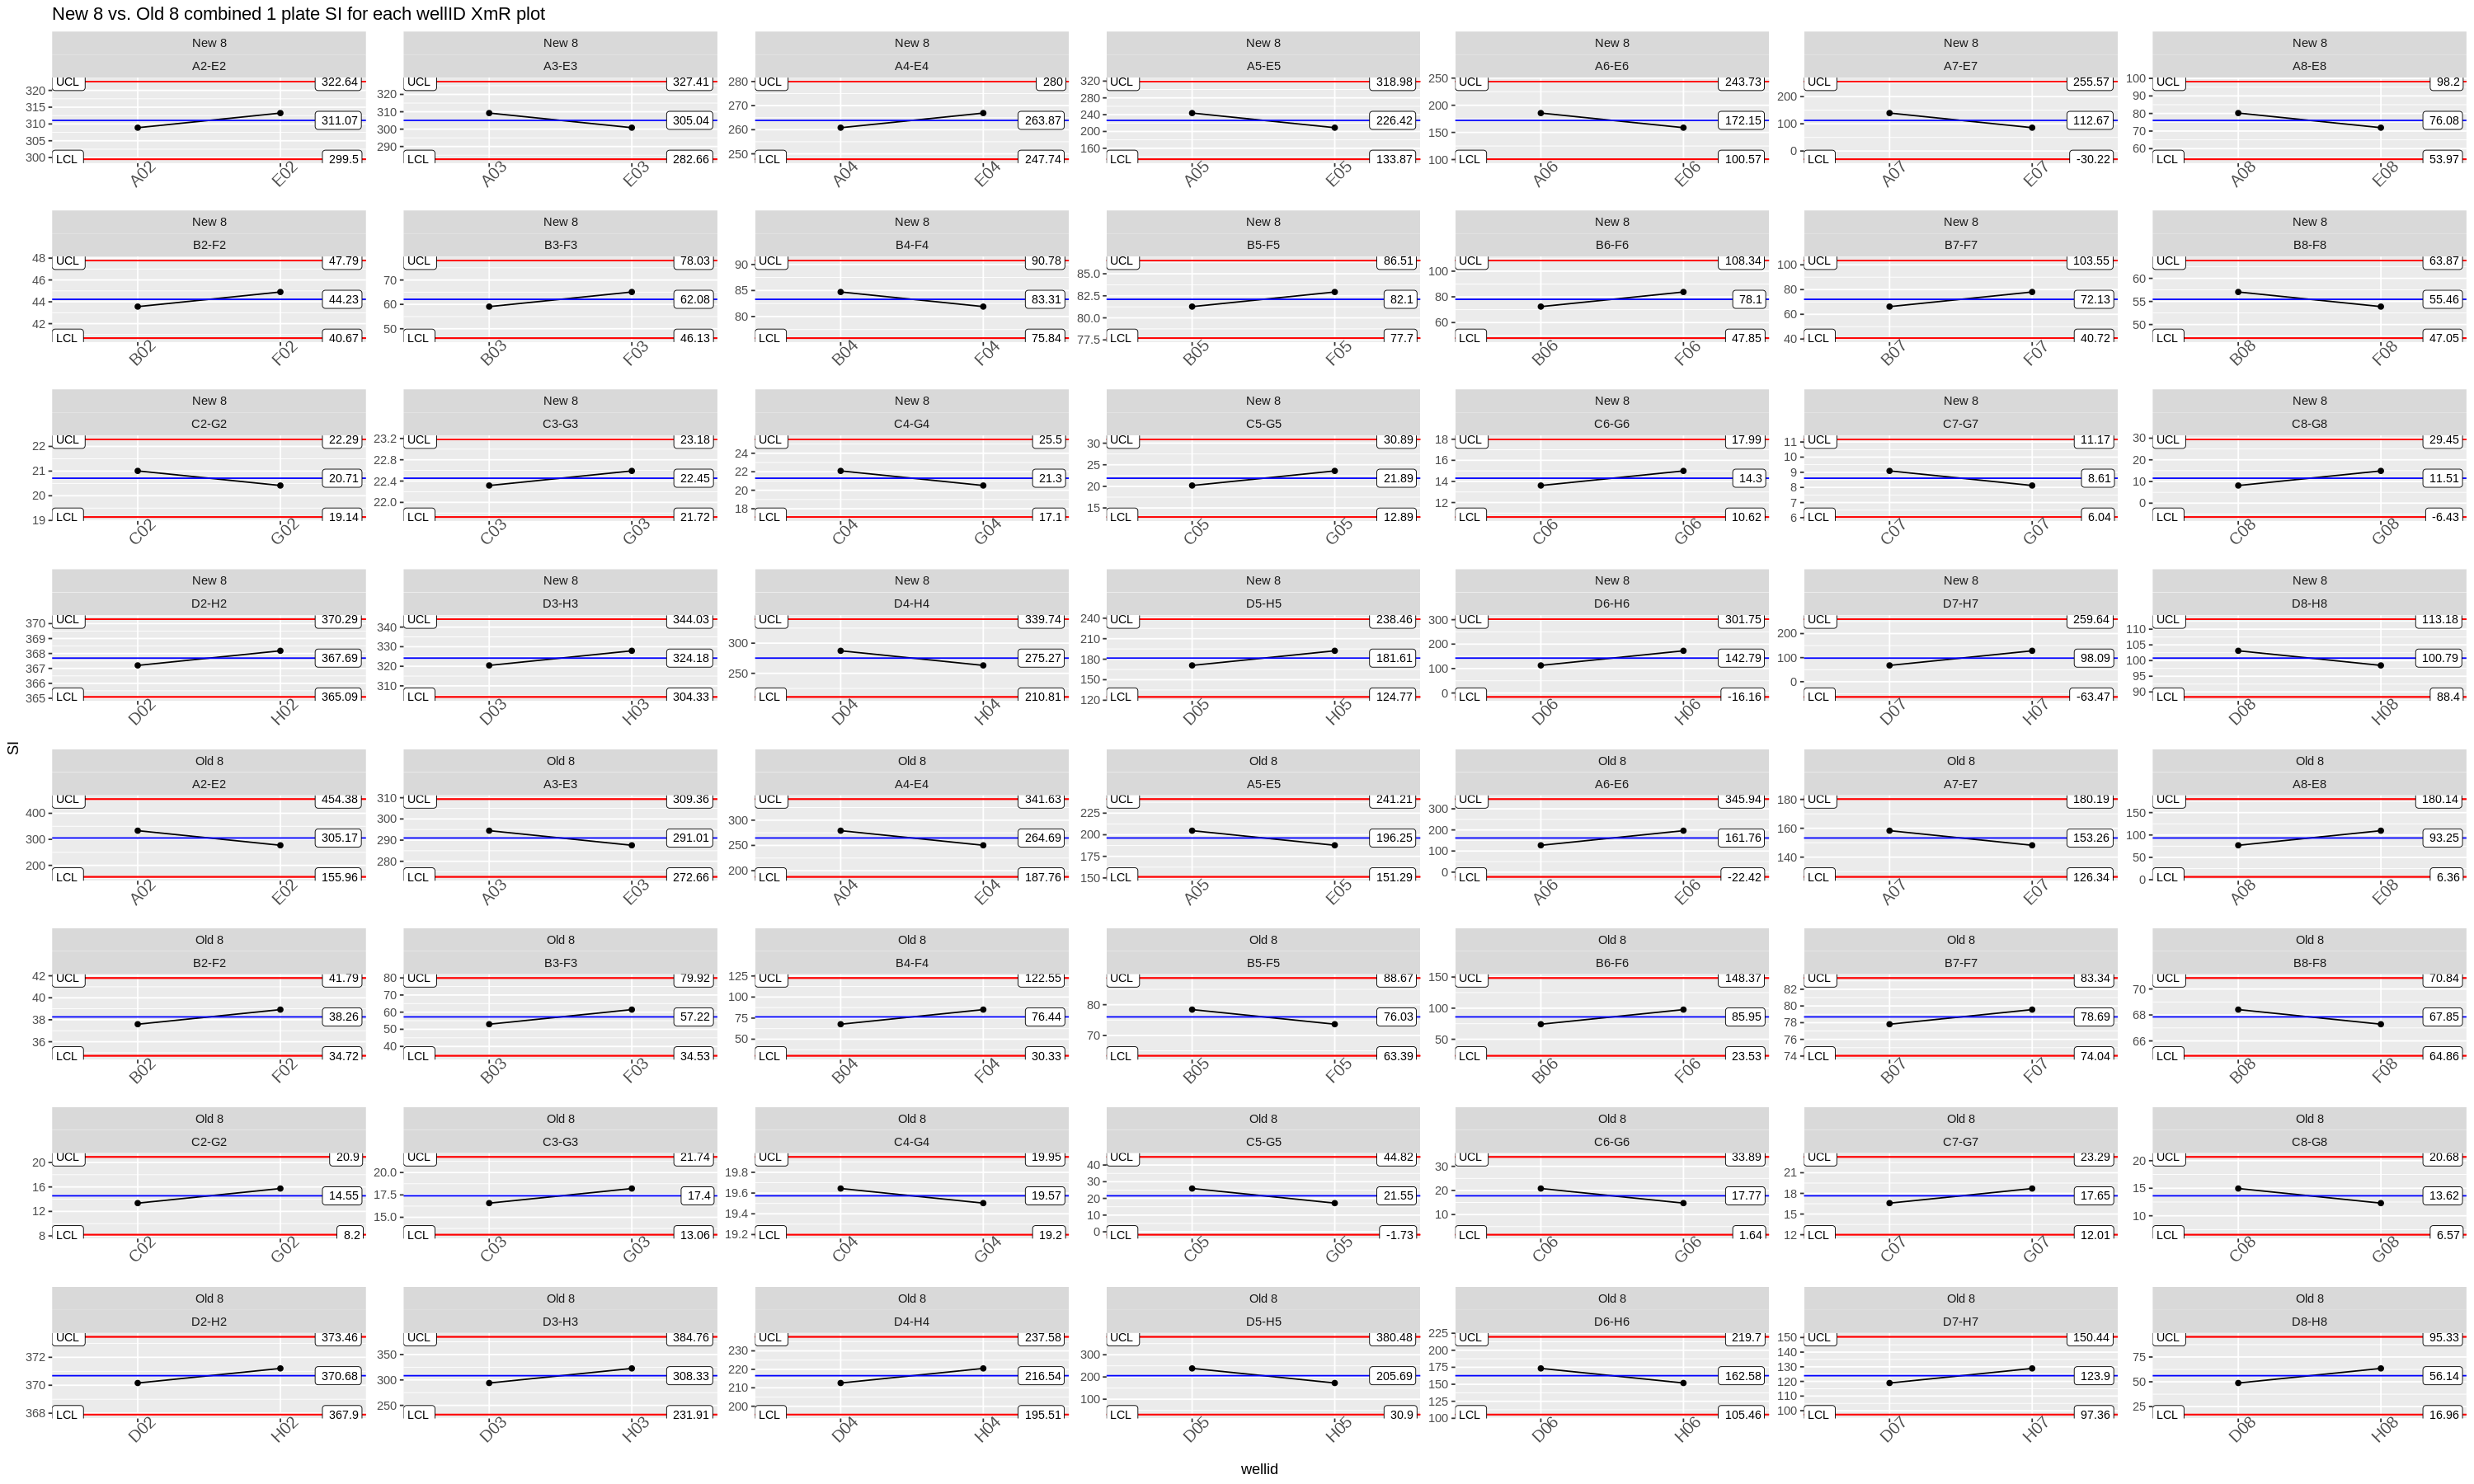

In [169]:
ggplot(dff, aes(x=wellid, y=SI, group = subgroup)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("SI") +
  facet_wrap(method~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("New 8 vs. Old 8 combined 1 plate SI for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

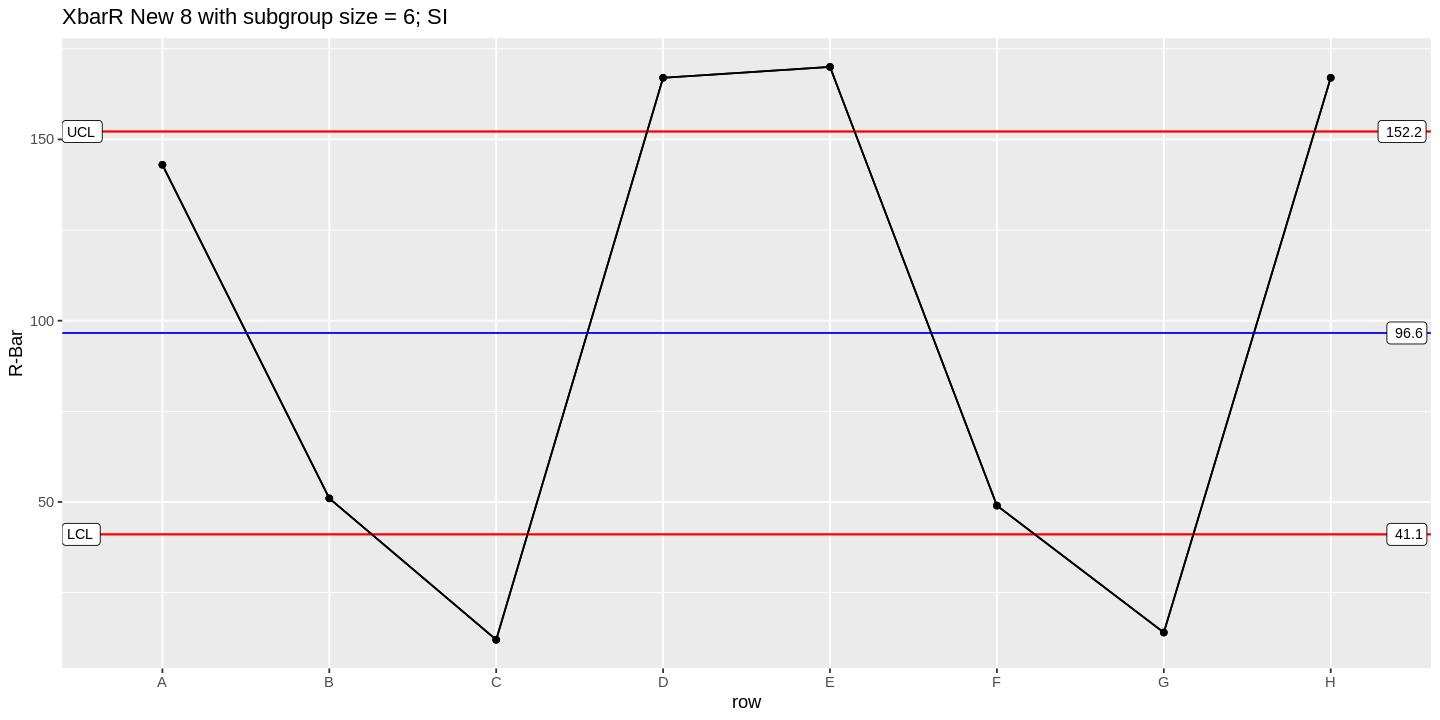

In [184]:
suppressWarnings(ggplot(dff.new8.si, aes(x = row, y = si., group = 1)) +
         stat_summary(fun = QCrange, geom = "point") +
         stat_summary(fun = QCrange, geom = "line") +
         stat_QC(method="rBar") +
         stat_QC_labels(method="rBar") + ylab("R-Bar") +
         ggtitle("XbarR New 8 with subgroup size = 6; SI"))

# Conclusion

- Seems as though the experiment is not setup for statistically convincing data
- May be inherent to flow cytometry experiments
- Or could design a new experiment:
    - Run 1 plate at a time, 2x for 8 channel and 96 core head
    - After each plate finishes, immediately wash and start on flow cytometer (use 2x cytometers; this will help even out inherent variances that can be pooled)
    - Perhaps use a real cell counter and count cells of a plate to compare against the X20
    - Append to current dataset cell count with n=3 prior to washing